## Data nedir?  Data analitika sahesi ucun

Data (məlumat), müəyyən bir mövzu, hadisə və ya obyekt haqqında əldə edilən faktlar, rəqəmlər və ya müşahidələrdir. Data həm strukturlu (məsələn, cədvəl formatında olan rəqəmlər və ya məlumatlar) həm də struktursuz (məsələn, mətnlər, şəkillər, audio) formada ola bilər.

**Data analitika** isə bu məlumatları təhlil edərək qərar vermə, prosesləri təkmilləşdirmə və ya biznes strategiyalarını formalaşdırmaq üçün istifadə olunan sahədir. Data analitika müxtəlif üsullar və alətlər vasitəsilə datanın toplanması, təmizlənməsi, transformasiyası və təhlilini həyata keçirir. Bu sahənin əsas məqsədi məlumatlardan dəyərli nəticələr çıxarmaqdır.

**Data analitika sahəsində bəzi əsas addımlar bunlardır:**

1. **Datayı toplamaq:** Müxtəlif mənbələrdən (databazalar, veb səhifələr, sensorlar və s.) məlumat toplamaq.
   
2. **Datayı təmizləmək:** Yarımçıq və ya düzgün olmayan məlumatları düzəltmək və ya çıxarmaq.
   
3. **Datanı təhlil etmək:** Statistik üsullar, maşın öyrənmə modelləri və vizuallaşdırma ilə datanın içərisindəki nümunələri tapmaq.

4. **Nəticələri vizuallaşdırmaq:** Müxtəlif qrafiklər, heatmap-lər, və ya dashboard-lar vasitəsilə məlumatları vizual formada təqdim etmək.

5. **Qərar vermə:** Analizlər əsasında biznes və ya təşkilati qərarlar qəbul etmək.

Data analitika həm biznes, həm maliyyə, həm də səhiyyə və digər sahələrdə geniş istifadə olunur.

## Data analitika nedir?

**Data analitika**, məlumatların toplanması, işlənməsi, təhlili və interpretasiyası prosesi olub, bu məlumatlardan istifadə edərək qərar qəbul etməyə və problemləri həll etməyə yönəlmişdir. Data analitika müxtəlif sahələrdə tətbiq olunur, məsələn, biznes, maliyyə, səhiyyə, marketinq və digər sahələrdə. Aşağıda data analitikasının əsas aspektləri təqdim olunur:

### 1. **Məlumatların Toplanması**
Data analitika prosesi, məlumatların müxtəlif mənbələrdən toplanması ilə başlayır. Bu, müştəri davranışları, satış məlumatları, sosial media və daha çoxu kimi müxtəlif növ məlumatları əhatə edə bilər.

### 2. **Məlumatların Təmizlənməsi**
Toplanan məlumatlar tez-tez çirklənmiş, yanlış və ya tam olmayan ola bilər. Bu mərhələdə məlumatlar təmizlənir, yəni yanlış dəyərlər aradan qaldırılır, eksik dəyərlər tamamlanır və məlumatlar uyğun formatda təşkil edilir.

### 3. **Məlumatların Təhlili**
Məlumat analitikası üçün müxtəlif metodlar və alətlər istifadə olunur. Bu mərhələdə məlumatlar statistik analiz, maşın öyrənmə, təhlil və vizuallaşdırma metodları ilə işlənir. Məsələn:
- **Descriptive analytics**: Tarixi məlumatları təhlil edərək nə baş verdiyini anlamağa kömək edir.
- **Predictive analytics**: Gələcəkdə nə baş verəcəyini proqnozlaşdırmaq üçün statistik modellərdən istifadə edir.
- **Prescriptive analytics**: Müxtəlif seçimlərin nəticələrini qiymətləndirərək ən yaxşı qərarların verilməsinə kömək edir.

### 4. **Məlumatların Vizuallaşdırılması**
Məlumatların vizuallaşdırılması, məlumatların qrafik və diagramlarla təqdim edilməsi, məlumatların daha asan anlaşılmasını təmin edir. Məsələn, qrafiklər, cədvəllər və dashboardlar məlumatların daha vizual bir şəkildə nümayiş olunmasına kömək edir.

### 5. **Qərar Qəbul Etmə**
Məlumat analitikasının sonunda əldə olunan nəticələr qərar qəbul etmə prosesinə təsir edir. Bizneslər, təşkilatlar və fərdlər, analitika nəticələrinə əsaslanaraq daha məlumatlı qərarlar qəbul edə bilərlər.

### 6. **Tətbiq Sahələri**
Data analitika bir çox sahədə istifadə olunur, məsələn:
- **Biznes**: Müştəri davranışını anlamaq və satışları artırmaq üçün.
- **Maliyyə**: Risklərin qiymətləndirilməsi və investisiya strategiyalarının hazırlanması üçün.
- **Səhiyyə**: Xəstəliklərin proqnozlaşdırılması və müalicə metodlarının təkmilləşdirilməsi üçün.
- **Marketinq**: Hədəf auditoriyanı anlamaq və marketinq strategiyalarını optimallaşdırmaq üçün.

### Nəticə
Data analitika, müasir dövrdə məlumatların artması ilə daha da önəmli bir sahə halına gəlmişdir. Məlumatlardan istifadə edərək daha səmərəli qərarlar qəbul etmək və strateji planlama aparmaq üçün analitika mütləqdir.

## Machine Learning nedir?

**Machine Learning** (Maşın Öyrənməsi), kompüterlərin verilmiş məlumatlardan öyrənərək müəyyən tapşırıqları yerinə yetirmək üçün proqramlaşdırılmasına əsaslanan bir süni intellekt sahəsidir. Bu prosesdə maşın öyrənmə alqoritmləri, məlumatları analiz edərək və bu məlumatlardan qaydalar çıxararaq özünü inkişaf etdirir. Aşağıda maşın öyrənməsinin əsas aspektləri və tətbiq sahələri təqdim olunur:

### 1. **Maşın Öyrənməsinin Tipləri**
Maşın öyrənməsi əsasən üç tələbat üzrə təsnif edilir:

- **Supervised Learning (Nəzarətli Öyrənmə)**:
  - Məlumat dəstinin etiketli olduğu bir yanaşmadır. Yəni, hər bir giriş məlumatına uyğun bir çıxış dəyəri var. Məqsəd, bu etiketlərə əsaslanaraq yeni, görünməyən məlumatlar üçün proqnozlar verməkdir.
  - Məsələn, müştəri kredit verilib-verilməyəcəyini müəyyənləşdirmək üçün verilənlərdəki müştəri məlumatlarını istifadə etmək.

- **Unsupervised Learning (Nəzarətsiz Öyrənmə)**:
  - Bu yanaşmada məlumatlar etiketlənməyib, yəni çıxış dəyərləri yoxdur. Məqsəd, məlumatlar arasında gizli strukturların və ya əlaqələrin aşkar edilməsidir.
  - Məsələn, müştəriləri oxşar xüsusiyyətlərinə görə klasterlərə ayırmaq.

- **Reinforcement Learning (Mükafatlandırma ilə Öyrənmə)**:
  - Bu yanaşmada agent, mühit ilə qarşılıqlı təsir edir və hər bir hərəkətinin mükafatını (və ya cəzasını) alaraq öyrənir. Məqsəd, ən yüksək mükafatı əldə etmək üçün optimal strategiyaları inkişaf etdirməkdir.
  - Məsələn, bir robotun müəyyən bir mühitdə tapşırıqları yerinə yetirməsi.

### 2. **Maşın Öyrənməsinin Prosesləri**
Maşın öyrənməsi prosesi adətən aşağıdakı mərhələləri əhatə edir:

1. **Məlumat Toplanması**: Problemi anlamaq üçün müvafiq məlumatların toplanması.
2. **Məlumatların Təmizlənməsi**: Məlumatların keyfiyyətini artırmaq üçün təmizlənməsi, eksik dəyərlərin tamamlanması və ya yanlış dəyərlərin düzəldilməsi.
3. **Xüsusiyyətlərin Seçimi**: Modelin performansını artırmaq üçün müvafiq xüsusiyyətlərin seçilməsi.
4. **Modelin Qurulması**: Seçilmiş alqoritmlərlə modelin yaradılması.
5. **Modelin Testi**: Modelin performansının qiymətləndirilməsi üçün test dəstində yoxlanılması.
6. **İcra**: Modelin real dünya tətbiqinə yönəldilməsi və nəticələrin izlənilməsi.

### 3. **Tətbiq Sahələri**
Maşın öyrənməsi müxtəlif sahələrdə geniş tətbiq olunur:

- **Maliyyə**: Kredit riskinin qiymətləndirilməsi, fırıldaqçılıq aşkarlanması.
- **Səhiyyə**: Xəstəliklərin proqnozlaşdırılması, tibbi şəkillərin analizi.
- **Marketinq**: Hədəf auditoriyanın müəyyənləşdirilməsi, müştəri davranışlarının analizi.
- **Robototexnika**: Avtomatlaşdırma, robotların mühitdə fəaliyyət göstərməsi.
- **Tərcümə**: Tərcümə sistemlərində və təbii dil işləmə (NLP) tətbiqlərində.

### Nəticə
Maşın öyrənməsi, verilənlərdən avtomatik öyrənməyi və bu öyrənmələrə əsaslanaraq qərarlar verməyi mümkün edən güclü bir alət və metodologiyadır. Bu sahə, süni intellektin inkişafında və bir çox tətbiq sahəsində inqilabi dəyişikliklərə səbəb olmuşdur.

## Normal paylanma nədir bəs?

**Normal paylanma** statistikada çox mühüm bir anlayışdır və bir çox real dünya hadisələri təxmini normal paylanmaya uyğun gəlir. Bu paylanma **Gauss paylanması** və ya **zəng əyrisi** (bell curve) kimi də tanınır. Normal paylanmanın əsas xüsusiyyəti onun simmetrik olmasıdır və ortalama (mean), median (orta dəyər) və moda (ən çox təkrarlanan dəyər) eyni nöqtədə yerləşir.

### Normal paylanmanın xüsusiyyətləri:
1. **Simmetrik əyri**: Paylanmanın sol və sağ tərəfləri tamamilə simmetrikdir.
2. **Ortalamaya yaxınlıq**: Dəyərlərin böyük bir hissəsi ortalama ətrafında cəmləşir. Dəyərlər ortalamadan uzaqlaşdıqca azalmağa başlayır.
3. **Zəng əyrisi (bell-shaped curve)**: Qrafik olaraq normal paylanmanın əyrisi zəngə bənzəyir.
4. **Standart sapma**: Normal paylanmada dəyərlərin 68%-i bir standart sapma (σ) daxilində, 95%-i iki standart sapma daxilində, 99.7%-i isə üç standart sapma daxilində olur. Bu qayda **68-95-99.7 qaydası** kimi tanınır.

### Normal paylanmanın qrafiki:
- **Orta** (mean) mərkəzdədir.
- Əyrinin hər iki tərəfi simmetrik olaraq bərabərdir.
- Paylanmanın böyük hissəsi orta qiymətə yaxın olan dəyərlərdir.
- Hər iki ucda ekstremal dəyərlər çox nadir hallarda baş verir.

### Normal paylanmanın formulu:
Normal paylanmanın sıxlıq funksiyası aşağıdakı kimi göstərilir:
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$
Burada:
- **μ**: Paylanmanın orta qiyməti,
- **σ**: Standart sapma,
- **x**: Təsadüfi dəyər,
- **e**: Təbii logaritm əsası (təxminən 2.718).

### Normal paylanmanın əhəmiyyəti:
1. **Təbiət və sosial hadisələr**: Çoxlu fiziki və sosial hadisələr normal paylanmaya yaxındır. Məsələn, insanların boyu, çəkisi, test nəticələri və s. adətən normal paylanmaya uyğundur.
   
2. **Fərziyyə testləri və statistika**: Bir çox statistik metod və fərziyyə testləri, məsələn, Z-test və t-test, normal paylanmaya əsaslanır.
   
3. **Qeyri-müəyyənliyin ölçülməsi**: Normal paylanma qeyri-müəyyənliyi qiymətləndirmək üçün istifadə olunur və bir çox inferensial statistika üsulları onun əsasında qurulub.

### 68-95-99.7 qaydası:
Bu qayda normal paylanmada dəyərlərin nə qədərinin orta qiymətə yaxın olacağını göstərir:
- Təxminən **68%** dəyər bir standart sapma (σ) daxilində (yəni ortalama ± 1σ).
- Təxminən **95%** dəyər iki standart sapma (yəni ortalama ± 2σ).
- Təxminən **99.7%** dəyər üç standart sapma (yəni ortalama ± 3σ).

### Normal paylanmanın tətbiqi:
- **Təhsil**: Tələbələrin imtahan nəticələri normal paylanmaya yaxın ola bilər.
- **Tibb**: Müxtəlif tibbi parametrlər (məsələn, qan təzyiqi, bədən istiliyi) əhalidə normal paylanmaya uyğunlaşır.
- **Maliyyə**: Qiymət dəyişiklikləri və səhmlərin gəlirləri tez-tez normal paylanma qəbul edilərək analiz edilir.

Yekun olaraq, **normal paylanma** dəyərlərin ortalama ətrafında cəmləşdiyi, müəyyən qaydalara uyğun olaraq simmetrik paylanmadır və statistik analizdə geniş tətbiq olunur.

## Datanın normal paylanması nə deməkdir?

**Datanın normal paylanması**, verilmiş məlumatların **normal paylanmaya** uyğun olaraq bölündüyü anlamına gəlir. Yəni, məlumatların böyük bir hissəsi orta qiymət (mean) ətrafında cəmlənir və məlumatların dəyərləri simmetrik olaraq ortalamadan uzaqlaşdıqca azalmağa başlayır. Bu, məlumatların zəng əyrisi (bell-shaped curve) formasında qrafikləşməsinə səbəb olur.

Datanın normal paylanması deməkdir ki:

1. **Ortalamaya yaxın dəyərlər daha çoxdur**: Məlumat dəstəsinin böyük hissəsi ortalama ətrafında yerləşir. Məsələn, insanların boylarını ölçən bir dataset varsa, insanların çoxunun boyu orta boy ətrafında olacaq.
   
2. **Simmetrik paylanma**: Ortalamanın solunda və sağında dəyərlər bərabər sayda olur. Başqa sözlə, ortalamadan nə qədər uzaqlaşırsanız, həm kiçik, həm də böyük dəyərlərin tezliyi eyni dərəcədə azalır.

3. **Outlier-lər azdır**: Ekstremal dəyərlər (çox kiçik və ya çox böyük dəyərlər) çox nadir hallarda olur. Normal paylanmada outlier-lər ortalamadan ən uzaq dəyərlər olur və nadir hallarda rast gəlinir.

### Məlumatların normal paylanmasını anlamaq üçün bir neçə əsas nöqtə:

#### 1. **Ortalamalar və standart sapmalar**:
- **Orta (mean)**, **median** və **moda** normal paylanmada eyni nöqtədə olur.
- Dəyərlərin təxminən 68%-i bir standart sapma daxilində (yəni, ortalamadan ±1 standart sapma məsafədə), 95%-i iki standart sapma daxilində, 99.7%-i isə üç standart sapma daxilində olur (68-95-99.7 qaydası).

#### 2. **Qrafik təsviri**:
Normal paylanmanı təsvir etmək üçün histogram və ya **Q-Q plot** (Quantile-Quantile plot) istifadə olunur. Histogramda zəng şəklində əyri varsa, bu, məlumatların normal paylanmaya uyğun olduğunu göstərir.

#### 3. **Normal paylanmanın yoxlanılması**:
Datanın normal paylanması olub-olmadığını yoxlamaq üçün bir neçə statistik test və qrafik metodu mövcuddur:
- **Shapiro-Wilk testi** və ya **Kolmogorov-Smirnov testi**: Bu testlər datanın normal paylanmadan nə qədər sapdığını ölçmək üçün istifadə olunur.
- **Histogram** və **Q-Q Plot**: Qrafik olaraq normal paylanmanı vizual şəkildə təsdiqləmək üçün istifadə olunur.

#### 4. **Normal paylanmanın əhəmiyyəti**:
Normal paylanmanın olduğu məlumat dəstələri statistik analizlər üçün uyğundur. Bir çox statistik metodlar (məsələn, t-test, ANOVA, regresyon analizləri) normal paylanmaya əsaslanır. Əgər məlumat normal paylanmırsa, bu analizlər düzgün nəticə verməyə bilər, buna görə də datanı normal paylanmaya yaxınlaşdırmaq üçün transformasiya metodlarından istifadə edilir (məsələn, log transformasiya).

#### 5. **Normal paylanmanın real həyatda nümunələri**:
- İnsanların boyu, çəkisi, qan təzyiqi kimi biometrik ölçülər adətən normal paylanmaya uyğun gəlir.
- Bir çox sosial və iqtisadi göstəricilər də normal paylanmaya yaxındır, məsələn, test balları və ya məhsulun ölçüləri.

### Datanın normal paylanmaması halları:
Məlumatlar normal paylanmaya uyğun gəlmirsə, bu, müxtəlif hallarda baş verə bilər:
- **Çox yüksək və ya aşağı outlier-lər** olduqda.
- **Skewness** (asimetriya) olduqda: Sağ və ya sol tərəfə doğru qrafikdə əyilmə müşahidə oluna bilər.
- **Kurtosis**: Paylanmanın zirvəsi normala nisbətən daha geniş və ya dar ola bilər.

Yəni, **datanın normal paylanması**, məlumatların standart bir forma malik olduğu, böyük bir qisminin ortalama ətrafında cəmləşdiyi və ortalamadan uzaqlaşdıqca tezliyin azaldığı paylanma deməkdir. Bu, statistik analizlər üçün vacib şərtlərdən biridir.

## Z-score haqqında geniş anlayış ver

**Z-score** (və ya standart skor) statistikada müəyyən bir dəyərin ortalama ilə müqayisədə nə qədər uzaqda olduğunu ölçmək üçün istifadə olunur. Z-score, həmin dəyərin orta qiymətdən neçə standart sapma uzaqlıqda olduğunu göstərir. Bu üsul xüsusilə fərqli vahidlər və ölçülərdən istifadə edən məlumatları müqayisə etmək üçün əhəmiyyətlidir, çünki bütün məlumatları standartlaşdırılmış vahidlərə (z-skorlara) çevirir.

### Z-Score-nu hesablamaq üçün formula:
$$
Z = \frac{(X - \mu)}{\sigma}
$$
Burada:
- **Z** – Z-score,
- **X** – müşahidə olunan dəyər,
- **$\mu$** – orta dəyər (mean),
- **$\sigma$** – standart sapma.

### Z-score-un mənası:
- **Z-score = 0**: Dəyər tam ortalamaya bərabərdir.
- **Z-score > 0**: Dəyər ortalamadan yuxarıdır (pozitiv sapma).
- **Z-score < 0**: Dəyər ortalamadan aşağıdır (neqativ sapma).
- **Z-score = 1**: Dəyər orta dəyərdən bir standart sapma yuxarıdır.
- **Z-score = -2**: Dəyər orta dəyərdən iki standart sapma aşağıdır.

### Z-score-un əhəmiyyəti:
1. **Outlier-lərin tapılması**: Z-score böyük və ya çox kiçik olarsa, bu, dəyərin məlumat dəstəsindəki digər dəyərlərdən çox uzaq olduğunu göstərə bilər. Məsələn, Z-score -3 və ya +3-dən böyükdürsə, bu dəyər outlier kimi qəbul oluna bilər.
   
2. **Müqayisə etmək**: Z-score müxtəlif ölçü vahidlərində olan dəyərləri müqayisə etməyə imkan verir. Məsələn, bir tələbənin iki fərqli fəndən aldığı balları müqayisə etmək üçün Z-score istifadə oluna bilər.

3. **Normal paylanma**: Normal paylanma üçün, müşahidələrin təxminən 68%-i ortalama ətrafında bir standart sapma daxilində, 95%-i isə iki standart sapma daxilində yerləşir. Z-score bu paylanmanı vizual olaraq görməyə kömək edir.

### Z-Score istifadəsi:
- **Hypothesis testing (təsadüfi fərziyyə testi)**: Z-score normallıq testlərində və fərziyyə testlərində istifadə olunur.
- **Standartlaşdırma**: Fərqli vahidlərdəki dəyişənləri eyni ölçü vahidinə çevirir.
- **Skorların təhlili**: Təhsildə və ya digər sahələrdə fərqli qiymətləndirmələr arasında müqayisə üçün istifadə olunur.

Yəni, Z-score, məlumatlar içində bir dəyərin yerini standart sapmalar ilə müqayisə edərək izah edir və məlumatların təhlilində geniş istifadə edilir.

## T-score

**T-score** (və ya **t-skore**), statistikada kiçik nümunə ölçülərində istifadə olunan Z-score-un bir variantıdır. Xüsusilə, nümunə ölçüsü kiçik olduqda və ya populyasiyanın standart sapması bilinmədikdə, Z-score əvəzinə t-skordan istifadə olunur. T-skore **t-test** və digər statistik testlər zamanı paylanmanın normallığını yoxlamaq və fərziyyə testləri aparmaq üçün istifadə edilir.

### T-score ilə Z-score fərqləri:
- **Z-score** adətən böyük nümunə ölçüləri üçün (n > 30) və ya populyasiyanın standart sapması bilindiyi zaman istifadə olunur.
- **T-score** isə kiçik nümunə ölçülərində (n < 30) və ya populyasiyanın standart sapması məlum olmadığı hallarda tətbiq edilir.

### T-score-un formulu:
T-score hesablamaq üçün aşağıdakı formula istifadə olunur:
$$
T = \frac{(X - \mu)}{s/\sqrt{n}}
$$
Burada:
- **T** – T-score,
- **X** – müşahidə olunan dəyər (nümunə ortası),
- **μ** – populyasiya ortası,
- **s** – nümunə standart sapması,
- **n** – nümunənin ölçüsü (müşahidə sayı).

### T-score-un tətbiq sahələri:
1. **Kiçik nümunələrdə fərziyyə testi**: T-score, xüsusən də kiçik nümunələr üçün populyasiya ortalaması ilə müqayisə aparmaq üçün istifadə edilir.
2. **T-testlər**: İki qrupun ortalamalarını müqayisə etmək üçün **t-test** aparılarkən istifadə olunur. Bu test iki növ ola bilər:
   - **One-sample t-test**: Nümunənin ortasını verilmiş populyasiya ortası ilə müqayisə etmək.
   - **Two-sample t-test**: İki fərqli nümunənin ortalarını bir-biri ilə müqayisə etmək.
3. **Nəticələrin güvən aralığının hesablanması**: Kiçik nümunələrdən əldə olunan nəticələrin nə qədər güvənlə populyasiyaya tətbiq oluna biləcəyini göstərmək üçün t-distribusiya istifadə olunur.

### T-score-un əhəmiyyəti:
- **Kiçik nümunələrdə dəqiqlik**: Nümunə ölçüsü kiçik olduqda və standart sapma məlum olmadıqda, Z-score istifadə etmək dəqiq nəticə verməyə bilər. T-score bu hallarda daha dəqiq təxminlər verir.
- **Fərziyyə testləri**: Kiçik nümunə ölçüləri ilə işləyərkən, t-test və t-score, iki qrup arasında əhəmiyyətli bir fərqin olub-olmadığını müəyyənləşdirməyə kömək edir.

Yəni, t-score, xüsusən kiçik nümunələrlə işləyərkən statistik analiz aparmaq üçün vacibdir və nəticələrin daha dəqiq olmasını təmin edir.

## Outlier haqqında geniş məlumat ver

Outlier (kənar dəyər) verilənlər toplusunda statistik baxımdan normadan kənar, digər dəyərlərdən əhəmiyyətli dərəcədə fərqlənən məlumat nöqtəsidir. Bu dəyərlər verilənlərdə anormal dəyişikliklərin göstəricisi ola bilər və ya səhv məlumatın nəticəsi ola bilər. Kənar dəyərləri düzgün idarə etmək, verilənlərin keyfiyyətini artırmaq və modelləşdirmə prosesində dəqiqliyi təmin etmək üçün vacibdir.

### Outlier-lərin təsnifatı
Outlier-lər müxtəlif kateqoriyalara bölünə bilər:

1. **Univariate outlier-lər**: Bir dəyişənə əsasən normal paylanmadan uzaq olan dəyərlərdir. Məsələn, yaş dəyişənində 120 yaşda bir dəyər normadan kənar sayıla bilər.
   
2. **Multivariate outlier-lər**: Birdən çox dəyişən birləşməsi əsasında kənar olan dəyərlərdir. Məsələn, hündürlüyü 2 metr olan bir şəxsin çəkisi 30 kiloqram olarsa, bu iki dəyişənin birgə qiymətləndirilməsində kənar dəyər sayıla bilər.

3. **Contextual outlier-lər**: Bəzi kontekstlərdə normadan kənar hesab olunan dəyərlərdir. Məsələn, gecə temperaturu 40°C olarsa, bu çox güman ki, anormal hadisədir, amma gündüz bu dəyər normal ola bilər.

4. **Collective outlier-lər**: Verilənlərdə bir qrup dəyərin birlikdə normadan kənar olmasıdır. Bu, xüsusilə zaman sıralarında və ya ardıcıl proseslərdə müşahidə edilir.

### Outlier-lərin səbəbləri
Outlier-lər müxtəlif səbəblərdən meydana gələ bilər:

1. **Ölçmə və ya məlumat toplama səhvləri**: Verilənlərdə yanlış ölçmələr və ya qeyri-dəqiq məlumat yığımı kənar dəyərlərə səbəb ola bilər. Məsələn, cihazların səhv işləməsi nəticəsində qeyri-adi qiymətlər yaranır.

2. **Təbiəti fərqli hadisələr**: Bəzi kənar dəyərlər həqiqətən anormal hadisələri əks etdirir. Məsələn, iqtisadi şoklar və ya təbii fəlakətlər zamanı qeyri-adi qiymətlər müşahidə oluna bilər.

3. **Müəyyən fenomenlər**: Verilənlərdə kənar dəyərlər bəzi real həyatda xüsusi vəziyyətləri əks etdirə bilər. Məsələn, çox yüksək gəlirli insanlar.

4. **Normal yayılmadan kənar paylanma**: Bəzi verilənlər müəyyən modelə əsaslanaraq paylanır, və bu model daxilində təbii kənar dəyərlər mövcud ola bilər.

### Outlier-lərin təsiri
Kənar dəyərlər verilənlərin analizinə ciddi təsir göstərə bilər:

1. **Statistik nəticələrin təhrif olunması**: Outlier-lər ortalama və standart sapma kimi statistik göstəriciləri təhrif edə bilər. Məsələn, yüksək gəlirli bir nəfər, bütün qrupun orta gəlirini yüksəldə bilər.

2. **Model performansının zəifləməsi**: Outlier-lər klassik statistika və maşın öyrənməsi modellərinin performansını mənfi təsir edə bilər. Linear regression kimi modellər outlier-lərə həssasdır və yanlış proqnozlar verə bilər.

3. **Qərar qəbul etmənin pozulması**: Təhlil nəticələrini təhrif etməklə qərar qəbul etməni çaşdıra bilər. Məsələn, satış hesabatlarında anormal yüksək rəqəm gələcək strategiyanın səhv qurulmasına səbəb ola bilər.

### Outlier-lərin aşkarlanması
Kənar dəyərləri aşkar etmək üçün bir neçə metoddan istifadə olunur:

1. **Vizual metodlar**:
   - **Boxplot**: Verilənlərin paylanmasını qutular və saqqallar (whiskers) vasitəsilə təsvir edən qrafikdir. Saqqaldan (whiskers) kənarda qalan dəyərlər outlier-lər ola bilər.
   - **Scatter Plot**: İki dəyişən arasındakı əlaqəni təsvir edir. Qrafikdəki anormal nöqtələr kənar dəyərləri göstərə bilər.

2. **Statistik metodlar**:
   - **Z-score**: Verilənlər nöqtələrinin ortalamadan neçə standart sapma uzaq olduğunu ölçən metoddur. Əgər Z-score çox yüksək və ya aşağıdırsa (məsələn, 3-dən böyük), bu, outlier ola bilər.
   - **IQR (Interquartile Range)**: Verilənlər dəstindəki dəyərlərin ortasında yerləşən 50%-lik hissəni nəzərə alır. Birinci və üçüncü kvartillər arasındakı məsafədən çox kənarda olan dəyərlər outlier hesab oluna bilər. IQR metodunda outlier-lər aşağıdakı kimi təyin edilir:
     \[
     \text{Outliers} = [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]
     \]
     Burada Q1 birinci kvartildir, Q3 isə üçüncü kvartildir.

3. **Maşın öyrənməsi metodları**:
   - **Isolation Forest**: Decision tree əsaslı bir metoddur və anomaliyaları təyin etmək üçün istifadə olunur.
   - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Maşın öyrənməsində sıxlığa əsaslanan klasterləmə metodudur və kənar dəyərləri təyin edə bilər.
   - **LOF (Local Outlier Factor)**: Hər bir verilənlər nöqtəsinin qonşuluqda digər nöqtələrlə müqayisədə anormal olub-olmadığını təyin edir.

### Outlier-lərin idarə edilməsi
Outlier-lər tapıldıqdan sonra onlarla necə davranılacağı çox vacibdir. Bəzi seçimlər bunlardır:

1. **Kənar dəyərləri silmək**: Əgər kənar dəyərlərin səhv məlumatlardan qaynaqlandığı aşkarlanarsa, onları dataset-dən çıxarmaq olar. Amma məlumat itkisi ehtiyatla nəzərə alınmalıdır.

2. **Kənar dəyərləri dəyişdirmək**: Bəzi hallarda kənar dəyərləri qrupun ortalama və ya median qiymətləri ilə əvəz etmək olar. Bu, verilənlərin ümumi paylanmasına daha uyğun nəticələr verə bilər.

3. **Modeli kənar dəyərlərə davamlı etmək**: Outlier-ləri silmədən, modelləri bu dəyərlərə həssas olmayan metodlar üzərində qurmaq olar. Məsələn, decision tree, random forest, və ya robust regression kimi modellər outlier-lərə daha davamlıdır.

4. **Log transformasiyası**: Dəyərlər arasındakı fərqi azaltmaq və kənar dəyərlərin təsirini yumşaltmaq üçün logaritmik transformasiya tətbiq etmək olar.

### Nəticə
Outlier-lər verilənlər analitikasında əhəmiyyətli rol oynayır. Onların düzgün aşkarlanması və idarə edilməsi statistika və maşın öyrənməsinin effektivliyini artırır, eyni zamanda məlumat keyfiyyətinin yaxşılaşdırılmasına xidmət edir.

## Null dəyərlər haqqında geniş məlumat ver

**Null dəyərlər** (boş dəyərlər) verilənlər toplusunda müəyyən sütun və ya dəyişən üçün məlumatların mövcud olmadığı vəziyyəti ifadə edir. Bu dəyərlər dataset-də itkin məlumat kimi qəbul edilir və "NaN" (Not a Number) və ya "None" kimi təqdim edilə bilər. Null dəyərlər düzgün təhlil aparmaq üçün düzgün idarə edilməli olan əsas məsələlərdən biridir, çünki onlar analiz və modelləşdirmə prosesini mənfi təsir edə bilər.

### Null dəyərlərin səbəbləri

Null dəyərlərin meydana çıxmasının bir neçə səbəbi ola bilər:

1. **Məlumat toplama xətaları**: Verilənlər toplanarkən yanlış məlumat yığılması nəticəsində müəyyən dəyişənlər üçün məlumatların boş olması mümkündür.
   
2. **Məlumatların uyğunsuzluğu**: Müəyyən vəziyyətlərdə bəzi atributlar və ya dəyişənlər bəzi müşahidələr üçün tətbiq olunmaya bilər. Məsələn, tək yaşayan bir şəxs üçün 'Ailə üzvlərinin sayı' dəyişəni boş ola bilər.

3. **Sensor və ya texnologiya xətaları**: Sensor və ya cihazlardan məlumat toplanarkən texniki problemlər nəticəsində bəzi məlumatlar itə bilər.

4. **Müşahidənin qəsdən kənarlaşdırılması**: Araşdırmaçı və ya məlumat toplayan şəxs qəsdən müəyyən məlumatları daxil etməyə bilər, çünki bu məlumatlar həqiqətən mövcud olmaya bilər və ya müəyyən şərtlər daxilində məna kəsb etmir.

### Null dəyərlərin təsiri

Null dəyərlər verilənlər üzərində təhlillərin və modelləşdirmənin dəqiqliyinə birbaşa təsir edə bilər:

1. **Məlumatın bütövlüyünün pozulması**: Null dəyərlər verilənlərin tamlığına mənfi təsir göstərir və statistikanın düzgün nəticələnməsinə mane ola bilər.
   
2. **Statistik analizlərdə problemlər**: Çoxsaylı null dəyərlər statistik göstəricilərin, məsələn, ortalama və medianın təhrif olmasına səbəb ola bilər.

3. **Model performansına təsiri**: Maşın öyrənməsi modellərində null dəyərlər səhv nəticələrə gətirib çıxara bilər. Məsələn, bəzi modellər null dəyərləri qəbul etmir və onlar mövcud olduqda modellər effektiv işləmir.

4. **İkincili təsirlər**: Null dəyərlər başqa dəyişənlərə də təsir edə bilər. Məsələn, korrelyasiya və ya statistik əlaqələrin təhlilində null dəyərlər dəqiq nəticələr əldə etməyə mane ola bilər.

### Null dəyərlərin aşkarlanması

Null dəyərləri müəyyən etmək üçün bir neçə metoddan istifadə olunur:

1. **Təlimatçı komandalardan istifadə**: Python və R kimi proqramlaşdırma dillərində null dəyərləri aşkar etmək üçün təlimatlar mövcuddur.
   - Python-da Pandas kitabxanası vasitəsilə:
     ```python
     df.isnull()  # DataFrame-də bütün null dəyərləri göstərir
     df.isnull().sum()  # Hər bir sütunda neçə null dəyərin olduğunu göstərir
     ```
   - R-da:
     ```r
     is.na(df)  # DataFrame-də null dəyərləri göstərir
     ```

2. **Vizual metodlar**:
   - **Missingno** kitabxanası (Python) null dəyərləri qrafik şəklində göstərməyə kömək edir.
     ```python
     import missingno as msno
     msno.matrix(df)
     ```
   - **Heatmap**: Verilənlərin hansı hissəsində null dəyərlərin daha çox olduğunu vizual şəkildə göstərir.

### Null dəyərlərin idarə edilməsi

Null dəyərləri düzgün idarə etmək analitik və modelləşdirmə prosesinin uğurlu nəticələnməsi üçün vacibdir. Bunu etmək üçün müxtəlif üsullardan istifadə olunur:

#### 1. Null dəyərləri çıxarmaq
Ən sadə üsullardan biri dataset-dən null dəyərləri olan sətirləri və ya sütunları çıxarmaqdır. Bunun üçün bəzi funksiyalardan istifadə etmək mümkündür:
   - Python-da Pandas vasitəsilə:
     ```python
     df.dropna()  # Null dəyərləri olan sətirləri silir
     df.dropna(axis=1)  # Null dəyərləri olan sütunları silir
     ```

Bu metod dataset-də çox az null dəyər olduqda effektivdir. Lakin çoxsaylı null dəyərləri olan dataset-lərdə bu metod məlumat itkisinə səbəb ola bilər.

#### 2. Dəyərləri doldurmaq (Imputation)
Null dəyərləri silmək məlumat itkisinə səbəb olduğundan, bəzi hallarda dəyərləri təxmini rəqəmlərlə doldurmaq daha məqsədəuyğun ola bilər. Bunun üçün bir neçə yanaşma mövcuddur:

   - **Orta və ya median ilə doldurmaq**: Ən geniş istifadə olunan yanaşmadır. Kəmiyyət dəyişənləri üçün null dəyərləri dataset-in ortalaması və ya medianı ilə doldurmaq olar.
     ```python
     df['column'].fillna(df['column'].mean(), inplace=True)  # Orta dəyərlə doldurur
     df['column'].fillna(df['column'].median(), inplace=True)  # Median dəyərlə doldurur
     ```

   - **Mod ilə doldurmaq**: Kateqoriyalı dəyişənlər üçün null dəyərləri həmin dəyişənin ən çox rast gəlinən dəyəri ilə doldurmaq olar.
     ```python
     df['column'].fillna(df['column'].mode()[0], inplace=True)  # Mod ilə doldurur
     ```

   - **Linear regression və ya KNN**: Daha mürəkkəb yanaşmalar arasında regression modelləri və ya KNN (K-nearest neighbors) kimi metodlardan istifadə edərək, itkin dəyərləri proqnozlaşdırmaq mümkündür.

   - **Forward və Backward Filling**: Zaman sıralarında null dəyərləri əvvəlki və ya növbəti dəyərlərlə doldurmaq mümkündür.
     ```python
     df.fillna(method='ffill', inplace=True)  # Əvvəlki dəyərlə doldurur
     df.fillna(method='bfill', inplace=True)  # Növbəti dəyərlə doldurur
     ```

#### 3. Null dəyərləri xüsusi bir sinif olaraq təyin etmək
Bəzi hallarda, xüsusilə kateqoriyalı dəyişənlər üçün null dəyərləri xüsusi bir kateqoriya kimi qəbul etmək mümkündür. Məsələn, cinsiyyət dəyişəni üçün null dəyərləri "Məlumat yoxdur" kimi təyin etmək olar.

   ```python
   df['column'].fillna('No Information', inplace=True)
   ```

#### 4. Modellərə null dəyərləri qarşı həssaslıq əlavə etmək
Bəzi modellər (məsələn, decision tree və ya random forest) null dəyərlərlə işləməyi avtomatik həyata keçirə bilər. Bu modellər null dəyərləri olan verilənlərə qarşı daha davamlıdır.

### Null dəyərlərin idarə edilməsi zamanı nəzərə alınmalı məqamlar

- **Məlumat itkisi**: Null dəyərləri silmək data itkisinin artmasına səbəb ola bilər. Bu səbəbdən məlumatları itirmək əvəzinə, uyğun metodlarla doldurmaq daha məqsədəuyğun ola bilər.
  
- **Məlumatların təhrif edilməsi**: Dəyərləri doldurarkən təhlil və ya modelləşdirmə nəticələrinin təhrif edilməməsi üçün düzgün yanaşma seçilməlidir. Məsələn, ortalama ilə doldurmaq bəzən dəyərlərin təbii variasiyasını itirə bilər.

- **İtkin məlumatların təsviri**: İtkin məlumatların səbəbini anlamaq və onların təbiətini qiymətləndirmək vacibdir. Məsələn, bəzi sütunlarda məlumatların olmaması xüsusi bir fenomeni göstərə bilər.

### Nəticə

Null dəyərlər verilənlərin analizi və modelləşdirilməsi zamanı diqqətlə idarə olunmalıdır. Onların səbəblərini düzgün anlamaq, uyğun metodlarla aşkarlamaq və düzgün idarə etmək analizin nəticələrini daha etibarlı və dəqiq edəcək. Null dəyərlərin yanlış idarə edilməsi isə verilənlərin təhlilində ciddi təhriflərə və yanlış qərarların qəbul edilməsinə səbəb ola bilər.

## Supervised Learning Regression Models Metrics

### R-squared: This measures the variation of a regression model. R-squared either increases or remains the same when new predictors are added to the model. ( R-kvadrat: Bu, reqressiya modelinin dəyişməsini ölçür. Modelə yeni proqnozlaşdırıcılar əlavə edildikdə R-kvadrat ya artır, ya da eyni qalır.)
### Adjusted R-squared: This measures the variation for a multiple regression model, and helps you determine goodness of fit. Unlike R-squared, adjusted R-squared only adds new predictors to its model if it improves the model’s predicting power. (Düzəliş edilmiş R-kvadrat: Bu, çoxlu reqressiya modeli üçün variasiyanı ölçür və uyğunluğun yaxşılığını müəyyən etməyə kömək edir. R-kvadratdan fərqli olaraq, düzəliş edilmiş R-kvadrat modeli yalnız modelin proqnozlaşdırma gücünü yaxşılaşdırdığı halda modelinə yeni proqnozlaşdırıcılar əlavə edir.)

#### https://images.app.goo.gl/Qgeqz1LPsGkEAfoD9
#### https://images.app.goo.gl/xRogYdJjCpqKPc937

## SST, SSR, SSE

**SST, SSR, və SSE** statistika və regresiya analizində istifadə olunan əsas ölçülərdir. Bu ölçülər modelin nə dərəcədə yaxşı uyğunlaşdığını və modeldəki variasiyaların nə qədərinin izah edildiyini qiymətləndirmək üçün istifadə olunur.

**1. SST (Total Sum of Squares):** Ümumi kvadratlar cəmi (Total Sum of Squares) 
- Bu, `y` dəyişəninin ümumi dəyişkənliyini ölçür.
- Formula:
  $$
  \text{SST} = \sum_{i=1}^{n} (y_i - \bar{y})^2
  $$
  Burada $ (y_i) $ həqiqi müşahidə olunan dəyərlər, $( \bar{y})$ isə müşahidə olunan dəyərlərin orta qiymətidir.

**2. SSR (Regression Sum of Squares):** Regresiya kvadratlar cəmi (Regression Sum of Squares)
- Bu, modelin nə dərəcədə uyğun gəldiyini ölçür, yəni modelin izah etdiyi variasiyadır.
- Formula:
  $$
  \text{SSR} = \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2
  $$
  Burada $( \hat{y}_i )$ model tərəfindən proqnozlaşdırılan dəyərlərdir.

**3. SSE (Error Sum of Squares):** Qalıq kvadratlar cəmi (Error Sum of Squares)
- Bu, modelin izah edə bilmədiyi, qalıq variasiyanı ölçür.
- Formula:
  $$
  \text{SSE} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  Burada \( y_i \) həqiqi müşahidə olunan dəyərlər, $( \hat{y}_i )$ isə model tərəfindən proqnozlaşdırılan dəyərlərdir.

**Əlaqə**:
Bu üç ölçü arasında belə bir əlaqə var:
$$
\text{SST} = \text{SSR} + \text{SSE}
$$
Bu formula, ümumi variasiyanın izah edilən variasiyaya (SSR) və izah edilməmiş qalıq variasiyaya (SSE) bölünməsini göstərir.


## R2 and Adjusted R2

**R-squared (R²)** və **Adjusted R-squared** regresiya modelinin uyğunluğunu qiymətləndirmək üçün istifadə olunan iki əsas ölçüdür. 

### 1. **R-squared (R²)**
R², modelin nə qədər yaxşı izah etdiyini, yəni müstəqil dəyişənlərin asılı dəyişən üzərindəki variasiyanı nə qədər izah etdiyini göstərir. 

**Formula:**

$$
R^2 = \frac{\text{SSR}}{\text{SST}} = 1 - \frac{\text{SSE}}{\text{SST}}
$$

Burada:
- **SSR** - Regresiya kvadratlar cəmi (Regression Sum of Squares)
- **SSE** - Qalıq kvadratlar cəmi (Error Sum of Squares)
- **SST** - Ümumi kvadratlar cəmi (Total Sum of Squares)

R² dəyəri həmişə 0 ilə 1 arasında olur. 1-ə yaxın olduqda modelin yüksək uyğunluğunu, 0-a yaxın olduqda isə zəif uyğunluğu göstərir.

### 2. **Adjusted R-squared**
**Adjusted R²** (Düzəldilmiş R²) modelə əlavə edilən dəyişənlərin sayını nəzərə alır və modelin sadəcə dəyişənlərin sayına görə şişirdilməməsini təmin edir. Əgər modelə faydalı olmayan bir dəyişən əlavə edilərsə, Adjusted R² dəyəri azalacaq. Bu xüsusiyyət Adjusted R²-i daha etibarlı edir.

**Formula:**

$$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2) \cdot (n - 1)}{n - p - 1} \right)
$$

Burada:
- **R²** - R-squared dəyəri
- **n** - Nümunə ölçüsü (müşahidələrin sayı)
- **p** - Müstəqil dəyişənlərin sayı

**Adjusted R²** dəyəri hər zaman **R²**-dən kiçik və ya ona bərabərdir. Bu, modelin sadəcə əlavə dəyişənlərin sayı ilə deyil, onların əhəmiyyəti ilə də əlaqəli olduğunu göstərir.


## R2 modelin mean-ne nezeren ne qeder yaxsi performans gosterdiyini olcen kemiyyetdir  ifadesi dogrudur?

Bəli, bu ifadə doğrudur. $ R^2 $ dəyəri modelin performansını orta (mean) dəyərə nisbətən ölçür və modelin həmin orta dəyərə nəzərən nə qədər yaxşı işlədiyini göstərir.

Daha dəqiq desək, $ R^2 $ göstəricisi modelin proqnozlarının sadəcə olaraq məlumatların ortalama dəyərinə əsaslanan proqnozlarla müqayisədə nə qədər üstün olduğunu ölçür. Yəni:

- **SST** (Total Sum of Squares), bütün müşahidə dəyərlərinin ortalamadan nə qədər uzaq olduğunu ölçür.
- **SSR** (Sum of Squared Residuals) isə model proqnozlarının həqiqi dəyərlərdən nə qədər uzaq olduğunu göstərir.

$ R^2 = 1 - \frac{\text{SSR}}{\text{SST}} $

əmsalı ilə, modelin qalıq səhvlərinin müşahidələrin sadəcə ortalama dəyərindən nə qədər az olduğunu müəyyən edir. Əgər $ R^2 $ yüksəkdirsə, deməli model müşahidələri orta dəyərə əsaslanan bir təxminə nisbətən daha yaxşı izah edir.

## R2 menfi ola biler?

Bəli, $ R^2 $ dəyəri mənfi ola bilər. Bu, modelin performansının orta dəyəri proqnoz kimi götürməkdən daha zəif olduğunu göstərir. 

Mənfi $ R^2 $ aşağıdakı vəziyyətlərdə ortaya çıxa bilər:

- Model, verilən məlumatlarla yaxşı uyğunlaşmır və proqnoz səhvləri çox böyükdür.
- Uyğun olmayan və ya səhv model seçilib.
- Məlumat çox səs-küylüdür (noise) və sadə bir orta təxmin modeldən daha yaxşı nəticə verir.

Məsələn, əgər $ R^2 = -1.5 $ çıxarsa, bu o deməkdir ki, modelin proqnozları orta dəyərə əsaslanan proqnozlarla müqayisədə 1.5 dəfə daha böyük səhvə malikdir.

## Noise modelde nedir?

Modeldə "noise" (səs-küy) verilənlərdəki təsadüfi və ya izah edilə bilməyən dəyişiklikləri ifadə edir. "Noise" real həyatda hər hansı bir sistemdən toplanmış verilənlərdəki təsadüfi dalğalanmaları və səhvləri əhatə edir. Bu dalğalanmalar modelin əsas trendlərini (təsirlərini) düzgün müəyyən etməsini çətinləşdirə bilər.

**Noise-un mənbələri**:

1. **Ölçmə səhvləri**: Məlumatın toplanması zamanı baş verən cihaz və ya metod səhvləri.
2. **Çevrədə təsadüfi dəyişikliklər**: Çevrədəki təsadüfi hadisələr (hava şəraiti, istifadəçi davranışları və s.) verilənlərdə təsadüfi dəyişikliklərə səbəb ola bilər.
3. **Modelə daxil edilməyən faktorlar**: Həqiqi nəticələrə təsir edən, lakin modellə izlənilməyən dəyişənlər də noise kimi görünə bilər.

**Model üçün noise-un təsiri**:
- Noise, modelin düzgün nümunələri müəyyənləşdirməsini çətinləşdirir, nəticədə proqnozlar daha qeyri-dəqiq olur.
- Overfitting problemi yarana bilər, yəni model noiseyə uyğunlaşaraq verilənlərdəki əsas trendlər əvəzinə təsadüfi səhvləri öyrənir.

Noise-u azaltmaq üçün daha çox və daha təmiz verilənlərdən istifadə etmək, uyğun dəyişənləri daxil etmək və ya modelləri düzgün seçmək vacibdir.

## R2 ve Corellation ferqi?

**R² (R-squared)**, həm də determinasiya əmsalı kimi tanınır, statistikada bir modelin izah gücünü ölçən bir göstəricidir. O, asılı (hədəf) dəyişənin dəyərlərinin neçə faizinin müstəqil dəyişənlər tərəfindən izah olunduğunu göstərir.

R² ilə **korrelyasiya** arasında əlaqə var, amma onlar tam eyni məna daşımır:

- **Korrelyasiya** (r) iki dəyişən arasındakı xətti əlaqəni ölçür və dəyərləri -1 ilə 1 arasında olur. Pozitiv korrelyasiya (r > 0) müsbət əlaqəni, mənfi korrelyasiya (r < 0) isə mənfi əlaqəni göstərir.
  
- **R²** isə korrelyasiya əmsalının kvadratı kimi hesablanır və dəyərləri 0 ilə 1 arasında olur. Bu, müstəqil dəyişənlərin modeldə asılı dəyişəni nə qədər yaxşı izah etdiyini göstərir. Məsələn, R² = 0.7 olarsa, bu o deməkdir ki, dəyişənlərin 70%-i model tərəfindən izah edilir.

### R² necə işləyir?

Məsələn, bir xətti regresiya modelində:

- Əgər **R² = 1**, bu o deməkdir ki, model mükəmməl proqnozlaşdırır, bütün məlumat nöqtələri xəttin üzərindədir.
- **R² = 0** olarsa, model heç bir proqnozlaşdırma dəqiqliyinə malik deyil və asılı dəyişən müstəqil dəyişənlər tərəfindən izah olunmur.

Bunu belə də ifadə edə bilərik: R² korrelyasiya əmsalının kvadratı olsa da, korrelyasiya dəyişənlərin yalnız bir-biri ilə əlaqəsini göstərir, R² isə modelin nə qədər yaxşı uyğunlaşdığını ölçür.

Həm **korrelyasiya əmsalı (r)**, həm də **R² (determinasiya əmsalı)** fərqli düsturlarla hesablanır.

### 1. **Korrelyasiya (r)**

Korrelyasiya iki dəyişən arasında əlaqəni ölçən statistik göstəricidir. Korrelyasiya əmsalı (r) -1 ilə 1 arasında dəyişir.

Düstur belədir:
$$
r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}
$$

- \(x\) və \(y\) — dəyişənlərin dəyərləri.
- \(n\) — müşahidələrin sayı.
- $\sum xy$ — iki dəyişənin dəyərlərinin hasilinin cəmi.
- $\sum x^2 $ və $\sum y^2$ — dəyişənlərin dəyərlərinin kvadratlarının cəmi.

Bu düstur iki dəyişən arasında xətti əlaqənin gücünü və istiqamətini ölçür. Pozitiv \(r\) müsbət xətti əlaqəni, mənfi \(r\) mənfi xətti əlaqəni göstərir. \(r = 0\) isə əlaqənin olmadığını göstərir.

Bəli, tamamilə doğrudur! **Korrelyasiya əmsalının (r)** başqa bir daha sadə və məşhur formulu da var, o da kovariasiya ilə standart sapmaların istifadəsidir:

$$
r = \frac{\text{cov}(x, y)}{\sigma_x \sigma_y}
$$

Burada:
- $\text{cov}(x, y)$ — \(x\) və \(y\) dəyişənlərinin kovariasiyasıdır.
- $\sigma_x$ — \(x\) dəyişəninin standart sapmasıdır.
- $\sigma_y$ — \(y\) dəyişəninin standart sapmasıdır.

Bu düstur iki dəyişənin bir-biri ilə necə əlaqəli olduğunu ölçür:
- Əgər **kovariasiya** müsbətdirsə, bu, \(x\) və \(y\)-nin birlikdə artdığını göstərir.
- Əgər kovariasiya mənfidirsə, \(x\) artdıqca \(y\) azalır və ya əksinə.
  
Standart sapmalar isə dəyişənlərin öz dəyişkənliyini ölçür. Korrelyasiya bu iki statistik göstəricini istifadə edərək, dəyişənlər arasındakı əlaqənin gücünü normalizasiya edir və nəticəni -1 ilə 1 arasında bir əmsal şəklində göstərir.

Beləliklə, korrelyasiyanı kovariasiya üzərindən də hesablamaq mümkündür:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n-1) \cdot \sigma_x \cdot \sigma_y}
$$

Bu düstur kovariasiya ilə korrelyasiya arasındakı əlaqəni daha yaxşı izah edir.


### 2. **R² (Determinasiya əmsalı)**

**R²**, xətti regresiya modelində modelin nə qədər yaxşı uyğunlaşdığını ölçən göstəricidir. O, korrelyasiya əmsalının kvadratı kimi də hesablana bilər.

Düstur:

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
$$

- $y_i$ — faktiki müşahidələr (real dəyərlər).
- $\hat{y}_i$ — proqnozlaşdırılan dəyərlər (modelin verdiyi nəticələr).
- $\bar{y}$ — faktiki müşahidələrin orta qiyməti.
- $\sum (y_i - \hat{y}_i)^2$ — modelin səhvlərinin kvadratlarının cəmi (residual sum of squares, SSR).
- $\sum (y_i - \bar{y})^2$ — ümumi fərqlənmənin kvadratlarının cəmi (total sum of squares, SST).

Bu düstur göstərir ki, model nə qədər yaxşı izah edir. \(R^2\) modelin proqnozlaşdırdığı və faktiki müşahidələr arasındakı fərqlənməni nə qədər yaxşı izah etdiyini ölçür.

**Korrelyasiya və R² əlaqəsi:** Əgər yalnız bir müstəqil dəyişənli sadə xətti regresiya modeliniz varsa, o zaman R² korrelyasiya əmsalının kvadratı kimi də hesablana bilər:

$$
R^2 = r^2
$$

Bu yalnız sadə xətti regresiya modellərində doğrudur, çoxlu müstəqil dəyişənlərin olduğu hallarda isə bu düstur daha mürəkkəbləşir.

## R, R2, Adjutsed R2  bunun hansi menfi ola biler?

**R (korrelyasiya əmsalı)**, **R² (determinasiya əmsalı)** və **Adjusted R² (tənzimlənmiş determinasiya əmsalı)** göstəriciləri fərqli mənalar daşıyır və onların hansı hallarda mənfi olma ehtimalını izah etmək vacibdir:

### 1. **R (korrelyasiya əmsalı)**
- **Aralıq:** -1 ilə 1 arasında dəyişir.
- **Mənfi ola bilərmi?**: Bəli, **R** mənfi ola bilər. Əgər iki dəyişən arasında mənfi xətti əlaqə varsa, yəni bir dəyişən artdıqca digəri azalırsa, onda **R** mənfi olacaq. **R = -1** tam mənfi xətti əlaqəni, **R = 1** isə tam müsbət xətti əlaqəni göstərir.

### 2. **R² (determinasiya əmsalı)**
- **Aralıq:** 0 ilə 1 arasında olur.
- **Mənfi ola bilərmi?**: **Xeyr, R² mənfi ola bilməz.** Çünki o, korrelyasiya əmsalının kvadratı kimi hesablanır (r²), və kvadrat heç vaxt mənfi ola bilməz. **R² = 0** modelin heç bir izah gücü olmadığını göstərir, **R² = 1** isə mükəmməl uyğunlaşmanı göstərir.

### 3. **Adjusted R² (tənzimlənmiş R²)**
- **Aralıq:** Mənfi dəyərlər ala bilər və 1-ə qədər yüksələ bilər.
- **Mənfi ola bilərmi?**: **Bəli, Adjusted R² mənfi ola bilər.** Adjusted R², modelin izah gücünü dəyişənlərin sayını nəzərə alaraq tənzimləyir. Əgər model çox zəifdirsə və modelin quraşdırdığı dəyişənlər hədəf dəyişəni yaxşı izah etmirsə, Adjusted R² mənfi ola bilər. Bu, modelin, hətta təsadüfi proqnozlaşdırmadan daha pis olduğunu göstərə bilər.

Adjusted R² belə hesablansa da, əlavə dəyişənlərin sayını da nəzərə alır:
$$
\text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$
Burada:
- \( n \) — müşahidələrin sayı,
- \( p \) — müstəqil dəyişənlərin sayı.

Əgər əlavə dəyişənlər modeli əhəmiyyətli dərəcədə yaxşılaşdırmazsa, Adjusted R² mənfi ola bilər.

### Qısaca:
- **R** mənfi ola bilər (-1 ilə 1 arasında).
- **R² mənfi ola bilməz** (0 ilə 1 arasında).
- **Adjusted R²** mənfi ola bilər, əgər model zəifdirsə və faydasız dəyişənlər əlavə edilibsə.

### R2 = SSregression / SST = 1 - SSresiduals / SST
### R2 adjusted = 1 - (1 - R2) * (n - 1) / ( n - p - 1) 

In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr

data = pd.read_csv(r"C:\Users\dell\Desktop\Python\week4\day1\Weather.csv")
dataset = data.copy()

# Data
x = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

# Train-test bölünməsi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

# Model təlimi
regressor = LinearRegression().fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Metriklərin hesablamaq
R2 = r2_score(y_test, y_pred)
print('R^2:', R2)

n = x_test.shape[0]
p = x_test.shape[1]
adjusted_R2 = 1 - (1-R2)*(n-1)/(n-p-1)
print('Adjusted R^2:', adjusted_R2)

MAE = round(mean_absolute_error(y_test, y_pred), 2)
print("MAE:", MAE)

MSE = round(mean_squared_error(y_test, y_pred), 2)
print("MSE:", MSE)

RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
print("RMSE:", RMSE)

# Pearson korelyasiya əmsalını hesablamaq
correlation_matrix = np.corrcoef(y_test.flatten(), y_pred.flatten())
pearson_corr = correlation_matrix[0, 1]
print('Pearson Korelyasiya Əmsalı:', pearson_corr)

# Alternativ olaraq, scipy istifadə etməklə
pearson_corr, _ = pearsonr(y_test.flatten(), y_pred.flatten())
print('Pearson Korelyasiya Əmsalı (scipy ilə):', pearson_corr)

# Intercept və Slope tapmaq
intercept = regressor.intercept_[0]
slope = regressor.coef_[0][0]
print("Intercept (kəsik):", intercept)
print("Slope (meyl əmsalı):", slope)

# Xətti tənliyi qurmaq
print(f"Xətti tənlik: y = {slope} * x + {intercept}")

# Yeni feature
x_1 = 23
print(f'Yeni feature x_1 = {x_1}')

# Predict
print(f"Predict: y = {slope * x_1 + intercept}")

R^2: 0.7111220768354529
Adjusted R^2: 0.7110611578301462
MAE: 2.15
MSE: 7.17
RMSE: 2.68
Pearson Korelyasiya Əmsalı: 0.8434059453729525
Pearson Korelyasiya Əmsalı (scipy ilə): 0.8434059453729523
Intercept (kəsik): 7.603902211896262
Slope (meyl əmsalı): 0.9982101225691038
Xətti tənlik: y = 0.9982101225691038 * x + 7.603902211896262
Yeni feature x_1 = 23
Predict: y = 30.56273503098565


## Recall ve Precision nedir?

**Recall** və **Precision**, təsnifat (classification) modellərində nəticələrin keyfiyyətini ölçmək üçün istifadə olunan iki əsas metrikdir. Bu anlayışlar, xüsusən balanssız datasetlərdə modelin performansını qiymətləndirmək üçün çox vacibdir.

Bu, confusion matrix-i ən sadə formada göstərən cədvəl variantıdır.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) | 


### Recall (Həssaslıq)
Recall, modelin gerçək pozitiv halların nə qədərini düzgün tapdığını göstərir. Başqa sözlə, gerçək "pozitiv" olan nümunələrin neçə faizinin düzgün şəkildə "pozitiv" kimi təsnif olunduğunu ölçür. Recall aşağıdakı formula ilə hesablanır:

$$  \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}  $$

- **True Positive (TP)**: Modelin düzgün şəkildə pozitiv olaraq təxmin etdiyi hallar.
- **False Negative (FN)**: Modelin səhv şəkildə negativ olaraq təxmin etdiyi, əslində pozitiv olan hallar.

Recall yüksəkdirsə, model əksər pozitiv halları düzgün təyin edir. Lakin bu zaman model yanlış pozitivlərə qarşı həssas ola bilər.

### Precision (Dəqiqlik)
Precision, modelin pozitiv olaraq təxmin etdiyi hallar arasından neçə faizinin həqiqətən də pozitiv olduğunu ölçür. Başqa sözlə, modelin "pozitiv" olaraq təsnif etdiyi nümunələrin düzgün olub-olmadığını göstərir. Precision aşağıdakı formula ilə hesablanır:

$$  \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}} $$  

- **True Positive (TP)**: Modelin düzgün şəkildə pozitiv olaraq təxmin etdiyi hallar.
- **False Positive (FP)**: Modelin səhv şəkildə pozitiv olaraq təxmin etdiyi, əslində negativ olan hallar.

Precision yüksəkdirsə, model pozitiv olaraq təyin etdiyi halların çoxunu düzgün təyin edir, yəni model daha "dəqiq"dir.

### Recall və Precision arasındakı fərq
- **Recall**: Gerçək pozitivlərin nə qədərini düzgün tapır.
- **Precision**: Modelin pozitiv olaraq təsnif etdiyi halların nə qədərini düzgün tapır.

İki metrik arasında ticarət əlaqəsi var. Recall-u artırmaq bəzən Precision-un azalmasına səbəb ola bilər və əksinə. Əgər model yüksək recall əldə etməyə çalışırsa, daha çox pozitiv təxmin edəcək və yanlış pozitivlər də arta bilər. Yüksək precision üçün isə model yalnız ən güvənli pozitivləri təyin edəcək, bu da bəzi gerçək pozitivlərin qaçırılmasına (FN artmasına) səbəb ola bilər.

## Supervised Learning Classification Models Metrics

#### Accuracy:
#### Accuracy, modelin düzgün təsnif etdiyi nümunələrin ümumi nümunələrə olan nisbətini göstərir.
#### Accurence = (TP + TN ) / (TP + FP + TN + FN)

#### AUC (Area Under the Curve):
#### AUC, ROC (Receiver Operating Characteristic) əyrisinin altında qalan sahəni ölçür. ROC əyrisi modelin True Positive Rate (TPR) və False Positive Rate (FPR) göstəricilərini müxtəlif qərar hədlərinə (threshold) görə təyin edir. AUC dəyəri 0 ilə 1 arasında dəyişir və modelin təsnifat qabiliyyətini qiymətləndirir. Yüksək AUC dəyəri modelin müsbət və mənfi sinifləri yaxşı ayırdığını göstərir.
#### TPR = TP / (TP+FN)
#### FPR = FP / (FP+TN)

#### AUC dəyərinin formulu birbaşa verilmir, amma AUC əsasən ROC əyrisinin altında qalan sahədir və inteqrasiya vasitəsilə hesablanır.

#### https://docs.h2o.ai/h2o/latest-stable/h2o-docs/performance-and-prediction.html
#### Accurence = (TP + TN ) / (TP + FP + TN + FN)
#### PRECISON = TP / TP + FP
#### RECALL = TP / TP + FN
### F1 = 2 * ( (precision *  recall) / (precision+  recall) )
### F0.5 = 1.25 * ( (precision * recall) / (0.25 * precision + recall) )
### F2 = 5 * ( (precision * recall) / (4 * precision + recall) )

### F1 score, modelin həm dəqiqlik, həm də recall göstəricilərində yaxşı performans göstərib-göstərmədiyini dəyərləndirir və balanslı bir metrikdir. Bir modelin F1 score-u yüksəkdirsə, demək olar ki, model həm yanlış müsbət, həm də yanlış mənfi nəticələri minimallaşdırmağa nail olur.

In [3]:
#                                     Predicted
#                     *******************************************     
#                     *  Positive        *     Negative         *
#         ***************************************************************************************
#         * Positive  *   True Positive  *    False Negative    *    Sensitivity                *
#         *           *     (TP)         *  (FN)Type II error   *  TP / (TP + FN)               *  
# Actual  ***************************************************************************************   
#         * Negative  *  False Positive  *   True Negative      *    Specificity                *  
#         *           * (FP)Type I error *      (TN)            *  TN / (TN + FP)               * 
#         *************************************************************************************** 
#         *           *  Precision       *  Negative Predictive *    Accuracy                   *   
#         *           * TP / (TP + FP)   *    TN / (TN + FN)    * TP + TN / (TP + TN + FP + FN) *
#         *************************************************************************************** 

## type error 1,  yoxsa type error 2 hansinda sehv etsek daha pisdir?

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) | 


**Type I error** (False Positive) və **Type II error** (False Negative) arasında hansı daha pis olduğuna qərar vermək, konkret vəziyyətdən asılıdır, çünki hər bir vəziyyətdə bu səhvlərin təsirləri fərqli ola bilər. Gəlin hər iki səhvi izah edək:

- **Type I error (False Positive)**: Əslində negativ olan bir halın səhvən pozitiv kimi təsnif edilməsi. Bu, "yanlış alarm" olaraq da bilinir.
  - Məsələn: Səhvən bir şəxsi kredit riski yüksək olduğu halda kredit almağa layiq göstərmək.

- **Type II error (False Negative)**: Əslində pozitiv olan bir halın səhvən negativ kimi təsnif edilməsi. Bu, "qaçırılan fürsət" olaraq bilinir.
  - Məsələn: Əslində kredit almağa layiq bir şəxsin səhvən kredit riski yüksək olduğu üçün rədd edilməsi.

### Hansı daha pisdir?
Bu, kontekstdən asılıdır:

1. **Tibb (xərçəng testi)**
   - **Type I error**: Səhvən xəstəyə "xərçəng var" deyilir (həqiqətdə yoxdur).
   - **Type II error**: Səhvən xəstəyə "xərçəng yoxdur" deyilir (həqiqətdə var).
   - **Daha pis olan**: Type II error (çünki xəstə diaqnoz qoyulmadığı üçün müalicə olunmaya bilər, bu isə ölümcül ola bilər).

2. **Maliyyə (kredit riski)**
   - **Type I error**: Səhvən bir şəxsə kredit verilir (əslində ödəmə qabiliyyəti yoxdur).
   - **Type II error**: Səhvən kredit verilməyən bir şəxsə (əslində ödəmə qabiliyyəti var).
   - **Daha pis olan**: Type I error (çünki kredit qaytarılmadığı halda bank itkiyə məruz qala bilər).

### Nəticə
Hansı səhvin daha pis olduğunu qiymətləndirmək, tətbiq olunan sahəyə bağlıdır. Kritik səhvlərin daha ciddi təsir edə biləcəyi hallarda, bu səhvlərin qarşısını almaq üçün müxtəlif yanaşmalar istifadə olunur.

## Bes ne vaxt Recall ve ya Precison onemlidir?

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN) | 

Recall və precision fərqli hallarda önəmli ola bilər, və bunlar konkret problemlərə bağlı olaraq müxtəlif dərəcədə əhəmiyyətli ola bilər. 

1. **Recall** (Həqiqi müsbətlərin hissəsi) çox önəmlidir:
   - **Sağlamlıq diaqnostikası**: Tibbi testlərdə, məsələn, xərçəng aşkar edən testlərdə recall çox önəmlidir, çünki əgər xəstəlik varsa, onu qaçırmamaq üçün testin mümkün qədər çox müsbət nəticə verməsi lazımdır.
   - **Kiber təhlükəsizlik**: Həssas məlumatların sızdırılması və ya hücumları aşkarlama kimi vəziyyətlərdə, recall yüksək olmalıdır ki, mümkün olan bütün hücumları müəyyənləşdirmək mümkün olsun.

2. **Precision** (Həqiqi müsbətlərin ümumi müsbət nəticələrə nisbəti) çox önəmlidir:
   - **Məhsul təklifləri**: Təkliflər sistemlərində, məsələn, müştəriyə xüsusi məhsul tövsiyə edərkən, yalnız müştərinin maraqlandığı məhsulları təklif etmək daha yaxşıdır. Burada precision yüksək olmalıdır ki, təkliflər daha uyğun olsun.
   - **Spam filtrləri**: E-poçt spam filtrləri üçün precision yüksək olmalıdır ki, istifadəçilərin əhəmiyyətli e-poçtları səhvən spam olaraq qeyd olunmasın.

   - **Kredit başvurularının təsdiqlənməsi**: Kredit başvurularını təsdiqləyərkən, precision yüksək olmalıdır ki, yalnız əslində etibarlı müştərilərə kredit verilsin. Yüksək precision kreditlərin daha etibarlı müştərilərə verilməsini təmin edir, beləliklə qeyri-ödənilən kreditlərin sayı azalır.

**F1 score** isə recall və precision arasındakı ticarət balansını təmin etmək üçün istifadə edilə bilər. İki metrik arasında tarazlığı təmin etmək istəyirsinizsə, F1 score hesablamaq faydalı ola bilər.

## True Positive Rate and  False Positive Rate

#### True Positive Rate (TPR) və False Positive Rate (FPR) təsnifat modellərinin performansını qiymətləndirmək üçün istifadə edilən iki mühüm göstəricidir. Onlar modelin müsbət və mənfi təsnifatlarla necə başa çıxdığını izah edirlər.

#### 1. True Positive Rate (TPR)
#### True Positive Rate (TPR), digər adı ilə Recall və ya Sensitivity (Sensitivlik), həqiqətən müsbət olan nümunələrin neçə faizinin model tərəfindən düzgün olaraq müsbət kimi təsnif edildiyini göstərir.

#### TPR formulu:

#### TPR = True Positives (TP) / (True Positives (TP) + False Negatives (FN))

 
#### True Positives (TP): Modelin müsbət olaraq təsnif etdiyi və həqiqətən müsbət olan nümunələr.
#### False Negatives (FN): Modelin mənfi olaraq təsnif etdiyi, lakin əslində müsbət olan nümunələr.
#### TPR yüksəkdirsə, bu o deməkdir ki, model həqiqətən müsbət olanları yaxşı tanıyır və az sayda yanlış mənfi nəticə verir.

#### 2. False Positive Rate (FPR)
#### False Positive Rate (FPR), həqiqətən mənfi olan nümunələrin neçə faizinin model tərəfindən səhvən müsbət kimi təsnif edildiyini göstərir. FPR, modelin yanlış müsbət nəticələr vermə tendensiyasını göstərir.

#### FPR formulu:
#### FPR = 1 - Specificity = 1 - TN / (TN + FP)
#### FPR = False Positives (FP) /  (False Positives (FP) + True Negatives (TN))
 
#### False Positives (FP): Modelin müsbət olaraq təsnif etdiyi, lakin əslində mənfi olan nümunələr.
#### True Negatives (TN): Modelin mənfi olaraq təsnif etdiyi və həqiqətən mənfi olan nümunələr.
#### FPR yüksəkdirsə, bu, modelin çox sayda yanlış müsbət nəticə verdiyini göstərir.

#### Nəticə:
#### TPR yüksəkdirsə, bu, modelin həqiqətən müsbət olanları yaxşı tanıdığını göstərir.
#### FPR aşağıdırsa, bu, modelin yanlış müsbət nəticələri azaldığını göstərir.
#### Bu iki göstərici adətən ROC (Receiver Operating Characteristic) əyrisi ilə birlikdə istifadə edilir və AUC (Area Under the Curve) dəyəri ilə modelin performansı qiymətləndirilir. TPR və FPR dəyərlərinin tarazlaşdırılması modelin ümumi effektivliyini təmin edir.

## AUC (Area Under the Curve) və Gini

**AUC (Area Under the Curve)** və **Gini** əmsalı hər ikisi modelin performansını ölçmək üçün istifadə edilən göstəricilərdir. Xüsusilə, **ikili təsnifat (binary classification)** məsələlərində modelin nə qədər yaxşı işlədiyini başa düşmək üçün geniş istifadə olunur.

### 1. **AUC (Area Under the ROC Curve)**
- **AUC nədir?**
  - **AUC** (ROC əyrisi altındakı sahə - Area Under the Receiver Operating Characteristic Curve) təsnifat modelinin performansını ölçən bir göstəricidir. ROC əyrisi modelin doğru müsbət nisbətini (True Positive Rate - TPR) səhv müsbət nisbətinə (False Positive Rate - FPR) qarşı çəkir.
  - **AUC dəyəri** 0 ilə 1 arasında dəyişir:
    - **0.5**: Model təsadüfi təxmin qədər yaxşıdır.
    - **1.0**: Model mükəmməldir və heç bir səhv təxmin etmir.
    - **0.5-1.0** aralığında: Dəyər artdıqca model daha yaxşıdır.

  - **Misal:**
    - AUC = 0.7 olarsa, bu o deməkdir ki, model təsadüfi bir şəkildə seçilmiş müsbət sinifləri (positives) mənfi siniflərdən (negatives) ayırmağı təxminən 70% doğru bacarır.

- **ROC əyrisi**:
  - ROC əyrisi modelin müxtəlif threshold dəyərlərində performansını qiymətləndirir. Threshold dəyişdikcə yanlış müsbət və doğru müsbət nisbətləri dəyişir və bu, əyri yaradır.
  
  **AUC dəyəri** bu əyrinin altında qalan sahəni ölçür. Yəni, AUC dəyəri modelin müsbət və mənfi sinifləri nə qədər dəqiq ayıra bildiyini göstərir.

### 2. **Gini Əmsalı (Gini Coefficient)**
- **Gini nədir?**
  - **Gini** əmsalı modelin diskriminasiya qabiliyyətini ölçmək üçün istifadə olunur və AUC ilə sıx əlaqəlidir.
  - **Gini** əmsalı belə hesablanır:
    $$
    \text{Gini} = 2 \times \text{AUC} - 1
    $$
  - Gini dəyəri də 0 ilə 1 arasında dəyişir:
    - **0**: Model təsadüfi təxmin qədər zəifdir (heç bir diskriminasiya qabiliyyəti yoxdur).
    - **1**: Model mükəmməldir və müsbət/mənfi sinifləri tam olaraq düzgün təxmin edir.

  **Misal:**
  - Əgər AUC = 0.7-dirsə, onda Gini əmsalı belə olacaq:
    $$
    \text{Gini} = 2 \times 0.7 - 1 = 0.4
    $$
  Bu o deməkdir ki, modelin diskriminasiya qabiliyyəti orta səviyyədədir.

### AUC ilə Gini arasındakı fərq:
- **AUC** ROC əyrisi altında qalan sahəni ölçür və modelin düzgün müsbət təxminlər etmək qabiliyyətini göstərir.
- **Gini** isə AUC əsasında hesablanır və diskriminasiya gücünü qiymətləndirir. **Gini** dəyəri **AUC**-nin lineer bir dönüşümüdür, buna görə hər iki göstərici eyni mənanı verir, sadəcə Gini AUC-dən fərqli bir ölçüdür.

### Nəticə:
- AUC modelin müsbət və mənfi sinifləri nə qədər yaxşı ayıra bildiyini göstərir, 0.5 təsadüfi, 1 isə mükəmməl təxmin deməkdir.
- Gini əmsalı isə AUC əsasında modelin diskriminasiya qabiliyyətini ölçür, 0 təsadüfi, 1 mükəmməl nəticə göstərir.

Hər iki göstərici təsnifat problemlərində modelin keyfiyyətini ölçmək üçün istifadə olunur.

Scikit-learn (`sklearn`) kitabxanasında **Gini** əmsalı birbaşa modelin metrikası kimi təklif edilmir, lakin **AUC** əsasında asanlıqla hesablana bilər, çünki **Gini** əmsalı AUC ilə əlaqəlidir və aşağıdakı düsturla hesablana bilər:

$$
\text{Gini} = 2 \times \text{AUC} - 1
$$

`sklearn.metrics` modulundan **ROC AUC** dəyərini tapıb Gini əmsalını hesablamaq üçün aşağıdakı addımları izləyə bilərsiniz:

### Məsələn, Gini əmsalını hesablamaq üçün addımlar:

```python
from sklearn.metrics import roc_auc_score

# Məsələn, gerçək etiketlər (true labels) və proqnozlaşdırılan ehtimallar (predicted probabilities)
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 0]
y_pred_prob = [0.1, 0.4, 0.35, 0.8, 0.7, 0.2, 0.6, 0.9, 0.5, 0.4]

# AUC dəyərini hesabla
auc = roc_auc_score(y_true, y_pred_prob)

# Gini əmsalını hesabla
gini = 2 * auc - 1

print(f"AUC: {auc}")
print(f"Gini: {gini}")
```

### Nəticə:
Bu kod nəticəsində həm AUC dəyərini, həm də Gini əmsalını əldə edə bilərsiniz. Əgər AUC dəyəriniz 0.7-dirsə, Gini təxminən 0.4 olacaq.

### Alternativ Gini Metrikası
Bəzən Gini əmsalı birbaşa olaraq modellər üçün **məqsəd funksiyası** (loss function) kimi istifadə edilir, məsələn, **LightGBM** və ya **XGBoost** modellərində bu parametr mövcuddur. Bu modellər Gini əmsalına əsaslanan optimallaşdırma həyata keçirə bilərlər.

**Qeyd:** Sklearn-da hazır metriklər arasında Gini birbaşa mövcud deyil, lakin yuxarıdakı kimi kodlarla asanlıqla əldə edilə bilər.

## Ridge and Lasso

#### https://www.saedsayad.com/images/MLR_r2.png

 Ridge :  (yi − ŷi)^2 + λ ∗ Slope^2  
 Lasso: (yi − ŷi)^2 + λ ∗ |Slope|

Bu ifadə, ümumiyyətlə, cərimə terminləri (penalization terms) ilə birlikdə istifadə olunan optimallaşdırma məqsəd funksiyalarından biridir. Buradakı simvollar və ifadələrin mənası belədir:

- `(yi − ŷi)^2`: Bu, müşahidə olunan dəyərlər (yi) ilə proqnozlaşdırılan dəyərlər (ŷi) arasındakı fərqlərin kvadratıdır. Bu fərq, adətən xəta və ya qalıq (residual) adlanır. Kvadrat halında ifadə edilməsinin səbəbi fərqlərin müsbət və mənfi olmasının fərqini aradan qaldırmaq və daha böyük fərqləri cəza olaraq daha çox nəzərə almaqdır.
  
- `λ ∗ Slope`: Bu, cərimə terminidir. Burada `λ` (lambda) cərimə əmsalıdır. Bu, modelin sadəliyinə nə qədər əhəmiyyət verildiyini göstərir. `Slope` isə modelin meyli və ya meyl əmsalının (məsələn, xətti reqressiyada meyl əmsalı beta) qiymətidir. Cərimə termini modelin çox mürəkkəb olmasının qarşısını almaq üçün əlavə olunur.

Bu cür cərimə terminləri Ridge və ya Lasso kimi reqressiya modellərində istifadə olunur. Məqsəd, sadəcə modelin dəqiqliyini artırmaq deyil, həm də modelin sadəliyini və ümumiləşdirmə qabiliyyətini (overfitting-i aradan qaldırmaq) təmin etməkdir. Lambda (`λ`) çox böyük olarsa, model həddindən artıq sadə ola bilər; əksinə, çox kiçik olarsa, model mürəkkəb və ya overfit ola bilər.

## Ridge an Lasso haqqinda bilmek isteyirem. ne is gorurler?

Ridge və Lasso reqressiyası, xətti reqressiya modellərində dəyişənlərin seçilməsi və modelin sadələşdirilməsi məqsədilə istifadə olunan iki məşhur cərimələndirmə (penalization) metodudur. Hər ikisi overfitting-in qarşısını almaq üçün reqressiya əmsallarına cərimə tətbiq edir, lakin bunu fərqli yollarla edirlər.

### 1. **Ridge Regression**
   - **Nədir?**
     Ridge reqressiyası, dəyişənlərin seçilməsi üçün cərimə olaraq əmsalların kvadratlarının cəmini minimallaşdırır. Burada cərimə termini `λ * Σ (βj^2)` şəklindədir.
   - **Nə iş görür?**
     Ridge reqressiyası, əmsalların böyük olmasının qarşısını almaq üçün onları kiçikləşdirir. Bu metod xüsusilə yüksək kollinear (bir-birinə bağlı) dəyişənlər olduğu hallarda effektivdir.
   - **Xüsusiyyətlər:**
     - **Cərimə:** L2 norması (kvadrat cərimə).
     - **Əsas üstünlüyü:** Overfitting-in qarşısını alır və modelin stabilliyini artırır.
     - **Dəyişənlər:** Bütün dəyişənlər saxlanılır, lakin əmsalları kiçikləşdirilir.

### 2. **Lasso Regression**
   - **Nədir?**
     Lasso reqressiyası, dəyişənlərin seçilməsi üçün cərimə olaraq əmsalların modullarının cəmini minimallaşdırır. Burada cərimə termini `λ * Σ |βj|` şəklindədir.
   - **Nə iş görür?**
     Lasso reqressiyası, bəzi əmsalların tamamilə sıfıra bərabər olmasına səbəb ola bilər. Bu, modeldə əhəmiyyətsiz olan dəyişənlərin tamamilə çıxarılmasına imkan verir.
   - **Xüsusiyyətlər:**
     - **Cərimə:** L1 norması (modul cərimə).
     - **Əsas üstünlüyü:** Dəyişənlərin seçilməsi və modelin sadələşdirilməsi.
     - **Dəyişənlər:** Bəzi dəyişənlər sıfırlanır və modeldən çıxarılır.

### **Ridge və Lasso Arasındakı Fərqlər:**
   - **Cərimə növü:** Ridge L2 cəriməsi istifadə edərək əmsalları kiçikləşdirir, Lasso isə L1 cəriməsi ilə bəzi əmsalları sıfıra çevirir.
   - **Dəyişənlərin seçilməsi:** Ridge bütün dəyişənləri saxlayır, lakin Lasso bəzi dəyişənləri tamamilə çıxarır.
   - **Yüksək korrelyasiya:** Ridge yüksək korrelyasiyalı dəyişənlər üçün daha uyğundur, çünki o, bu dəyişənləri bir arada saxlayır, Lasso isə yüksək korrelyasiyalı dəyişənlərin bir qismini sıfırlaya bilər.

### **Ridge və Lasso'nun İstifadəsi:**
   - Ridge reqressiyası daha çox dəyişən olduğu və onların əhəmiyyətinin hamısının qorunması lazım olduğu hallarda istifadə olunur.
   - Lasso reqressiyası isə dəyişənlərin seçilməsi və daha sadə modellər qurmaq lazım olduğu hallarda istifadə olunur.

Bu metodlar, xüsusilə böyük verilənlər dəstləri və yüksək miqdarda dəyişən olan problemlər üçün faydalıdır.

## Cross_Validation haqqinda genis melumat?

Cross-validation, maşın öyrənməsində modelin performansını qiymətləndirmək üçün istifadə olunan bir texnikadır. Bu üsul, modelin overfitting (modelin təlim məlumatlarına həddən artıq uyğunlaşması) və underfitting (modelin həm təlim, həm də test məlumatlarını yaxşı öyrənməməsi) probleminin qarşısını almağa kömək edir. Cross-validation, modeli müxtəlif alt qruplar üzərində təlim edərək və test edərək modelin ümumiləşdirmə qabiliyyətini qiymətləndirir.

### Cross-Validation Nədir?
Cross-validation, ümumiyyətlə, məlumat dəstəsini bir neçə hissəyə (fold) bölmək və bu hissələrdən birini test dəsti kimi, qalanlarını isə təlim dəsti kimi istifadə etmək üsuludur. Bu proses bir neçə dəfə təkrarlanır və nəticədə hər bir hissə bir dəfə test dəsti kimi istifadə olunur. Bu təkrarlamalar nəticəsində əldə edilən nəticələr ortalanır və modelin performansı bu ortalama üzərindən qiymətləndirilir.

### Növləri:
1. **K-Fold Cross-Validation:**
   - **Ən çox istifadə olunan üsuldur.** Məlumat dəstəsi K sayda hissəyə bölünür (məsələn, K=5 və ya K=10).
   - **Proses:** Məlumat dəstəsi K hissəyə bölünür və model K dəfə təlim edilir. Hər dəfə bir hissə test dəsti kimi istifadə olunur, qalan K-1 hissə isə təlim üçün istifadə edilir. Nəticədə K dəfə modelin performansı ölçülür və bu nəticələr ortalanır.
   - **Üstünlükləri:** Bütün məlumatlar həm təlim, həm də test üçün istifadə olunduğundan, bu üsul daha dəqiq və ümumi nəticələr verir.

2. **Stratified K-Fold Cross-Validation:**
   - K-Fold Cross-Validation-a bənzərdir, amma burada məlumat dəstəsi siniflərin paylanmasına uyğun olaraq bölünür. Bu, xüsusilə balanssız siniflər olan məlumat dəstələrində faydalıdır.
   - Siniflərin hər fold içində təmsil olunmasını təmin edir.

3. **Leave-One-Out Cross-Validation (LOOCV):**
   - **Hər dəfə bir nümunə çıxarılaraq test üçün istifadə edilir.** Qalan bütün nümunələr təlim üçün istifadə olunur.
   - **Proses:** Məlumat dəstəsinin hər bir nümunəsi bir dəfə test dəsti kimi istifadə olunur, qalan nümunələr isə təlim üçün istifadə edilir. Bu üsul çox vaxt aparsa da, daha dəqiq nəticələr verir.
   - **Üstünlükləri:** Xüsusilə kiçik məlumat dəstələrində modelin performansını dəqiq ölçmək üçün yaxşıdır.

4. **Time Series Cross-Validation:**
   - Zaman sırasına görə məlumatları böldüyü üçün, zaman sıralı məlumatlarla işləyən modellər üçün istifadə olunur.
   - Məlumatlar zamanla əlaqəli olduqda, gələcək məlumatların proqnozlaşdırılmasını təmin edir.

5. **Nested Cross-Validation:**
   - Bu üsul hiperparametr tənzimləməsi ilə model performansını qiymətləndirmək üçün istifadə olunur.
   - Birinci dərəcəli cross-validation modeli tənzimləmək üçün, ikinci dərəcəli cross-validation isə performansı qiymətləndirmək üçün istifadə edilir.

### Cross-Validation Üstünlükləri:
- **Ümumiləşdirmə:** Modelin məlumatlara həddən artıq uyğunlaşmasını (overfitting) qarşısını almağa kömək edir.
- **Dəqiqlik:** Məlumat dəstəsinin bütün hissələri həm təlim, həm də test üçün istifadə olunduğundan, modelin performansını daha dəqiq ölçür.
- **Stabil qiymətləndirmə:** Bir çox təkrarlama ilə ortalama nəticələr əldə olunur, bu da modelin performansını daha stabil şəkildə qiymətləndirir.

### Cross-Validation Zamanı Dikkat Edilmesi Gerekenler:
- **Məlumatın Bərabər Bölünməsi:** Məlumat dəstəsinin fold-lara bərabər şəkildə bölündüyündən əmin olunmalıdır.
- **Zaman Əlaqəsi:** Zamanla əlaqəli məlumatlar varsa, zaman sırası gözlənilməlidir.
- **Hesablama Məsrəfləri:** Daha çox fold daha dəqiq nəticələr verir, lakin hesablama vaxtını artırır.

Cross-validation, maşın öyrənməsində model performansını qiymətləndirmək və tənzimləmək üçün əsas vasitələrdən biridir. Bu texnika, modelin ümumiləşdirmə qabiliyyətini artırır və həm akademik, həm də sənaye tətbiqlərində geniş istifadə olunur.

Cross-validation prosesini cədvəl şəklində göstərmək üçün hər bir fold-un təlim və test dəstlərinə necə bölündüyünü və nəticələrin ortalanmasını cədvəl formasında təsvir edə bilərik.

### 5-Fold Cross-Validation Cədvəli

| Fold  | Təlim Dəsti                   | Test Dəsti      | F1-score |
|-------|--------------------------------|-----------------|----------|
| 1     | Fold 2, 3, 4, 5                | Fold 1          | F1-score_1|
| 2     | Fold 1, 3, 4, 5                | Fold 2          | F1-score_2|
| 3     | Fold 1, 2, 4, 5                | Fold 3          | F1-score_3|
| 4     | Fold 1, 2, 3, 5                | Fold 4          | F1-score_4|
| 5     | Fold 1, 2, 3, 4                | Fold 5          | F1-score_5|

### Ümumi F1-score:
$$ 
\text{Ortalama F1-score} = \frac{\text{F1-score}_1 + \text{F1-score}_2 + \text{F1-score}_3 + \text{F1-score}_4 + \text{F1-score}_5}{5}
 $$

Bu ifadə hər bir fold üçün hesablanmış F1-score dəyərlərinin ortalamasını verir.

Bu cədvəl hər fold üçün təlim və test dəstlərinin necə bölündüyünü və nəticələrin (məsələn, F1-score) necə toplandığını göstərir. Nəticədə, bütün fold-ların performans göstəriciləri ortalanaraq modelin ümumi performansı müəyyən edilir.

```python
from sklearn.model_selection import cross_validate
accuracies = cross_validate(estimator=NB_model, X=X_train_scaled, 
                            y=y_train, cv=4, scoring = ['f1', 'roc_auc', 'recall', 'precision', 'accuracy'])
accuracies

output
{'fit_time': array([0.004, 0.004, 0.004, 0.004]),
 'score_time': array([0.033, 0.031, 0.03 , 0.048]),
 'test_f1': array([0.8136, 0.8333, 0.8308, 0.8276]),
 'test_roc_auc': array([0.866 , 0.8983, 0.8308, 0.9161]),
 'test_recall': array([0.7742, 0.8065, 0.9   , 0.7742]),
 'test_precision': array([0.8571, 0.8621, 0.7714, 0.8889]),
 'test_accuracy': array([0.807 , 0.8246, 0.8036, 0.8214])}
```

**Cross-validation** (cv=5) istifadə edərkən, modelin performansını qiymətləndirmək üçün dataset-i 5 bərabər hissəyə (fold) bölürsünüz. Hər bir hissə, modelin test edildiyi zaman "test seti" kimi istifadə olunur, digərləri isə "train seti" olur. 

### Overfitting Analizinin İki Aspekti:

1. **Individual Cross-validation Scores:**
   - Əgər 5 cross-validation scores arasında böyük fərq varsa (məsələn, 0.8, 0.6, 0.9, 0.5, 0.95 kimi), bu, modelin verilənlərin müxtəlif hissələrinə görə qeyri-stabil olduğunu və bəlkə də overfitting problemindən əziyyət çəkdiyini göstərə bilər.
   - Belə bir vəziyyətdə, model bəzi verilənlərdə çox yaxşı proqnozlaşdırır, amma başqalarında zəif performans göstərir, bu da onun yalnız konkret verilənlər üzərində öyrəndiyini (overfitting) göstərə bilər.

2. **Mean Cross-validation Score vs. Test Set Score:**
   - Cross-validation scores-un ortalaması (mean score) modelin daha ümumi bir performansını göstərir. Əgər bu ortalama score, test seti üzrə hesablanan score ilə böyük fərqə malikdirsə (məsələn, cv scores ortalaması 0.85, amma test set score 0.65), bu da overfitting əlaməti ola bilər.
   - Bu vəziyyətdə, model tren setindəki məlumatları çox yaxşı öyrənmiş, amma görünməmiş test setindəki verilənlərə uyğunlaşa bilmir.

### Nəticə:

- **Böyük fərq varsa:** Həm individual cross-validation scores arasında, həm də mean cross-validation score ilə test score arasında fərq varsa, bu, overfitting əlaməti ola bilər.
- **Stabil performans:** Əgər individual scores arasında kiçik fərqlər varsa və mean score ilə test score bir-birinə yaxınsa, bu modelin daha stabil olduğunu və overfitting probleminin olmadığını göstərir.

Bu iki aspekti birlikdə qiymətləndirmək, modelin overfitting problemini anlamağa kömək edir.

## bes λ nece tapilir?

Lambda (`λ`) dəyəri, modelin cərimə əmsalıdır və onun optimal dəyəri modelin performansını yaxşılaşdırmaq üçün seçilir. Lambda-nı təyin etmək üçün bir neçə üsul mövcuddur:

### 1. **Cross-Validation (Çapraz Doğrulama)**
   - **Addım 1:** Verilənlər toplusunu bir neçə hissəyə bölmək (məsələn, 5 və ya 10 fold cross-validation).
   - **Addım 2:** Müxtəlif lambda dəyərləri üçün modelin performansını hər bir hissədə qiymətləndirmək.
   - **Addım 3:** Hər bir fold üçün modelin performansını ölçmək və ortalama performansı hesablayaraq ən yaxşı nəticə verən lambda dəyərini seçmək.

### 2. **Grid Search**
   - Müəyyən bir aralıqda lambda dəyərləri təyin olunur (məsələn, 0.001-dən 10-a qədər).
   - Hər bir lambda dəyəri üçün model qurulur və performans ölçülür.
   - Ən yaxşı performansı verən lambda seçilir.

### 3. **Regularization Paths**
   - Bu üsulda, müxtəlif lambda dəyərləri üçün reqressiya əmsallarının dəyişməsi analiz edilir.
   - Bu qrafik üzərində, reqressiya əmsallarının stabilləşdiyi nöqtədəki lambda dəyəri seçilir.

### 4. **Information Criteria (AIC, BIC)**
   - Akaike Information Criterion (AIC) və ya Bayesian Information Criterion (BIC) kimi informasiya meyarları ilə lambda seçilə bilər. Bu meyarlar modeli uyğunlaşdırma keyfiyyətini və onun mürəkkəbliyini qiymətləndirir.

Bu üsulların hər biri fərqli vəziyyətlər üçün uyğun ola bilər. Ən çox istifadə olunan metod isə Cross-Validation üsuludur, çünki bu metod həm modelin performansını yaxşı ölçməyə, həm də overfitting-in qarşısını almağa kömək edir.

## penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0 bu paramertler haqqinda yaz

Bu parametrlər, `sklearn.linear_model.LogisticRegression` sinfində ElasticNet cərimələndirməsini həyata keçirmək üçün istifadə olunur. Aşağıda hər bir parametrin detallı izahı verilmişdir:

### 1. **`penalty='elasticnet'`**
   - **İşlevi:** Bu parametr ElasticNet cərimələndirməsini tətbiq edir. ElasticNet cərimələndirməsi həm L1 (Lasso) həm də L2 (Ridge) normlarını birləşdirir. Yəni, ElasticNet modeli həm bəzi əmsalları sıfıra yaxınlaşdırır (Lasso kimi), həm də digər əmsalları kiçikləşdirir (Ridge kimi).
   - **Necə işləyir?**: Bu parametr təkbaşına işləməz, onu aktivləşdirmək üçün `l1_ratio` parametri və uyğun `solver` lazımdır.

### 2. **`solver='saga'`**
   - **İşlevi:** `solver` parametri Logistic Regression modelinin təlimi üçün istifadə edilən optimizasiya alqoritmini təyin edir. `saga`, həm L1, həm də ElasticNet cərimələndirmələrini dəstəkləyən bir solverdir. Bu alqoritm böyük verilənlər dəstlərində və sparse (sıx olmayan) xüsusiyyətlərə malik olan modellərdə çox effektivdir.
   - **Nə üçün vacibdir?**: ElasticNet cərimələndirməsi üçün `saga` solverini seçmək məcburidir, çünki yalnız `saga` (və `liblinear`) L1 normunu dəstəkləyir, ElasticNet isə həm L1, həm də L2 normlarını birləşdirdiyindən, onun üçün də uyğundur.

### 3. **`l1_ratio=0.5`**
   - **İşlevi:** Bu parametr ElasticNet cərimələndirməsi daxilində L1 və L2 cərimələri arasındakı balansı təyin edir. 
     - **`l1_ratio=0`** olduqda, ElasticNet yalnız L2 (yəni, Ridge) cərimələndirməsini həyata keçirir.
     - **`l1_ratio=1`** olduqda, ElasticNet yalnız L1 (yəni, Lasso) cərimələndirməsini həyata keçirir.
     - **`l1_ratio=0.5`** dəyəri həm L1, həm də L2 cərimələndirmələrinin qarışığını tətbiq edir, yəni hər ikisini bərabər şəkildə qarışdırır.
   - **İstifadə məqsədi:** Bu parametr L1 və L2 normları arasında uyğun bir balans yaratmaq üçündür. Verilən problemə uyğun optimal balansı tapmaq üçün `l1_ratio` dəyərini dəyişdirərək təcrübə etmək mümkündür.

### 4. **`C=1.0`**
   - **İşlevi:** `C` parametri modelin cərimələndirmə əmsalını təyin edir. `C` dəyəri cərimələndirmənin tərs əmsalıdır (yəni, `C` nə qədər böyükdürsə, cərimə bir o qədər kiçikdir və əksinə).
   - **Nə üçün vacibdir?**: 
     - **Kiçik `C` dəyəri:** Daha böyük cərimələndirməyə səbəb olur, yəni modelin sadələşdirilməsinə və əmsalların kiçikləşdirilməsinə (və ya sıfıra yaxınlaşmasına) gətirib çıxarır.
     - **Böyük `C` dəyəri:** Daha az cərimələndirməyə səbəb olur və model daha çox uyğunlaşır (overfitting riskini artırır).
   - **Standart dəyər:** `C=1.0` balanslı bir dəyərdir, lakin onu artırıb azaltmaqla modelin performansını dəyişdirə bilərsiniz.

### **Yekun:**
Bu parametrlər birlikdə ElasticNet cərimələndirməsini həyata keçirmək üçün istifadə edilir. `penalty='elasticnet'` ElasticNet cərimələndirməsini tətbiq edir, `solver='saga'` bu cərimələndirməni dəstəkləyən optimizasiya alqoritmidir, `l1_ratio=0.5` L1 və L2 normları arasında balansı təyin edir, və `C=1.0` isə cərimələndirmənin dərəcəsini müəyyən edir. Bu parametrlər sizin modelinizin kompleksliyini idarə etmək və overfitting riskini azaldaraq daha dəqiq proqnozlar vermək üçün istifadə edilə bilər.

## solver nedir umumiyyetle ve imkan varsa formulasini yaz ve ya adi dilde izah ele

`Solver`, statistik modellərin və optimizasiya problemlərinin həlli üçün istifadə olunan bir alqoritmdir. Xüsusən, `sklearn.linear_model.LogisticRegression` sinifində olduğu kimi, xətti modellərdə (xətti reqressiya, logistika reqressiyası və s.) əmsalları tapmaq üçün bu alqoritmlərdən istifadə olunur. 

### **Solver Nədir?**

- **Nə iş görür?**: Solver, optimizasiya problemini həll edərək modelin əmsallarını tapır. Bu prosesdə məqsəd, itki funksiyasını (loss function) minimallaşdırmaq və ən uyğun model parametrlərini tapmaqdır.
- **İş prinsipi:** Solver modelin parametrlərini iterativ şəkildə dəyişdirir və itki funksiyasını tənzimləyərək ən yaxşı nəticəyə çatmağa çalışır. Hər bir iterasiyada modelin parametrləri yenilənir və daha az itki ilə nəticə əldə etməyə çalışılır.

### **Populyar Solver-lər və İş Prinsipləri**

1. **`liblinear`**
   - **Xüsusiyyətləri:** Çoxlu miqdarda xüsusiyyətə malik olan (feature) kiçik və orta miqdarda verilənlər üçün yaxşıdır. L1 və L2 cərimələndirmələrini dəstəkləyir.
   - **İş Prinsipi:** Koordinat Descent alqoritmindən istifadə edir. L1 və L2 cərimələndirməsi ilə səmərəlidir.

2. **`newton-cg`**
   - **Xüsusiyyətləri:** Daha böyük verilənlər dəstləri üçün uyğundur. L2 cərimələndirməsini dəstəkləyir.
   - **İş Prinsipi:** Newton-Raphson metodundan istifadə edir. Hər iterasiyada ikinci dərəcəli diferensial məlumatlardan istifadə edərək əmsalları yeniləyir.

3. **`saga`**
   - **Xüsusiyyətləri:** Böyük verilənlər dəstləri və sıx olmayan (sparse) verilənlər üçün yaxşıdır. L1, L2 və ElasticNet cərimələndirmələrini dəstəkləyir.
   - **İş Prinsipi:** Stochastic Average Gradient Descent (SAG) metodunun inkişaf etdirilmiş formasıdır. Bu, gradient descend metodu ilə əmsalları iterativ şəkildə yeniləyir.

4. **`lbfgs`**
   - **Xüsusiyyətləri:** L2 cərimələndirməsini dəstəkləyir və böyük verilənlər üçün yaxşı nəticələr verir.
   - **İş Prinsipi:** Limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS) alqoritmindən istifadə edir. İkinci dərəcəli optimizasiya üsulu olaraq parametrlərin optimallaşdırılmasına kömək edir.

### **Solver-lərin İstifadəsi**

Solver-lər müxtəlif optimizasiya alqoritmləri ilə modelin parametrlərini optimallaşdırmağa kömək edir. Onların əsas məqsədi itki funksiyasını minimallaşdırmaqdır.

### **Formulalar**

Solver-lərin istifadə etdiyi əsas formulalar ümumiyyətlə optimizasiya və gradient descend metodlarına əsaslanır. Burada ən çox istifadə olunan metodlardan biri olan gradient descent formulunu təqdim edirəm:

**Gradient Descent Formula:**

$$ \theta_{j} := \theta_{j} - \alpha \frac{\partial J(\theta)}{\partial \theta_{j}} $$

- **$\theta_{j}$**: Modelin parametridir.
- **$\alpha$**: Öğrenmə sürətidir (learning rate).
- **$J(\theta)$**: İtki funksiyasıdır (loss function).
- **$\frac{\partial J(\theta)}{\partial \theta_{j}}$**: İtki funksiyasının $\theta_{j}$ parametrinə görə gradientidir.

### **Adi Dildə İzahetmə**

Solver-lər modelin "öyrənmə" mərhələsində əmsalları tapmağa kömək edir. Məsələn, Logistic Regression modelini qurduğunuz zaman, solver modelin düzgün parametrlərini tapmaq üçün müxtəlif üsullardan istifadə edir. Hər iterasiyada solver əmsalları dəyişdirərək itki funksiyasını (modelin səhvini) azaldır və nəticədə ən yaxşı parametrləri tapmağa çalışır. 

Solver-lərin seçimləri, verilənlərin ölçüsünə, cərimələndirmə növünə və modelin tələblərinə görə fərqlənə bilər.

## itki funksiayasi nedir?

İtki funksiyası (loss function), statistik modelləşdirmədə modelin nə qədər düzgün proqnoz verdiyini ölçmək üçün istifadə olunan bir funksiyadır. Bu funksiya modelin proqnozları ilə həqiqi dəyərlər arasındakı fərqi kvantlaşdırır. İtki funksiyasının məqsədi modelin performansını qiymətləndirmək və modelin parametrlərini optimallaşdırmaq üçün istifadə olunur.

İtki funksiyası müxtəlif modellərdə müxtəlif formullarla təyin olunur. Burada iki əsas növ itki funksiyasını təqdim edirəm: **Xətti Reqressiya** və **Logistik Reqressiya** üçün.

### **1. Xətti Reqressiya üçün İtki Funksiyası (Mean Squared Error - MSE)**

Xətti reqressiya modelində itki funksiyası adətən **Mean Squared Error (MSE)** ilə təyin olunur. MSE, modelin proqnozları ilə həqiqi dəyərlər arasındakı fərqin kvadratlarının ortalamasını ölçür. 

**Formul:**

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2
$$

- **$N$**: Nümunələrin sayı (datanın ölçüsü).
- **$y_i$**: Həqiqi dəyər (ground truth).
- **$\hat{y_i}$**: Modelin proqnozu (predicted value).

**İzahat:**

- MSE, modelin nə qədər yanıldığını ölçür. Kiçik MSE dəyərləri modelin daha yaxşı nəticə verdiyini göstərir.
- Kvadratlı fərqlərin ortalaması olduğu üçün, böyük səhvləri daha çox vurğulayır.

### **2. Logistik Reqressiya üçün İtki Funksiyası (Log Loss / Binary Cross-Entropy Loss)**

Logistik reqressiya modelində itki funksiyası adətən **Log Loss** (və ya Binary Cross-Entropy Loss) ilə təyin olunur. Bu itki funksiyası modelin proqnozlarının doğru etiketlərlə nə qədər uyğun olduğunu ölçür.

**Formul:**

$$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})]
$$

- **$N$**: Nümunələrin sayı.
- **$y_i$**: Həqiqi etiket (1 və ya 0).
- **$\hat{y_i}$**: Modelin ehtimal proqnozu (0 ilə 1 arasında).

**İzahat:**

- Log Loss, proqnozların həqiqi etiketlərlə nə qədər uyumlu olduğunu qiymətləndirir.
- Əgər modelin proqnozu həqiqi etiketə yaxınsa, Log Loss dəyəri kiçik olacaqdır.
- Log Loss, ehtimal dəyərləri ilə işləyir və aşağı ehtimallar üçün yüksək cəzalar verir.

### **Əlavə Nümunələr:**

- **Hinge Loss**: SVM (Support Vector Machine) modellərində istifadə olunur. Formulu belədir: 
  $$
  \text{Hinge Loss} = \sum_{i=1}^{N} \max(0, 1 - y_i \cdot \hat{y_i})
  $$
  burada **$y_i$** doğru etiketlərdir (1 və ya -1), **$\hat{y_i}$** isə proqnoz edilən etiketlərdir.

İtki funksiyası modelin öyrənmə prosesində əsas rol oynayır, çünki modelin parametrləri itki funksiyasını minimuma endirmək üçün optimallaşdırılır. Hər bir model və problem üçün itki funksiyası fərqli ola bilər və bu, modelin məqsədinə və xüsusiyyətlərinə əsaslanır.

## sklearn.linear_model.LogisticRegression daxilinde ridge lasso elasticnet tetbiqi

`sklearn.linear_model.LogisticRegression` sinfi daxilində Ridge, Lasso və ElasticNet cərimələndirmələrini tətbiq etmək mümkündür. Bu cərimələndirmələr `penalty` parametri vasitəsilə seçilir. Aşağıda hər bir cərimələndirmə üsulunun necə tətbiq edildiyini göstərən nümunələr təqdim edirəm.

### 1. **Ridge Regression (L2 Penalty)**
Ridge cərimələndirməsi `penalty='l2'` parametri ilə həyata keçirilir. Bu, `LogisticRegression` sinfinin standart cərimələndirmə üsuludur.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Məlumat dəstini bölmək
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli L2 cəriməsi ilə
ridge_model = LogisticRegression(penalty='l2', C=1.0)  # C parametri lambda-nın tərsidir
ridge_model.fit(X_train, y_train)

# Proqnozlaşdırmaq və performansı ölçmək
y_pred = ridge_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Ridge Logistic Regression Accuracy:", accuracy)

### 2. **Lasso Regression (L1 Penalty)**
Lasso cərimələndirməsi `penalty='l1'` parametri ilə həyata keçirilir. Bunun üçün `solver` parametrini də uyğun olaraq `liblinear` və ya `saga` seçmək lazımdır.

In [ ]:
lasso_model = LogisticRegression(penalty='l1', solver='saga', C=1.0)  # SAGA və ya liblinear solver
lasso_model.fit(X_train, y_train)

# Proqnozlaşdırmaq və performansı ölçmək
y_pred = lasso_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Lasso Logistic Regression Accuracy:", accuracy)

### 3. **ElasticNet Regression**
ElasticNet cərimələndirməsi üçün həm `l1_ratio`, həm də `penalty='elasticnet'` parametrləri istifadə olunur. Burada da `solver` olaraq `saga` istifadə edilməlidir.

In [ ]:
elasticnet_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)
elasticnet_model.fit(X_train, y_train)

# Proqnozlaşdırmaq və performansı ölçmək
y_pred = elasticnet_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("ElasticNet Logistic Regression Accuracy:", accuracy)

### Parametrlərin İzahı:
- **`penalty`**: Cərimələndirmə növünü təyin edir (`l1`, `l2`, `elasticnet`).
- **`C`**: Cərimə əmsalını təyin edir. Daha böyük `C` daha az cərimələndirmə deməkdir (`C` dəyəri lambda-nın tərsidir).
- **`l1_ratio`**: ElasticNet üçün L1 və L2 arasında balans yaradır. `l1_ratio=0` yalnız Ridge, `l1_ratio=1` isə yalnız Lasso cəriməsi deməkdir.
- **`solver`**: Problemi həll etmək üçün istifadə edilən alqoritmdir. `liblinear` və `saga` solverləri L1 və ElasticNet cərimələndirməsini dəstəkləyir.

Bu nümunələrdə Logistic Regression daxilində Ridge, Lasso və ElasticNet cərimələndirmə üsullarını tətbiq edə bilərsiniz.

## Ridge, Lasso ve Elasticnet  svm, KNN, Decision tree-de de isleyir?

Ridge, Lasso və ElasticNet kimi cərimələndirmə üsulları xətti modellərdə, xüsusilə xətti reqressiya və logistika reqressiya modellərində tətbiq olunan texnikalardır. Bu cərimələndirmə metodları, xətti modellərin daha yaxşı ümumiləşdirilməsini təmin etmək üçün nəzərdə tutulmuşdur. Ancaq digər maşın öyrənməsi alqoritmlərində (məsələn, SVM, KNN, Decision Tree) bu cərimələndirmə üsullarının eyni formada işlədilməsi mümkün deyil, çünki bu alqoritmlər fərqli optimizasiya və iş prinsiplərinə malikdir.

### **Ridge, Lasso və ElasticNet Cərimələndirmələri**
- **Ridge (L2 Penalty):** Əmsalların böyüklüyünü cərimələyir və onların kiçik olmasına səbəb olur. Overfitting riskini azaldır.
- **Lasso (L1 Penalty):** Bəzi əmsalları tam sıfıra bərabər edir, yəni xüsusiyyət seçimi (feature selection) rolunu oynayır.
- **ElasticNet:** Həm L1, həm də L2 cərimələndirməsini birləşdirir və xüsusiyyətlər arasındakı əlaqələri idarə edir.

### **Bu Texnikalar Aşağıdakı Alqoritmlərdə Tətbiq Edilə Bilərmi?**

1. **Support Vector Machines (SVM)**
   - **SVM Cərimələndirməsi:** SVM-də **cərimə parametri (C)** Ridge Regression-a bənzər şəkildə işləyir. Bu parametr səhv təsnifatları cərimələndirərək marjanı böyütməyə çalışır. Yəni, SVM-də L1 və L2 cəriməsi istifadə edilməsə də, itki funksiyası və cərimələndirmə prinsipləri cərimə parametri `C` ilə idarə olunur.
   - **L1 və L2 Cərimələndirməsi:** SVM-də **LinearSVC** sinfi daxilində `penalty='l1'` və `penalty='l2'` parametrləri ilə L1 və L2 cərimələri tətbiq oluna bilər.

2. **K-Nearest Neighbors (KNN)**
   - **KNN-də Cərimələndirmə:** KNN alqoritmində cərimələndirmə tətbiq olunmur, çünki bu alqoritm xüsusiyyət əmsalları ilə deyil, məsafə metrikləri ilə işləyir. KNN sadəcə verilənlərdəki ən yaxın nöqtələrə əsaslanaraq qərar verir və əmsalların böyüklüyü kimi anlayışlar burada mövcud deyil.
   
3. **Decision Tree**
   - **Decision Tree Cərimələndirməsi:** Decision Tree alqoritmlərində də Ridge və Lasso kimi cərimələndirmələr tətbiq edilmir, çünki bu alqoritm əmsallarla işləmək əvəzinə, verilənləri ağac strukturu şəklində bölür.
   - **Overfitting-i İdarə Etmək:** Overfitting riskini azaltmaq üçün Decision Tree alqoritmində **ağacın dərinliyini məhdudlaşdırmaq** və ya **minimum nümunə sayını** təyin etmək kimi texnikalardan istifadə olunur.

### **Nəticə**
- **Ridge, Lasso və ElasticNet** xətti modellərə aid texnikalardır və onlar SVM-də müəyyən formada tətbiq oluna bilər.
- **KNN** və **Decision Tree** kimi qeyri-xətti modellərdə isə bu texnikalar tətbiq edilmir, çünki bu alqoritmlər əmsallarla deyil, fərqli prinsiplərlə işləyirlər.

Bu cərimələndirmə metodlarının işlədiyi modelləri və digər modellərdə alternativ üsulları başa düşmək maşın öyrənməsində doğru texnikaları seçmək üçün vacibdir.

## Bes Random Forest-de Ridge, Lasso ve Elasticnet isleyir?

**Random Forest** alqoritmində **Ridge**, **Lasso** və **ElasticNet** kimi cərimələndirmə üsulları birbaşa tətbiq olunmur. Bunun səbəbi Random Forest-in təməlində **Decision Tree** alqoritmi dayanmasıdır və Decision Tree əmsallarla işləmək əvəzinə, verilənləri qaydalara görə bölən bir alqoritmdir.

### **Niyə Random Forest-də Ridge, Lasso və ElasticNet İşləmir?**

1. **Decision Tree ilə İşləmə Prinsipi:**
   - Random Forest bir çox decision tree-dən ibarət olan ansambl metodudur. Hər bir decision tree verilənlər dəstini qaydalara görə bölərək təsnifat və ya reqressiya işləri görür.
   - Decision Tree-lər verilənləri əmsallarla təhlil etmədiyi üçün, Ridge, Lasso və ElasticNet cərimələri ilə işləmirlər. Bu cərimələr xətti modellərdə əmsalları tənzimləmək üçün istifadə olunur, lakin Decision Tree-lərdə belə bir əmsal yoxdur.

2. **Overfitting-lə Mübarizə:**
   - Random Forest alqoritmi decision tree-lərin təbii overfitting meylini azaldır. Bir çox ağacın nəticələrini birləşdirərək (və fərqli verilənlər dəstləri və xüsusiyyətlər üzərində hər bir ağacı təlim etdirərək), Random Forest daha sabit və ümumiləşdirilmiş nəticələr verir.
   - Random Forest modelində overfitting-in qarşısını almaq üçün ağacın dərinliyini məhdudlaşdırmaq, minimum nümunə sayını təyin etmək və ağaclar arasında müxtəliflik yaratmaq kimi metodlardan istifadə olunur. Bu üsullar Ridge, Lasso və ElasticNet cərimələndirmələrinin funksiyasını əvəz edir.

### **Random Forest üçün Alternativlər:**
Ridge, Lasso və ElasticNet kimi cərimələndirmələr xətti modellərdə xüsusiyyətlərin seçimi və modelin sadələşdirilməsi üçün istifadə olunur. Random Forest-də isə xüsusiyyətlərin seçimi avtomatik şəkildə edilir, çünki hər ağac yalnız bir hissə xüsusiyyəti istifadə edir. 

Əgər xüsusiyyət seçimi və ya əmsallar üzərində müəyyən bir cərimələndirmə tətbiq etmək istəyirsinizsə, xətti modellərdən istifadə etməlisiniz, məsələn:

- **Linear Regression** üçün Ridge, Lasso və ElasticNet.
- **Logistic Regression** üçün L1, L2 və ElasticNet.

Random Forest-də belə bir ehtiyac yoxdur, çünki o, ansambl metodlarının təbiəti ilə artıq overfitting-ə qarşı dayanır və xüsusiyyət seçimi prosesini təbii olaraq həyata keçirir.

### **Nəticə:**
Random Forest-də Ridge, Lasso və ElasticNet kimi cərimələndirmələr işləməz, çünki bu cərimələndirmələr xətti modellər üçün nəzərdə tutulmuşdur və Random Forest-in iş prinsipinə uyğun gəlmir. Əgər modeldə xüsusiyyət seçimi və cərimələndirmə tətbiq etmək istəyirsinizsə, xətti modellərə baxmaq daha uyğun olar.

## Voting, Bagging və Boosting  Predict qaydasi

Voting, Bagging və Boosting modellərinin hər biri ansambl (ensemble) metodlarıdır, yəni bir neçə modeli birləşdirərək nəticələri daha dəqiq etmək üçün istifadə edilirlər. Hər birinin fərqli işləmə qaydası var.

### 1. **Voting (Səsvermə)**
Voting metodu, bir neçə fərqli modelin nəticələrini birləşdirir və yekun nəticəni ya səs çoxluğuna (classification), ya da orta (regression) əsasında verir. Voting metodunda iki əsas növ var:

- **Hard Voting** (Sərt Səsvermə): Hər model öz proqnozunu verir və ən çox təkrarlanan (əksər səs alan) nəticə yekun qərar olur. Məsələn, əgər 5 modelin 3-ü "1" deyirsə, o zaman yekun nəticə "1" olacaq.
  
- **Soft Voting** (Yumşaq Səsvermə): Hər model öz proqnoz ehtimalını verir və ehtimalların ortalaması hesablanır. Bu metodda hər bir proqnozun ehtimalı nəzərə alınır, yəni hər modelin verdiyi ehtimallar toplanır və ortalama ehtimallar hesablanır. Yekun qərar, bu ehtimalların ən yüksək olduğu sinif olur.

**Voting modeli:**
- Eyni və ya fərqli modellərdən istifadə edilə bilər.
- **Classification** üçün həm "hard", həm də "soft" voting seçilə bilər.
- **Regression** üçün modellərin proqnozlarının ortalaması götürülür.

### 2. **Bagging (Bootstrap Aggregating)**
Bagging metodunda (məsələn, Random Forest), bir neçə model eyni tipli olur (ən çox Decision Tree istifadə olunur) və hər biri dataset-in fərqli subsample-larında (random seçilmiş hissələrində) öyrədilir. Bagging metodunun əsas məqsədi modeli daha stabil etməkdir.

- **Classification** üçün: Hər bir modelin sinif proqnozu verilir və yekun proqnoz ən çox səs alan sinif olur (hard voting kimi). Məsələn, Random Forest-də hər ağacın verdiyi proqnozlar səs çoxluğu ilə seçilir.
  
- **Regression** üçün: Hər bir modelin çıxış nəticəsi toplanır və onların ortalaması götürülür.

**Bagging modeli:**
- Hər bir model dataset-in random hissələrində öyrədilir.
- **Classification** üçün ən çox səs alan nəticə seçilir (ən çox təkrarlanan sinif).
- **Regression** üçün orta nəticə götürülür (proqnozların ortalaması).

### 3. **Boosting**
Boosting metodunda modellər sıralı şəkildə işləyir və hər bir model əvvəlki modelin səhvlərini düzəltməyə çalışır. Yəni hər növbəti model, əvvəlki modelin yanlış proqnoz verdiyi nümunələrə daha çox fokuslanır.

- **Classification** üçün: Hər bir modelin sinif proqnozları verilir və yekun nəticə, modellərin çəkiləri əsasında müəyyənləşdirilir (ən çox ağırlıq verdiyi sinif qalib olur). Məsələn, AdaBoost metodunda hər bir ağaca müəyyən çəki verilir və daha yaxşı nəticə verən modellər daha çox ağırlıq alır.
  
- **Regression** üçün: Hər bir modelin proqnoz nəticələri əvvəlki modellərin səhvlərini azaltmaq üçün düzəldilir. Yekun nəticə modellərin birləşmiş nəticələrinə əsaslanır.

**Boosting modeli:**
- Modellər bir-birini izləyir, hər biri əvvəlkilərin səhvlərini düzəltməyə çalışır.
- **Classification** üçün çəkiləri çox olan modellərin proqnozları üstünlük təşkil edir.
- **Regression** üçün modellər ardıcıl olaraq səhvləri düzəltməyə çalışır və yekun proqnoz modellərin birləşmiş nəticəsidir.

### Nəticə:
- **Voting**: Bir neçə modelin nəticələri birləşdirilir və səs çoxluğu və ya ehtimal ortalamasına əsaslanan yekun qərar verilir.
- **Bagging**: Modellər dataset-in random hissələrində təkrar təlim keçirlər və nəticələr ortalanır (classification üçün ən çox səs).
- **Boosting**: Modellər ardıcıl şəkildə işləyir və hər növbəti model əvvəlki modelin səhvlərini düzəldir, yekun nəticə çəkilərə əsasən hesablanır.

Hər bir metodun məqsədi nəticələrin dəqiqliyini artırmaq və overfitting-in qarşısını almaqdır.

## Types of Ensemble learning

Ensemble learning metodları, bir neçə zəif modelin birləşdirilərək daha güclü və sabit nəticələr əldə edilməsinə imkan verir. Bu metodlar fərqli modelləri və ya eyni modelin fərqli versiyalarını istifadə edərək nəticələrin ortalamasını alır və ya səs çoxluğunu təyin edir. Aşağıda Ensemble learning-in əsas növləri haqqında geniş məlumat verilir:

### 1. **Voting**
Voting, müxtəlif modellərin proqnozlarının birləşdirilməsi üsuludur. Burada əsas məqsəd bir neçə fərqli modelin proqnozlarını birləşdirərək daha dəqiq nəticə əldə etməkdir.

- **Hard Voting**: Hər modelin proqnozları nəzərə alınır və ən çox səs verilən sinif seçilir. Yəni, hansı sinif daha çox model tərəfindən seçilirsə, o sinif yekun proqnoz kimi təyin edilir.
- **Soft Voting**: Hər modelin ehtimal proqnozları nəzərə alınır və ortalama ehtimallar əsasında yekun proqnoz verilir.

### 2. **Bagging (Bootstrap Aggregating)**
Bagging, Bootstrap metodunu istifadə edərək təkrarlı olaraq verilənlərdən müxtəlif alt dəstələr seçir və hər bir alt dəstədə fərqli modellər qurur. Bu metod əsasən yüksək dəyişkənliyə malik modellərin stabilləşdirilməsi üçün istifadə edilir.

- **Random Forest**: Bagging-in ən məşhur tətbiqi olan Random Forest, müxtəlif decision tree-lərdən ibarət bir ansambl yaradır. Hər bir decision tree fərqli verilənlər dəstəsində qurulur və nəticələr səs çoxluğuna əsasən təyin edilir.

### 3. **Boosting**
Boosting, ardıcıl olaraq zəif modellər qurur və hər yeni model əvvəlki modelin düzgün proqnoz verə bilmədiyi nümunələri düzəltməyə çalışır. Bu metod zəif modelləri güclü modelə çevirmək üçün nəzərdə tutulub.

- **AdaBoost**: AdaBoost, hər modelin düzgün və ya səhv proqnozlarına görə ağırlıqlarını dəyişdirərək zəif modelləri ardıcıl qurur. Səhv proqnozlar daha çox ağırlıq alır, doğru proqnozlar isə daha az.
- **Gradient Boosting**: Gradient Boosting, qalıqların üzərində işləyən modellər yaradır. Hər yeni model əvvəlki modelin səhvlərini düzəltməyə çalışır.
- **XGBoost**: Gradient Boosting-in optimallaşdırılmış versiyasıdır. Hesablama performansını artırmaq və overfitting-i azaltmaq üçün müxtəlif optimallaşdırmalar təqdim edir.
- **CatBoost**: KatBoost, əsasən kateqorik verilənlərlə işləmək üçün optimallaşdırılmış bir Boosting metodudur. Bu metod xüsusilə kateqorik dəyişənlərin avtomatik olaraq kodlaşdırılmasını və optimal performans təmin etməsini asanlaşdırır.
- **LightGBM**: LightGBM, Gradient Boosting-in daha yüngül və sürətli bir variantıdır. Bu metod böyük verilənlər dəstələri üzərində effektiv şəkildə işləyir və hesablama müddətini əhəmiyyətli dərəcədə azaldır.

### 4. **Model Stacking**
Model Stacking, fərqli modellərin proqnozlarını birləşdirərək ikinci səviyyəli bir model qurur. Bu ikinci səviyyəli model ilkin modellərin proqnozlarına əsaslanaraq yekun proqnoz verir.

- **Base Models**: İlk səviyyədə bir neçə müxtəlif model istifadə olunur və hər biri verilənlər dəstəsində təlim olunur.
- **Meta-Model**: İkinci səviyyədə, ilkin modellərin proqnozlarını input olaraq istifadə edən bir meta-model qurulur. Bu meta-model yekun proqnozu təyin edir.

### Nəticə
Bu metodlar Ensemble learning-in müxtəlif tətbiq üsullarıdır və hər biri fərqli üstünlüklərə malikdir. Bagging yüksək dəyişkənlikli modelləri stabilləşdirmək üçün istifadə edilir, Boosting isə zəif modelləri güclü modellərə çevirmək üçün. Voting sadə birləşdirmə üsuludur, Stacking isə daha kompleks və güclü ansambl modellər yaratmağa imkan verir.

CatBoost və LightGBM kimi spesifik alqoritmlər isə Boosting texnikalarının optimallaşdırılmış formalarını təklif edirlər və müxtəlif problem sahələrində yüksək performans təmin edə bilirlər.

## 3. Boosting modellerin daha etrafli izahi

Boosting metodları maşın öyrənməsində güclü və effektiv modellər qurmaq üçün geniş istifadə olunur. AdaBoost, Gradient Boosting, XGBoost, CatBoost və LightGBM kimi müxtəlif Boosting alqoritmləri mövcuddur. Hər birinin özünəməxsus xüsusiyyətləri, üstünlükləri və məhdudiyyətləri vardır. Aşağıda bu modellərin detallı fərqlərini və hansı vəziyyətdə hansı modelin daha uyğun olacağını izah edirəm.

## 1. AdaBoost (Adaptive Boosting)

### Əsas Xüsusiyyətləri:
- **İş Prinsipi:** AdaBoost, hər yeni zəif modelin əvvəlki modellərin səhvlərinə fokuslanaraq qurulmasını təmin edir. Yəni, səhv proqnoz verilən nümunələrə daha çox ağırlıq verilir.
- **Ağırlıq Yeniləmə:** Hər iterasiyada nümunələrin ağırlıqları yenilənir. Səhv proqnoz verilən nümunələrin ağırlığı artırılır, doğru proqnoz verilənlərin isə azaldılır.
- **Zəif Modellər:** Adətən, sadə qərar ağacları (decision stumps) kimi zəif modellər istifadə olunur.

### Üstünlükləri:
- Sadə və asan tətbiq edilə biləndir.
- Overfitting riskini azaldır.
- Sürətli təlim prosesinə malikdir.

### Məhdudiyyətləri:
- Məsələn, çoxlu sayda outliers olan verilənlərdə performansı zəif ola bilər.
- Kompleks verilənlər üçün optimal olmaya bilər.

## 2. Gradient Boosting

### Əsas Xüsusiyyətləri:
- **İş Prinsipi:** Gradient Boosting, hər yeni modelin əvvəlki modelin qalıqlarını (residuals) düzəltməyə çalışdığı iterativ bir prosesdir.
- **Qalıq Əsasında Təkmilləşdirmə:** Hər iterasiyada əvvəlki modellərin səhvləri üzərində işləyərək ümumi dəqiqliyi artırır.
- **Loss Funksiyaları:** Müxtəlif itki funksiyalarını dəstəkləyir, bu da onu müxtəlif problemlərə uyğunlaşdırır.

### Üstünlükləri:
- Yüksək dəqiqlik və performans.
- Çeşidli problemlərə tətbiq oluna bilir (regressiya, təsnifat və s.).
- Parametrlərin geniş konfiqurasiyası ilə optimallaşdırma imkanı.

### Məhdudiyyətləri:
- Hesablama baxımından bahalı ola bilər.
- Overfitting riski yüksəkdir, xüsusilə çox sayda iterasiya ilə.

## 3. XGBoost (Extreme Gradient Boosting)

### Əsas Xüsusiyyətləri:
- **Optimallaşdırılmış Gradient Boosting:** Hesablama sürətini və yaddaş istifadəsini optimallaşdırır.
- **Regularizasiya:** L1 və L2 regularizasiyası vasitəsilə overfitting-i azaldır.
- **Paralel Təlim:** Paralel hesablama imkanları ilə təlim prosesini sürətləndirir.
- **Tree Pruning:** Daha effektiv ağac kəsimi alqoritmləri istifadə edir.

### Üstünlükləri:
- Sürətli və effektiv, böyük verilənlər üzərində yaxşı işləyir.
- Yüksək performans və dəqiqlik.
- Çoxlu sayda parametr tuning imkanları.
- Kaggle kimi yarışmalarda geniş istifadə olunur.

### Məhdudiyyətləri:
- Parametr tuning mürəkkəb ola bilər.
- Daha çox resurs tələb edir.

## 4. CatBoost

### Əsas Xüsusiyyətləri:
- **Kateqorik Dəyişənlərin Avtomatik Emalı:** Kateqorik verilənləri avtomatik olaraq kodlaşdırır, əlavə ön emal tələb etmir.
- **Order Boosting:** Overfitting-i azaltmaq üçün xüsusi təlim strategiyası istifadə edir.
- **Default Parametrlər:** Yaxşı performans üçün az parametr tuning tələb edir.

### Üstünlükləri:
- Kateqorik verilənlərlə asan işləyir.
- Overfitting riski aşağıdır.
- Performansı yüksək, xüsusən kateqorik xüsusiyyətlər çox olan verilənlər üçün.
- Minimal ön emal tələb edir.

### Məhdudiyyətləri:
- Bəzi hallarda digər modellərə nisbətən daha yavaş ola bilər.
- Bəzi platformalarda performans fərqləri ola bilər.

## 5. LightGBM (Light Gradient Boosting Machine)

### Əsas Xüsusiyyətləri:
- **Sürətli Təlim:** Gradient Boosting metodunu daha sürətli və yüngül etmək üçün optimallaşdırılmışdır.
- **Histogram-based:** Histogram əsasında təlim alqoritmi daha az yaddaş istifadə edir və sürətli təlim təmin edir.
- **Leaf-wise Tree Growth:** Dərin ağaclar quraraq daha yaxşı dəqiqlik əldə edir.

### Üstünlükləri:
- Böyük verilənlər dəstləri üçün idealdır.
- Yüksək sürət və effektivlik.
- Daha az yaddaş tələb edir.
- Yaxşı performans və dəqiqlik.

### Məhdudiyyətləri:
- Overfitting riski, xüsusilə dərin ağaclar istifadə edildikdə.
- Kateqorik xüsusiyyətlər üçün əlavə ön emal tələb edə bilər (CatBoost-dan fərqli olaraq).

## Hansını Necə Tətbiq Etmək?

### **AdaBoost:**
- **Uyğun Vəziyyətlər:** Sadə problemlər və kiçik verilənlər üçün idealdır.
- **Misal:** Klassik təsnifat problemləri, məsələn, spam filtrləri.
- **Nəzərə Alınmalı Faktorlar:** Overfitting riski azaldılmışdır, lakin çoxlu outliers olan verilənlər üçün uyğun deyil.

### **Gradient Boosting:**
- **Uyğun Vəziyyətlər:** Yüksək dəqiqlik tələb edən müxtəlif problemlər üçün geniş istifadə olunur.
- **Misal:** Proqnozlaşdırma modelləri, satış təhlili.
- **Nəzərə Alınmalı Faktorlar:** Optimal parametr tuning ilə yüksək performans əldə etmək mümkündür, amma hesablama baxımından bahalı ola bilər.

### **XGBoost:**
- **Uyğun Vəziyyətlər:** Böyük verilənlər və yüksək performans tələb edən tətbiqlər üçün idealdır.
- **Misal:** Kaggle yarışmaları, böyük biznes məlumat analizi.
- **Nəzərə Alınmalı Faktorlar:** Parametr tuning mürəkkəb ola bilər, amma yüksək performans təmin edir.

### **CatBoost:**
- **Uyğun Vəziyyətlər:** Kateqorik xüsusiyyətlər çox olan verilənlər üçün ən yaxşı seçimdir.
- **Misal:** Marketinq analizi, müştəri seqmentləşdirməsi.
- **Nəzərə Alınmalı Faktorlar:** Minimal ön emal tələb edir və kateqorik verilənlərlə asan işləyir.

### **LightGBM:**
- **Uyğun Vəziyyətlər:** Çox böyük verilənlər və yüksək sürət tələb edən tətbiqlər üçün idealdır.
- **Misal:** Real-time təhlil sistemləri, böyük verilənlər dəstləri ilə işləyən biznes tətbiqləri.
- **Nəzərə Alınmalı Faktorlar:** Overfitting riskinə diqqət edilməli, xüsusən dərin ağaclar istifadə edildikdə.

## Nəticə

Hansı Boosting metodunu seçməyiniz layihənizin tələblərinə və verilənlərinizin xüsusiyyətlərinə bağlıdır. Aşağıdakı tövsiyələrdən istifadə edə bilərsiniz:

- **Kateqorik verilənlər çoxdursa:** **CatBoost** ən yaxşı seçimdir.
- **Böyük verilənlər üzərində sürətli və effektiv performans istəyirsinizsə:** **LightGBM** uyğun olar.
- **Optimal performans və geniş optimallaşdırma imkanları üçün:** **XGBoost** istifadə edilə bilər.
- **Sadə və kiçik verilənlər üçün:** **AdaBoost** və ya **Gradient Boosting** istifadə edilə bilər.

Əlavə olaraq, müxtəlif modelləri sınayıb onların performansını müqayisə etmək, layihəniz üçün ən uyğun olanını müəyyənləşdirməyə kömək edəcəkdir. Modellərin hər biri müxtəlif vəziyyətlərdə üstünlük göstərə bilər, buna görə də verilənlərinizin xüsusiyyətlərini və layihənizin tələblərini diqqətlə qiymətləndirmək vacibdir.

## Voting de regressor tetbiqi haqqinda yaz

**Voting Regressor** də mövcuddur və bu metod, müxtəlif regresiya modellərinin nəticələrini birləşdirərək yekun proqnoz çıxarmaq üçün istifadə olunur. Voting Regressor, modellərin birləşdirilməsində fərqli strategiyalar istifadə edərək, bir neçə fərqli regressoru birləşdirir. 

### **Voting Regressor**
Voting Regressor, bir neçə fərqli regressoru birləşdirərək yekun proqnoz əldə edir. Burada əsas ideya, müxtəlif modellərin proqnozlarını birləşdirərək ümumi nəticəni yaxşılaşdırmaqdır. Voting Regressor iki növ ola bilər:

1. **Averaging (Orta hesabla birləşdirmə):**
   - Bütün modellərin proqnozları alınır və onların ortalaması çıxarılır.
   - Məsələn, üç fərqli model (Model 1, Model 2, Model 3) bir verilənlər dəstəsi üzərində tətbiq edildikdə, hər bir modelin proqnozu alınır və bu proqnozların arifmetik ortalaması nəticə kimi qəbul edilir.

2. **Weighted Averaging (Çəkili orta hesabla birləşdirmə):**
   - Bütün modellərin proqnozları alınır, lakin hər bir modelin proqnozuna müəyyən bir çəki verilir. Daha güclü performansa sahib modellərə daha çox çəki verilir.
   - Bu metod, daha yaxşı performans göstərən modellərin nəticələrə daha çox təsir etməsini təmin edir.

### **Voting Regressor-un üstünlükləri**
- **Model müxtəlifliyi**: Fərqli modellərin birləşdirilməsi ilə, hər bir modelin zəif cəhətləri digər modellər tərəfindən kompensasiya edilə bilər.
- **Təkmilləşdirilmiş performans**: Model müxtəlifliyi nəticəsində Voting Regressor daha sabit və dəqiq nəticələr təmin edə bilər.

### **Nümunə: Voting Regressor**
Tutaq ki, siz Linear Regression, Decision Tree Regressor və Random Forest Regressor modellərindən istifadə edirsiniz. Bu modellərin proqnozlarını Voting Regressor ilə birləşdirə bilərsiniz:

```python
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Ayrı-ayrı modelləri təyin edək
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()

# Voting Regressor
voting_regressor = VotingRegressor(estimators=[
    ('lr', model1), 
    ('dt', model2), 
    ('rf', model3)
])

# Modeli təlim etdirin və proqnoz verin
voting_regressor.fit(X_train, y_train)
predictions = voting_regressor.predict(X_test)
```

Bu yanaşma, modellərin hər birinin güclü tərəflərindən faydalanmağa imkan verir və beləliklə, yekun proqnoz daha dəqiq ola bilər.

## bagging de regressor modelleri tetbiq edile biler?

Bəli, Bagging yalnız klassifikatorlar deyil, həm də regressor modelləri üçün tətbiq edilə bilər. Bagging metodunun əsas məqsədi, modelin təlim edildiyi verilənlər dəstələrini müxtəlif alt dəstələrə bölərək hər bir alt dəstədə fərqli modellər qurmaqdır. Bu metod, həm klassifikasiya, həm də regresiya problemlərində istifadə oluna bilər.

### **Bagging Regressor**
- **Bagging Regressor**: Əsas model olaraq hər hansı bir regresor seçilə bilər, məsələn, Decision Tree Regressor, Linear Regression, və s. Bagging Regressor, müxtəlif verilənlər alt dəstələri üzərində bu əsas modelləri qurur və nəticələrin ortalamasını alaraq yekun proqnoz verir.
  
- **Random Forest Regressor**: Bagging-in spesifik bir tətbiqi olan Random Forest, Decision Tree Regressor-larının bir ansamblından ibarət olan bir regresor modeldir. Random Forest Regressor, verilənlər dəstəsindən təkrarən seçilmiş alt dəstələr üzərində bir neçə decision tree qurur və nəticədə bütün ağacların proqnozlarının ortalamasını alaraq yekun proqnoz verir.

Bagging metodunun regressorlar üzərində istifadəsi, modelin variansını azaldır və daha stabil proqnozlar əldə etməyə kömək edir. Bu, xüsusilə decision tree kimi yüksək dəyişkənlikli modellərdə faydalıdır, çünki Bagging bu dəyişkənliyi stabilləşdirir və overfitting-in qarşısını alır.

## bes boosting de regressor tetbiq edile biler?

Bəli, Boosting metodları da regressor modelləri üçün tətbiq oluna bilər. Boosting, əsas modelin ardıcıl olaraq qurulması ilə işləyir, burada hər bir yeni model əvvəlki modellərin səhvlərini düzəltməyə çalışır. Bu metod da həm klassifikasiya, həm də regresiya problemlərində istifadə oluna bilər.

### **Boosting Regressor**
- **AdaBoost Regressor**: AdaBoost metodunun regresiya üçün tətbiqi. Burada hər bir ardıcıl model əvvəlki modelin proqnoz səhvlərinə daha çox diqqət yetirir. Nəticədə, modelin performansı ardıcıl olaraq yaxşılaşır.

- **Gradient Boosting Regressor**: Gradient Boosting, hər yeni modelin qalıqları (yəni əvvəlki modellərin proqnoz səhvləri) üzərində qurulması ilə işləyir. Bu metod çox populyardır və yüksək dəqiqlik təmin edir. Scikit-learn kitabxanasında Gradient Boosting Regressor olaraq tətbiq edilir.

- **XGBoost, LightGBM, və CatBoost**: Bunlar Boosting-in daha inkişaf etmiş versiyalarıdır və böyük verilənlər üzərində sürətli və effektiv təlim etmə qabiliyyəti ilə tanınır. Hər üç metod da regresiya problemləri üçün tətbiq oluna bilər və xüsusilə böyük ölçülü və mürəkkəb verilənlər dəstələri üzərində çox yaxşı nəticələr verir.

Boosting metodları regressor modellərində də çox uğurlu ola bilər, xüsusən də verilənlər dəstəsində qeyri-xətti əlaqələr və mürəkkəb strukturlar olduqda. Bu metodlar modelin performansını artırmaq üçün ardıcıl olaraq səhvləri azaldır və nəticədə daha yaxşı proqnozlar təmin edir.

## voting bagging boosting feqrlerini cedvel seklinde cixart

Aşağıdakı cədvəldə Voting, Bagging və Boosting metodlarının əsas fərqləri göstərilib:

| **Xüsusiyyət**                | **Voting**                                      | **Bagging**                                   | **Boosting**                                      |
|-------------------------------|-------------------------------------------------|------------------------------------------------|---------------------------------------------------|
| **İş prinsipi**               | Fərqli modellərin nəticələrini birləşdirir      | Eyni modelin bir neçə varyantını təlim edir   | Modellər ardıcıl olaraq təlim edilir, səhvləri düzəldir |
| **Modellərin birləşdirilməsi**| Bir neçə fərqli model (ən çox istifadə edilənlər) | Eyni modelin fərqli alt nümunələr üzərində təlimi | Hər bir növbəti model əvvəlkilərin səhvlərini düzəldir |
| **İşləmə tərzi**              | Paralel                                         | Paralel                                        | Sequential (ardıcıl)                               |
| **Overfitting riski**         | Aşağı                                           | Aşağı                                          | Daha yüksək, amma düzgün parametrlərlə idarə edilə bilər |
| **Çeviklik**                  | Çox müxtəlif modelləri birləşdirə bilir         | Əsasən eyni modelin təkrarlanması               | Modellər daha çox özünü tənzimləyir, çətin nümunələrə fokuslanır |
| **Hesablama mürəkkəbliyi**    | Orta                                            | Aşağı                                          | Yüksək, çünki ardıcıl təlim tələb olunur          |
| **Məşhur alqoritmlər**        | VotingClassifier, VotingRegressor               | Random Forest, BaggingClassifier               | AdaBoost, XGBoost, Gradient Boosting, LightGBM, CatBoost |
| **Paralel İşləmə**            | Bəli                                            | Bəli                                           | Xeyr                                              |
| **Stabillik**                 | Artırır, modelləri birləşdirir                  | Artırır, varyansı azaldır                      | Riskli, ancaq yaxşı idarə olunarsa dəqiqlik artır  |
| **Tətbiq sahələri**           | Hər iki klassifikasiya və reqressiya problemləri | Hər iki klassifikasiya və reqressiya problemləri | Əsasən klassifikasiya, bəzən reqressiya            |

Bu cədvəl Voting, Bagging və Boosting metodlarının əsas xüsusiyyətlərini və fərqlərini ümumi şəkildə göstərir.

## voting bagging boosting feqrlerini cedvel seklinde cixart

| **Xüsusiyyət**                      | **Voting**                                      | **Bagging**                                      | **Boosting**                                  |
|-------------------------------------|-------------------------------------------------|-------------------------------------------------|------------------------------------------------|
| **Əsas İdeya**                      | Müxtəlif modellərin nəticələrinin birləşdirilməsi | Eyni modelin müxtəlif nümunələr və xüsusiyyətlər üzərində təlim edilməsi | Modellərin ardıcıl şəkildə təlim edilməsi və səhvlərin düzəldilməsi |
| **Model Birləşdirmə**               | Fərqli modellər (məs. SVM, DT, LR)               | Eyni modelin fərqli versiyaları (məs. bir neçə decision tree) | Hər bir model əvvəlki modelin səhvlərini düzəldir |
| **Nəticə Birləşdirmə**              | Səs çoxluğu və ya ortalama ilə                   | Orta/median (regressiya) və ya səs çoxluğu (klassifikasiya) | Ardıcıl modellərin nəticələri birləşdirilir |
| **Paralel/Sequential İşləmə**       | Paralel                                         | Paralel                                          | Sequential, yəni ardıcıl |
| **Overfitting Risk**                | Orta səviyyədə                                  | Aşağı                                            | Yüksək (əgər düzgün təlim edilməzsə)        |
| **Əsas Məqsəd**                     | Modellərin ümumi dəqiqliyini artırmaq            | Varyansı azaltmaq və stabil nəticələr əldə etmək | Səhvləri azaltmaq və dəqiqliyi artırmaq     |
| **İstifadə Edilən Məşhur Algoritmlər** | VotingClassifier                                | Random Forest, BaggingClassifier                 | AdaBoost, Gradient Boosting, XGBoost, LightGBM, CatBoost |
| **Parametr Sayı**                   | Əsasən modellərin sayına bağlıdır               | Estimator, n_estimators, max_samples, max_features, bootstrap | Learning rate, n_estimators, base_estimator |
| **Hesablama Çətinliyi**             | Aşağı və ya orta                                 | Orta                                             | Yüksək                                        |


### X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  test_size= 0.3, stratify = y, random_state=42) 
* stratify nedir?

`stratify` parametri, `train_test_split` funksiyasında verilən dataset-i təlim və test dəstlərinə bölərkən, target dəyişəninin (`y`) siniflərinin nisbətini qorumaq üçün istifadə edilir. Bu, dataset-dəki siniflərin balanslı qalmasını təmin edir.

### Nümunə:
Tutaq ki, dataset-də iki sinif var: `0` və `1`. Əgər dataset-inizdə `0` sinfi 70% və `1` sinfi 30% təşkil edirsə, `stratify=y` olaraq `train_test_split` funksiyasına verildikdə, həm təlim, həm də test dəstlərində bu nisbətlər təxminən qorunacaq. Bu, modelin hər iki sinifi daha yaxşı öyrənməsinə kömək edir, xüsusilə də sinif balansı qeyri-bərabər olduqda.

Əgər `stratify` parametrini verməsəniz və dataset sinifləri qeyri-bərabərdirsə, təlim və test dəstlərində siniflərin nisbəti fərqli ola bilər, bu da modelin performansına mənfi təsir göstərə bilər.

## confusion_matrix

`confusion_matrix` funksiyasının Sklearn-də qaytardığı qarışıqlıq matrisi aşağıdakı formada olur:

|                 | **Proqnoz Edilən Sinif 0** | **Proqnoz Edilən Sinif 1** |
|-----------------|---------------------------|---------------------------|
| **Əsl Sinif 0** | True Negative (TN)         | False Positive (FP)        |
| **Əsl Sinif 1** | False Negative (FN)        | True Positive (TP)         |

### Açıklama:
- **True Negative (TN):** Əslində 0 olan nümunələr və düzgün 0 olaraq proqnozlaşdırılanlar.
- **False Positive (FP):** Əslində 0 olan nümunələr, amma səhvən 1 olaraq proqnozlaşdırılanlar.
- **False Negative (FN):** Əslində 1 olan nümunələr, amma səhvən 0 olaraq proqnozlaşdırılanlar.
- **True Positive (TP):** Əslində 1 olan nümunələr və düzgün 1 olaraq proqnozlaşdırılanlar.

### Confusion Matrix-dəki Hüceyrələr

|                 | **Proqnoz Edilən Sinif 0** | **Proqnoz Edilən Sinif 1** |
|-----------------|---------------------------|---------------------------|
| **Əsl Sinif 0** | TN (True Negative)         | FP (False Positive)        |
| **Əsl Sinif 1** | FN (False Negative)        | TP (True Positive)         |

Bu cədvəl confusion matrix-dəki hüceyrələrin yerləşməsini göstərir. Sklearn-də `confusion_matrix` funksiyasını istifadə edərək əldə etdiyiniz matrisi bu qaydada oxuya bilərsiniz.

## xgbt.score(X_train, y_train)
* bu neyin score dur?

`xgbt.score(X_train, y_train)` metodu, `xgbt` modelinin (`XGBClassifier` obyektinin) təlim məlumat dəstində (`X_train`, `y_train`) əldə etdiyi dəqiqliyi (`accuracy`) qaytarır.

### Ətraflı:
- **`X_train`:** Təlim üçün istifadə olunan xüsusiyyətlər (features).
- **`y_train`:** Təlim üçün istifadə olunan hədəf dəyişəni (labels).
- **`xgbt.score`:** Dəqiqlik hesabını qaytarır, yəni təlim dəstində proqnozların neçə faizinin düzgün olduğunu göstərir.

Əgər modelin proqnozları `y_train` ilə uyğun gəlirsə, `score` metodu təlim dəstindəki ümumi düzgün proqnozların nisbətini verir. Dəqiqlik hesabı 0 ilə 1 arasında dəyişir, burada 1 tam dəqiqliyi (bütün proqnozlar doğrudur) göstərir.

 xgbt = XGBClassifier( max_depth = 2,
*             learning_rate = 0.2,
*             objective  = "multi:softmax",
*             num_class = 2,
*             booster = "gbtree",
*             n_estimators = 10,
*             random_state = 123)

### Parametrler haqqinda melumet ver

`XGBClassifier` üçün istifadə olunan parametrler aşağıdakılardır:

### **Parametrlər və Təsvirləri:**

1. **`max_depth`**
   - **Təsvir:** Hər bir decision tree-nin maksimum dərinliyi.
   - **Qeyd:** Dərinlik artdıqca model daha kompleks olur, amma overfitting riski də artır.

2. **`learning_rate` (və ya `eta`)**
   - **Təsvir:** Hər bir tree-nin təsirini azaldır. Kiçik dəyərlər daha yaxşı nəticələr verə bilər, amma daha çox tree tələb edə bilər.
   - **Qeyd:** Düşük learning rate modelin öyrənməsini yavaşlatır və bu, daha çox `n_estimators` tələb edir.

3. **`objective`**
   - **Təsvir:** Məqsəd funksiyasını təyin edir. `multi:softmax` çox sinifli təsnifat üçün istifadə olunur.
   - **Qeyd:** Məqsəd funksiyası, modelin öyrənmə məqsədini müəyyən edir. `multi:softmax` birbaşa siniflərin proqnozlaşdırılmasını təmin edir.

4. **`num_class`**
   - **Təsvir:** Siniflərin sayı. `objective="multi:softmax"` istifadə edilərkən təyin edilir.
   - **Qeyd:** Bu parametr çox sinifli təsnifat problemini həll edərkən mütləq olaraq təyin edilməlidir.

5. **`booster`**
   - **Təsvir:** Hansı növ boosterlə (tree-based, linear) modelləşdiriləcəyini müəyyən edir. `gbtree`, `gblinear` və `dart` seçimləri var.
   - **Qeyd:** `gbtree` ağac əsaslı boosterlə daha kompleks problemləri həll edə bilər, `gblinear` isə xətləri modelləşdirmək üçün istifadə olunur.

6. **`n_estimators`**
   - **Təsvir:** Modeldə istifadə olunan tree-lərin sayı.
   - **Qeyd:** Daha çox tree əlavə edildikdə model daha yaxşı öyrənə bilər, amma daha uzun təlim vaxtı və overfitting riski ilə birlikdə gəlir.

7. **`random_state`**
   - **Təsvir:** Modelin təsadüfi işlərini təyin edən ədədi dəyər.
   - **Qeyd:** Təyin edilmiş dəyər modelin hər dəfə eyni nəticələr verməsini təmin edir, bu da nəticələrin təkrarolunmasını asanlaşdırır.

### Parametrlərin Tətbiqi

Yuxarıdakı parametr dəyərləri ilə XGBoost modeli qurarkən:

```python
from xgboost import XGBClassifier

xgbt = XGBClassifier(
    max_depth=2,                 # Tree dərinliyi
    learning_rate=0.2,           # Təsir dərəcəsi
    objective="multi:softmax",   # Çox sinifli təsnifat
    num_class=2,                 # İki sinif
    booster="gbtree",            # Tree-based boosting
    n_estimators=10,             # 10 tree
    random_state=123             # Təkrar nəticələr üçün təsadüfi dəyər
)
```

Bu parametrləri öz modelinizdə tənzimləməklə, performansını artırmaq və modelin tələblərinə uyğunlaşdırmaq mümkündür.

## Regression ucun en yaxsi model?

Regressiya problemləri üçün ən yaxşı model müxtəlif amillərə, o cümlədən verilənlərin təbiətinə, modelin interpretasiya qabiliyyətinə və performansına bağlı olaraq dəyişir. Aşağıda ən çox istifadə olunan və yüksək performans verən regressiya modellərinin qısa izahı verilmişdir:

### 1. **Linear Regression**
   - **İstifadə Sahəsi:** Sadə, xətti əlaqələri olan verilənlər.
   - **Üstünlükləri:** Asan tətbiq edilir və interpretasiya olunur.
   - **Məhdudiyyətləri:** Non-linear (qeyri-xətti) əlaqələri yaxşı tuta bilmir; outliers-ə həssasdır.

### 2. **Ridge və Lasso Regression**
   - **İstifadə Sahəsi:** Yüksək ölçülü verilənlər və ya multicollinearity olan problemlər.
   - **Üstünlükləri:** Regularization (cərimələndirmə) istifadə edərək modelin sadələşdirilməsi və overfitting-in azaldılması.
   - **Məhdudiyyətləri:** Non-linear əlaqələr üçün optimal deyil.

### 3. **Polynomial Regression**
   - **İstifadə Sahəsi:** Non-linear əlaqələr.
   - **Üstünlükləri:** Xətti olmayan əlaqələri tuta bilir.
   - **Məhdudiyyətləri:** Model çox kompleks ola bilər və overfitting riski yüksəkdir.

### 4. **Decision Tree Regressor**
   - **İstifadə Sahəsi:** Həm xətti, həm də xətti olmayan əlaqələr üçün istifadə olunur.
   - **Üstünlükləri:** Asan interpretasiya olunur və outliers-lərə daha az həssasdır.
   - **Məhdudiyyətləri:** Overfitting riski yüksəkdir, xüsusilə ağac çox dərin olduqda.

### 5. **Random Forest Regressor**
   - **İstifadə Sahəsi:** Decision Tree-dən daha stabil və dəqiq proqnozlar tələb olunan hallar.
   - **Üstünlükləri:** Overfitting riski azdır; yaxşı ümumi performans verir.
   - **Məhdudiyyətləri:** Ağacların sayı çox olduqda daha çox hesablama resursu tələb edir.

### 6. **Gradient Boosting Regressor**
   - **İstifadə Sahəsi:** Yüksək dəqiqlik tələb edən non-linear əlaqələri olan verilənlər.
   - **Üstünlükləri:** Yüksək performans; yaxşı ümumi dəqiqlik.
   - **Məhdudiyyətləri:** Hesablama baxımından bahalı və parametr tuning mürəkkəbdir.

### 7. **XGBoost, LightGBM, və CatBoost Regressor**
   - **İstifadə Sahəsi:** Böyük verilənlər, kompleks əlaqələr və yüksək dəqiqlik tələb olunan hallar.
   - **Üstünlükləri:** Yüksək sürət və performans; müxtəlif optimallaşdırmalar və avtomatik kateqorik xüsusiyyətlərin emalı.
   - **Məhdudiyyətləri:** Parametr tuning mürəkkəb ola bilər.

### 8. **Support Vector Regression (SVR)**
   - **İstifadə Sahəsi:** Xətti olmayan və kompleks verilənlər.
   - **Üstünlükləri:** Xətti olmayan əlaqələri yaxşı tuta bilir və margin-based regressiya təmin edir.
   - **Məhdudiyyətləri:** Parametr tuning çətin ola bilər və böyük verilənlər dəstləri üçün yavaş ola bilər.

### 9. **Neural Networks (MLP Regressor)**
   - **İstifadə Sahəsi:** Çox böyük və kompleks verilənlər.
   - **Üstünlükləri:** Xətti olmayan kompleks əlaqələri tuta bilir.
   - **Məhdudiyyətləri:** Hesablama baxımından bahalı və interpretasiya etmək çətindir.

### Hansı Modeli Seçmək?
- **Sadə, xətti əlaqələr:** Linear Regression, Ridge və ya Lasso Regression.
- **Xətti olmayan əlaqələr:** Polynomial Regression, Decision Tree Regressor, SVR.
- **Yüksək performans və kompleks modellər:** Random Forest, Gradient Boosting, XGBoost, LightGBM, CatBoost.
- **Böyük və çox ölçülü verilənlər:** LightGBM, CatBoost, Neural Networks.

Verilənlərinizin xüsusiyyətlərinə uyğun olaraq modelləri sınamaq və onların performansını müqayisə etmək daha yaxşı nəticələr əldə etməyə kömək edəcək.

## Polynomial Regression model qur?

Aşağıda Polynomial Regression modelini qurmaq üçün tam kod nümunəsi verilmişdir:

### Adım 1: Lazımi kitabxanaların yüklənməsi
```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
```

### Adım 2: Verilənlərin yüklənməsi və hazırlanması
```python
# Verilənləri yükləyin
credit = pd.read_csv(r"C:\Users\dell\Desktop\Python\week6\day1\CreditCardDefault.csv")
credit.drop(["ID"], axis=1, inplace=True)

# X və y dəyişənlərini təyin edin
X = credit.iloc[:, 0:23]
y = credit.iloc[:, -1]

# Verilənləri təlim və test dəstlərinə bölün
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

### Adım 3: Polynomial Features yaratmaq
```python
# Polynomial features yaratmaq üçün PolynomialFeatures sinifini çağırın
degree = 2  # Polynomial dərəcəsi
poly = PolynomialFeatures(degree)

# Təlim və test dəstləri üçün polynomial xüsusiyyətlər yaradın
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
```

### Adım 4: Linear Regression modeli ilə polynomial regression tətbiqi
```python
# Linear Regression modelini qurun
model = LinearRegression()

# Polynomial verilənlər üzərində modeli təlim edin
model.fit(X_train_poly, y_train)

# Test dəsti üzərində proqnozlar edin
y_pred = model.predict(X_test_poly)
```

### Adım 5: Model performansının qiymətləndirilməsi
```python
# MSE və R2 dəyərlərini hesablayın
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
```

### İcra
Bu kod parçalarını addım-addım icra etdikdən sonra Polynomial Regression modelini qurmuş olacaqsınız. Kodun sonunda modelin performansını `Mean Squared Error (MSE)` və `R-squared (R2)` dəyərləri ilə ölçə biləcəksiniz.

**Qeyd:** `degree` parametrini dəyişdirərək polynomial modelin dərəcəsini tənzimləyə bilərsiniz. Çox yüksək dərəcələr overfitting-ə səbəb ola bilər, buna görə dərəcəni diqqətlə seçmək vacibdir.

## Modellerde threshold-u nece deyisim?

Threshold (məhdud) dəyərini dəyişdirmək, xüsusilə təsnifat modelləri üçün vacibdir, çünki default olaraq modellər çox vaxt 0.5 threshold ilə işləyir. Threshold dəyərini dəyişdirməklə, modelin proqnoz nəticələrinin "positive" və "negative" olaraq təsnif edilmə meyarını dəyişdirə bilərsiniz.

### Adımlar

1. **Model proqnozlarını ehtimallar kimi əldə edin.**
   - Təsnifat modellərində `.predict_proba()` metodu istifadə edərək ehtimal dəyərlərini ala bilərsiniz.

2. **Threshold-a əsasən proqnozları təsnif edin.**
   - İstədiyiniz threshold dəyərinə əsasən ehtimalları `positive` və ya `negative` olaraq təsnif edəcəksiniz.

### Kod nümunəsi

Məsələn, bir təsnifat modeli üçün threshold-u necə dəyişdirəcəyinizi göstərən bir nümunə:

```python
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Model proqnozları ehtimal kimi alındı
y_probs = model.predict_proba(X_test)[:, 1]  # Positive class üçün ehtimal

# Threshold dəyərini təyin edin
threshold = 0.3  # İstədiyiniz threshold dəyəri

# Threshold-a əsasən proqnozları təsnif edin
y_pred_threshold = np.where(y_probs > threshold, 1, 0)

# Performansı qiymətləndirin
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_threshold))
print()
print('Accuracy: ', accuracy_score(y_test, y_pred_threshold))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_threshold))
print('F1 Score: ', f1_score(y_test, y_pred_threshold))
print('Precision Score: ', precision_score(y_test, y_pred_threshold))
print('Recall Score: ', recall_score(y_test, y_pred_threshold))
```

### İzahat:
- **`predict_proba`:** Bu metod modelin hər bir sinif üçün ehtimallarını qaytarır. `[:, 1]` pozitiv sinifin ehtimallarını seçir.
- **`threshold = 0.3`:** İstədiyiniz threshold dəyərini təyin edirsiniz. Burada 0.3 olaraq seçilib.
- **`np.where(y_probs > threshold, 1, 0)`:** Ehtimalları seçilən threshold dəyərinə əsasən 1 (positive) və ya 0 (negative) olaraq təsnif edir.

Bu yanaşma, threshold dəyərini dəyişdirərək modelin performansını müxtəlif threshold dəyərləri üçün optimallaşdırmağa və balanslaşdırmağa imkan verir. Bu, xüsusilə sinif disbalansı olan verilənlər dəstlərində faydalı ola bilər.

## Butun modellerde threshold-u eyni cur deyismek olar?

Bəli, threshold dəyərini dəyişdirmə üsulu demək olar ki, bütün təsnifat modellərində tətbiq edilə bilər. Lakin bu proses yalnız ehtimal əsaslı təsnifat modelləri üçün keçərlidir. Aşağıda bəzi ümumi modellər üçün bu yanaşmanı necə tətbiq etmək barədə izahatlar verilmişdir:

### 1. **Logistic Regression, Random Forest, Gradient Boosting və s.**  
Bu modellər ehtimal proqnozları qaytarır və threshold-u dəyişdirmək üçün `.predict_proba()` metodundan istifadə edilə bilər.

### 2. **Support Vector Machine (SVM)**
SVM modelləri default olaraq ehtimal vermir, lakin `probability=True` olaraq modeli qurmaqla ehtimal əsaslı proqnozlar əldə edə bilərsiniz. Sonra threshold-u dəyişdirmək mümkündür.

### 3. **Neural Networks (MLPClassifier)**
Sinif ehtimalları `.predict_proba()` metodu ilə əldə edilir və threshold-a əsasən dəyişdirilə bilər.

### 4. **Naive Bayes**
Naive Bayes modelləri də ehtimallar qaytarır, buna görə threshold-u dəyişdirmək üçün `.predict_proba()` metodundan istifadə edilə bilər.

### 5. **K-Nearest Neighbors (KNN)**
KNN də `.predict_proba()` metodu ilə ehtimallar qaytarır və bu ehtimallara əsasən threshold dəyişdirilə bilər.

### Tətbiq etmək üçün Ümumi Yanaşma:
```python
y_probs = model.predict_proba(X_test)[:, 1]  # Pozitiv sinif ehtimalları

threshold = 0.3  # İstədiyiniz threshold dəyəri

y_pred_threshold = np.where(y_probs > threshold, 1, 0)

# Performansı qiymətləndirin
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_threshold))
print('Accuracy: ', accuracy_score(y_test, y_pred_threshold))
print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_threshold))
print('F1 Score: ', f1_score(y_test, y_pred_threshold))
print('Precision Score: ', precision_score(y_test, y_pred_threshold))
print('Recall Score: ', recall_score(y_test, y_pred_threshold))
```

### Qeyd:
- **Decision Tree** kimi bəzi modellərdə ehtimal dəyərləri, leaf düyünlərinin təxminləri ilə hesablanır və `.predict_proba()` metodu vasitəsilə əldə edilə bilər.
- **Threshold dəyərini dəyişdirmək**, modelin təsnifat balansını dəyişdirməyə imkan verir, bu da sinif disbalansı olan verilənlərdə xüsusilə faydalıdır.

Beləliklə, ehtimal əsaslı təsnifat modellərində threshold dəyərini dəyişdirmək mümkün və çox vaxt faydalıdır.

## Boosting modellerinde, meselen XGBoost goturek. Bu modeli tetbiq ederken ozu arxa plnada hansi modeller qurur?

Boosting modellərində, məsələn, XGBoost istifadə edərkən, modelin arxa planda qurduğu zəif modelləri (base learners) başa düşmək vacibdir. Boosting metodları ardıcıl olaraq zəif modelləri birləşdirərək daha güclü bir model qurur. XGBoost, Gradient Boosting metodunun optimallaşdırılmış bir versiyasıdır və bu arxa planda aşağıdakı addımları həyata keçirir:

### XGBoost-un Arxa Planında Qurulan Modellər

1. **Zəif Modellərin (Base Learners) Qurulması:**
   - **Decision Trees:** XGBoost, ən çox Decision Tree-lərdən istifadə edir. Bu ağaclar, çox vaxt "stumps" olaraq da adlandırılan çox sadə qərar ağaclarıdır. XGBoost-da bu ağaclar çox vaxt qısa və çox dərin olmur; bu, hər bir ağacın çox sadə olduğunu bildirir.

2. **Ardıcıl Tətbiq:**
   - **Gradient Descent:** XGBoost, hər yeni ağacı əvvəlki modellərin səhvlərini düzəltmək üçün qurur. Bu, gradient descent optimallaşdırma metodu vasitəsilə həyata keçirilir. Hər bir ağacın yaradılması, əvvəlki ağacların səhvlərinə (residuals) əsaslanır.

3. **Öyrənmə Sürəti (Learning Rate):**
   - **Learning Rate:** Hər yeni ağacın təsirini tənzimləyən bir öyrənmə sürəti (learning rate) istifadə edilir. Bu, hər bir ağacın proqnozlarına əlavə ediləcək ağırlığı müəyyən edir. Daha kiçik öyrənmə sürəti ilə daha çox ağac tələb olunur.

4. **Regularization:**
   - **Regularization:** XGBoost-da modelin overfitting riskini azaltmaq üçün cərimələndirmə (regularization) tətbiq edilir. Bu, ağacların böyüməsini tənzimləmək və modelin kompleksliyini azaltmaq məqsədini güdür. XGBoost L1 (Lasso) və L2 (Ridge) cərimələndirmə üsullarını dəstəkləyir.

5. **Early Stopping:**
   - **Early Stopping:** XGBoost, modelin performansını qiymətləndirmək üçün validasiya dəstini istifadə edir və performansın yaxşılaşmadığı yerə qədər ağacları qurmağa davam edir. Bu, overfitting-i azaltmağa kömək edir.

### XGBoost-un İş Prinsipi:

1. **Başlanğıc Model:** Əvvəlcə bütün verilənlər üçün proqnozları təsadüfi bir başlanğıc dəyəri ilə başlatır.
2. **Residual Hesablanması:** Təxmin edilmiş dəyərlərlə real dəyərlər arasındakı fərqi hesablamaqla qalıqları (residuals) tapır.
3. **Yeni Ağacın Qurulması:** Qalıqları (residuals) düzəltmək üçün yeni bir Decision Tree qurur. Bu ağac qalıqların düzəldilməsinə kömək edir.
4. **Proqnozlara Əlavə:** Yeni ağacın təxminləri əvvəlki proqnozlara əlavə edilir.
5. **Yenidən Hesablamalar:** Bu proses təkrar olunur, hər dəfə yeni ağac əvvəlki ağacların səhvlərini düzəldir.

Bu üsulla, XGBoost bir neçə zəif modelin (Decision Trees) ardıcıl olaraq birləşdirilməsi ilə güclü və dəqiq bir model qurur. Bu yanaşma, modelin öyrənmə qabiliyyətini artırır və daha yaxşı nəticələr əldə etməyə kömək edir.

## Boosting modelleri arxa planda hansi modelleri qurur. Bir bir hamisi haqqinda yaz?

Boosting modelləri arxa planda zəif modellər (base learners) qurur. Ən çox istifadə olunan boosting modelləri bunlardır: AdaBoost, Gradient Boosting, XGBoost, LightGBM, və CatBoost. Aşağıda hər birinin arxa planda qurduğu modellərin xüsusiyyətlərini izah edirəm:

### 1. **AdaBoost (Adaptive Boosting)**

- **Zəif Modellər:** Ən çox **Decision Trees** (adətən "stumps" adlanan çox sadə ağaclar) istifadə edilir. Hər bir ağac, əvvəlki ağacların səhvlərinə daha çox diqqət yetirir.
- **İş Prinsipi:** AdaBoost, hər yeni ağacın əvvəlki ağacların səhvlərini düzəltməyə çalışır. Səhv təsnif edilən nümunələrə daha çox ağırlıq verilir, beləliklə, yeni ağaclar bu nümunələrə daha çox diqqət yetirir.

### 2. **Gradient Boosting**

- **Zəif Modellər:** **Decision Trees** istifadə edilir. Bu ağaclar adətən daha dərin və daha kompleks ola bilər, lakin hələ də çox sadə modellərdir.
- **İş Prinsipi:** Hər yeni ağac, əvvəlki ağacların qalıqları üzərində işləyərək səhvləri düzəltməyə çalışır. Hər ağac gradient descent metodunu istifadə edərək əvvəlki ağacların səhvlərini azaldır.

### 3. **XGBoost (Extreme Gradient Boosting)**

- **Zəif Modellər:** **Decision Trees** (adətən daha kiçik və daha sadə).
- **İş Prinsipi:** XGBoost, Gradient Boosting metodunun optimallaşdırılmış versiyasıdır. Bu metod eyni zamanda L1 (Lasso) və L2 (Ridge) cərimələndirmə tətbiq edir, və ağacların böyüməsini tənzimləyərək overfitting-i azaldır. Hər ağac əvvəlki ağacların səhvlərinə əsaslanaraq yaradılır və öyrənmə sürəti (learning rate) ilə tənzimlənir.

### 4. **LightGBM (Light Gradient Boosting Machine)**

- **Zəif Modellər:** **Decision Trees** (adətən daha yüngül və daha sürətli öyrənən ağaclar).
- **İş Prinsipi:** LightGBM, Gradient Boosting-in daha sürətli və daha az resurs tələb edən variantıdır. Ağacları "leaf-wise" bölmələrdən istifadə edərək qurur, bu da daha dərin və daha təkmil ağaclara gətirib çıxarır. Bu yanaşma, daha sürətli və daha yaxşı performans verir, xüsusilə böyük verilənlər dəstələrində.

### 5. **CatBoost (Categorical Boosting)**

- **Zəif Modellər:** **Decision Trees** (daha optimallaşdırılmış və kateqorik dəyişənləri avtomatik emal edən ağaclar).
- **İş Prinsipi:** CatBoost, Gradient Boosting-in xüsusilə kateqorik verilənlərlə işləməyə optimallaşdırılmış versiyasıdır. Bu model kateqorik dəyişənlərin avtomatik kodlaşdırılmasını təmin edir və şumun qarşısını almaq üçün müxtəlif texnikalardan istifadə edir. Ağaclar adətən daha qısa və effektiv olur, modelin öyrənmə sürəti yüksəkdir.

### Ümumi Yanaşma:
Bütün bu boosting modelləri, zəif modelləri (adətən Decision Trees) bir-birinin ardınca quraraq, əvvəlki modellərin səhvlərini düzəltməyə çalışır. Hər yeni model əvvəlki modellərin qalıqları üzərində işləyir və modelin ümumi performansını artırır.

Bu yanaşmaların hər biri, müxtəlif optimallaşdırma və cərimələndirmə üsulları ilə modelin performansını artırmağa və overfitting-i azaltmağa çalışır.

## Bagging-de eyni model qurulur? Boosting-de eyni model qurulur yoxsa bir nece model?

Bagging və Boosting metodları arasında əsas fərq ondan ibarətdir ki, hər biri modelləri necə qurur və birləşdirir.

### Bagging (Bootstrap Aggregating)

**Bagging** metodunda bir neçə eyni model (həmin növ model) qurulur, lakin bu modellər fərqli verilənlər dəstləri üzərində öyrədilir. 

- **Eyni Model:** Bəli, **bagging** metodunda eyni növ modeldən bir neçə dəfə istifadə edilir. Məsələn, əgər bagging metodunda Decision Tree istifadə edilirsə, bütün modellər Decision Tree olacaq.
- **Verilənlər Dəstləri:** Bagging, orijinal verilənlər dəstinin təkrar nümunələri ilə yaradılan fərqli verilənlər dəstlərini (bootstrap samples) istifadə edərək hər bir modeli öyrədir.
- **Final Nəticə:** Hər bir modelin proqnozları birləşdirilir. Təsnifat üçün bu, adətən səsvermə (majority voting) üsulu ilə, regresiyada isə ortalama (averaging) ilə həyata keçirilir.

**Nəticə:** Bagging metodunda bir neçə eyni model yaradılır, lakin bu modellər fərqli verilənlər üzərində öyrədilir və final nəticə bütün modellərin nəticələrinin birləşdirilməsi ilə alınır.

### Boosting

**Boosting** metodunda isə modellər ardıcıl olaraq qurulur, və hər bir yeni model əvvəlki modellərin səhvlərini düzəltməyə çalışır. Bu prosesdə modellərin hər biri eyni növ olsa da, onların hər biri müxtəlif verilənlər üzərində və fərqli səhvlər üzərində öyrədilir.

- **Eyni Model:** Bəli, **boosting** metodunda da eyni növ model istifadə edilir. Məsələn, Gradient Boosting-də Decision Tree-lər istifadə edilirsə, bütün modellər Decision Tree olacaq.
- **Modellərin Qurulması:** Lakin burada fərq ondan ibarətdir ki, hər bir yeni model əvvəlki modellərin səhvlərini düzəltmək üçün qurulur, yəni hər model fərqli şəkildə optimallaşdırılmış bir variant kimi fəaliyyət göstərir.
- **Final Nəticə:** Hər bir modelin nəticələri birləşdirilir, lakin bu birləşmə hər bir modelin səhvlərini düzəltmək üçün fərqli çəkilərdən istifadə edir.

**Nəticə:** Boosting metodunda eyni növ model bir neçə dəfə qurulur, lakin bu modellər bir-birindən fərqlidir, çünki hər biri əvvəlki modellərin səhvlərini düzəltməyə çalışır. Bu modellər ardıcıl olaraq qurulur və nəticələr birləşdirilərək daha güclü bir model yaradılır.

### Ümumi Qısa Xülasə:

- **Bagging:** Eyni növ model, fərqli verilənlər dəstləri üzərində paralel olaraq öyrədilir və nəticələr birləşdirilir.
- **Boosting:** Eyni növ model, ardıcıl olaraq qurulur və hər bir yeni model əvvəlki modellərin səhvlərini düzəldir.

## Modelin overfitting edib etmediyini nece bilim?

Modelin overfitting edib-etmədiyini müəyyən etmək üçün bir neçə üsul və göstəricidən istifadə etmək mümkündür. Overfitting, modelin təlim məlumatlarına həddindən artıq uyğunlaşdığı, lakin test və ya yeni məlumatlarla yaxşı performans göstərmədiyi bir vəziyyətdir. Overfitting olub-olmadığını müəyyən etmək üçün aşağıdakı yanaşmaları istifadə edə bilərsiniz:

### 1. **Train-Test Split və Performans Müqayisəsi**
   - **Train Score:** Modelin təlim (train) məlumatlarındakı performansını ölçün. Yüksək dəqiqlik (accuracy) və ya digər performans metrikləri (məsələn, R² score) modelin təlim məlumatlarına çox yaxşı uyğunlaşdığını göstərə bilər.
   - **Test Score:** Modelin test (validation) məlumatlarındakı performansını ölçün. Əgər test dəstindəki performans əhəmiyyətli dərəcədə aşağıdırsa, bu, overfitting işarəsi ola bilər.

   **Misal:**
   ```python
   train_score = model.score(X_train, y_train)
   test_score = model.score(X_test, y_test)
   
   print("Train Score:", train_score)
   print("Test Score:", test_score)
   ```

   - **Overfitting əlaməti:** Train score çox yüksək, test score isə əhəmiyyətli dərəcədə aşağıdırsa, bu, overfitting işarəsidir.

### 2. **Learning Curve**
   - **Learning Curve:** Train və test məlumatları üzərində modelin performansını müxtəlif təlim məlumatları ilə vizuallaşdıran bir əyri çəkin. Əgər train əyrisi yuxarıda qalır və test əyrisi daha aşağıda qalırsa, bu da overfitting göstəricisidir.

   **Misal:**
   ```python
   from sklearn.model_selection import learning_curve
   import matplotlib.pyplot as plt

   train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

   train_scores_mean = np.mean(train_scores, axis=1)
   test_scores_mean = np.mean(test_scores, axis=1)

   plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
   plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
   plt.xlabel("Training examples")
   plt.ylabel("Score")
   plt.legend(loc="best")
   plt.show()
   ```

   - **Overfitting əlaməti:** Əgər train əyrisi yüksək performans göstərir, lakin test əyrisi daha aşağı qalırsa və aradakı fərq böyükdürsə, bu da overfitting-i göstərir.

### 3. **Cross-Validation**
   - **Cross-Validation:** Verilənlər dəstini bir neçə hissəyə bölərək modelin performansını müxtəlif hissələr üzərində yoxlayın. Əgər modelin performansı müxtəlif hissələr arasında çox dəyişirsə, bu da overfitting işarəsi ola bilər.

   **Misal:**
   ```python
   from sklearn.model_selection import cross_val_score
   scores = cross_val_score(model, X, y, cv=5)

   print("Cross-Validation Scores:", scores)
   print("Mean Score:", np.mean(scores))
   ```

   - **Overfitting əlaməti:** Cross-validation nəticələri arasında böyük fərqlər varsa, bu, modelin müəyyən verilənlər dəstlərinə həddən artıq uyğunlaşdığını göstərə bilər.

### 4. **Validation Curve**
   - **Validation Curve:** Modelin müəyyən parametrləri üzrə performansını yoxlamaq üçün validation curve çəkə bilərsiniz. Əgər train performansı yüksəkdir, lakin validation performansı aşağıdırsa, overfitting ehtimalı var.

   **Misal:**
   ```python
   from sklearn.model_selection import validation_curve

   param_range = np.logspace(-6, -1, 5)
   train_scores, test_scores = validation_curve(model, X, y, param_name="alpha", param_range=param_range, cv=5)

   train_scores_mean = np.mean(train_scores, axis=1)
   test_scores_mean = np.mean(test_scores, axis=1)

   plt.plot(param_range, train_scores_mean, label="Training score", color="r")
   plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
   plt.xlabel("Parameter")
   plt.ylabel("Score")
   plt.legend(loc="best")
   plt.show()
   ```

   - **Overfitting əlaməti:** Train əyrisi yüksək, validation əyrisi isə daha aşağı qalırsa, overfitting ehtimalı var.

### 5. **Regularization Yoxlamaq**
   - **Regularization:** Regularization (L1, L2 cərimələndirmə) metodlarından istifadə etməklə modelin overfitting edilib-etmədiyini yoxlaya bilərsiniz. Regularization overfitting-in qarşısını almağa kömək edir.

   - **Overfitting əlaməti:** Regularization tətbiq etdikdə modelin performansı daha sabit və balanslı olursa, bu, overfitting-in qarşısını almağa kömək edə bilər.

### 6. **Modelin Kompleksliyi**
   - **Modelin Kompleksliyi:** Çox kompleks modellər (çox dərin decision tree-lər, çox sayda hidden layer-ləri olan neyron şəbəkələr və s.) asanlıqla overfitting edə bilər. Sadə modellər istifadə edərək performansı müqayisə etmək də overfitting-i müəyyən etməyə kömək edə bilər.

   - **Overfitting əlaməti:** Çox kompleks model çox yüksək train performansı və aşağı test performansı göstərə bilər.

Bu metodlar və yanaşmalarla modelin overfitting edib-etmədiyini müəyyən edə bilərsiniz və ehtiyac olduqda daha yaxşı performans əldə etmək üçün modelin quruluşunu və parametrlərini tənzimləyə bilərsiniz.

## Bu overfitting ucun kifayetdir?
* Cross-Validation Scores: [0.81, 0.76, 0.82, 0.77, 0.79]

Verilən cross-validation nəticələrinə əsasən, modellərinizin overfitting edib-etmədiyini müəyyən etmək üçün bir neçə göstəriciyə diqqət yetirmək lazımdır:

1. **Dəyişkənlik (Variance):** Cross-validation skorları arasında çox böyük bir fərq yoxdursa, bu yaxşı bir göstəricidir. Verilən skorlar 0.76 ilə 0.82 arasında dəyişir, bu isə bir qədər dəyişkənlik göstərsə də, ciddi bir overfitting işarəsi deyil. 

2. **Test və Təlim Dəqiqlikləri (Train vs. Test Accuracy):** Əgər təlim dəstindəki dəqiqlik çox yüksək, amma test dəstindəki dəqiqlik nisbətən aşağıdırsa, bu overfitting işarəsi ola bilər. Siz bu məlumatı paylaşmamısınız, amma əgər test və train dəqiqlikləri arasında böyük bir fərq varsa, overfitting ehtimalı daha yüksəkdir.

3. **Kompromis:** Skorların orta səviyyədə olması (məsələn, 0.79) modeli qismən balanslaşdırılmış göstərə bilər. Amma, modellərinizi daha da optimallaşdırmaq və overfitting-in qarşısını almaq üçün modeli sadələşdirmək və ya daha çox məlumat toplamaq barədə düşünə bilərsiniz.

**Nəticə:** Bu skorlar çox böyük bir dəyişkənlik göstərmədiyi üçün ciddi bir overfitting işarəsi deyildir. Lakin, modelin təlim və test dəstində necə performans göstərdiyini daha dərindən analiz etmək daha dəqiq bir qərar verməyə kömək edə bilər.

### train_score = model.score(X_train, y_train)
### test_score = model.score(X_test, y_test)
## Bunlar accuracy dir?

Bəli, `model.score(X_train, y_train)` və `model.score(X_test, y_test)` metodları adətən **accuracy** dəyərini qaytarır, amma bu, yalnız təsnifat (classification) modelləri üçün keçərlidir. 

### Təfsilatlı izah:
- **Classification Modelləri üçün:** 
  - `model.score(X_train, y_train)` və `model.score(X_test, y_test)` təlim və test dəstlərində modelin təsnifat dəqiqliyini (accuracy) qaytarır. Bu, düzgün proqnozların ümumi nümunələrə nisbətidir.

  ```python
  accuracy = correct_predictions / total_predictions
  ```

- **Regression Modelləri üçün:** 
  - Əgər model regresiya modelidirsə (məsələn, Linear Regression, Ridge, Lasso), `model.score()` metodunun qaytardığı dəyər **R² score** olacaq. R² score, modelin verilənlər dəstinə nə qədər yaxşı uyğun gəldiyini ölçür və proqnozların faktiki dəyərlərə nə qədər yaxın olduğunu göstərir.

  ```python
  R² = 1 - (SS_res / SS_tot)
  ```
  Burada:
  - `SS_res`: Proqnozlaşdırılmış dəyərlərin və faktiki dəyərlərin kvadrat fərqlərinin cəmi.
  - `SS_tot`: Faktiki dəyərlərin və onların ortalama dəyərinin kvadrat fərqlərinin cəmi.

### Nəticə:
Əgər təsnifat modeli istifadə edirsinizsə, `model.score()` metodu **accuracy** dəyərini, əgər regresiya modeli istifadə edirsinizsə, **R² score** qaytaracaq.

## Bank datalari ucun ve elektronika satan sirket datalari ucun en cox hansi modeller istifade olunur?

Bank dataları və elektronika satan şirkətlərin məlumatları üçün ən uyğun modellər seçilərkən, bu dataların xarakteristikası və məqsəd nəzərə alınır. Hər bir sektorun özünəməxsus xüsusiyyətləri var, buna görə də istifadə olunan modellər fərqlənə bilər.

### Bank Dataları Üçün
Bank sektoru əsasən müştərilərin maliyyə məlumatları, kredit riski, fırıldaqçılıq aşkar edilməsi, müştəri seqmentasiyası kimi mövzulara yönəlir. Bu səbəbdən bank məlumatları üçün geniş istifadə olunan modellər:

1. **Logistic Regression:**
   - Əsasən kredit riski, müştəri davranışı və fırıldaqçılıq aşkar etmək üçün istifadə olunur.
   - Məqsəd: İkili təsnifat (binary classification) məsələləri.

2. **Random Forest:**
   - Fərqli atributlar üzərində güclü performans göstərir və feature importance üçün istifadə edilir.
   - Məqsəd: Təsnifat və regresiya məsələləri.

3. **Gradient Boosting (XGBoost, LightGBM, CatBoost):**
   - Bank dataları üçün xüsusilə effektivdir, çünki bu metodlar mürəkkəb əlaqələri və nümunələri öyrənə bilir.
   - Məqsəd: Kredit skoring, risk analizi, müştəri churn təxminatı.

4. **Support Vector Machines (SVM):**
   - Daha az məlumat üçün güclü performans göstərir, lakin böyük datalar üçün hesablama baxımından bahalı ola bilər.
   - Məqsəd: Kredit riski və fırıldaqçılıq aşkar edilməsi.

5. **K-Means Clustering:**
   - Müştəri seqmentasiyası üçün istifadə olunur.
   - Məqsəd: Müştəri qruplarını tapmaq və onlara fərqli maliyyə məhsulları təklif etmək.

### Elektronika Satan Şirkətlərin Dataları Üçün
Elektronika satan şirkətlər əsasən satış təxminatı, müştəri davranışı, stok idarəsi və qiymət optimallaşdırması üzərində işləyirlər. Bu sahə üçün istifadə olunan əsas modellər:

1. **Linear Regression:**
   - Satış proqnozları və qiymət optimallaşdırılması üçün istifadə olunur.
   - Məqsəd: Kəmiyyət (quantitative) proqnozlar.

2. **Time Series Analysis (ARIMA, SARIMA):**
   - Satış və tələbat proqnozları üçün zaman seriyası analizləri geniş istifadə olunur.
   - Məqsəd: Gələcək satışların və tələbin proqnozlaşdırılması.

3. **Random Forest və Gradient Boosting:**
   - Elektronika məhsullarının satışlarına təsir edən müxtəlif faktorları təhlil etmək üçün istifadə olunur.
   - Məqsəd: Təsnifat və proqnozlaşdırma.

4. **Collaborative Filtering (Recommendation Systems):**
   - Məhsul təklifləri və müştəriyə fərdi təkliflərin hazırlanması üçün geniş istifadə olunur.
   - Məqsəd: Müştəriyə uyğun məhsul təklifləri vermək.

5. **Clustering (K-Means, DBSCAN):**
   - Müştəri seqmentasiyası və marketinq strategiyalarının tərtibi üçün.
   - Məqsəd: Müştəri qruplarının aşkar edilməsi və hədəfli reklam strategiyalarının inkişafı.

### Nəticə
Bank məlumatları üçün daha çox təsnifat modelləri (logistic regression, random forest, gradient boosting) istifadə olunur. Elektronika satan şirkətlər isə satış proqnozları və tələbat analizi üçün zaman seriyaları modelləri və regresiya modellərinə üstünlük verirlər. Hər iki sahədə də clustering müştəri seqmentasiyası üçün geniş istifadə olunur.

## CatBoost-da daxilde hansi model islesin, onu deyise bilirem?

CatBoost modeli daxilində işləyən spesifik modelləri dəyişdirmək mümkün deyil, çünki CatBoost özü qərar ağacları (decision trees) əsasında işləyən bir **Gradient Boosting** metodudur və daxili arxitekturası istifadəçilər üçün dəyişdirilə bilən deyil. CatBoost, xüsusilə kateqorik verilənlərlə effektiv işləmək üçün optimallaşdırılmışdır və daxili olaraq xüsusi bir **symmetrical tree** strukturu istifadə edir.

Bununla belə, siz CatBoost modelinin performansını və davranışını təsir edən müxtəlif hiperparametrləri tənzimləməklə modelin necə işlədiyini dəyişə bilərsiniz. Məsələn:

### 1. **`depth` (ağacın dərinliyi):**
   - Modelin hər bir ağacının maksimum dərinliyini təyin edir. Daha böyük dərinlik daha kompleks modellər və overfitting riskini artırır.

### 2. **`learning_rate`:**
   - Modelin hər bir iterasiyada addım böyüklüyünü təyin edir. Daha aşağı qiymətlər daha sabit, amma daha yavaş öyrənməyə səbəb olur.

### 3. **`iterations`:**
   - Ümumi ağac sayını müəyyən edir. Daha çox iterasiya adətən daha yüksək dəqiqlik, amma overfitting riski ilə nəticələnə bilər.

### 4. **`l2_leaf_reg`:**
   - Ağacların budaqlanmasının qarşısını almaq üçün cərimələndirmə əmsalıdır (regularization term). Daha böyük dəyər daha az kompleks modellərə və overfitting riskinin azalmasına səbəb ola bilər.

### 5. **`one_hot_max_size`:**
   - Kateqorik dəyişənlər üçün one-hot encoding tətbiq ediləcək maksimum unikal dəyər sayını təyin edir. Bu, xüsusilə çox unikal kateqorik dəyərə malik atributlar üçün faydalıdır.

### 6. **`boosting_type`:**
   - CatBoost modeli əsasən **Ordered Boosting** və **Plain Boosting** kimi iki növ boosting metodu təklif edir:
     - **Ordered Boosting**: Overfitting-in qarşısını almaq üçün daha yaxşıdır.
     - **Plain Boosting**: Daha sürətli öyrənməyə səbəb ola bilər, amma overfitting riskini artıra bilər.

Bu hiperparametrləri dəyişərək CatBoost modelinin performansını və davranışını təyin edə bilərsiniz, amma daxildəki modeli fərqli bir model ilə əvəz etmək mümkün deyil, çünki CatBoost özü bir boosting alqoritmi kimi çalışır.

## XGBoost da daxilde hansi model islesin, onu deyise bilirem?

XGBoost (eXtreme Gradient Boosting) modelində də spesifik olaraq işləyən "daxili model" anlayışı yoxdur, çünki XGBoost özü qərar ağacları (decision trees) üzərində qurulmuş bir **Gradient Boosting** metodudur. Bununla belə, siz XGBoost modelində bəzi hiperparametrləri dəyişdirərək modelin necə işlədiyini təsir edə bilərsiniz. Amma bu, istifadə olunan modelin növünü deyil, qərar ağaclarının quruluşunu və iş rejimini dəyişdirir.

### XGBoost Modelində Dəyişdirilə Bilən Əsas Hiperparametrlər:

1. **`booster`:**
   - **`gbtree`**: Standart qərar ağaclarına əsaslanan boosting (ən geniş yayılmış).
   - **`gblinear`**: Qərar ağacları əvəzinə xətti modellər (linear boosters) istifadə edilir.
   - **`dart`**: Dropouts təklif edir ki, bu da gbtree-də olan bəzi ağacları tərk edərək overfitting-i azalda bilər.

   Yəni, XGBoost-da "model" əvəzinə, fərqli boosting metodlarını seçə bilərsiniz.

2. **`max_depth`:**
   - Hər bir ağacın maksimum dərinliyini təyin edir. Dərinlik nə qədər böyükdürsə, model o qədər kompleks və potensial olaraq overfitting riski böyükdür.

3. **`learning_rate`:**
   - Yeni ağacın verdiyi töhfənin ölçüsünü təyin edir. Aşağı dəyər daha stabillik gətirir, amma modelin öyrənmə sürətini azaldır.

4. **`n_estimators`:**
   - Ağacların ümumi sayını təyin edir. Daha çox ağac daha yaxşı performansa gətirib çıxara bilər, amma overfitting riski də artar.

5. **`subsample`:**
   - Hər bir ağac üçün istifadə edilən təlim məlumatlarının faizini təyin edir. Bu, modelin daha az məlumat üzərində öyrənməsinə və overfitting riskinin azalmasına kömək edir.

6. **`colsample_bytree`, `colsample_bylevel`, `colsample_bynode`:**
   - Hər bir ağac üçün (və ya səviyyə və ya düyün üçün) istifadə edilən atributların faizini təyin edir. Bu da overfitting riskini azaldır.

7. **`gamma`:**
   - Ağacların bölünməsinə nəzarət edən cərimələndirmə əmsalıdır. Yüksək dəyər daha az bölünmə və daha sadə modellərlə nəticələnir.

### Yekun
XGBoost-da da daxildə işləyən model dəyişdirilə bilməz, çünki o, Gradient Boosting-ə əsaslanan bir metoddur. Lakin siz modelin necə öyrəndiyini və performansını dəyişdirmək üçün müxtəlif hiperparametrləri tənzimləyə bilərsiniz. Məsələn, **`booster`** parametri ilə "gbtree", "gblinear", və "dart" arasında seçim edə bilərsiniz ki, bu da modelin davranışını xeyli dərəcədə dəyişə bilər.

## Boosting modellerin hansinda daxili modeli deyismek olar?

Boosting modellərində ümumiyyətlə "daxili model" anlayışı yoxdur, çünki bu modellərin strukturu müəyyən bir əsas modelə, adətən qərar ağaclarına (decision trees), əsaslanır. Bu səbəbdən, boosting metodlarında daxili modeli dəyişdirmək mümkün olmur. 

### Əsas Boosting Modelləri və Daxili Model Seçimi:

1. **XGBoost, LightGBM, və CatBoost:**
   - Bu modellər qərar ağacları əsasında işləyir və istifadəçilər üçün daxili modelin (məsələn, qərar ağacları əvəzinə xətti modellər və ya başqa bir model) dəyişdirilməsi imkanı təqdim etmir.
   - Yeganə istisna XGBoost-da **`booster`** parametridir, burada "gbtree" (qərar ağacları) və "gblinear" (xətti model) arasında seçim edə bilərsiniz. Lakin bu, daha çox modelin strukturu ilə əlaqədardır və tam mənada "daxili model" dəyişimi kimi qəbul edilmir.

2. **AdaBoost:**
   - AdaBoost-da istifadə olunan zəif modellər adətən qərar ağaclarıdır, lakin bu modelin təbiətinə görə zəif model olaraq fərqli algoritmlər (məsələn, xətti regresiya, SVM və ya başqa modellər) istifadə oluna bilər. Bu, AdaBoost-un digər boosting metodlarından fərqli olmasının əsas səbəbidir.
   - Yəni, **AdaBoost** modelində istifadə olunan zəif modelləri dəyişdirmək mümkündür.

### Nəticə
Əgər daxili modeli dəyişmək imkanını istəyirsinizsə, **AdaBoost** istifadə etməlisiniz. AdaBoost-da zəif model olaraq fərqli algoritmlərdən istifadə edə bilərsiniz. Lakin digər məşhur boosting metodları olan XGBoost, LightGBM, və CatBoost-da daxili model dəyişdirilməsi mümkün deyil, çünki bunlar xüsusi olaraq qərar ağacları üzərində işləmək üçün dizayn olunub.

## Gradient Boosting-de daxili modeli deyismek olmur?

Bəli, Gradient Boosting metodunda da daxili model dəyişdirilmir. Gradient Boosting, adətən qərar ağacları (decision trees) istifadə edərək işləyən bir boosting metodudur və bu, metodun əsas strukturunu təşkil edir. 

### Əsas Nöqtələr:
- **Gradient Boosting** metodunun əsas ideyası, zəif modellərin (adətən qərar ağacları) ardıcıl olaraq qurulması və hər bir yeni modelin əvvəlki modelin qalıqlarını (residuals) düzəltməyə çalışmasıdır.
- **Qərar ağacları** bu metodun əsasında durur və buna görə də daxili model olaraq dəyişdirilə bilməz.

### İstisnalar və Seçimlər:
- **XGBoost** və **LightGBM** kimi Gradient Boosting-in optimallaşdırılmış versiyaları da əsasən qərar ağacları üzərində işləyir. Bu modellərdə də daxili modeli dəyişdirmək mümkün deyil.
- Yalnız **XGBoost** modelində `booster` parametri ilə "gbtree" (qərar ağacı) və "gblinear" (xətti model) arasında seçim edə bilərsiniz, amma bu tam olaraq daxili modelin dəyişdirilməsi deyil. Bu parametr sadəcə olaraq modelin xətti və ya ağac əsaslı olacağını təyin edir.

### Nəticə:
Gradient Boosting metodunda daxili model adətən dəyişdirilmir və əsas olaraq qərar ağacları istifadə olunur. Bu, metodun fundamental xüsusiyyətlərindən biridir və onun effektivliyini təmin edən əsas səbəblərdən biridir. 

## Robust Scale haqqinda genis melumat?

**Robust Scaler** məlumat dəstələrinin (datasets) miqyasını dəyişdirmək üçün istifadə olunan bir normalizasiya texnikasıdır. Bu metod ənənəvi miqyaslandırma üsulları (məsələn, Standart Scaler, Min-Max Scaler) ilə müqayisədə məlumat dəstələrindəki outlier-lərə (məlumatların ümumi tendensiyasından uzaq olan dəyərlərə) qarşı daha davamlıdır. 

### Robust Scaler-in Əsas Xüsusiyyətləri:

1. **Median Və İQR Əsaslı Miqyaslandırma:**
   - **Median**: Məlumat dəstəsinin ortasında olan dəyərdir və bu dəyər məlumat dəstəsindəki dəyərlərin yarısının bu dəyərdən az, yarısının isə çox olduğunu göstərir.
   - **IQR (Interquartile Range)**: Məlumat dəstəsinin 25-ci və 75-ci percentilləri arasındakı fərqdir. Bu aralıq mərkəzləşmiş dəyərləri əhatə edir və outlier-lərdən daha az təsirlənir.
   - Robust Scaler məlumat dəstəsini median ətrafında mərkəzləşdirir və dəyərləri IQR ilə miqyaslandırır. Yəni, hər bir dəyərdən median çıxılır və sonra IQR-ə bölünür:
     $$ 
     X_{\text{scaled}} = \frac{X - \text{Median}(X)}{\text{IQR}(X)}
      $$
   - Bu yanaşma məlumat dəstəsində outlier-lər olduğu halda belə, məlumatların düzgün miqyaslandırılmasını təmin edir.

2. **Outlier-lərə Qarşı Dayanıqlıq:**
   - Outlier-lər, məlumatların əksəriyyətinin uzaqında yerləşən ekstremal dəyərlərdir. Ənənəvi miqyaslandırma üsulları bu dəyərlərə həssas ola bilər və nəticədə miqyaslandırılmış dəyərlər qeyri-adekvat ola bilər.
   - Robust Scaler, median və IQR istifadə etdiyi üçün outlier-lərin təsirini azaldır və məlumatların miqyaslandırılmasını daha sabit və dəqiq edir.

3. **Tətbiq Sahələri:**
   - **Maşın Öyrənməsi (Machine Learning):** Məlumat dəstələrinin outlier-lərlə zəngin olduğu vəziyyətlərdə xüsusən istifadə olunur. Bu, modellərin (məsələn, linear regression, SVM) performansını artırmağa kömək edə bilər.
   - **Peyk Məlumatları:** Məsələn, peyk görüntüləri və ya uzaqdan zondlama (remote sensing) məlumatları çox sayda outlier-lərlə işləyə bilər.
   - **Finans Məlumatları:** Finansal məlumatlarda outlier-lər tez-tez rast gəlinir. Robust Scaler bu məlumatları miqyaslandırmaq üçün əlverişlidir.

### Nümunə: Python ilə Robust Scaler

```python
from sklearn.preprocessing import RobustScaler
import numpy as np

# Random data with outliers
data = np.array([[1, 2, 2], 
                 [3, 6, 4], 
                 [7, 18, 8], 
                 [9, 10, 12], 
                 [20, 50, 90]])

# RobustScaler-in tətbiqi
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data)
print("\nScaled Data with RobustScaler:\n", scaled_data)
```

### Üstünlüklər:
- **Outlier-lərə Dayanıqlıq:** Median və IQR istifadə edildiyi üçün məlumat dəstələrindəki outlier-lər bu miqyaslandırmaya az təsir edir.
- **Daha Sabit Nəticələr:** Ənənəvi miqyaslandırma metodları ilə müqayisədə, outlier-lərin səbəb olduğu qeyri-stabilliklər azaldılır.

### Çatışmazlıqlar:
- **Küçük Məlumat Dəstələrində Problemlər:** Əgər məlumat dəstəsi çox kiçikdirsə və ya çox az sayda nümunədən ibarətdirsə, median və IQR düzgün hesablanmaya bilər.
- **Yalnız Düzgün Paylanmış Məlumatlarda Effektivdir:** Məlumatların paylanışı çox qeyri-bərabərdirsə, Robust Scaler bəzən qeyri-adekvat miqyaslandırma apara bilər.

### Nəticə:
Robust Scaler outlier-lərlə zəngin olan məlumat dəstələrinin miqyaslandırılması üçün ideal bir vasitədir. Median və IQR kimi statistik ölçülərdən istifadə edərək məlumatları miqyaslandırmaqla, bu metod outlier-lərə qarşı daha sabit və dəqiq nəticələr verir. Bu səbəbdən, Robust Scaler maşın öyrənməsi tətbiqlərində və digər məlumat təhlili proseslərində geniş istifadə olunur.

## Feature Importance Riyaziyyatda formulu? Hesablanma qaydasi?

Decision Tree modellərində **feature importance** hər bir xüsusiyyətin (feature) modeldə nə qədər vacib olduğunu göstərir. Bu, xüsusiyyətin ağacın qurulmasında (tree-building process) nə qədər təsirli olduğunu qiymətləndirir. Decision Tree-də **feature importance** ümumiyyətlə impurity-based importance metodu ilə hesablanır.

### Feature Importance Hesablanması

1. **Impurity Measurement (Gini impurity, Entropy):** 
   - Hər bir düyündə (node) impurity (məsələn, Gini impurity, Entropy) hesablanır. Impurity, həmin düyündəki qarışıqlığın ölçüsüdür.

2. **Impurity Reduction (Information Gain):**
   - Hər bir xüsusiyyət üçün, həmin xüsusiyyətə əsaslanaraq ağacın düyünü bölündükdən sonra impurity azalması hesablanır. Bu azalma həmin xüsusiyyətin nə qədər məlumat verdiyini (information gain) göstərir.
   
   - Impurity reduction = impurity_before_split - impurity_after_split

3. **Cumulative Importance:**
   - Hər bir xüsusiyyət üçün, ağacın müxtəlif düyünlərindəki impurity reduction-lar toplanır. Bu, həmin xüsusiyyətin ümumi əhəmiyyətini (total importance) göstərir.

4. **Normalization:**
   - Hər bir xüsusiyyətin əhəmiyyəti normallaşdırılır (0 ilə 1 arasında) və nəticədə hər bir xüsusiyyətin final feature importance dəyəri əldə edilir.

### Riyazi Formula

Feature importance $  FI_j  $ hər bir xüsusiyyət $ j $ üçün aşağıdakı kimi hesablanır:

$$ 
FI_j = \sum_{t=1}^{T} \Delta i_t \cdot 1 \{v(t) = j\}
 $$

burada:
- $  \Delta i_t  $ - düyün $ t $-də impurity reduction-dur (impurity_before_split - impurity_after_split).
- $ 1 \{v(t) = j\}  $ - düyün $ t $-nin xüsusiyyət $ j $-yə aid olub-olmamasını göstərən göstərici funksiyasıdır.
- $ T $ - ümumi düyünlərin sayıdır.

Bu formula ağacın bütün düyünlərində xüsusiyyətin nə qədər məlumat verdiyini toplamaqla xüsusiyyətin ümumi əhəmiyyətini hesablayır. Nəticədə, daha çox informasiya verən xüsusiyyətlərin əhəmiyyəti yüksək olur.

* scaler = preprocessing.StandardScaler().fit(X_train)
* X_train = scaler.transform(X_train)
* X_test = scaler.transform(X_test)

### Muellif scale -i bu formada edib. Niye X_test-i de X_traine gore scale edib? Umimiyyetle  train test splitden evvel ya sonra yaxsidir scale?

`StandardScaler` və digər skalarlardan istifadə edərkən `train` və `test` setlərinin uyğunlaşdırılması (scaling) çox önəmlidir. Niyə `X_test` də `X_train`-ə görə standartlaşdırılır və bu prosesin ən doğru vaxtı haqqında izahat verəcəyəm.

### Niyə `X_test` `X_train`-ə görə standartlaşdırılır?

1. **Məlumat Sızması (Data Leakage) Əngəllənməsi:**
   - **Qarşısını Almaq:** Test məlumatlarına birbaşa müdaxilə etmək modelin qiymətləndirilməsini səhv edə bilər. Test məlumatlarına əvvəlcədən baxmaq, modelin test dəstinə uyğunlaşmasına və nəticədə daha yaxşı nəticələr əldə etməsinə səbəb ola bilər. Bu, məlumat sızması (data leakage) olaraq adlandırılır.
   - **Nə Üçün:** Test setini `X_train`-ə görə standartlaşdırmaq, test məlumatlarının yalnız təlim məlumatları əsasında miqyaslandırılması və beləliklə, test dəstinin düzgün qiymətləndirilməsi təmin edilir.

2. **Hesablama Uyğunluğu:**
   - **Standartlaşdırma:** Təlim məlumatları (`X_train`) üzərində fit edilmiş `StandardScaler`, müvafiq olaraq bu məlumatların ortalaması və standart sapması ilə `X_train` və `X_test`-i miqyaslandırır.
   - **Nə Üçün:** Bu, modelin test məlumatlarının dəqiq və obyektiv qiymətləndirilməsi üçün lazımdır. `X_test`-i `X_train`-ə görə miqyaslandırmaq, test dəstinin eyni skala ilə işlənməsini təmin edir.

### Train Test Splitdən Əvvəl Yoxsa Sonra Scale Etmək?

- **Testdən Sonra:** Test və təlim məlumatlarını ayırdıqdan sonra, `StandardScaler` fit edildikdə, yalnız təlim məlumatlarına əsaslanaraq fit edilir və sonra bu transformasiyanı test məlumatlarına tətbiq etmək məsləhətdir. Bu, test məlumatlarının təlim məlumatlarının xüsusiyyətlərindən istifadə etmədən miqyaslandırılmasını təmin edir.

### Məsələn

**Train Test Splitdən Sonra Skalarlama:**

```python
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# DataFrame və target dəyişənini ayırmaq
X = df.drop('target', axis=1)
y = df['target']

# Train və Test dəstini ayırmaq
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler obyektini yaratmaq və fit etmək
scaler = StandardScaler().fit(X_train)

# Təlim və test məlumatlarını transformasiya etmək
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
```

### Əsas Məqamlar

1. **Train Test Splitdən Sonra Skalarlama:**
   - `StandardScaler`-in `fit()` metodu yalnız `X_train` üzərində çalışır.
   - `transform()` metodu həm `X_train`, həm də `X_test` üzərində tətbiq olunur.

2. **Test Seti Üzərində Fit Etmək:**
   - Test setinə fit edilməməlidir, çünki bu, test məlumatlarının məlumat sızması ilə nəticələnə bilər.

Bu yanaşma test dəstinin düzgün qiymətləndirilməsini təmin edir və modelin yalnız təlim məlumatlarına əsaslanaraq necə performans göstərdiyini daha doğru qiymətləndirir.

## RobustScaler haqqinda genis melumat ver?

`RobustScaler`, xüsusilə outlier-lərlə zəngin məlumat dəstləri üçün nəzərdə tutulmuş bir miqyaslandırma metodudur. Bu metod, xüsusiyyətləri `median` və `interquartile range` (IQR) əsasında standartlaşdıraraq daha dayanıqlı və etibarlı nəticələr əldə etməyə imkan verir.

### `RobustScaler` Nədir?

`RobustScaler`, `sklearn.preprocessing` kitabxanasında olan bir vasitədir. Bu metod, xüsusiyyətləri aşağıdakı addımlar ilə miqyaslandırır:

1. **Median ilə Mərkəzləşdirmə:**
   - **Median**: Hər bir xüsusiyyət üçün orta dəyəri çıxarmaq məqsədilə istifadə olunur. Median outlier-lərdən təsirlənməz, çünki o, 50%-lik kvantildir və outlier-lərin təsirini azaltmağa kömək edir.

2. **Interquartile Range (IQR) ilə Miqyaslandırma:**
   - **IQR**: Bu metod, 25%-lik (Q1) və 75%-lik (Q3) kvantil arasındakı məsafəni ölçür. Bu məsafə xüsusiyyətlərin yayılmasını ölçmək üçün istifadə edilir və outlier-lərin təsirini azaltmaq məqsədilə miqyaslandırma prosesində tətbiq olunur.

### Formula

`RobustScaler`-in tətbiq etdiyi standartlaşdırma aşağıdakı kimi təyin olunur:

- **Mərkəzləşdirmə (Mean subtraction):**
  
  \[
  X_{\text{centered}} = X - \text{Median}
  \]

- **Miqyaslandırma (Scaling):**

  \[
  X_{\text{scaled}} = \frac{X_{\text{centered}}}{\text{IQR}}
  \]

  Burada:
  - \( X \) - Xüsusiyyətlərin dəyərləri
  - **Median** - Xüsusiyyətlərin medianı
  - **IQR** - Interquartile range (Q3 - Q1)

### İstifadə Misalı

`RobustScaler`-dən istifadə edərkən adətən aşağıdakı addımlar izlənir:

1. **DataFrame və target dəyişənini ayırmaq:**

   ```python
   import pandas as pd
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import RobustScaler

   # Məsələn, DataFrame
   data = {
       'feature1': [1, 2, 3, 1000],  # Outlier daxil olan xüsusiyyətlər
       'feature2': [4, 5, 6, 7]
   }
   df = pd.DataFrame(data)
   X = df[['feature1', 'feature2']]
   y = [0, 1, 0, 1]  # Target dəyişəni

   # Train və Test dəstini ayırmaq
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   ```

2. **`RobustScaler`-i tətbiq etmək:**

   ```python
   # RobustScaler obyektini yaratmaq və fit etmək
   scaler = RobustScaler()
   scaler.fit(X_train)

   # Təlim və test məlumatlarını transformasiya etmək
   X_train_scaled = scaler.transform(X_train)
   X_test_scaled = scaler.transform(X_test)

   # Dəyişdirilmiş məlumatları çap etmək
   print("Scaled X_train:\n", X_train_scaled)
   print("Scaled X_test:\n", X_test_scaled)
   ```

### Nə Zaman İstifadə Edilməlidir?

- **Outlier-lərlə Mübarizə:** `RobustScaler` xüsusilə outlier-lərin olduğu məlumat dəstləri üçün uyğundur, çünki median və IQR outlier-lərdən təsirlənmir.
- **Model Performansı:** Outlier-lərdən təsirlənməyən daha düzgün nəticələr və daha stabil model performansı təmin edir.

### Müqayisə

- **`StandardScaler` vs. `RobustScaler`:**
  - `StandardScaler`-in istifadə etdiyi ortalama və standart sapma outlier-lərlə təsirlənə bilər, amma `RobustScaler`-in istifadə etdiyi median və IQR outlier-lərdən daha dayanıqlıdır.
  - `StandardScaler` daha çox "normal" paylanma olan məlumat dəstləri üçün uyğundur, `RobustScaler` isə outlier-lərin olduğu hallarda daha uyğundur.

Bu şəkildə, `RobustScaler` xüsusiyyətlərin daha dayanıqlı şəkildə standartlaşdırılmasını təmin edir və xüsusiyyətlərdəki outlier-lərin təsirini azaltmağa kömək edir.

## RobustScaler de train test split den sonra olmalidir?

Bəli, `RobustScaler` və digər miqyaslandırma metodları train-test splitdən sonra tətbiq olunmalıdır. Bu, məlumat sızmasının (data leakage) qarşısını almaq və modelin təlim və test mərhələlərində düzgün qiymətləndirilməsini təmin etmək üçün vacibdir.

### Niyə Train-Test Splitdən Sonra Scalarlama?

1. **Məlumat Sızmasının Qarşısını Almaq:**
   - **Niyə:** Test məlumatlarına birbaşa təsir etmədən yalnız təlim məlumatlarından miqyaslandırma parametrləri (median və IQR) əldə etmək lazımdır. Bu, test dəstinin yalnız təlim məlumatları əsasında miqyaslandırıldığını təmin edir.
   - **Nəticə:** Test məlumatlarına əvvəlcədən baxmaq və ya onları miqyaslandırmaq modelin nəticələrini təhrif edə bilər və məlumat sızması ilə nəticələnə bilər.

2. **Miqyaslandırma Parametrlərinin Düzgün Tətbiqi:**
   - **Təlim Məlumatları:** Miqyaslandırma parametrləri yalnız təlim məlumatlarına əsaslanaraq fit edilir.
   - **Test Məlumatları:** Eyni parametrlər (mediana və IQR) test məlumatlarına tətbiq edilir.

### Misal Kodu

**1.** **Train-Test Splitdən Sonra Miqyaslandırma:**

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Nümunə DataFrame
data = {
    'feature1': [1, 2, 3, 1000],  # Outlier olan xüsusiyyət
    'feature2': [4, 5, 6, 7]
}
df = pd.DataFrame(data)
X = df[['feature1', 'feature2']]
y = [0, 1, 0, 1]  # Target dəyişəni

# Train və Test dəstini ayırmaq
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RobustScaler obyektini yaratmaq və fit etmək
scaler = RobustScaler()
scaler.fit(X_train)  # Yalnız X_train üzərində fit edilir

# Təlim və test məlumatlarını transformasiya etmək
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dəyişdirilmiş məlumatları çap etmək
print("Scaled X_train:\n", X_train_scaled)
print("Scaled X_test:\n", X_test_scaled)
```

**2.** **Nümunənin İslahatı:**

- **DataFrame Yaratma:** Nümunə məlumatlar yaradılır.
- **Train-Test Split:** `X` və `y` məlumatları train və test dəstlərinə bölünür.
- **`RobustScaler` İstifadəsi:** `RobustScaler` yalnız təlim dəstində fit edilir, sonra həm təlim, həm də test dəstinə tətbiq edilir.

### Nəticə

`RobustScaler` və digər miqyaslandırma üsulları üçün düzgün təcrübə train-test splitdən sonra miqyaslandırma tətbiq etməkdir. Bu yanaşma, məlumat sızmasının qarşısını alır və modelin daha düzgün qiymətləndirilməsini təmin edir.

## Bagging parameters

* bag = BaggingClassifier(estimator=svm,
*                        n_estimators=10,
*                        max_samples=0.4,
*                        max_features=35,
*                        bootstrap=True,
*                        bootstrap_features=True,
*                        random_state=123)
### Bu parametrler neyi izah edir?

`BaggingClassifier` parametrleri aşağıda izah olunur:

1. **`estimator=svm`**: Burada `svm`, bagging ilə istifadə olunan əsas modelin növünü göstərir. SVM (Support Vector Machine) burada əsas model kimi istifadə olunur. `BaggingClassifier`, bu SVM modellərindən bir neçə nüsxə yaradaraq onları birləşdirir.

2. **`n_estimators=10`**: Bu parametr, neçə dənə baza modelinin (bu halda SVM) yaradılacağını göstərir. `n_estimators=10` təyin edildikdə, `BaggingClassifier` 10 fərqli SVM modeli qurur və onları birləşdirir.

3. **`max_samples=0.4`**: Bu parametr, hər bir baza modelinin təlimi üçün orijinal məlumat dəstindən seçilən nümunələrin faizi və ya sayı ilə bağlıdır. `max_samples=0.4` olduqda, hər baza modeli üçün orijinal məlumat dəstinin 40%-i təlim üçün istifadə olunur. Bu seçim prosesi "bootstrapping" metodu ilə həyata keçirilir.

4. **`max_features=35`**: Bu parametr, hər bir baza modelinin qurulmasında istifadə olunan xüsusiyyətlərin maksimum sayını göstərir. `max_features=35` təyin edildikdə, hər baza modelinin təlimində 35 xüsusiyyət seçilir.

5. **`bootstrap=True`**: Bu parametr, nümunələrin "bootstrapping" (yəni, geri qoyaraq nümunə götürmə) metodu ilə seçilib-seçilməyəcəyini göstərir. `bootstrap=True` olduqda, hər bir baza modeli üçün təlim nümunələri geri qoyularaq seçilir, yəni eyni nümunə bir neçə dəfə seçilə bilər.

6. **`bootstrap_features=True`**: Bu parametr, xüsusiyyətlərin "bootstrapping" metodu ilə seçilib-seçilməyəcəyini göstərir. `bootstrap_features=True` olduqda, hər bir baza modeli üçün xüsusiyyətlər geri qoyularaq seçilir.

7. **`random_state=123`**: Bu parametr, nəticələrin təkrarlanabilirliyini təmin etmək üçün istifadə olunur. `random_state=123` təyin edildikdə, modelin təsadüfi seçimləri eyni şəkildə həyata keçirilir və nəticələr hər dəfə eyni olur.

Bu parametrlər `BaggingClassifier` modelinin müxtəlif aspektlərini nəzarət edir və modelin qurulması, nümunə götürülməsi və xüsusiyyətlərin seçilməsi prosesi üzərində tam nəzarət təmin edir.

## XGBoost parameters

* xgbt = XGBClassifier(max_depth = 2,
*              learning_rate = 0.2,
*              objective  = "multi:softmax",
*              num_class = 2,
*              booster = "gbtree",
*              n_estimators = 10,
*              random_state = 123)
### Bu parametrler neyi izah edir?

`XGBClassifier` modelinin parametrləri aşağıda izah olunur:

1. **`max_depth = 2`**:
   - Bu parametr hər bir fərdi ağacın maksimal dərinliyini təyin edir. `max_depth = 2` təyin edildikdə, hər ağac ən çox 2 dərinlik səviyyəsinə malik olacaq. Daha kiçik dərinlik overfitting-i azaldır, lakin çox kiçik olarsa, model kifayət qədər mürəkkəbliyi tuta bilməz.

2. **`learning_rate = 0.2`**:
   - Bu parametr, hər ağacın öyrənmə sürətini təyin edir. `learning_rate = 0.2` olduqda, hər bir ağacın modelə töhfəsi 0.2 faktorla azalır. Kiçik learning rate daha dəqiq və stabil model təlimi verir, amma daha çox iterasiya tələb edir.

3. **`objective = "multi:softmax"`**:
   - Bu parametr modelin məqsədini təyin edir. `multi:softmax` təyin edildikdə, model çoxlu sinifli təsnifat (multi-class classification) üçün istifadə edilir və proqnozlaşdırılan dəyər ən yüksək ehtimala malik sinif kimi verilir.

4. **`num_class = 2`**:
   - Bu parametr, modelin neçə sinif olduğunu təyin edir. `num_class = 2` təyin edildikdə, model iki sinifli (binary) təsnifat məsələsini həll edir. (Qeyd: `multi:softmax` ilə birlikdə istifadə olunduqda, bu parametr faktiki olaraq daha çox sinif sayı üçün istifadə olunur.)

5. **`booster = "gbtree"`**:
   - Bu parametr, modelin hansı boosting algoritmini istifadə edəcəyini təyin edir. `gbtree` təyin edildikdə, model qərar ağacları ilə qurulur. Alternativ olaraq `gblinear` (linear model) və ya `dart` (Dropouts meet Multiple Additive Regression Trees) kimi digər algoritmlər də istifadə edilə bilər.

6. **`n_estimators = 10`**:
   - Bu parametr, modeldə neçə dənə ağacın qurulacağını göstərir. `n_estimators = 10` təyin edildikdə, model 10 ağac qurur. Daha çox ağac modelin dəqiqliyini artıra bilər, lakin eyni zamanda təlim müddətini uzada bilər.

7. **`random_state = 123`**:
   - Bu parametr, təsadüfi proseslər üçün toxum (seed) təyin edir ki, nəticələr təkrarlanabilsin. `random_state = 123` təyin edildikdə, modelin nəticələri hər dəfə eyni olur.

Bu parametrlər `XGBClassifier` modelinin qurulması və işləməsi zamanı onun davranışını təyin edir və modelin düzgün performans göstərməsi üçün müxtəlif aspektləri optimallaşdırmağa imkan verir.

### XGBoots-da 
* scale_pos_weight=[default=1]
### ???????????


`scale_pos_weight` parametri `XGBoost` modelində balanssız verilənlər dəstlərində (yəni, bir sinifin digərindən çox üstün olduğu hallarda) istifadə olunur. Bu parametr siniflər arasındakı balanssızlığı tənzimləmək və modelin daha yaxşı performans göstərməsini təmin etmək üçün istifadə edilir.

### `scale_pos_weight` Parametrinin İzahı

- **Məqsəd:** Əgər verilənlər dəstində siniflərdən biri (məsələn, pozitiv sinif) çox az sayda nümunə ilə təmsil olunursa, `scale_pos_weight` parametri bu sinifə daha çox əhəmiyyət vermək üçün istifadə olunur.
- **Dəyər:** `scale_pos_weight = nöqativ_sinif_nümunələri / pozitiv_sinif_nümunələri` şəklində təyin edilir.

### Necə İşləyir?

- **Balanssızlıq Problemi:** Əgər siniflər arasında balanssızlıq varsa, model çoxluqda olan sinifi daha çox öyrənir və bu da nadir sinifin düzgün proqnozlaşdırılmasına mane ola bilər.
- **`scale_pos_weight` Parametrinin Təyini:** Bu parametr, azlıqda olan sinifin təsirini artırmaq üçün istifadə olunur. Məsələn, pozitiv sinifdə 100 nümunə, neqativ sinifdə isə 1000 nümunə varsa, `scale_pos_weight = 1000/100 = 10` təyin etmək olar. Bu, modelin azlıqda olan sinifə daha çox diqqət yetirməsini təmin edir.

### Misal:

```python
xgbt = XGBClassifier(max_depth=2,
                     learning_rate=0.2,
                     objective="binary:logistic",
                     n_estimators=10,
                     scale_pos_weight=10,  # Siniflər arasındakı balanssızlıq nəzərə alınır
                     random_state=123)
```

Burada `scale_pos_weight=10` təyin edilib. Bu, modelin pozitiv sinifə neqativ sinifdən 10 dəfə daha çox diqqət yetirməsini təmin edir.

### Nəticə
`scale_pos_weight` parametri balanssız verilənlər dəstlərində siniflər arasındakı balansı tənzimləyərək, modelin azlıqda olan sinifi düzgün proqnozlaşdırmasını təmin etmək üçün istifadə edilir. Bu parametr xüsusilə tibbi diaqnostika, fırıldaqçılığın aşkarlanması kimi sahələrdə faydalıdır.

## Data Understanding etmek ucun nelere baxim?

Bu məlumat dəstini yaxşı anlamaq üçün aşağıdakı addımları ata bilərsiniz:

### 1. **Veri Tipini Yoxlayın**
   - **Hər bir sütunun** (dəyişənin) tipini yoxlayın (məsələn, integer, float, object). Bu, hər bir dəyişənin necə işlənməli olduğunu anlamağa kömək edəcək. Məsələn, `LoanAmount` və `ApplicantIncome` sayısal dəyərlərdir, amma `Gender`, `Married` və `Loan_Status` kimi dəyişənlər kateqoriyalardır.

   ```python
   df.info()
   ```

### 2. **Məlumatların Yoxluğu (Missing Data)**
   - Məlumat dəstində boş dəyərlərin olub-olmadığını yoxlayın. Bu, model qurmaq üçün məlumatların keyfiyyətini artırmağa kömək edəcək. Boş dəyərlər varsa, onları doldurma (imputation) və ya silmə metodları tətbiq edə bilərsiniz.

   ```python
   df.isnull().sum()
   ```

### 3. **Məlumatların Dağılımı**
   - Sayısal dəyişənlərin (məsələn, `ApplicantIncome`, `LoanAmount`) və kateqoriyal dəyişənlərin (`Gender`, `Education`) dağılımını yoxlayın. Bu, məlumatların normal paylanıb-paylanmadığını və ya bəzi dəyişənlərdə outlier-ların olub-olmadığını anlamağa kömək edəcək.

   ```python
   df.describe()
   df['ApplicantIncome'].hist()
   ```

### 4. **Kateqoriyal Dəyərlərin Paylanması**
   - Kateqoriyal dəyişənlərin (məsələn, `Gender`, `Married`, `Education`) müxtəlif siniflər üzrə paylanmasını yoxlayın. Bu, məlumat dəstində hansı siniflərin dominant olduğunu və modelin necə performans göstərə biləcəyini anlamağa kömək edəcək.

   ```python
   df['Gender'].value_counts()
   ```

### 5. **Hədəf Dəyişən (Target Variable)**
   - `Loan_Status` dəyişəninin paylanmasını yoxlayın. Hədəf dəyişənin balanslı və ya balanssız olub-olmadığını bilmək vacibdir. Balanssızlıq varsa, xüsusi metodlar tətbiq etmək lazım ola bilər (məsələn, undersampling, oversampling).

   ```python
   df['Loan_Status'].value_counts()
   ```

### 6. **Məlumatların Əlaqəsi (Correlation)**
   - Sayısal dəyişənlər arasındakı əlaqəni yoxlayın. Bu, hansı dəyişənlərin bir-biri ilə daha çox əlaqəli olduğunu və hansı dəyişənlərin modelə daha çox təsir göstərə biləcəyini anlamağa kömək edəcək.

   ```python
   df.corr()
   ```

### 7. **Pivotal Dəyişənlərin Təsiri**
   - Hədəf dəyişən (`Loan_Status`) ilə digər dəyişənlər arasındakı əlaqəni yoxlayın. Məsələn, `ApplicantIncome`, `Credit_History` və `Education` dəyişənlərinin kredit təsdiqinə necə təsir etdiyini araşdırın.

   ```python
   pd.crosstab(df['Credit_History'], df['Loan_Status'])
   ```

### 8. **Outlier-ları Yoxlamaq**
   - Sayısal dəyişənlərdə outlier-ları yoxlayın və onları necə idarə edəcəyinizi qərar verin. Outlier-lar modeli yanıltmaq riski daşıya bilər.

   ```python
   df.boxplot(column='LoanAmount')
   ```

Bu addımları yerinə yetirdikdən sonra məlumat dəstini daha yaxşı anlayacaq və model qurmağa başlamaq üçün yaxşı bir zəmin yaradacaqsınız.

## Data Preparation usullari?

Loan eligibility prediction üçün data preparation mərhələsi çox vacibdir və müvəffəqiyyətli modellər qurmaq üçün düzgün hazırlıq tələb olunur. Aşağıdakı addımlar bu prosesdə sizə kömək edə bilər:

### 1. **Veri Yükləmə və İnspeksiya**
   - Veriləri yükləyin və ilk baxışda statistik göstəricilərə baxın.
   - Datalarda hər hansı bir boş (missing) dəyərin olub olmadığını yoxlayın.
   
   ```python
import pandas as pd

# CSV faylı yüklə
df = pd.read_csv('loan_data.csv')

# İlk 5 sətirə baxış
print(df.head())

# Verinin ümumi təsviri
print(df.info())

# Statistik məlumat
print(df.describe())
```

### 2. **Boş Dəyərlərin İdarə Edilməsi**
   - Boş dəyərləri necə idarə edəcəyinizə qərar verin. Ən çox istifadə olunan metodlar:
     - **İlkin Təsnifat**: Boş dəyərləri təyin olunmuş bir dəyər ilə əvəzləmək (məsələn, median, mod, və s.)
     - **Sıxlıqla Təyin Edilməsi**: Boş dəyərləri sıxlıqla təyin edilmiş dəyərlərlə əvəzləmək.
     
```python
# Boş dəyərlərin yoxlanması
print(df.isnull().sum())

# Median ilə boş dəyərlərin doldurulması (nümunə: LoanAmount sütunu üçün)
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

# Ən çox istifadə olunan dəyərlə boş dəyərlərin doldurulması (nümunə: Gender sütunu üçün)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
```

### 3. **Kateqoriyalı Dəyərlərin Kodlaşdırılması**
   - Kateqoriyalı dəyişənləri (Gender, Married, Education, Self_Employed, Property_Area) rəqəmlə ifadə etməlisiniz.
     - **Label Encoding**: Hər bir kateqoriyanı təmsil edən bir rəqəm verilir.
     - **One-Hot Encoding**: Hər bir kateqoriya üçün ayrılıqda sütun yaradılır və müvafiq sütunda 1, digərlərində isə 0 olur.
        
**Label Encoding:**
```python
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
```

**One-Hot Encoding:**
```python
df = pd.get_dummies(df, columns=['Property_Area', 'Education'], drop_first=True)
```        

### 4. **Miqdar Dəyərlərin Miqyaslandırılması**
   - **Standardization**: Orta və standart sapma əsasında dəyərlərin normallaşdırılması.
   - **Normalization**: Dəyərlərin [0, 1] intervalına gətirilməsi.
    
**Standardization:**
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
```

**Normalization:**
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
```    

### 5. **Boş Dəyərlərin Aşağı Səviyyədə Dəyərləndirilməsi**
   - Verilərin doğruluğunu və əlaqəliliyini artırmaq üçün boş dəyərləri analiz edin.

```python
# Boş dəyərlərin olub-olmadığını yenidən yoxla
print(df.isnull().sum())
```    
    
### 6. **Feature Engineering**
   - **Yeni Dəyişənlərin Yaradılması**: Yeni dəyərləri yaratmaq üçün mövcud dəyişənləri birləşdirə bilərsiniz (məsələn, **TotalIncome** = **ApplicantIncome** + **CoapplicantIncome**).
   - **Dəyişənlərin Seçilməsi**: Modeliniz üçün ən əhəmiyyətli olan dəyişənləri seçin.
    
**Yeni Dəyişənlərin Yaradılması:**
```python
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
```    

**Dəyişənlərin Seçilməsi (Feature Selection):**
```python
# Ən əhəmiyyətli xüsusiyyətləri müəyyən etmək üçün korelyasiya matrisi
corr = df.corr()
print(corr['Loan_Status'].sort_values(ascending=False))
```

### 7. **Outlierların İdarə Edilməsi**
   - **Outlier Analizi**: Outlierları aşkar edin və onların təsirini azaltmaq üçün uyğun üsullar tətbiq edin.

**Outlier aşkarlanması və onların idarə edilməsi:**
```python
import numpy as np

# LoanAmount sütunu üçün outlier-ları yoxla
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

# Outlier-ları filtr etmə
outliers = (df['LoanAmount'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount'] > (Q3 + 1.5 * IQR))
df = df[~outliers]
```        
             
### 8. **Target Variableın İdarə Edilməsi**
   - **Label Encoding**: Kreditin təsdiqi dəyişənini (Loan_Status) 0 və 1 ilə təmsil edin.
        
```python
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
```      
        
### 9. Data Split

```python
from sklearn.model_selection import train_test_split

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### 10. Cross-validation

```python
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))
```

### 11. Feature Importance Analizi

```python
model.fit(X_train, y_train)

# Xüsusiyyətlərin əhəmiyyəti
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)
```

Bu addımları izləyərək, loan eligibility prediction layihəsində data preparation mərhələsini tamamlaya bilərsiniz.

## Men burda bezi data preparation isleri gormisem.  ne yaddan cixib elemimisem sen onlari izah ele ve kodu yaz. Yani sonra men model quracam?

Mən notebook-dan aşağıdakı data preparation addımlarını aşkar etdim. Gördüyünüz işlər bunlardır:

### 1. **Verilənlərin Yüklənməsi**
   İlk addım olaraq, verilənlər `loan_prediction.csv` faylından yüklənib və `df` DataFrame-i yaradılıb.

### 2. **Sütun Adlarının və Məlumatın Araşdırılması**
   `df.columns` və `df.info()` metodları istifadə edilərək verilənlərin sütun adları və strukturu araşdırılıb.

### 3. **Verilənlərin İzlənməsi**
   - **Dəyərlərin sayılması**: `Dependents` və `Loan_Status` sütunlarında dəyərlərin sayı yoxlanılıb (`value_counts`).
   - **Balansın yoxlanılması**: `Loan_Status` sütununda balansın olub-olmadığı yoxlanılıb. Görünür, 192/612 və 422/612 hesabatları göstərir ki, balans problemi yoxdur.

### 4. **Boş Dəyərlərin Yoxlanılması və Doldurulması**
   - **Boş Dəyərlərin Araşdırılması**: `df.isnull().sum()` metodu ilə dataset-də boş dəyərlər yoxlanılıb.
   - **Boş Dəyərlərin Doldurulması**: Aşağıdakı sütunlarda boş dəyərlər doldurulub:
     - `Gender`: Mod (ən çox təkrarlanan) dəyər ilə doldurulub.
     - `Married`, `Dependents`, `Self_Employed`, `Credit_History`: Bu sütunlar da mod dəyəri ilə doldurulub.

### 5. **Hələ Yadınızdan Çıxmış Ola Bilən Data Preparation Addımları**
   - **Outlier Detection**: Məsələn, `ApplicantIncome` və `LoanAmount` üçün outlier-lərin yoxlanılması və ya uyğunlaşdırılması (log transformasiya və s.).
   - **Sütunların Normalizasiyası/Standartizasiyası**: `ApplicantIncome`, `LoanAmount` kimi numeric dəyişənlər üçün normalizasiya və ya standartizasiya aparıla bilər.
   - **Categorical Encoding**: Kategorik dəyişənlər (`Gender`, `Married`, `Education`, `Property_Area`, və s.) üçün one-hot encoding və ya label encoding tətbiq oluna bilər.
   - **Feature Engineering**: Yeni dəyişənlərin yaradılması, məsələn, `TotalIncome` (müraciət edən və birgə müraciət edənin gəliri toplamı).

Bu addımları tətbiq etmək üçün sizə uyğun kodları təqdim edə bilərəm. Hansı xüsusi addımlar haqqında məlumat əldə etmək istəyirsiniz?

Aşağıda, qeyd etdiyiniz dataya əlavə olaraq həyata keçirə biləcəyiniz data preparation addımlarını təqdim edirəm:

### 1. **Outlier-ların Yoxlanılması və Müxtəlifləşdirilməsi**
Numeric dəyişənlər (`ApplicantIncome`, `LoanAmount`) üçün outlier-ların olub-olmadığını yoxlayıb, ehtiyac varsa log transformasiya tətbiq edə bilərsiniz.

```python
import matplotlib.pyplot as plt
import numpy as np

# ApplicantIncome üçün outlier-ların yoxlanılması
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['ApplicantIncome'])
plt.title('ApplicantIncome Outliers')

# Log transformasiya ilə outlier-ların uyğunlaşdırılması
df['Log_ApplicantIncome'] = np.log1p(df['ApplicantIncome'])

plt.subplot(1, 2, 2)
plt.boxplot(df['Log_ApplicantIncome'])
plt.title('Log Transformed ApplicantIncome')
plt.show()

# LoanAmount üçün eyni proseduru həyata keçirə bilərsiniz
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)  # Boş dəyərləri median ilə doldurmaq
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['LoanAmount'])
plt.title('LoanAmount Outliers')

df['Log_LoanAmount'] = np.log1p(df['LoanAmount'])

plt.subplot(1, 2, 2)
plt.boxplot(df['Log_LoanAmount'])
plt.title('Log Transformed LoanAmount')
plt.show()
```

### 2. **Categorical Encoding (One-Hot Encoding)**
Kategorik dəyişənlər üçün one-hot encoding tətbiq edərək, onları model üçün istifadə edə biləcəyiniz numerik formaya çevirmək.

```python
# One-hot encoding tətbiq etmək
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents'], drop_first=True)

# Dəyişdirilmiş dataset-ə baxmaq
df.head()
```

### 3. **Yeni Dəyişənlər Yaratmaq (Feature Engineering)**
Müraciət edən şəxsin və birgə müraciət edən şəxsin gəlirini toplam olaraq yeni bir dəyişən yaratmaq.

```python
# TotalIncome adlı yeni bir dəyişən yaratmaq
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# TotalIncome üçün log transformasiya tətbiq etmək
df['Log_TotalIncome'] = np.log1p(df['TotalIncome'])

# Vizual olaraq log transformasiyanın təsirini yoxlamaq
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['TotalIncome'])
plt.title('TotalIncome Outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['Log_TotalIncome'])
plt.title('Log Transformed TotalIncome')
plt.show()
```

### 4. **Numeric Dəyərlərin Normalizasiyası və ya Standartizasiyası**
Numeric dəyişənlər üçün normalizasiya (Min-Max scaling) və ya standartizasiya (Z-score normalization) tətbiq edə bilərsiniz.

```python
from sklearn.preprocessing import StandardScaler

# Numeric dəyişənləri müəyyənləşdirin
numeric_features = ['Log_ApplicantIncome', 'Log_LoanAmount', 'Log_TotalIncome']

# Standartizasiya tətbiq etmək
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Dəyişdirilmiş dataset-ə baxmaq
df.head()
```

Bu addımların hamısı datanızı model üçün hazır etmək məqsədi daşıyır. Bu addımlardan sonra model qurma mərhələsinə keçə bilərsiniz. Hansısa spesifik addım haqqında daha çox məlumat və ya əlavə izah istəsəniz, mənə bildirin.

## Mene paired sample t test et bu iki sutunu?

Paired sample t-test, eyni subyektlərin iki müstəqil dəyişən üzərində ölçülən nəticələrinin statistik olaraq əhəmiyyətli fərqini yoxlamaq üçün istifadə olunur. Lakin sizin nümunədə `Loan_Status` (binary) və `ApplicantIncome` (numeric continuous) dəyişənləri arasında birbaşa `paired t-test` tətbiq etmək məntiqli olmayacaq, çünki `Loan_Status` müstəqil dəyişən, `ApplicantIncome` isə davamlı dəyişəndir. 

Bununla belə, eyni subyektlərdə iki ölçüm arasındakı fərqi təhlil etmək üçün `paired t-test` istifadə oluna bilər. Məsələn, iki müxtəlif zaman nöqtəsində eyni subyektlərdəki `ApplicantIncome` dəyişəni ölçülə bilər. Bu halda, `paired t-test` aşağıdakı şəkildə tətbiq oluna bilər:

### Python Kod Nümunəsi

1. **Bir Dataset Yaradın**: İki ölçüm arasındakı fərqi təsvir etmək üçün iki fərqli gəlir sütunu yaradın.
2. **Paired Sample t-Test Tətbiq Edin**: `scipy.stats` kitabxanasını istifadə edərək.

```python
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset yaratmaq üçün funksiyalar
def generate_data(num_samples):
    np.random.seed(42)
    # Təsadüfi numeric continuous dəyərlər
    applicant_income_1 = np.random.rand(num_samples) * 10000  # 0-10000 arasında gəlir
    applicant_income_2 = applicant_income_1 + np.random.randn(num_samples) * 2000  # ikinci ölçüm, biraz fərqli
    
    # DataFrame yaratmaq
    df = pd.DataFrame({
        'ApplicantIncome_1': applicant_income_1,
        'ApplicantIncome_2': applicant_income_2
    })
    
    return df

# Data yaratmaq
df = generate_data(1000)

# Paired sample t-test tətbiq etmək
t_statistic, p_value = ttest_rel(df['ApplicantIncome_1'], df['ApplicantIncome_2'])

print(f'T-statistic: {t_statistic}')
print(f'p-value: {p_value}')

# Korrelyasiya matrisini hesablamaq
correlation_matrix = df.corr()

# Korrelyasiya matrisini vizualizasiya etmək
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
```

### Açıklama

1. **Data Yaratmaq**: `generate_data` funksiyası iki fərqli `ApplicantIncome` sütunu ilə bir dataset yaradır.
2. **Paired Sample t-Test**: `ttest_rel` funksiyasını istifadə edərək iki müstəqil gəlir sütunu arasındakı fərqi test edir.
3. **Korrelyasiya Matrisini Hesablamaq**: Yaradılan data üzərində korrelyasiya matrisini və heatmap vizualizasiyasını təqdim edir.

Bu kod nümunəsi `ApplicantIncome` dəyişəninin iki fərqli ölçüm arasında əhəmiyyətli bir fərqin olub olmadığını yoxlamaq üçün `paired sample t-test` tətbiq edir. Əgər siz `Loan_Status` ilə `ApplicantIncome` arasında fərq yoxlamaq istəyirsinizsə, fərqli statistik testlər (məsələn, t-test, ANOVA) və ya metodlar istifadə etməlisiniz, çünki bu iki dəyişən fərqli növlərdir.

## plt.hist(np.log(df['CoapplicantIncome'] + 1))
* niye +1 edirik?

`np.log(df['CoapplicantIncome'] + 1)` əməliyyatında `+1` etməyin səbəbi, logaritma funksiyasının tərifinə görə sıfır və mənfi dəyərlərin logaritmı tərif olunmur. Əgər `CoapplicantIncome` sütununda sıfır dəyəri varsa, `np.log(0)` undefined (müəyyən edilməmiş) olacaq və bu da səhvlərə səbəb ola bilər.

`+1` əlavə etməklə, bütün dəyərlər ən azı 1 olacaq və logaritmik transformasiyanın tətbiqi mümkün olacaq. Bu həmçinin dəyərləri bir qədər dəyişir, lakin ümumi tendensiyanı və ya datanın strukturu əhəmiyyətli dərəcədə dəyişmir.

## Boosting modellerin hansina random_state vermek lazimdir?

Boosting modellərində `random_state` parametri modelin təkrarlanabilməsini təmin etmək üçün istifadə olunur. Bu, təlim zamanı təsadüfi elementlərin (məsələn, təlim məlumatlarının təsadüfi seçilməsi, təsadüfi başlanğıc ağırlıqları və s.) nəzarət edilməsi üçün bir toxum dəyəri (seed value) təmin edir.

### Hər hansı bir `random_state` dəyəri təyin edərkən:

- **Sabit bir dəyər təyin etmək** (məsələn, `random_state=42`): Təlim və test proseslərinin hər dəfə eyni nəticəni verməsini təmin edər. Bu, modeli təkrarlamaq və nəticələri yoxlamaq üçün faydalıdır.
  
- **`random_state`-i `None` olaraq buraxmaq**: Modelin hər dəfə fərqli bir təsadüfi dəyər seçməsinə səbəb olar. Bu da modelin hər dəfə fərqli nəticələr verməsi ilə nəticələnir.

### Fərqli Boosting Modellərində `random_state`:

1. **XGBoost (`xgboost.XGBClassifier` və ya `xgboost.XGBRegressor`)**
   - Parametr: `random_state` və ya `seed`
   - Sabit bir dəyər təyin edərək (məsələn, `random_state=42`), modeli təkrarlamaq mümkündür.

2. **LightGBM (`lightgbm.LGBMClassifier` və ya `lightgbm.LGBMRegressor`)**
   - Parametr: `random_state` və ya `seed`
   - Burada da sabit bir dəyər təyin etməklə modeli təkrarlamaq mümkündür.

3. **CatBoost (`catboost.CatBoostClassifier` və ya `catboost.CatBoostRegressor`)**
   - Parametr: `random_state`
   - Eyni təkrarlanabilirlik üçün sabit bir dəyər istifadə edilə bilər.

4. **AdaBoost (`sklearn.ensemble.AdaBoostClassifier` və ya `sklearn.ensemble.AdaBoostRegressor`)**
   - Parametr: `random_state`
   - Təkrarlanabilirlik üçün sabit bir dəyər verilməsi məsləhətlidir.

### Hansı `random_state` təyin edilməlidir?

- **Sabit dəyər olaraq `42`**: Bu, elm sahəsində çox yaygın olaraq istifadə olunur və təkrarlanabilirlik təmin etmək üçün yaxşı bir seçimdir.
- **Başqa bir sabit dəyər**: Əgər xüsusi olaraq fərqli bir toxum dəyəri istəyirsinizsə, istənilən ədəd seçilə bilər.
- **`None` olaraq buraxmaq**: Hər dəfə təsadüfi dəyərlər istəyirsinizsə, `random_state=None` olaraq buraxıla bilər.

Nəticədə, hansı `random_state` istifadə edəcəyiniz sizin proyektinizin tələblərindən asılıdır. Əgər nəticələrin hər dəfə təkrarlanmasını istəyirsinizsə, sabit bir `random_state` dəyəri təyin etmək yaxşı bir təcrübədir.

## [LightGBM] [Warning] No further splits with positive gain, best gain: -inf

## Nece edim bu warning olmasin?

Bu xəbərdarlıqlar, `LightGBM` modelini təlim etdirərkən yaranır və bu xəbərdarlıqların əsas səbəbi budur ki, model təlim zamanı bəzi node-lar üçün (qovşaqlar üçün) mənfi və ya sıfır dəyərində "gain" əldə edir. Bu halda, əlavə bir split (qovşaqda yeni bir bölmə) yaratmaq mənasız olur, çünki bu heç bir yaxşılaşma gətirməyəcək.

### Bu xəbərdarlıqların səbəbləri:

1. **Məlumatların Paylanması**: Məlumatların dəyər spektri çox dar ola bilər və ya bəzi dəyərlər çox nadir ola bilər. Bu halda, hər hansı bir split üçün müsbət "gain" əldə etmək çətin ola bilər.

2. **Parametr Dəyərləri**: Modelin parametr dəyərləri (məsələn, `min_child_samples`, `min_split_gain`, `max_depth`) çox sərt olaraq təyin edilmiş ola bilər, bu da modelin çox sayda split yaratmasına maneə ola bilər.

3. **Overfitting**: Model təlim zamanı çox sayda split etməyə çalışarkən overfitting-i önləmək üçün bu xəbərdarlıqları verir.

### Çözüm Yolları:

1. **Parametrləri Yenidən Dəyərləndirin**:
   - `min_child_samples` dəyərini azaldaraq daha çox split imkanı verə bilərsiniz.
   - `min_split_gain` dəyərini azaldaraq daha kiçik split-ləri icazə verə bilərsiniz.
   - `max_depth` dəyərini artırmaq da bəzi hallarda kömək edə bilər.

2. **Məlumatları Təkrardan Analiz Edin**:
   - Məlumatlarınızı yoxlayın və fərqli qruplar arasında balansı təmin etməyə çalışın.
   - Ehtiyac varsa, məlumatları transformasiya edərək (məsələn, log transformasiyası) modelin daha yaxşı öyrənməsi üçün şərait yaradın.

3. **Feature Engineering**:
   - Məlumat dəstinizə əlavə xüsusiyyətlər əlavə etməyi və ya bəzi xüsusiyyətləri yenidən yaratmağı nəzərdən keçirə bilərsiniz. Bu, modelin daha yaxşı öyrənməsinə kömək edə bilər.

Bu xəbərdarlıqlar modelin nəticələrinə birbaşa mənfi təsir göstərməyə bilər, ancaq məlumatların və parametrlərin diqqətlə incələnməsi modelin performansını artırmağa kömək edə bilər.

LightGBM modelini qurarkən bu xəbərdarlıqların qarşısını almaq üçün bəzi parametrləri aşağıdakı kimi tənzimləyə bilərsiniz:

1. **`min_split_gain`** dəyərini azaldaraq daha kiçik split-ləri icazə vermək.
2. **`min_child_samples`** dəyərini artırmaq, beləliklə model yalnız müəyyən sayda nümunələr üçün split edər.
3. **`max_depth`** dəyərini artırmaq və ya başqa dəyərlərini tənzimləməklə modelin daha yaxşı performans göstərməsini təmin etmək.

Aşağıda bir nümunə LightGBM kodu verilmişdir:

```python
import lightgbm as lgb

from lightgbm import LGBMClassifier

# Modelin yaradılması
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',  # Klassifikasiya üçün
    metric='binary_logloss',
    min_split_gain=0.01,  # Split üçün minimum "gain"
    min_child_samples=20,  # Split üçün minimum nümunə sayı
    max_depth=7,  # Maksimum dərinlik
    random_state=42  # Reproducibility üçün
)

# Modelin təlimi
model.fit(X_train, y_train)

# Modelin testi
y_pred = model.predict(X_test)
```

### İpuçları:
- **`min_split_gain`**: Bu dəyəri artırmaq splitlərin daha da mənalı olmasını təmin edəcək, beləliklə bu xəbərdarlıqların sayı azalacaq.
- **`min_child_samples`**: Bu dəyəri artırmaq, çox kiçik nümunələr üçün split yaratmamaq üçün istifadə edilə bilər.
- **`max_depth`**: Dərinliyi artırmaq, modelin daha çox split etməsinə icazə verəcək, ancaq overfitting riskini də nəzərə almaq lazımdır.

Bu parametrlər xəbərdarlıqların qarşısını ala bilər və ya sayını azalda bilər. Ayrıca, bu parametrləri layihənizin spesifik tələblərinə uyğun tənzimləyə bilərsiniz.

## yene warning gelir....

LightGBM-də xəbərdarlıqları azaltmaq üçün `min_split_gain`, `min_child_samples` və `max_depth` kimi parametrləri dəyişdirmək kifayət etmədikdə, digər variantları da yoxlamaq olar. Xəbərdarlıqları tamamilə aradan qaldırmaq üçün əlavə parametrlərdən istifadə edə bilərsiniz:

### 1. **`verbosity` və ya `verbose` Parametrindən İstifadə Edin:**
LightGBM modellərində `verbosity` (və ya `verbose`) parametrini istifadə edərək xəbərdarlıqların səviyyəsini tənzimləyə bilərsiniz. Xəbərdarlıqların qarşısını almaq üçün `verbosity` dəyərini `-1` təyin edə bilərsiniz:

```python
from lightgbm import LGBMClassifier

# Modelin yaradılması
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    min_split_gain=0.01,
    min_child_samples=20,
    max_depth=7,
    random_state=42,
    verbosity=-1  # Warning-ları tamamilə söndürmək
)

# Modelin təlimi
model.fit(X_train, y_train)

# Modelin testi
y_pred = model.predict(X_test)
```

### 2. **`early_stopping_rounds` İstifadə Edərək Overfitting-i Azaltmaq:**
`early_stopping_rounds` parametrini istifadə edərək, təlim zamanı modelin lazımsız splitlər etməsinin qarşısını ala bilərsiniz. Bu, xəbərdarlıqların azalmasına kömək edə bilər.

```python
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    min_split_gain=0.01,
    min_child_samples=20,
    max_depth=7,
    random_state=42,
    verbosity=-1
)

model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)
```

### 3. **`min_child_weight` Parametrini Dəyişdirin:**
`min_child_weight` parametrini artırmaqla xəbərdarlıqların qarşısını almaq mümkündür. Bu, splitlərin daha da məntiqli olmasını təmin edəcək.

```python
model = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    metric='binary_logloss',
    min_split_gain=0.01,
    min_child_samples=20,
    min_child_weight=1.0,  # Dəyəri artırmaqla xəbərdarlıqların qarşısını almaq
    max_depth=7,
    random_state=42,
    verbosity=-1
)
```

Bu parametrləri birləşdirərək və tənzimləyərək xəbərdarlıqların sayını azalda bilərsiniz. Ancaq `verbosity=-1` parametri bu xəbərdarlıqları tamamilə gizlədəcəkdir.

## SVC 
* kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’,  
* C : float,  default=1.0,  
* degree: int, default=3, 
* gamma: {‘scale’, ‘auto’} or float, default=’scale’  
### Bu parameterleri haqqinda genis meulumat yaz?

SVC (Support Vector Classifier) modelində **kernel** funksiyası, verilənlər arasındakı qeyri-xətti əlaqələri müəyyən etmək üçün istifadə olunur. Kernel funksiyası, verilənlərin daha yüksək ölçülü bir fəzaya proyeksiya edilməsini təmin edir, beləliklə verilənlər xətti olaraq ayrıla bilməyən hallarda belə effektiv bir ayrıcı xətt tapıla bilir.

### Kernel Növləri

#### 1. **Linear Kernel (‘linear’)**
- **Təsvir:** Verilənlər xətti olaraq ayrılabilirsə, linear kernel istifadə olunur. Xətti kernel SVC modelində xüsusiyyətlərin (features) xətti birləşməsini hesablayır.
- **Tətbiq Sahəsi:** Sadə və xətti olan verilənlər üçün effektivdir. Məsələn, eyni tipli verilənlər iki sinif arasında çoxluqda ayrılabilirsə, linear kernel uyğundur.
- **Riyazi İzah:** Xətti kernel funksiyası \( K(x_i, x_j) = x_i^T x_j \) olaraq göstərilir. Burada \( x_i \) və \( x_j \) verilən nöqtələrdir.

#### 2. **Polynomial Kernel (‘poly’)**
- **Təsvir:** Polinomial kernel, verilənlər arasında qeyri-xətti əlaqələri təyin etmək üçün istifadə olunur. Bu kernel funksiyası, xüsusiyyətlərin çoxsahəli kombinasiya edilərək daha kompleks bir model yaratmağa imkan verir.
- **Tətbiq Sahəsi:** Verilənlərdə dərəcəli bir münasibət varsa (məsələn, bir sinifin xüsusiyyətləri digərindən polinomial olaraq asılıdırsa), bu kernel effektivdir.
- **Riyazi İzah:** Polinomial kernel funksiyası \( K(x_i, x_j) = (x_i^T x_j + c)^d \) olaraq göstərilir. Burada \( d \) polinomial dərəcədir, \( c \) isə sabitdir.

#### 3. **RBF Kernel (Radial Basis Function, ‘rbf’)**
- **Təsvir:** RBF kernel funksiyası, xüsusən verilənlər arasında kompleks və qeyri-xətti əlaqələr varsa, çox güclü bir seçimdir. Bu kernel funksiyası, hər bir verilən nöqtənin məsafəsini nəzərə alaraq, daha yüksək ölçülü fəzada onların təsir sahəsini genişləndirir.
- **Tətbiq Sahəsi:** Çoxlu xüsusiyyətləri olan və onların arasında əlaqənin mürəkkəb olduğu verilənlərdə RBF kernel çox istifadə edilir.
- **Riyazi İzah:** RBF kernel funksiyası \( K(x_i, x_j) = \exp(-\gamma ||x_i - x_j||^2) \) olaraq göstərilir. Burada \( \gamma \) kernelin təsir sahəsini təyin edən parametrdir.

#### 4. **Sigmoid Kernel (‘sigmoid’)**
- **Təsvir:** Sigmoid kernel, sinir şəbəkələrindəki aktivasiya funksiyasına bənzər bir funksiyadır və iki verilən nöqtə arasındakı məsafəni qeyri-xətti olaraq modelləşdirir.
- **Tətbiq Sahəsi:** Sigmoid kernel, xüsusən logistik əlaqələr olan verilənlərdə effektivdir. Bu kernel logistik reqlamentasiya və sinir şəbəkələri ilə oxşarlıq göstərir.
- **Riyazi İzah:** Sigmoid kernel funksiyası \( K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c) \) olaraq göstərilir. Burada \( \alpha \) və \( c \) tənzimləmə parametrləridir.

#### 5. **Precomputed Kernel (‘precomputed’)**
- **Təsvir:** Bu seçimdə kernel funksiyası əvvəlcədən hesablanır və SVC modelinə ötürülür. Bu, xüsusən xüsusi kernel funksiyaları istifadə edildikdə və ya verilənlərin çox olduğu hallarda istifadə olunur.
- **Tətbiq Sahəsi:** Kernel matrisini əvvəldən hesablamağa ehtiyac olduğu hallarda və ya xüsusi kernel funksiyaları tətbiq edilən vəziyyətlərdə istifadə edilir.

### Kernel Funksiyalarının Seçimi

- **Linear kernel** verilənlərdə sadə və xətti bir əlaqə varsa uyğundur.
- **Polynomial kernel** qeyri-xətti, lakin mürəkkəb olmayan münasibətləri modelləşdirmək üçün istifadə olunur.
- **RBF kernel** daha mürəkkəb və qeyri-xətti verilənlərdə optimal performans göstərir.
- **Sigmoid kernel** logistik münasibətləri modelləşdirmək üçün yaxşı seçimdir.
- **Precomputed kernel** xüsusi kernel funksiyaları istifadə edilərkən və ya kernel matrixini əvvəlcədən hesablamaq istədikdə istifadə olunur.

### Qrafik Təsviri
Kernel funksiyalarının hər birinin təsirini göstərən qrafiklərlə izah edə bilərəm. Məsələn, verilənlərə tətbiq edilən linear, polynomial və RBF kernel funksiyalarının qərar sərhədlərini necə dəyişdiyini göstərə bilərəm. Bu, müxtəlif kernel növlərinin verilənlər üzərində necə işlədiyini və fərqli təsir göstərdiyini daha aydın şəkildə başa düşməyə kömək edəcək.

Bu qrafikləri yaratmağımı istəyirsiniz?

## C parametri
C parametri, Support Vector Classifier (SVC) modelində cəza tənzimləyicisi (regularization parameter) olaraq istifadə olunur. Bu parametr modelin margin (ayırıcı xəttin yaxınlığında olan nümunələr) genişliyi ilə səhvlər arasında bir balans yaradır. C parametri aşağıdakı iki əsas amilə təsir edir:

### 1. **Margin Genişliyi və Klassifikasiya Səhvləri**
C parametri marginin genişliyini və modelin səhvlərə olan dözümlülüyünü tənzimləyir:

- **Kiçik C Dəyəri (C < 1):** 
  - Model daha geniş margin yaratmağa çalışır. Bu, daha çox səhv qəbul edilməsinə səbəb olur, lakin model daha ümumiləşdirilmiş (generalized) olur. Yəni, model overfitting (həddindən artıq uyğunlaşma) riskini azaldır.
  - Məsələn, qərar sərhədi çox yaxın olan iki fərqli sinif varsa, kiçik C dəyəri ilə model bu sərhədin hər iki tərəfindəki bəzi səhvləri göz ardı edərək daha hamar bir ayrıcı xətt çəkər.

- **Böyük C Dəyəri (C > 1):**
  - Model səhvləri minimuma endirmək üçün daha dar margin yaratmağa çalışır. Bu, modelin training setinə çox uyğunlaşmasına və overfitting etməsinə səbəb ola bilər.
  - Böyük C dəyərində model hər bir səhvi ciddi şəkildə cəzalandırır və səhvləri aradan qaldırmaq üçün qərar sərhədini həmin səhvlərə uyğunlaşdırır.

### 2. **Overfitting və Underfitting**
- **Kiçik C Dəyəri:** Underfitting riski artır, yəni model verilənlərə kifayət qədər uyğunlaşmır və bəzi məlumat nümunələrini düzgün klassifikasiya edə bilmir.
- **Böyük C Dəyəri:** Overfitting riski artır, yəni model verilənlərə həddindən artıq uyğunlaşır və yeni verilənlərə ümumiləşdirməkdə çətinlik çəkir.

### Qrafik İzahı
Qrafikdə C parametri ilə margin genişliyi arasındakı əlaqəni belə göstərə bilərik:

- **Kiçik C dəyərində** margin daha geniş olacaq, lakin bəzi nümunələr marginin içində qalacaq (yəni səhvlər göz ardı ediləcək).
- **Böyük C dəyərində** margin daha dar olacaq, nümunələr marginə çox yaxın olacaq və model hər bir nümunəni düzgün klassifikasiya etməyə çalışacaq.

Bu izahı qrafiklə də göstərməyimi istəyirsiniz?

## Margin genisliyi
**Margin**, Support Vector Classifier (SVC) modelində verilənlər sinifləri arasındakı ən yaxın nöqtələrə qədər olan məsafədir. Daha dəqiq desək, margin iki sinif arasında çəkilmiş ayrıcı xətt (decision boundary) ilə həmin siniflərə aid olan ən yaxın nümunələr (support vectors) arasındakı məsafəni ifadə edir. SVC modelində əsas məqsəd bu margin-i maksimuma çatdırmaqdır, çünki daha böyük bir margin ümumiləşdirilmənin daha yaxşı olmasına və modelin daha yaxşı performans göstərməsinə səbəb ola bilər.

### Margin-in Əsas Məqamları:

1. **Maksimum Margin:** 
   - SVC modelinin əsas məqsədi verilən iki sinif arasındakı margin-i maksimuma çatdırmaqdır. Yəni, ayrıcı xətt bu sinifləri mümkün qədər uzaq tutmalıdır. Bu, modelin daha çox ümumiləşdirmə qabiliyyətinə sahib olmasına kömək edir.
   - Məsələn, aşağıdakı şəkildə iki sinif arasındakı ayrıcı xətt ən geniş margin-ə malikdir və bu xətt margin-i maksimum edən ayrıcı xətdir.

2. **Support Vectors:** 
   - Margin-i təyin edən verilən nöqtələrə **support vectors** deyilir. Bu nöqtələr margin-in sərhədlərini müəyyənləşdirir. SVC modeli bu nöqtələr üzərində işləyir və digər nöqtələr margin-in genişliyini təsir etmir.
   - Əgər support vectors modelləşdirilmə zamanı dəyişərsə, margin və ayrıcı xətt də dəyişə bilər.

3. **Margin-in Genişliyi və Performans:**
   - Daha geniş bir margin, verilənləri daha yaxşı ayırır və bu, overfitting riskini azaldır, çünki model daha ümumiləşdirilmiş bir qərar sərhədi çəkir.
   - Əgər margin çox dardırsa, model verilənlərə çox yaxınlaşır və overfitting riski artır, yəni model training setində yaxşı performans göstərsə də, yeni verilənlərdə zəif performans göstərə bilər.

4. **Margin və `C` Parametri:**
   - `C` parametri margin-in ölçüsünü idarə edir. Kiçik `C` dəyəri daha geniş margin-i təşviq edir və daha az səhv nümunələrə icazə verir. Yüksək `C` dəyəri isə margin-i daraldır və modelin verilənlərə daha çox uyğunlaşmasına səbəb olur, lakin overfitting riski artır.

### Qrafik Təsviri ilə İzah

Bir qrafikdə margin-i təsvir etmək olar:
- İki sinif nöqtələrinin olduğu bir qrafikdə, bir ayrıcı xətt (decision boundary) çəkilir və bu xəttin hər iki tərəfində margin göstərilir.
- Ayrıcı xəttə ən yaxın olan nöqtələr support vectors olaraq göstərilir.
- Margin-in ölçüsü bu nöqtələr ilə ayrıcı xətt arasındakı məsafə ilə təyin olunur.

İstəyirsinizsə, margin və support vectors-i göstərən belə bir qrafik hazırlaya bilərəm. Bu, margin-in necə işlədiyini və onun model performansına necə təsir etdiyini daha aydın izah edəcək.

## degree parametri
`degree` parametri, Support Vector Classifier (SVC) modelində yalnız **polinomial kernel** (`'poly'`) üçün istifadə edilir və polinomial kernelin dərəcəsini (degree) təyin edir. Bu parametr verilənlərin xüsusiyyətlərini daha yüksək dərəcədə olan bir fəzaya proyeksiya etməyə imkan verir, beləliklə verilənlərdəki qeyri-xətti əlaqələri daha yaxşı modelləşdirmək mümkündür.

### `degree` Parametrinin Əsas Funksiyaları

#### 1. **Polinomial Kernelin Kompleksliyi**
- **Kiçik dərəcə (d = 2, 3):**
  - Nisbətən sadə, lakin qeyri-xətti əlaqələri modelləşdirmək üçün uyğundur.
  - Məsələn, iki sinif arasında sadə, lakin qeyri-xətti bir sərhəd varsa, dərəcə 2 və ya 3 istifadə edilə bilər. Bu vəziyyətdə polinomial kernel ikinci və ya üçüncü dərəcəli polinomlara əsaslanacaq.

- **Böyük dərəcə (d > 3):**
  - Daha kompleks və mürəkkəb əlaqələri modelləşdirmək üçün istifadə olunur.
  - Dərəcənin artırılması, kernel funksiyasının daha yüksək dərəcəli polinomlara əsaslanmasını təmin edir və beləliklə, çoxsaylı xüsusiyyətlər arasındakı mürəkkəb əlaqələri modelləşdirir.

#### 2. **Overfitting Riski**
- **Yüksək `degree` (dərəcə) dəyəri:**
  - Overfitting riski artır, çünki model training datasetindəki hər bir nümunəni düzgün uyğunlaşdırmağa çalışır. Bu, modelin training setinə çox yaxşı uyğunlaşması, lakin yeni verilənlərdə ümumiləşdirmədə çətinlik çəkməsi deməkdir.
  - Məsələn, çox yüksək dərəcəli polinomial kernel hər bir nümunə üçün fərdi qərar sərhədləri çəkə bilər, lakin bu, modelin daha sonra səhvlərlə üzləşməsinə səbəb ola bilər.

- **Aşağı `degree` (dərəcə) dəyəri:**
  - Underfitting riski artır, çünki model verilənlərdəki daha mürəkkəb əlaqələri düzgün modelləşdirə bilmir. Bu halda, model siniflər arasındakı daha kompleks münasibətləri nəzərə almadan sadə bir sərhəd çəkə bilər.

#### 3. **Dərəcənin Seçilməsi**
- `degree` parametrini seçərkən verilənlərin xüsusiyyətlərinə və onların arasındakı əlaqələrə diqqət yetirmək vacibdir.
- Nəzərə alınmalıdır ki, dərəcənin artırılması modelin kompleksliyini və hesablama tələblərini artıracaq.

### Qrafik Təsviri ilə İzah

- **Aşağı dərəcə** (d = 2): Polinomial kernel, iki sinif arasında nisbətən sadə və əyri bir sərhəd çəkəcək.
- **Orta dərəcə** (d = 3): Kernel funksiyası daha mürəkkəb, lakin hələ də idarə edilə bilən bir sərhəd çəkəcək.
- **Yüksək dərəcə** (d > 3): Kernel funksiyası çox mürəkkəb bir sərhəd çəkəcək, bu da overfittingə səbəb ola bilər.

Bu təsiri qrafiklərlə göstərmək üçün, müxtəlif dərəcələr üçün polinomial kernelin necə işlədiyini qrafiklərlə göstərə bilərəm. Bu cür qrafiklər dərəcə parametri ilə decision boundary-nin necə dəyişdiyini daha yaxşı başa düşməyə kömək edəcək.

Bu qrafikləri yaratmağımı istəyirsiniz?

## gamma parametri
`gamma` parametri, Support Vector Classifier (SVC) modelində **RBF (Radial Basis Function)**, **polinomial**, və **sigmoid** kernel funksiyaları üçün istifadə edilir. Bu parametr, verilənlər arasında məsafənin təsirini tənzimləyir və modelin qərar sərhədlərinin nə qədər yaxın və ya geniş olacağını müəyyən edir.

### `gamma` Parametrinin Əsas Funksiyaları

#### 1. **Verilənlər Arasındakı Məsafə**
- **Yüksək `gamma` dəyəri:**
  - Verilənlərdəki hər bir nöqtənin təsir sahəsini daraldır, yəni hər bir nöqtənin təsiri çox yaxın məsafədə olur. Bu, modelin verilənlərə çox yaxşı uyğunlaşmasına və beləliklə, overfitting etməsinə səbəb ola bilər.
  - Bu halda, model hər bir nümunəni çox yaxından izləyir və qərar sərhədləri çox qısa məsafələrdə dəyişir.
  
- **Aşağı `gamma` dəyəri:**
  - Verilənlərdəki nöqtələrin təsir sahəsi genişlənir, yəni hər bir nöqtənin təsiri daha uzaq məsafədə hiss olunur. Bu, modelin daha hamar və ümumiləşdirilmiş bir sərhəd yaratmasına imkan verir.
  - Bu vəziyyətdə, model fərdi nümunələrə çox yaxınlaşmır və daha geniş, ümumiləşdirilmiş bir qərar sərhədi çəkir.

#### 2. **Overfitting və Underfitting**
- **Yüksək `gamma`:** 
  - Model verilənlərə çox uyğunlaşır (overfitting), bu da training setində yüksək dəqiqlik əldə edə bilər, lakin yeni verilənlərə qarşı zəif performans göstərə bilər.
  - Qərar sərhədi çox qarmaqarışıq və mürəkkəb olur, belə ki, hətta kiçik fərqlər də sərhədi dəyişə bilər.
  
- **Aşağı `gamma`:** 
  - Model verilənlərə kifayət qədər uyğunlaşmır (underfitting), bu da training setində aşağı dəqiqlik, lakin yeni verilənlərə qarşı daha yaxşı ümumiləşdirmə ilə nəticələnə bilər.
  - Qərar sərhədi daha sadə və hamar olur.

### `gamma` Parametrinin Dəyərləri

#### 1. **‘scale’ (default dəyəri):**
  - `gamma` dəyəri verilənlərdəki xüsusiyyətlərin sayına və məlumatların yayılmasına əsasən avtomatik olaraq təyin olunur.
  - Riyazi olaraq, `scale` dəyəri $  \frac{1}{n \times \text{X.var}}  $ kimi hesablanır. Burada `n` xüsusiyyətlərin sayı, `X.var` isə məlumatın dispersiyasını (variance) ifadə edir.
  - Bu, orta bir gamma dəyəri verir və modelin çox uyğunlaşmasının (overfitting) qarşısını almaq üçün yaxşı balanslaşdırılmışdır.

#### 2. **‘auto’:**
  - `gamma` dəyəri verilənlərdəki xüsusiyyətlərin sayına (n_features) əsasən təyin olunur.
  - Riyazi olaraq, `auto` dəyəri $ \frac{1}{n} $ kimi hesablanır. Burada `n` xüsusiyyətlərin sayıdır.
  - Bu, daha az xüsusiyyətli verilənlər üçün uyğundur və daha geniş təsir sahəsi verir. Lakin böyük datasetlərdə underfitting riski artır.

#### 3. **Float dəyəri:**
  - `gamma` dəyərini özünüz təyin edə bilərsiniz. Məsələn, `gamma=0.1` və ya `gamma=1.0` kimi.
  - Bu, verilənlərə xüsusi uyğunlaşdırılmış gamma dəyəri ilə daha dəqiq idarə etmə imkanı verir.

### Qrafik Təsviri ilə İzah

- **Yüksək `gamma` dəyəri:** Qərar sərhədi çox mürəkkəb və dar olacaq, hər bir nümunəyə uyğunlaşaraq sərhədin tez-tez dəyişməsinə səbəb olacaq.
- **Aşağı `gamma` dəyəri:** Qərar sərhədi daha geniş və hamar olacaq, fərdi nümunələrin təsirindən daha az asılı olacaq.

Bu təsirləri qrafiklərlə də göstərə bilərəm. `gamma` parametrinin fərqli dəyərləri üçün decision boundary-lərin necə dəyişdiyini qrafiklərlə təsvir edə bilərəm. Bu, `gamma` parametrinin modelin performansına necə təsir etdiyini daha aydın başa düşməyinizə kömək edəcək.

Bu qrafikləri yaratmağımı istəyirsiniz?

## Cross validation-a X, Y verilmelidir, yoxsa X_train, Y_train ?

Cross-validation (çarpaz doğrulama) prosesində modelin performansını qiymətləndirmək üçün **orijinal verilənlər dəsti** (`X` və `Y`) istifadə olunur. Bu prosesdə, orijinal verilənlər dəsti bir neçə alt dəstəyə bölünür, daha sonra bu alt dəstələrdən biri test dəsti kimi istifadə edilir, qalanları isə train (öyrədici) dəsti kimi istifadə olunur.

### Ətraflı İzahetmə

- **X və Y:** Bu, sizin bütün verilənlər dəstinizdir. `X` bağımsız dəyişənləri (features) və `Y` isə bağımlı dəyişəni (target, label) təmsil edir.

- **Cross-Validation Prosesində:**
  - Verilənlər `k` alt dəstəyə bölünür (`k`-fold cross-validation).
  - Hər dövrədə (`fold`) bir alt dəstə test dəsti kimi istifadə olunur, qalan `k-1` alt dəstə isə train dəsti kimi istifadə olunur.
  - Bu dövrə `k` dəfə təkrarlanır və hər dəfə fərqli bir alt dəstə test dəsti kimi istifadə edilir.
  - Bu prosesin nəticəsində modelin performansı hər bir fold üçün ölçülür və son nəticə olaraq bu performans ölçülərinin ortalaması götürülür.

**Nəticə:**
Cross-validation tətbiq edərkən, bütün verilənlər dəstinizi (`X` və `Y`) funksiyaya ötürməlisiniz. Model bu verilənlər dəstini daxildə train və test dəstlərinə böləcək və cross-validation prosesini icra edəcək. Beləliklə, siz train/test bölünməsini özünüz etmirsiniz; bunu cross-validation avtomatik olaraq edir.

### İstifadə Nümunəsi:

Python-da `sklearn` kitabxanasından `cross_val_score` funksiyasını istifadə edərkən, verilənlər dəstini aşağıdakı kimi daxil edirsiniz:

```python
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Bütün verilənlər dəstinizi istifadə edin
model = SVC(kernel='linear')
scores = cross_val_score(model, X, Y, cv=5)
```

Burada `X` və `Y` tam verilənlər dəstidir və `cv=5` isə 5-fold cross-validation həyata keçirdiyinizi göstərir. Bu funksiyada `cross_val_score` verilənlər dəstini avtomatik olaraq train və test dəstlərinə böləcək və cross-validation-u icra edəcək.

**Diqqət:** Əgər `X_train` və `Y_train` artıq bölünmüş verilənlər dəstinə sahibsinizsə və cross-validation tətbiq etmək istəyirsinizsə, o zaman həmin verilənlər dəstini də `X` və `Y` kimi istifadə edə bilərsiniz, lakin bu halda yalnız həmin bölünmüş train dəstiniz üzərində cross-validation icra ediləcək.

## Code izah ele?
```python
plt.figure(figsize=(16, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(round(df.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
```

Bu kod parçası bir korelyasiya heatmap-i (istilik xəritəsi) yaratmaq üçün istifadə olunur. İndi hər sətirə nəzər salaq:

### 1. Şəkil ölçüsünü təyin edir:
```python
plt.figure(figsize=(16, 12))
```
- `figsize` parametri vasitəsilə çıxan şəkilin ölçüsünü (en və hündürlük) təyin edir. Burada 16x12 ölçülərində bir şəkil yaradır.

### 2. Üst üçbucağı gizlətmək üçün maska yaradılır:
```python
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
```
- Bu sətir korelyasiya matrisinin üst üçbucaqlı hissəsini gizlətmək üçün bir maska yaradır. 
- `np.ones_like(df.corr())` matrisin bütün elementlərini 1 ilə doldurur.
- `np.triu` funksiyası isə bu 1-lik matrisin yuxarı üçbucağını saxlayır (alt üçbucağını 0 edir).
- Bu maska, korelyasiya matrisinin yarısını (üst üçbucağı) gizlədərək yalnız alt yarısını görməyə imkan verir.

### 3. Korelyasiya heatmap-i yaradılır:
```python
heatmap = sns.heatmap(round(df.corr(),1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
```
- `df.corr()` DataFrame-in sütunları arasındakı korelyasiya matrisini qaytarır.
- `round(df.corr(),1)` korelyasiya dəyərlərini 1 ondalık rəqəmlə yuvarlayır.
- `mask=mask` parametri ilə yaratdığınız maska tətbiq edilir, beləliklə üst üçbucaqdakı dəyərlər gizlədilir.
- `vmin` və `vmax` parametrləri heatmap-də minimum və maksimum dəyərləri təyin edir (burada -1 və 1 arasındadır).
- `annot=True` parametri hüceyrələrin içində dəyərlərin göstərilməsini təmin edir.
- `cmap='BrBG'` rəng xəritəsini təyin edir. Burada "BrBG" palitrası istifadə olunur.

### 4. Heatmap başlığı və formatlama:
```python
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
```
- `set_title` funksiyası heatmap-in başlığını "Correlation Heatmap" olaraq təyin edir.
- `fontdict={'fontsize':18}` başlığın şrift ölçüsünü 18 olaraq təyin edir.
- `pad=16` başlıq ilə heatmap arasında boşluğun ölçüsünü təyin edir.

Bu kod ilə, DataFrame-in sütunları arasındakı korelyasiyaları asanlıqla görsəl formada təqdim edə bilərsiniz. Korelyasiya heatmap-ləri, xüsusən dəyişənlər arasındakı əlaqələri təhlil etmək üçün faydalıdır. Yuxarı üçbucağı maskalamaq isə məlumatın təkrarlanmasını və vizual qarışıqlığı azaldır.

## iki feature arasinda corr 1 dir. bu ne demekdir?

İki dəyişən (feature) arasındakı korelyasiyanın (corr) 1 olması onların tam müsbət əlaqədə olduğunu göstərir. Bu vəziyyətin mənası aşağıdakılardır:

1. **Tam Müsbət Xətti Əlaqə:** Korelyasiya əmsalı 1 olan iki dəyişən bir-birinə tam xətti şəkildə bağlıdır. Yəni, bir dəyişən artdıqca, digəri də eyni nisbətdə artır. Məsələn, bir dəyişən 10% artarsa, digəri də mütləq şəkildə 10% artacaq.

2. **Biri Digərini Tamamilə Təyin Edir:** Əgər iki dəyişən arasında korelyasiya 1-dirsə, bu o deməkdir ki, bir dəyişənin dəyərləri digər dəyişənin dəyərlərindən tamamilə asılıdır. Bir dəyişən digərini eyni şəkildə təkrarlayır və ya onun sadə bir xətti funksiyasıdır.

3. **Multikollinearlıq Problemi:** Əgər bir modeldə iki dəyişən arasında korelyasiya 1-dirsə, bu multikollinearlıq problemi yarada bilər. Multikollinearlıq modelin performansını və etibarlılığını mənfi təsir edə bilər, çünki dəyişənlərdən biri digərini tam əvəz edir, və nəticədə modeldə lazımsız təkrarlanma yaranır.

### Nəticə:
Korelyasiyanın 1 olması iki dəyişənin eyni məlumatı daşıdığı mənasına gəlir. Birini modeldə saxlamaq kifayətdir; ikincisi isə redundant ola bilər və modelin performansını yaxşılaşdırmaq üçün çıxarılmalıdır.

## Bes categoryc deyerler arasinda Multikollinearlıq nece teyin etmek olar?

Kategorik (category) dəyişənlər üçün tam uyğunluq və ya çox oxşarlığı müəyyən etmək numeric (rəqəmsal) dəyişənlərdəki kimi sadə deyil, lakin müəyyən üsullar və yanaşmalar mövcuddur:

### 1. **Crosstab (Çapraz cədvəl) və ya Contingency Table:**
   - İki və ya daha çox kategorik dəyişəni analiz etmək üçün `pd.crosstab()` funksiyasını istifadə edə bilərsiniz. Bu, dəyişənlər arasındakı əlaqələri görmək üçün faydalıdır.
   - Əgər iki kategorik dəyişənin crosstab cədvəli eynidirsə, bu onların bir-birinə çox oxşar olduğunu göstərir.
   - Məsələn, eyni dəyərləri ehtiva edən iki dəyişənin bütün crosstab dəyərləri (yəni sıxlıqları) eyni olacaq.

   ```python
   pd.crosstab(df['category_feature1'], df['category_feature2'])
   ```

### 2. **Khi-kvadrat Testi (Chi-Square Test):**
   - Khi-kvadrat testi iki kategorik dəyişənin bir-birindən asılı olub-olmadığını yoxlamaq üçün istifadə olunur. Əgər iki dəyişənin arasında çox güclü bir əlaqə varsa (yüksək Chi-square dəyəri və çox aşağı p-value), bu onların bir-birinə çox oxşar olduğuna işarə edə bilər.
   
   ```python
   from scipy.stats import chi2_contingency
   contingency_table = pd.crosstab(df['category_feature1'], df['category_feature2'])
   chi2, p, dof, expected = chi2_contingency(contingency_table)
   ```

### 3. **Mutual Information (Özəl İnformasiya):**
   - Mutual Information metodu kategorik dəyişənlər arasında nə qədər informasiya paylaşdığını ölçür. Yüksək mutual information dəyəri onların güclü bir əlaqəyə malik olduğunu göstərir.
   
   ```python
   from sklearn.feature_selection import mutual_info_classif
   mi = mutual_info_classif(df[['category_feature1']], df['category_feature2'])
   print(mi)
   ```

### 4. **Label Encoding və Korelyasiya:**
   - Kategorik dəyişənləri öncə `Label Encoding` və ya `One-Hot Encoding` ilə rəqəmsal formaya çevirərək, daha sonra onların arasında korelyasiya təhlili apara bilərsiniz. Bu, xüsusilə ordinal (sıralı) kategorik dəyişənlər üçün daha mənalı ola bilər.
   
   ```python
   from sklearn.preprocessing import LabelEncoder
   le = LabelEncoder()
   df['encoded_feature1'] = le.fit_transform(df['category_feature1'])
   df['encoded_feature2'] = le.fit_transform(df['category_feature2'])
   
   correlation = df[['encoded_feature1', 'encoded_feature2']].corr()
   ```

### 5. **Jaccard Similarity:**
   - İki kategorik dəyişənin kəsişməsini və birləşməsini müqayisə etmək üçün Jaccard bənzərlik metrikasını istifadə edə bilərsiniz. Əgər Jaccard bənzərliyi 1-dirsə, bu, iki dəyişənin tam eyni olduğunu göstərir.
   
   ```python
   from sklearn.metrics import jaccard_score
   similarity = jaccard_score(df['category_feature1'], df['category_feature2'], average='macro')
   ```

### 6. **Mode və ya Value Counts:**
   - Hər bir kategorik dəyişənin `mode` (ən çox təkrarlanan dəyər) və ya `value_counts` statistikalarını müqayisə edərək oxşarlığı təhlil edə bilərsiniz. Əgər iki dəyişənin dəyərləri və onların sıxlıqları çox bənzərdirsə, bu oxşarlıq göstəricisi ola bilər.

### Nəticə:
Numeric dəyişənlərdəki kimi, kategorik dəyişənlər arasında da tam uyğunluq və güclü oxşarlığı müəyyən etmək üçün müxtəlif statistik metodlardan istifadə edilə bilər. Bu yanaşmalarla kategorik dəyişənlərin redundant (təkrarlanan) olub-olmadığını müəyyənləşdirə bilərsiniz.

## VIf score hem numeric,  hem categoryc ucun isleyir?

VIF (Variance Inflation Factor) skoru yalnız numeric (rəqəmsal) dəyişənlər üçün tətbiq olunur. Bu metod multikollinearlığı, yəni bir rəqəmsal dəyişənin digər rəqəmsal dəyişənlərlə nə qədər əlaqəli olduğunu qiymətləndirir. VIF, rəqəmsal dəyişənlər arasında xətti asılılıqların olub-olmamasını təhlil etmək üçün istifadə olunur.

### Niyə VIF yalnız numeric dəyişənlər üçün işləyir?

1. **Linear Regression Əsaslı:** 
   - VIF, bir dəyişəni digər rəqəmsal dəyişənlərə qarşı bir lineer regresiya modeli ilə proqnozlaşdırmaqla hesablanır. Kategorik dəyişənlər birbaşa linear regressiyada mənalı bir şəkildə istifadə edilə bilməz, çünki onlar saylı deyil.

2. **Multikollinearlıq:**
   - Multikollinearlıq problemi xətti modellərdə yaranır, çünki bu modellər dəyişənlər arasında xətti əlaqələrdən asılıdır. Kategorik dəyişənlər isə qeyri-xətti xüsusiyyətlərə malikdir, buna görə də multikollinearlıq VIF ilə qiymətləndirilmir.

### Kategorik dəyişənlər üçün nə istifadə etmək olar?

Kategorik dəyişənlər üçün VIF-ə bənzər bir üsul yoxdur, lakin onların redundant olub olmadığını müəyyənləşdirmək üçün aşağıdakı metodlar istifadə edilə bilər:

1. **Chi-Square Testi:**
   - Kategorik dəyişənlər arasında asılılıq dərəcəsini ölçmək üçün Chi-Square testi istifadə edilə bilər. Bu, kategorik dəyişənlərin bir-birinə nə qədər bağlı olduğunu göstərir.

2. **Mutual Information:**
   - Mutual Information kategorik dəyişənlər arasında nə qədər məlumatın paylaşıldığını ölçür. Yüksək mutual information dəyəri onların bir-birinə çox oxşar və ya əlaqəli olduğunu göstərir.

3. **Label Encoding ilə Korelyasiya:**
   - Kategorik dəyişənlər Label Encoding və ya One-Hot Encoding ilə numeric formaya çevrilə bilər, daha sonra bu dəyişənlər arasında korelyasiya hesablanıb redundant olanlar müəyyən edilə bilər.

### Nəticə:
VIF yalnız numeric dəyişənlər üçün istifadə edilir. Kategorik dəyişənlər üçün isə digər statistik metodlardan istifadə edərək, redundantlıq və oxşarlığı qiymətləndirmək mümkündür.

* from sklearn.model_selection import train_test_split
* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
## stratify=y  ne demekdir?

`stratify=y` parametri, `train_test_split` funksiyasında verilən məlumatların sınıflar üzrə balanslı şəkildə bölünməsini təmin edir. Yəni, orijinal `y` target (hədəf) dəyişənindəki sınıfların nisbəti necədirsə, həm təlim, həm də test dəstində də həmin sınıf nisbətləri qorunacaq.

### Misal:
Tutaq ki, sizin `y` hədəf dəyişəninizdə iki sınıf (məsələn, 0 və 1) var və bunların nisbəti belədir:
- `0` sınıfı: 80%
- `1` sınıfı: 20%

Əgər siz `stratify=y` parametri ilə bölmə aparsanız, həm təlim dəstində, həm də test dəstində bu sınıfların nisbəti eyni qalacaq (80% və 20%). Bu, modelin hər iki dəstdə məlumatların təmsilçiliyini qoruması üçün faydalıdır.

Əgər `stratify=y` olmasa, bölünmə təsadüfi olar və sınıfların nisbəti təlim və test dəstlərində qeyri-bərabər ola bilər, bu da modelin performansını mənfi təsir edə bilər, xüsusilə də sınıflar arasında balanssızlıq varsa.

## XGBoost esas parameterleri ve o parameterlere hyperparameter tuning ucun hansi deyerler vermek olar?

XGBoost modellərində əsas parametrlər və onların hyperparameter tuning (hiperparametr tənzimlənməsi) üçün dəyərləri aşağıda göstərilmişdir. Bu dəyərlər `GridSearchCV` və ya `BayesSearchCV` kimi alətlərlə tuning üçün istifadə oluna bilər.

### Əsas XGBoost Parametrləri

1. **`n_estimators`**:
   - Açıklama: Modelin istifadə etdiyi ağacların sayı.
   - Hyperparameter tuning üçün dəyərlər: `100, 200, 500, 1000`

2. **`learning_rate`** (və ya `eta`):
   - Açıklama: Modelin öyrənmə sürəti. Kiçik dəyərlər öyrənməni yavaşladır, ancaq nəticəni yaxşılaşdırır.
   - Hyperparameter tuning üçün dəyərlər: `0.01, 0.05, 0.1, 0.2`

3. **`max_depth`**:
   - Açıklama: Hər bir qərar ağacının maksimum dərinliyi. Daha böyük dərinliklər modelin mürəkkəbliyini artırır, lakin overfitting-ə səbəb ola bilər.
   - Hyperparameter tuning üçün dəyərlər: `3, 5, 7, 10`

4. **`min_child_weight`**:
   - Açıklama: Bir yarpaq qovşağının ən az nə qədər müşahidəyə sahib olmalı olduğunu təyin edir. Böyük dəyərlər underfitting yarada bilər.
   - Hyperparameter tuning üçün dəyərlər: `1, 3, 5, 7`

5. **`subsample`**:
   - Açıklama: Təlim üçün istifadə edilən məlumatların nisbəti. Overfitting-i azaltmaq üçün faydalıdır.
   - Hyperparameter tuning üçün dəyərlər: `0.5, 0.7, 0.8, 1.0`

6. **`colsample_bytree`**:
   - Açıklama: Hər bir ağac üçün təsadüfi seçilən xüsusiyyətlərin nisbəti.
   - Hyperparameter tuning üçün dəyərlər: `0.5, 0.7, 0.8, 1.0`

7. **`gamma`**:
   - Açıklama: Ağacın budaqlanmasına qərar verən minimal itki azalma dəyəri. Dəyər nə qədər yüksəkdirsə, budaqlanma daha sərt olur.
   - Hyperparameter tuning üçün dəyərlər: `0, 0.1, 0.2, 0.5`

8. **`reg_alpha`** (L1 tənzimlənməsi):
   - Açıklama: L1 regularization-u. Daha yüksək dəyərlər sadə modellərə gətirib çıxara bilər və overfitting-i azalda bilər.
   - Hyperparameter tuning üçün dəyərlər: `0, 0.01, 0.1, 1.0`

9. **`reg_lambda`** (L2 tənzimlənməsi):
   - Açıklama: L2 regularization-u. Overfitting-in qarşısını almağa kömək edir.
   - Hyperparameter tuning üçün dəyərlər: `0, 0.01, 0.1, 1.0`

### Hyperparameter Tuning Misalı (`GridSearchCV`):
```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
```

Bu tuning prosesini modelinizə uyğun olaraq dəyişə bilərsiniz.

## GridSearchCV, RandomizedSearchCV və BayesSearchCV Parameters cedveli

Əlbəttə! Aşağıda `GridSearchCV`, `RandomizedSearchCV` və `BayesSearchCV` metodlarının əsas parametrlərini Jupyter Notebook üçün uyğun şəkildə cədvəl şəklində təqdim edirəm.

| **Parameter**               | **GridSearchCV (scikit-learn)**                                   | **RandomizedSearchCV (scikit-learn)**                     | **BayesSearchCV (scikit-optimize)**                        |
|-----------------------------|-------------------------------------------------------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **estimator**               | Optimallaşdırılacaq maşın öyrənmə modeli                          | Optimallaşdırılacaq maşın öyrənmə modeli                    | Optimallaşdırılacaq maşın öyrənmə modeli                     |
| **param_grid / param_distributions / search_spaces** | `param_grid`: dict – Parametrlərin tam qrafiki                | `param_distributions`: dict və ya list – Parametrlərin paylanması | `search_spaces`: dict və ya list – Axtarış sahəsinin tərifi, paylanmalar daxil ola bilər |
| **n_iter**                  | Tətbiq olunmur                                                    | `n_iter`: int – Nümunə parametrlərin sayı                  | `n_iter`: int – Optimallaşdırma üçün iterasiya sayı         |
| **scoring**                 | `scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası | `scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası | `scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası |
| **cv**                      | `cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası | `cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası | `cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası |
| **n_jobs**                  | `n_jobs`: int – Paralel işləyəcək nüvələrin sayı                  | `n_jobs`: int – Paralel işləyəcək nüvələrin sayı            | `n_jobs`: int – Paralel işləyəcək nüvələrin sayı             |
| **refit**                   | `refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma      | `refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma | `refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma |
| **verbose**                 | `verbose`: int – Verbosity səviyyəsi                              | `verbose`: int – Verbosity səviyyəsi                      | `verbose`: int – Verbosity səviyyəsi                        |
| **pre_dispatch**            | `pre_dispatch`: str – Paralel icra zamanı göndərilən işlərin sayı  | `pre_dispatch`: str – Paralel icra zamanı göndərilən işlərin sayı | Tətbiq olunmur, implementasiyaya bağlı                      |
| **random_state**            | Tətbiq olunmur                                                    | `random_state`: int, RandomState instance və ya None – Təsadüfi say generatorunun toxuması | `random_state`: int, RandomState instance və ya None – Təsadüfi say generatorunun toxuması |
| **error_score**             | `error_score`: 'raise' və ya rəqəm – Estimator fit zamanı xəta baş verərsə veriləcək dəyər | `error_score`: 'raise' və ya rəqəm – Estimator fit zamanı xəta baş verərsə veriləcək dəyər | Implementasiyaya bağlı ola bilər                              |
| **return_train_score**      | `return_train_score`: bool – Təlim skorlarını daxil etmək         | `return_train_score`: bool – Təlim skorlarını daxil etmək   | `return_train_score`: bool – Təlim skorlarını daxil etmək     |
| **optimizer**               | Tətbiq olunmur                                                    | Tətbiq olunmur                                              | `optimizer`: str – Optimallaşdırma alqoritmi, məsələn "auto", "GP" və s. |
| **n_points**                | Tətbiq olunmur                                                    | Tətbiq olunmur                                              | `n_points`: int – Hər iterasiya üçün qiymətləndiriləcək nöqtələrin sayı |

### Qısa İzahat

- **GridSearchCV**:
  - Bütün mümkün parametrlərin kombinasyonlarını sınayır.
  - `param_grid` vasitəsilə tam qrafik təyin olunur.
  - Daha çox hesablama vaxtı tələb edir, xüsusilə parametrlərin sayı çox olduqda.

- **RandomizedSearchCV**:
  - Parametrlərin müəyyən paylanmalardan təsadüfi seçilmiş kombinasiyalarını sınayır.
  - `n_iter` ilə sınanacaq kombinasiyaların sayını təyin edə bilərsiniz.
  - Hesablama baxımından daha səmərəlidir, xüsusilə geniş parametrlər sahəsində.

- **BayesSearchCV**:
  - Bayes optimallaşdırması istifadə edərək daha ağıllı axtarış aparır.
  - `search_spaces` ilə axtarış sahəsi təyin olunur.
  - Daha az iterasiya ilə optimal nəticələr əldə etməyə çalışır.

### Jupyter Notebook-da Görüntüləmək

Bu cədvəli Jupyter Notebook-da gözəl şəkildə görüntüləmək üçün Markdown hüceyrəsində yuxarıdakı cədvəl formatını istifadə edə bilərsiniz. Alternativ olaraq, `pandas` kitabxanasından istifadə edərək DataFrame şəklində də təqdim edə bilərsiniz:

```python
import pandas as pd

data = {
    "Parameter": [
        "estimator",
        "param_grid / param_distributions / search_spaces",
        "n_iter",
        "scoring",
        "cv",
        "n_jobs",
        "refit",
        "verbose",
        "pre_dispatch",
        "random_state",
        "error_score",
        "return_train_score",
        "optimizer",
        "n_points"
    ],
    "GridSearchCV (scikit-learn)": [
        "Optimallaşdırılacaq maşın öyrənmə modeli",
        "`param_grid`: dict – Parametrlərin tam qrafiki",
        "Tətbiq olunmur",
        "`scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası",
        "`cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası",
        "`n_jobs`: int – Paralel işləyəcək nüvələrin sayı",
        "`refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma",
        "`verbose`: int – Verbosity səviyyəsi",
        "`pre_dispatch`: str – Paralel icra zamanı göndərilən işlərin sayı",
        "Tətbiq olunmur",
        "`error_score`: 'raise' və ya rəqəm – Estimator fit zamanı xəta baş verərsə veriləcək dəyər",
        "`return_train_score`: bool – Təlim skorlarını daxil etmək",
        "Tətbiq olunmur",
        "Tətbiq olunmur"
    ],
    "RandomizedSearchCV (scikit-learn)": [
        "Optimallaşdırılacaq maşın öyrənmə modeli",
        "`param_distributions`: dict və ya list – Parametrlərin paylanması",
        "`n_iter`: int – Nümunə parametrlərin sayı",
        "`scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası",
        "`cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası",
        "`n_jobs`: int – Paralel işləyəcək nüvələrin sayı",
        "`refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma",
        "`verbose`: int – Verbosity səviyyəsi",
        "`pre_dispatch`: str – Paralel icra zamanı göndərilən işlərin sayı",
        "`random_state`: int, RandomState instance və ya None – Təsadüfi say generatorunun toxuması",
        "`error_score`: 'raise' və ya rəqəm – Estimator fit zamanı xəta baş verərsə veriləcək dəyər",
        "`return_train_score`: bool – Təlim skorlarını daxil etmək",
        "Tətbiq olunmur",
        "Tətbiq olunmur"
    ],
    "BayesSearchCV (scikit-optimize)": [
        "Optimallaşdırılacaq maşın öyrənmə modeli",
        "`search_spaces`: dict və ya list – Axtarış sahəsinin tərifi, paylanmalar daxil ola bilər",
        "`n_iter`: int – Optimallaşdırma üçün iterasiya sayı",
        "`scoring`: string, callable və ya list/dict – Qiymətləndirmə metrikası",
        "`cv`: int, cross-validation generator və ya iterable – Çarpaz doğrulama strategiyası",
        "`n_jobs`: int – Paralel işləyəcək nüvələrin sayı",
        "`refit`: bool və ya string – Ən yaxşı modeli yenidən quraşdırma",
        "`verbose`: int – Verbosity səviyyəsi",
        "Tətbiq olunmur, implementasiyaya bağlı",
        "`random_state`: int, RandomState instance və ya None – Təsadüfi say generatorunun toxuması",
        "Implementasiyaya bağlı ola bilər",
        "`return_train_score`: bool – Təlim skorlarını daxil etmək",
        "`optimizer`: str – Optimallaşdırma alqoritmi, məsələn 'auto', 'GP' və s.",
        "`n_points`: int – Hər iterasiya üçün qiymətləndiriləcək nöqtələrin sayı"
    ]
}

df = pd.DataFrame(data)
df
```

Bu kodu işlədərək daha interaktiv və oxunaqlı bir cədvəl əldə edə bilərsiniz.

Ümid edirəm ki, bu məlumatlar sizin üçün faydalı oldu!

## imbalance problemi?

Imbalance problemi, xüsusilə təsnifat (classification) problemlərində rast gəlinən vəziyyətdir. Bu zaman siniflər arasında böyük fərqlilik olur, yəni bir sinif çox az, digəri isə çox sayda nümunə ehtiva edir. Məsələn, xəstəlik diaqnozu ilə bağlı bir datasetdə xəstəlik olan insanların sayı çox az, sağlam olan insanların sayı isə çox ola bilər.

Imbalance problemi modelin performansını mənfi təsir edir, çünki model çox vaxt dominant sinifin nümunələrini düzgün təsnif etməyə meyilli olur. Bunun nəticəsində, model azlıqda olan sinifin nümunələrini düzgün öyrənə bilmir və bu da overall performansı zəiflədir.

Bu problemi həll etmək üçün bir neçə metod istifadə olunur:

### 1. **Resampling (Nümunələrin Dəyişdirilməsi):**
   - **Oversampling (Çoxaldma):** Azlıqda olan sinifin nümunələrini çoxaltmaqla balans yaratmaq olar. `SMOTE (Synthetic Minority Over-sampling Technique)` kimi metodlar istifadə olunur.
   - **Undersampling (Azaldılma):** Çoxluqda olan sinifin nümunələrini azaldaraq balans təmin etmək olar. Lakin bu üsul datanın bir hissəsini itirmək riskini yaradır.

### 2. **Class Weights (Sinif Çəki Dəyərləri):**
   Təsnifat modellərində (məsələn, `RandomForest`, `SVM`, `XGBoost`) sinif çəki dəyərlərini tənzimləməklə azlıqda olan sinifin daha vacib olduğunu göstərmək olar. Bununla model azlıq sinifə daha çox diqqət yetirir.

### 3. **Anomaly Detection (Anomaliya Aşkarlanması):**
   Əgər azlıq sinifi anomaliyaya bənzəyirsə, anomaly detection metodları ilə bu sinifi tapmaq mümkün ola bilər.

### 4. **Evaluation Metrics (Qiymətləndirmə Metodları):**
   Klassik ölçüm metrikləri (məsələn, accuracy) imbalance datada yanıltıcı ola bilər. Bunun yerinə `precision`, `recall`, `F1-score`, `ROC-AUC` kimi metriklərdən istifadə etmək daha uyğundur.

Imbalance problemi ilə qarşılaşanda bu metodlardan birini və ya bir neçəsini sınamaq balanslı və daha performanslı bir model yaratmağa kömək edə bilər.

## Nece faiz nisbetden sonra imblance sayilir?

Imbalance problemi adətən siniflər arasında əhəmiyyətli fərqlər olduqda meydana çıxır. Ümumiyyətlə, siniflər arasında 1:1.5 və ya 1:2 nisbəti qədər fərq olduqda balanslı (balanced) hesab edilir. Əgər bir sinif digərindən 1:4 və ya daha çox dəfə böyükdürsə, bu artıq imbalance problemi kimi qiymətləndirilə bilər.

Daha dəqiq desək, bəzi tədqiqatçılar siniflər arasında 70% və ya daha çox fərqin (yəni bir sinifin nümunələrinin 70%-dən çoxunu təşkil etməsi) imbalance problemi yaratdığını deyirlər. Məsələn, bir datasetdə bir sinif 90% və digər sinif 10% təşkil edirsə, bu ciddi bir imbalance olaraq qəbul edilir.

Əsas qayda odur ki, əgər azlıqda olan sinifin modellə düzgün öyrənilməsi çətinləşirsə və model çoxluqda olan sinifə üstünlük verirsə, bu zaman imbalance problemi var deməkdir.

## Butun feature sutunlari etsem ne bas verecek ki?  1 ve 0 olanlar deyise biler. yoxsa oldugu kimi saxlayacaq

Əgər datada categorical dəyişənləri artıq `1` və `0` olaraq çevirmisinizsə, həmin dəyişənlər artıq binary formatdadır və onları yenidən scale etmək lazım deyil. Bu tip binary dəyişənlər onsuz da məhdud aralıqda olur (0 və 1), ona görə də scale etməyə ehtiyac yoxdur.

Numeric dəyişənləri isə scale etməniz məqsədəuyğundur, çünki onlar fərqli böyüklükdə ola bilər və bəzi modellər (məsələn, SVM, KNN və ya linear regression modelləri) fərqli miqyaslarda olan dəyişənlərdən mənfi təsirlənə bilər.

Yəni, ümumi tövsiyə belədir:
- Numeric dəyişənləri scale edin.
- Binary (0 və 1 olan categorical) dəyişənləri scale etməyin.

Bu addımları tətbiq etməklə datanızı daha optimal şəkildə modelə təqdim edə bilərsiniz.

Əgər bütün feature sütunlarını (həm numeric, həm də binary olanları) scale etsəniz, 0 və 1 olan binary sütunlar da dəyişəcək. Məsələn, `StandardScaler` və ya `MinMaxScaler` tətbiq edildikdə bu binary sütunlar 0 və 1 arasında başqa qiymətlər alacaq, çünki scale prosesi bütün dəyişənləri yeni miqyasda sıxışdırmağa çalışır.

Məsələn, əgər `MinMaxScaler` tətbiq edirsinizsə:
- `0` olan dəyərlər dəyişməz qalacaq.
- `1` olan dəyərlər isə `min` və `max` aralığında yeni dəyər ala bilər (məsələn, 0.5 və ya başqa bir qiymət).

Bu, modelin davranışını mənfi təsir edə bilər, çünki bəzi modellər binary dəyişənləri orijinal 0 və 1 aralığında gözləyir. Ona görə də binary sütunları scale etməmək daha məqsədəuyğundur.

Əgər ümumi datanı scale etmək istəyirsinizsə, binary sütunları istisna etmək üçün kodunuzda bu dəyişənləri seçmədən yalnız numeric sütunlara scale tətbiq etməniz daha doğru olar.

## Bes nece edim axi. nece kod yazim ki binary olanalra toxunmasin

Binary sütunlara toxunmadan yalnız numeric sütunları scale etmək üçün əvvəlcə numeric və binary sütunları ayırmalısınız. Python və `pandas` istifadə edərək bunu etmək üçün aşağıdakı addımları izləyə bilərsiniz:

1. **Binary və numeric sütunları ayırın.**
2. **Yalnız numeric sütunlara `scaler` tətbiq edin.**
3. **Yenidən datafraimi birləşdirin.**

Məsələn, aşağıdakı kimi bir kod yaza bilərsiniz:

```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Məsələn, data frame-iniz olsun
# df = pd.read_csv('data.csv')

# Target və features sütunlarını müəyyən edin (məsələn, 'target' adlı bir sütun)
X = df.drop('target', axis=1)
y = df['target']

# Train-test split edin
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numeric sütunları seçin
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Binary sütunları müəyyən edin
binary_cols = [col for col in numeric_cols if X_train[col].nunique() == 2 and sorted(X_train[col].unique()) == [0, 1]]

# Binary olmayan numeric sütunları tapın
numeric_cols_to_scale = [col for col in numeric_cols if col not in binary_cols]

# Scaler tətbiq edin yalnız numeric sütunlara
scaler = StandardScaler()

# Yalnız train datasında fit edin, amma həm train, həm də test datasında transform edin
X_train[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])

# Artıq yalnız numeric sütunlar scale olundu, binary sütunlara toxunulmadı
```

### Açıqlama:
- `select_dtypes(include=['float64', 'int64'])`: Numeric sütunları seçir.
- `df[col].nunique() == 2`: Sütunda yalnız 2 unikal dəyər (0 və 1) olduğunu yoxlayır.
- `sorted(df[col].unique()) == [0, 1]`: Sütundakı dəyərlərin həqiqətən 0 və 1 olmasını yoxlayır.
- Son olaraq, yalnız numeric sütunlar scale olunur, binary sütunlara toxunulmur.

Beləliklə, yalnız numeric sütunları scale edə bilərsiniz, binary sütunlar isə dəyişməz qalacaq.

## Outlier sixmaq yollari?

Outlier-ləri sıxmaq üçün bir neçə fərqli metod var. Bu metodlar datasetin növündən, təbiətindən və məqsədlərinizdən asılı olaraq dəyişir. Aşağıda outlier-ləri sıxmaq üçün ən çox istifadə olunan üsullar və onların Python-da tətbiqi nümunələri ilə tanış ola bilərsiniz.

### 1. **Z-Score Metodu ilə Sıxmaq**
Z-score, hər bir dəyərin ortalamadan neçə standart sapma uzaqda olduğunu göstərir. Əgər bir dəyər müəyyən bir həddən böyükdürsə (məsələn, 3 standart sapmadan uzaqdırsa), onu həmin həddə sıxmaq olar.

```python
import pandas as pd
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week3\day2\train.csv')
df

import numpy as np
from scipy.stats import zscore

# Z-score hesablayın (sayısal sütunlar üçün)
df_ = df.select_dtypes(include=[np.number]).drop(columns=['Credit_History', 'Loan_Amount_Term'])
df_.fillna(df_.mean(), inplace=True)

# Z-scores hesablayın
z_scores = zscore(df_)

# Threshold təyin edin
threshold = 3

# Z-scores dəyəri 3-dən böyük olanları 3-ə sıxın, -3-dən kiçik olanları isə -3-ə sıxın
z_scores_compressed = np.where(z_scores > threshold, threshold, 
                               np.where(z_scores < -threshold, -threshold, z_scores))

# Z-scores əsasında sıxılmış dəyərləri orijinal df_-dəki dəyərlərlə əvəz edin
df_compressed = df_.copy()

for i, col in enumerate(df_.columns):
    # Hər sütun üçün sıxılmış Z-scores dəyərlərini yenidən orijinal miqyasına çevirin
    df_compressed[col] = (z_scores_compressed[:, i] * df_[col].std()) + df_[col].mean()

df_compressed
```

### 2. **IQR (Interquartile Range) Metodu ilə Sıxmaq**
IQR metodu, dəyərləri 1-ci və 3-cü kvartillər (Q1 və Q3) əsasında müəyyənləşdirir. Outlier-lər Q1 - 1.5 * IQR və Q3 + 1.5 * IQR intervalından kənarda olan dəyərlərdir. Bu hədləri aşan dəyərləri həmin həddə sıxışdıra bilərsiniz.

```python
import pandas as pd
import numpy as np

# CSV faylını oxuyun
df = pd.read_csv(r'C:\Users\dell\Desktop\Python\week3\day2\train.csv')

# Sayısal sütunları seçin və lazımsız sütunları silin
df_ = df.select_dtypes(include=[np.number]).drop(columns=['Credit_History', 'Loan_Amount_Term'])

# Nəmissing dəyərləri sütun ortalamaları ilə doldurun
df_.fillna(df_.mean(), inplace=True)

# IQR istifadə edərək outlier-ləri sıxın
df_clipped = df_.copy()

for col in df_clipped.columns:
    Q1 = df_clipped[col].quantile(0.25)
    Q3 = df_clipped[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier sərhədlərini müəyyən edin
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    # Outlier-ləri sıxın
    df_clipped[col] = df_clipped[col].clip(lower=lower_fence, upper=upper_fence)

df_clipped
```

### 3. **Winsorization (Sərhəd Dəyərlərə Sıxmaq)**
Winsorization metodu, outlier-ləri müəyyən bir həddə sıxışdırır, yəni outlier-lər alt və üst limitlərdən kənara çıxa bilmir.

```python
from scipy.stats.mstats import winsorize

# Winsorize tətbiq edin (1% alt və 1% üst həddə sıxışdırma)
df_winsorized = winsorize(df, limits=[0.01, 0.01])

# Bu dəyərləri müəyyən bir həddə sıxışdırmış olursunuz
```

### 4. **Percentile Metodu ilə Sıxmaq**
Bəzi hallarda, outlier-ləri percentil əsaslı metodlarla müəyyən etmək faydalı ola bilər. 1%-dən aşağı və ya 99%-dən yuxarı olan dəyərləri sıxmaq üçün aşağıdakı koddan istifadə edə bilərsiniz:

```python
# Alt və üst hədləri təyin edin
lower_percentile = df.quantile(0.01)
upper_percentile = df.quantile(0.99)

# Outlier-ləri sıxın
df_clipped = np.where(df < lower_percentile, lower_percentile, df)
df_clipped = np.where(df > upper_percentile, upper_percentile, df)
```

### 5. **Log Transformasiya**
Əgər outlier-lər data massivində çox geniş fərqlənirsə, log transformasiya dəyərləri daha kiçik miqyasda sıxmağa kömək edə bilər.

```python
df_log_transformed = np.log1p(df)  # 1 əlavə edərək log transformasiya edin
```

### 6. **Clipping (Sərhədli Dəyərlərlə Əvəz Etmək)**
Bir çox hallarda dəyərləri müəyyən bir hədd ilə sıxmaq üçün birbaşa `numpy`-ın `clip()` funksiyasından istifadə edə bilərsiniz.

```python
df_clipped = np.clip(df, lower_bound, upper_bound)
```

### Hansı Metodu Seçməli?
- **Z-score**: Daha çox normal paylanma üçün uyğundur.
- **IQR**: Paylanma asimmetrikdirsə və outlier-lər çox genişdirsə istifadə edilir.
- **Winsorization və Percentile**: Daha stabildir və sərhəd dəyərləri təyin etmək asandır.
- **Log Transformasiya**: Exponential (eksponential) və ya geniş miqyaslı paylanmalar üçün uyğundur.

Hansı metoddan istifadə edəcəyiniz datasetin təbiətindən asılıdır.

## Missing deyerleri doldurmaq yollari?

Missing dəyərləri doldurmaq (imputation) analitik və maşın öyrənməsi işlərində tez-tez qarşılaşılan problemlərdən biridir. Aşağıda bir neçə effektiv yanaşma və onların Python vasitəsilə həyata keçirilməsi yollarını görə bilərsiniz.

### 1. **Ortalama (Mean) ilə Doldurma**
Bu üsul sadədir və əsasən **numerik** verilənlər üçün tətbiq olunur. Missing dəyərləri həmin sütunun ortalama (mean) dəyəri ilə əvəz edirsiniz.

```python
# Numerik sütundakı missing dəyərləri ortalama ilə doldurmaq
df['sütun_adi'] = df['sütun_adi'].fillna(df['sütun_adi'].mean())
```

### 2. **Median (Orta Əsaslı) Doldurma**
Median üsulu, xüsusilə outlier-lərin çox olduğu datasetlərdə daha sabit nəticələr verir. Bu üsul da əsasən **numerik** verilənlər üçün istifadə olunur.

```python
# Missing dəyərləri median ilə doldurmaq
df['sütun_adi'] = df['sütun_adi'].fillna(df['sütun_adi'].median())
```

### 3. **Mod (Modus) ilə Doldurma**
**Kategorik** (category) verilənlər üçün daha çox istifadə edilən üsuldur. Mod üsulu, sütundakı ən çox təkrarlanan dəyəri missing dəyərlərə əlavə edir.

```python
# Kategorik sütunu mod ilə doldurmaq
df['sütun_adi'] = df['sütun_adi'].fillna(df['sütun_adi'].mode()[0])
```

### 4. **Sabit Dəyər ilə Doldurma**
Bəzi hallarda missing dəyərləri sabit bir dəyərlə əvəz etmək lazım ola bilər (məsələn, 0 və ya müəyyən kateqoriya).

```python
# Sabit dəyərlə doldurmaq (məsələn, 0 ilə)
df['sütun_adi'] = df['sütun_adi'].fillna(0)

# Kategorik verilənlər üçün sabit kateqoriya təyin etmək
df['sütun_adi'] = df['sütun_adi'].fillna('Unknown')
```

### 5. **Linear İnteqrasiya ilə Doldurma (Interpolation)**
Linear inteqrasiya metodu zaman seriyası məlumatları və ya ardıcıl numerik məlumatlar üçün uyğundur. Məlumatın əvvəlki və sonrakı dəyərləri əsasında missing dəyərləri interpolasiya edərək hesablayır.

```python
# Linear interpolation tətbiq etmək
df['sütun_adi'] = df['sütun_adi'].interpolate()
```

### 6. **K-NN (K-Nearest Neighbors) İmputation**
K-NN imputation hər bir missing dəyəri ən yaxın qonşu dəyərlər əsasında tamamlayır. Bu üsul həm numerik, həm də kategorik dəyərlər üçün istifadə oluna bilər.

```python
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # 5 ən yaxın qonşu ilə doldurmaq
df_imputed = imputer.fit_transform(df)
```

### 7. **MICE (Multiple Imputation by Chained Equations)**
MICE çoxlu itkin dəyərlərin olduğu datasetlər üçün istifadə edilən bir üsuldur. Bu metod hər bir missing dəyəri digər dəyişənlərdən istifadə edərək təkrarlanmış şəkildə təxmin edir.

```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# MICE ilə doldurma
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df)
```

### 8. **Fərqli Sütunlar Əsasında Doldurma**
Bəzi hallarda missing dəyərləri doldurmaq üçün başqa bir sütunun məlumatından istifadə etmək lazım ola bilər.

```python
# Əgər 'sütun_adi1' missingdirsə, onu 'sütun_adi2' ilə doldur
df['sütun_adi1'] = df['sütun_adi1'].fillna(df['sütun_adi2'])
```

### 9. **Foward Fill və Backward Fill (Zaman Seriyasında)**
Zaman seriyasında əvvəlki və ya sonrakı dəyərləri missing dəyərlə əvəz etməyə imkan verir.

```python
# Əvvəlki dəyərlə doldurmaq (forward fill)
df['sütun_adi'] = df['sütun_adi'].fillna(method='ffill')

# Sonrakı dəyərlə doldurmaq (backward fill)
df['sütun_adi'] = df['sütun_adi'].fillna(method='bfill')
```

### 10. **Model Əsaslı Doldurma**
Daha kompleks yanaşma kimi, missing dəyərləri təxmin etmək üçün maşın öyrənməsi modellərindən istifadə edə bilərsiniz. Məsələn, regression və ya classification modelləri ilə missing dəyərləri təxmin etmək mümkündür.

```python
from sklearn.linear_model import LinearRegression

# Missing dəyərləri təxmin etmək üçün model istifadə edin
model = LinearRegression()
X_train = df.dropna(subset=['sütun_adi'])  # Missing olmayan dəyərlərlə modeli öyrədin
y_train = X_train.pop('sütun_adi')
model.fit(X_train, y_train)

# Missing dəyərləri təxmin edin
X_missing = df[df['sütun_adi'].isnull()].drop('sütun_adi', axis=1)
df.loc[df['sütun_adi'].isnull(), 'sütun_adi'] = model.predict(X_missing)
```
---

### İki və daha çox sütunda `null` dəyərləri varsa

İki və daha çox sütunda `null` dəyərləri varsa, onları təxmin etmək üçün bir neçə yanaşma istifadə edə bilərsiniz. Burada bir neçə üsul təqdim edirəm:

### Yanaşma 1: Hər bir sütun üçün ayrıca model qurmaq

Bu yanaşma ilə hər bir sütun üçün ayrı-ayrı modellər quraraq `null` dəyərləri təxmin edə bilərsiniz. Aşağıdakı nümunə bu yanaşmanı göstərir:

```python
from sklearn.linear_model import LinearRegression

# Missing dəyərləri təxmin etmək üçün model
def fill_missing_values(df, target_columns):
    for column in target_columns:
        model = LinearRegression()
        
        # Missing olmayan dəyərlərlə modeli öyrədin
        X_train = df.dropna(subset=[column])  # Missing olmayan dəyərlər
        y_train = X_train.pop(column)          # Target sütunu
        
        # Modeli öyrədin
        model.fit(X_train, y_train)

        # Missing dəyərləri təxmin edin
        X_missing = df[df[column].isnull()].drop(column, axis=1)
        df.loc[df[column].isnull(), column] = model.predict(X_missing)

    return df

# Nümunə üçün sütunları seçin
target_columns = ['sütun1', 'sütun2', 'sütun3']  # Missing dəyərləri olan sütunlar
df = fill_missing_values(df, target_columns)
```

### Yanaşma 2: MultiOutputRegressor istifadə etmək

`scikit-learn` kitabxanasında `MultiOutputRegressor` istifadə edərək birdən çox target sütununu bir model ilə təxmin etmək mümkündür. Bu yanaşma ilə eyni anda bir neçə sütunu təxmin edə bilərsiniz.

```python
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# Missing dəyərləri təxmin etmək üçün model
model = MultiOutputRegressor(LinearRegression())

# Missing olmayan dəyərlərlə modeli öyrədin
X_train = df.dropna(subset=['sütun1', 'sütun2'])  # Missing olmayan dəyərlər
y_train = X_train[['sütun1', 'sütun2']]           # Target sütunları

# Modeli öyrədin
model.fit(X_train.drop(['sütun1', 'sütun2'], axis=1), y_train)

# Missing dəyərləri təxmin edin
X_missing = df[df[['sütun1', 'sütun2']].isnull().any(axis=1)].drop(['sütun1', 'sütun2'], axis=1)
predictions = model.predict(X_missing)

# Missing dəyərləri doldur
df.loc[df[['sütun1', 'sütun2']].isnull().any(axis=1), ['sütun1', 'sütun2']] = predictions
```

### Qeyd:
- Hər iki yanaşma üçün `X_train` və `X_missing` verilənlər dəstinin bir hissəsini `dropna()` ilə `null` dəyərlərindən təmizləyir.
- Birinci yanaşmada, hər bir sütun üçün ayrı-ayrı modellər qurulur, ikincidə isə bir model bir neçə sütunun `null` dəyərlərini eyni anda təxmin edir.
- Sizin tətbiq sahənizdən asılı olaraq bu yanaşmalardan birini seçə bilərsiniz. Həmçinin, daha mürəkkəb modellər və ya digər maşın öyrənməsi alqoritmləri istifadə etməyi də düşünə bilərsiniz.

---

### 11. **Linear Regression / Random Forest Imputation**

```python
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Random Forest ilə itkin dəyərlərin doldurulması
rf = RandomForestRegressor()
df_filled = SimpleImputer(strategy="mean").fit_transform(df)
```


### Hansı Metodun Seçilməsi:
- **Ortalama və Median**: Numerik sütunlar üçün tez-tez istifadə olunur.
- **Modus və Sabit Dəyər**: Kategorik sütunlar üçün uyğundur.
- **K-NN və MICE**: Çox dəyişkənli imputation tələb edən datasetlərdə daha dəqiqdir.
- **Interpolation**: Zaman seriyaları üçün ideal metodlardan biridir.

### Ümumi Yekun:
- **Sadə datasetlər üçün**: **Mean/Median/Mode imputation** üsulları kifayət qədər sadə və tezdir.
- **Kateqorial dəyişənlər üçün**: **Mode imputation** və ya **KNN imputation** uyğun gəlir.
- **Daha mürəkkəb modellər üçün**: **MICE**, **KNN**, və ya **Random Forest imputation** üsulları çox ölçülü məlumatlar üçün daha dəqiq nəticələr verir, çünki dəyişənlər arasındakı əlaqələri nəzərə alır.

### Ən yaxşı üsulun seçilməsi üçün ipuçları:
- **Məlumatın ölçüsü**: Kiçik datasetlər üçün MICE və ya KNN daha yaxşı nəticə verə bilər.
- **İtkin dəyərlərin faizi**: Əgər çox sayda itkin dəyər varsa, mürəkkəb modellər (MICE, KNN, Random Forest) daha dəqiq nəticə verəcək.
- **Dəyişənlər arasındakı əlaqə**: Əgər dəyişənlər arasında güclü əlaqə varsa, bu əlaqələri nəzərə alan metodlar (MICE, Regression, Random Forest) daha yaxşı işləyir.

Hansı metodu seçməyiniz datasetin növündən və analiz məqsədinizdən asılıdır.

## SimpleImputer

**SimpleImputer** sklearn kitabxanasında mövcud olan sadə və effektiv bir imputation vasitəsidir. O, datasetdəki itkin (null) dəyərləri müəyyən bir strategiya əsasında doldurmaq üçün istifadə olunur. **SimpleImputer** müxtəlif dəyərləri, məsələn, **orta (mean)**, **median**, **ən çox təkrarlanan dəyər (mode)** və ya xüsusi bir dəyər ilə itkin dəyərləri əvəz etməyə imkan verir.

### SimpleImputer-in istifadəsi və xüsusiyyətləri:

- **Strategiyalar**:
  - **mean**: İtkin dəyərləri sütundakı orta dəyərlə doldurur. Davamlı dəyişənlər üçün istifadə olunur.
  - **median**: İtkin dəyərləri median dəyəri ilə doldurur. Xüsusilə asimmetrik paylanmalar üçün faydalıdır.
  - **most_frequent**: İtkin dəyərləri ən çox təkrarlanan dəyərlə əvəz edir. Bu üsul həm kateqorial, həm də davamlı dəyişənlər üçün istifadə oluna bilər.
  - **constant**: İtkin dəyərləri müəyyən edilən sabit bir dəyər ilə doldurur. Məsələn, `0` və ya `missing` kimi xüsusi bir dəyər istifadə edilə bilər.

### SimpleImputer-in tətbiqi:

Burada **SimpleImputer**-in müxtəlif strategiyalarla necə istifadə ediləcəyini göstərən bir nümunə var:

#### 1. **Orta dəyərlə (mean) doldurmaq:**

```python
from sklearn.impute import SimpleImputer
import pandas as pd

# Datasetin yaradılması
data = {'age': [25, 30, None, 35, 40, None, 50],
        'salary': [50000, 60000, 55000, None, 70000, 80000, None]}
df = pd.DataFrame(data)

# SimpleImputer ilə orta dəyərlə (mean) doldurmaq
imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])

print(df)
```

#### 2. **Median ilə doldurmaq:**

```python
# Median strategiyası
imputer_median = SimpleImputer(strategy='median')
df['salary'] = imputer_median.fit_transform(df[['salary']])

print(df)
```

#### 3. **Ən çox təkrarlanan dəyərlə (most_frequent) doldurmaq:**

```python
imputer_mode = SimpleImputer(strategy='most_frequent')
df['age'] = imputer_mode.fit_transform(df[['age']])

print(df)
```

#### 4. **Sabit bir dəyərlə doldurmaq:**

```python
imputer_constant = SimpleImputer(strategy='constant', fill_value=0)
df['age'] = imputer_constant.fit_transform(df[['age']])

print(df)
```

### Üstünlükləri:
- **Sadə və sürətli**: Datasetdə çox sayda itkin dəyər varsa belə, sadə üsullarla onları doldurmaq imkanı verir.
- **Çox yönlülük**: Həm davamlı (numeric) dəyişənlər, həm də kateqorial (categorical) dəyişənlər üçün istifadə edilə bilər.
- **Asan tətbiq oluna bilir**: sklearn kitabxanası ilə birgə istifadə olunur və model qurma prosesinə asanlıqla daxil edilir.

### Mənfi cəhətləri:
- **Sadə yanaşma**: **SimpleImputer** dəyişənlər arasındakı əlaqəni nəzərə almır. Bu, mürəkkəb datasetlər üçün dəyərlərin doldurulmasında kifayət qədər dəqiq olmaya bilər.
- **Dəyər dispersiyasını azaldır**: Orta və ya median ilə doldurulduqda, məlumatın dispersiyası (müxtəlifliyi) azalır, bu da model performansına təsir göstərə bilər.

SimpleImputer sadə datasetlərdə və ya ilkin təmizləmə mərhələsində effektivdir, lakin daha mürəkkəb datasetlərdə MICE, KNN və ya Random Forest kimi daha inkişaf etmiş metodlarla müqayisədə məhdudiyyətləri var.

## Fillna ve SimpleImputer ferqi

Bəli, hər iki yanaşma mahiyyətcə oxşar iş görür — **itkin dəyərləri (NaN)** sütundakı **orta dəyərlə (mean)** doldurur, lakin işləmə prinsiplərində bəzi fərqlər var. Gəlin fərqləri detallı şəkildə izah edim:

### 1. **`df['age'].fillna(df['age'].mean())` ilə doldurmaq**:

Bu üsul **Pandas**-ın daxili metodunu istifadə edir və yalnız sadə bir əməliyyatdır. Bu metod itkin dəyərləri **kolonun ortalama dəyəri ilə** doldurur.

```python
df['age'] = df['age'].fillna(df['age'].mean())
```

- **Pros**:
  - Çox sadədir və sürətlidir.
  - Kiçik datasetlər və sadə hallarda rahatdır.
  
- **Cons**:
  - Yalnız **statistik metodlar** ilə işləyir (mean, median və s.).
  - Yalnız bir sütunu nəzərə alır və heç bir əlavə analiz və ya dəyişənlər arasındakı əlaqəni istifadə etmir.

### 2. **`SimpleImputer(strategy='mean')` ilə doldurmaq**:

`SimpleImputer` isə **scikit-learn** kitabxanasından olan bir metoddur və itkin dəyərlərin doldurulması üçün daha geniş imkanlar yaradır. Burada `SimpleImputer` həmçinin daha mürəkkəb üsullarla, məsələn, **median**, **mode** və ya **sabit bir dəyər** ilə itkin dəyərləri doldura bilər.

```python
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['age'] = imputer.fit_transform(df[['age']])
```

- **Pros**:
  - Daha çevikdir və müxtəlif strategiyaları (mean, median, mode və s.) dəstəkləyir.
  - Digər maşın öyrənməsi (ML) metodları ilə birgə rahat istifadə oluna bilir.
  - **Multiple column imputation** dəstəklənir — yəni bir neçə sütunu eyni anda doldura bilərsiniz.

- **Cons**:
  - Pandas metoduna nisbətən bir qədər daha mürəkkəbdir.
  - Pandas fillna metoduna nisbətən daha çox hesablama vaxtı tələb edə bilər (böyük datasetlərdə).

### Fərqli cəhətlər:

1. **Pandas `fillna()`** yalnız bir sütunun ortalamasını istifadə edir və dəyişənlər arasındakı heç bir əlaqəni nəzərə almır. O, daha sadə yanaşmadır və yalnız bir sütun üzərində işləyir.

2. **SimpleImputer** isə xüsusilə bir neçə sütun üçün işləyə bilər və maşın öyrənməsi prosesində daha sistematik bir yanaşma tələb edir. Eyni zamanda `SimpleImputer` ilə birdən çox sütunda imputation tətbiq edərək işləyə bilərsiniz.

#### Əlavə Misal (Bir neçə sütunu doldurmaq):
```python
imputer = SimpleImputer(strategy='mean')
df[['age', 'salary']] = imputer.fit_transform(df[['age', 'salary']])
```
Bu, həm `age`, həm də `salary` sütunlarındakı NaN dəyərlərini **orta** ilə dolduracaq.

### Yekun:
- **Kiçik və sadə hallarda**: Pandas-ın `fillna()` metodu daha sadədir və bir qədər daha sürətli işləyir.
- **Böyük və mürəkkəb hallarda**: `SimpleImputer` çox yönlü və daha uyğun metoddur, xüsusilə maşın öyrənməsi modellərində və birdən çox sütunlu datasetlərdə imputation etmək lazım olduqda.

## Null value doldurmaq advanced metodlari

Məlumat dəstindəki boş (null) dəyərləri doldurmaq üçün bir neçə **advanced metod** mövcuddur. Aşağıda bəzi əsas və inkişaf etmiş metodları və onların kod nümunələrini paylaşacağam.

### 1. **Forward/Backward Filling (Time Series üçün uyğun)**
Bu metodda null dəyərlər əvvəlki və ya sonrakı qeydlərlə doldurulur.

#### Forward Filling (`ffill`)
```python
import pandas as pd
import numpy as np

# Nümunə dataframe
data = {
    'A': [1, np.nan, np.nan, 4, 5],
    'B': [np.nan, 2, 3, np.nan, 5]
}
df = pd.DataFrame(data)

# Forward fill
df_ffill = df.fillna(method='ffill')
print(df_ffill)
```

#### Backward Filling (`bfill`)
```python
# Backward fill
df_bfill = df.fillna(method='bfill')
print(df_bfill)
```

### 2. **Linear Interpolation (Xətti İnterpolasiya)**
Bu metodda boş dəyərlər, əvvəlki və sonrakı qeydlərin ortasında yerləşən xətti bir əlaqə əsasında doldurulur.

```python
# Xətti interpolasiya
df_interpolated = df.interpolate(method='linear')
print(df_interpolated)
```

### 3. **Polynomial Interpolation (Çoxhəddli İnterpolasiya)**
Çoxhəddli interpolasiya daha kompleks və qeyri-xətti məlumat dəstləri üçün tətbiq olunur. Bu metodda xətti deyil, daha yüksək dərəcəli çoxhəddli funksiyalar vasitəsilə interpolasiya edilir.

```python
# Polynomial interpolasiya (dərəcə = 2)
df_poly_interpolated = df.interpolate(method='polynomial', order=2)
print(df_poly_interpolated)
```

### 4. **K-Nearest Neighbors (KNN) ilə Boş Dəyərlərin Doldurulması**
KNN boş dəyərlərin doldurulmasında istifadə edilən inkişaf etmiş metodlardan biridir. Bu metodda hər bir boş dəyər, ona ən yaxın olan `k` sayda qonşunun orta dəyəri ilə doldurulur.

```python
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

# Nümunə dataset
data = {
    'A': [1, 2, np.nan, 4, 5],
    'B': [5, 3, 4, np.nan, 6],
    'C': [np.nan, 8, 6, 7, 9]
}
df = pd.DataFrame(data)

# KNN Imputer tətbiq edirik
knn_imputer = KNNImputer(n_neighbors=2)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_knn_imputed)
```

### 5. **MICE (Multiple Imputation by Chained Equations)**
MICE metodunda hər boş dəyər bir neçə dəfə proqnozlaşdırılır və daha sonra bu proqnozlar birləşdirilərək doldurulmuş dəyərlər təyin edilir.

```python
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Iterative Imputer tətbiq edirik (MICE)
mice_imputer = IterativeImputer(random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df), columns=df.columns)
print(df_mice_imputed)
```

### 6. **Random Forest ilə Boş Dəyərlərin Proqnozlaşdırılması**
Boş dəyərlər `RandomForest` kimi bir modeldən istifadə edərək proqnozlaşdırıla bilər. Bu zaman digər sütunlardakı məlumatlara əsasən, boş dəyərlər təxmin edilir.

```python
from sklearn.ensemble import RandomForestRegressor

# Nümunə dataframe
df_rf = pd.DataFrame({
    'A': [1, 2, np.nan, 4, 5],
    'B': [np.nan, 2, 3, 4, 5],
    'C': [5, 6, 7, 8, 9]
})

# Boş dəyərlərin olduğu sütun (hədəf) və digər sütunlar
X_train = df_rf.dropna(subset=['A']).drop(columns=['A'])  # Boş olmayan qeydlər
y_train = df_rf.dropna(subset=['A'])['A']
X_missing = df_rf[df_rf['A'].isna()].drop(columns=['A'])

# Random Forest modeli
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Proqnoz
df_rf.loc[df_rf['A'].isna(), 'A'] = rf_model.predict(X_missing)
print(df_rf)
```

### 7. **Mean/Median/Mode Doldurma**
Sadə, lakin effektiv metodlardan biri də orta (mean), median və ya mod (mode) dəyərlərlə boş hüceyrələri doldurmaqdır.

```python
# Mean ilə doldurma
df_mean_filled = df.fillna(df.mean())
print(df_mean_filled)

# Median ilə doldurma
df_median_filled = df.fillna(df.median())
print(df_median_filled)

# Mode (ən çox rast gəlinən dəyər) ilə doldurma
df_mode_filled = df.fillna(df.mode().iloc[0])
print(df_mode_filled)
```

### 8. **Group-Based Imputation**
Bu metodda boş dəyərlər müəyyən bir qruplaşma əsasında, məsələn, kateqoriyalara görə, doldurulur.

```python
# Nümunə dataframe
df_group = pd.DataFrame({
    'Category': ['A', 'A', 'B', 'B', 'C'],
    'Value': [10, np.nan, 20, np.nan, 30]
})

# Hər bir kateqoriya üçün orta dəyər ilə doldurma
df_group['Value'] = df_group.groupby('Category')['Value'].transform(lambda x: x.fillna(x.mean()))
print(df_group)
```

### Xülasə:
Boş dəyərlərin doldurulması müxtəlif üsullarla həyata keçirilə bilər və seçilən metod məlumatların növünə və problemlərin xüsusiyyətlərinə görə dəyişir. İnkişaf etmiş metodlar, xüsusilə `KNN`, `MICE` və model əsaslı yanaşmalar, boş dəyərləri daha dəqiq və kompleks şəkildə doldurmaq üçün istifadə olunur.

## Outlier problemini hell etmek advanced metodlar

Outlier (kənar dəyərlər) problemini həll etmək üçün bir çox inkişaf etmiş metod mövcuddur. Kənar dəyərlər modelin performansını pisləşdirə bilər, ona görə də onları müəyyənləşdirmək və düzgün idarə etmək vacibdir. Aşağıda outlier-ları idarə etmək üçün istifadə olunan müxtəlif **advanced metodları** və onların **Python** ilə tətbiqini izah edəcəm:

### 1. **IQR (Interquartile Range) ilə Outlier-ların Aşkarlanması və Silinməsi**
Interquartile Range (IQR) metodu ilə kənar dəyərlər aşkarlanıb müəyyən həddlər daxilində silinə bilər.

```python
import pandas as pd

# Nümunə dataframe
df = pd.DataFrame({
    'Value': [10, 12, 14, 16, 18, 1000, 20, 22, 24, 26, 10000]
})

# IQR hesablayırıq
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

# Həddlər
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier-ları silirik
df_filtered = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]
print(df_filtered)
```

### 2. **Z-Score (Standard Score) ilə Aşkarlanma**
Z-Score hər bir müşahidənin standart sapmadan neçə dəfə uzaq olduğunu göstərir. Bu metod normal paylanmış verilənlər üçün uyğundur.

```python
from scipy import stats
import numpy as np

# Nümunə dataframe
df['Z_Score'] = np.abs(stats.zscore(df['Value']))

# Z-score dəyəri > 3 olan kənar dəyərləri silirik
df_no_outliers = df[df['Z_Score'] < 3]
print(df_no_outliers)
```

### 3. **Isolation Forest (İzolyasiya Meşəsi)**
Bu metod, outlier-ları aşkarlamaq üçün `ensemble learning` metodudur. Məlumatları izolyasiya etmək üçün təsadüfi meşə alqoritmasından istifadə edir.

```python
from sklearn.ensemble import IsolationForest

# Nümunə dataframe
df_iso = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 100],
    'Feature2': [2, 3, 4, 5, 6, 200]
})

# Isolation Forest modelini tətbiq edirik
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df_iso['Outlier'] = iso_forest.fit_predict(df_iso)

# Kənar dəyərləri silirik (Outlier=-1 olanları)
df_cleaned = df_iso[df_iso['Outlier'] == 1]
print(df_cleaned)
```

### 4. **Local Outlier Factor (LOF)**
LOF metodu qonşuluq analizindən istifadə edərək outlier-ları müəyyən edir. Hər bir nöqtənin kənar olub-olmadığını həmin nöqtənin yaxın qonşuları ilə müqayisə edərək müəyyən edir.

```python
from sklearn.neighbors import LocalOutlierFactor

# Local Outlier Factor modelini tətbiq edirik
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
df['LOF_Score'] = lof.fit_predict(df[['Value']])

# Kənar dəyərləri silirik
df_no_lof_outliers = df[df['LOF_Score'] == 1]
print(df_no_lof_outliers)
```

### 5. **Elliptic Envelope (Covariance Estimation)**
Bu metod çoxölçülü paylanmaları təxmin etmək üçün istifadə olunur və kənar dəyərləri belə çoxölçülü mühitlərdə müəyyən edir.

```python
from sklearn.covariance import EllipticEnvelope

# Nümunə dataframe
df_elliptic = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 100],
    'Feature2': [2, 3, 4, 5, 6, 200]
})

# Elliptic Envelope modelini tətbiq edirik
elliptic = EllipticEnvelope(contamination=0.1)
df_elliptic['Outlier'] = elliptic.fit_predict(df_elliptic[['Feature1', 'Feature2']])

# Kənar dəyərləri silirik
df_no_elliptic_outliers = df_elliptic[df_elliptic['Outlier'] == 1]
print(df_no_elliptic_outliers)
```

### 6. **Winsorization (Kənar Dəyərləri Truncation)**
Winsorization, kənar dəyərləri sadəcə silmək yerinə onları müəyyən bir həddə qədər “trim” etməklə həlledir. Bu metod modelin daha sabit nəticələr verməsinə kömək edir.

```python
import pandas as pd
import numpy as np

# Nümunə dataframe
df = pd.DataFrame({
    'Value': [10, 12, 14, 16, 18, 1000, 20, 22, 24, 26, 10000]
})

# Winsorization (5%-lik üst və alt sərhəd trim edilir)
df['Value'] = df['Value'].clip(lower=df['Value'].quantile(0.05), upper=df['Value'].quantile(0.95))
print(df)
```

### 7. **Transformasiya**
Məlumatların log və ya başqa transformasiyalara məruz qalması outlier-ların təsirini azalda bilər. Bu metod xüsusilə çox böyük kənar dəyərlərə malik olan paylanmalarda faydalıdır.

#### Log Transformasiyası
```python
df['Log_Value'] = np.log(df['Value'] + 1)  # Log transformasiyası
print(df)
```

### 8. **Box-Cox Transformasiyası**
Box-Cox transformasiyası müxtəlif paylanmalar üçün outlier-ları idarə etməkdə təsirli olan güclü bir metoddur.

```python
from scipy.stats import boxcox

# Məlumatların Box-Cox ilə transformasiyası
df['BoxCox_Value'], _ = boxcox(df['Value'] + 1)  # +1 sıfır və ya mənfi dəyərlər üçün əlavə edilir
print(df)
```

### 9. **Robust Scaler (Dayanıqlı Ölçəkləndirmə)**
`Robust Scaler` outlier-ların təsirini azaltmaq üçün məlumatları median və interquartile range əsasında ölçəkləndirir.

```python
from sklearn.preprocessing import RobustScaler

# Nümunə dataframe
df_robust = pd.DataFrame({
    'Value': [10, 12, 14, 16, 18, 1000, 20, 22, 24, 26, 10000]
})

# Robust Scaler tətbiq edirik
scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(scaler.fit_transform(df_robust), columns=['Value'])
print(df_robust_scaled)
```

### Xülasə:
- **Outlier-ların silinməsi** üçün metodlar: **IQR**, **Z-Score**, **LOF**, **Isolation Forest**.
- **Outlier-ları proqnozlaşdırma** və **düzəltmək** üçün metodlar: **Winsorization**, **Elliptic Envelope**, **Log və Box-Cox Transformasiya**.
- Məlumat dəstində **outlier-ların təsirini azaltmaq** üçün isə **Robust Scaler** kimi metodlardan istifadə olunur.

Bu metodlar arasından seçmək üçün məlumat dəstinin strukturu, paylanması və tələbləri nəzərə alınmalıdır.

## XGBOOST esas parametrler , onlarin izahi ve deyer araliqlari

XGBoost-un əsas parametrləri və onların təklif olunan dəyərləri aşağıdakılardır:

### 1. `booster`
- **Izah**: Modelin öyrənmə üsulunu təyin edir. 
- **Dəyərlər**:
  - `'gbtree'`: Ən çox istifadə edilən ağac əsaslı modeldir. Çoxsaylı qərar ağacları yaradır.
  - `'gblinear'`: Xətti modeldir. Xətti birbaşa nəticələr təxmin edir.
  - `'dart'`: Dropouts ilə ağac modelləri, daha çox tənzimləmə təmin edir.

### 2. `learning_rate` (və ya `eta`)
- **Izah**: Hər iterasiyada öyrənmə sürətini müəyyən edir. Kiçik dəyərlər daha yavaş öyrənmə sürəti təmin edir və daha çox iterasiya tələb edə bilər.
- **Dəyərlər**: 0.01 ilə 0.3 arasında, məsələn, 0.01, 0.1, 0.2.

### 3. `n_estimators`
- **Izah**: Təlimdə istifadə olunan ağacların sayını göstərir.
- **Dəyərlər**: 50 ilə 1000 arasında, məsələn, 100, 200, 500.

### 4. `max_depth`
- **Izah**: Hər bir qərar ağacının maksimum dərinliyini müəyyən edir. Daha böyük dəyərlər daha kompleks ağaclar yaradır.
- **Dəyərlər**: 3 ilə 15 arasında, məsələn, 3, 6, 10.

### 5. `min_child_weight`
- **Izah**: Bir düyündəki minimum nümunə çəkisini təyin edir. Bu, bir düyünün bölünməsi üçün tələb olunan minimal nümunə çəkisini göstərir.
- **Dəyərlər**: 1 ilə 10 arasında, məsələn, 1, 3, 5.

### 6. `subsample`
- **Izah**: Hər iterasiyada istifadə olunan nümunələrin hissəsini müəyyən edir. Kiçik dəyərlər daha çox tənzimləmə təmin edir.
- **Dəyərlər**: 0.5 ilə 1.0 arasında, məsələn, 0.5, 0.8, 1.0.

### 7. `colsample_bytree`
- **Izah**: Hər ağac üçün istifadə olunan xüsusiyyətlərin hissəsini müəyyən edir. Bu parametr xüsusiyyətlərin təsadüfi alt qruplarını istifadə edir.
- **Dəyərlər**: 0.5 ilə 1.0 arasında, məsələn, 0.5, 0.8, 1.0.

### 8. `lambda` (və ya `reg_lambda`)
- **Izah**: L2 (Ridge) cərimələmə parametridir. Modelin sadələşdirilməsinə kömək edir və aşırı uyğunlaşmanı azaldır.
- **Dəyərlər**: 0 ilə 10 arasında, məsələn, 0, 1, 10.

### 9. `alpha` (və ya `reg_alpha`)
- **Izah**: L1 (Lasso) cərimələmə parametridir. Bu, bəzi xüsusiyyətlərin çəkilərini sıfıra endirərək modelin sadələşdirilməsinə kömək edir.
- **Dəyərlər**: 0 ilə 10 arasında, məsələn, 0, 1, 10.

### 10. `gamma`
- **Izah**: Bölünmə üçün tələb olunan minimal qazanma dəyərini təyin edir. Daha yüksək dəyərlər ağacların bölünməsini daha sərt edir.
- **Dəyərlər**: 0 ilə 10 arasında, məsələn, 0, 1, 5.

### 11. `scale_pos_weight`
- **Izah**: Sinif balansı məsələlərində istifadə olunur, çünki modelin siniflərin tarazlığına uyğunlaşdırılmasına kömək edir.
- **Dəyərlər**: 1 ilə (nöqtələr arasındakı fərqə əsasən dəyişir), məsələn, 1, 10, 20.

### 12. `objective`
- **Izah**: Məqsəd funksiyasını müəyyən edir. Problemin növünə görə dəyişir, məsələn, `reg:squarederror` (regressiya üçün), `binary:logistic` (ikili təsnifat üçün).
- **Dəyərlər**:
  - `'reg:squarederror'`: Regressiya üçün.
  - `'binary:logistic'`: İkili təsnifat üçün.
  - `'multi:softmax'`: Çoxsinifli təsnifat üçün (proqnozlar sinif etiketləri şəklində verilir).

### 13. `eval_metric`
- **Izah**: Modelin qiymətləndirilməsi üçün istifadə olunan ölçü vahidini müəyyən edir.
- **Dəyərlər**:
  - `'rmse'`: Kök orta kvadrat səhv (regressiya üçün).
  - `'logloss'`: Loqaritmik itki (ikili təsnifat üçün).
  - `'mlogloss'`: Çoxsinifli loqaritmik itki (çoxsinifli təsnifat üçün).

Parametrləri tənzimləyərkən, ən yaxşı nəticələri əldə etmək üçün çapraz təsdiqləmə (cross-validation) istifadə edərək, hər parametrin müxtəlif dəyərlərini yoxlamaq tövsiyə olunur.

## GridSearchCV esas parametrler , onlarin izahi ve deyer araliqlari

`GridSearchCV`, verilən parametrlər üçün bütün mümkün kombinasiyaları sınayaraq ən yaxşı nəticəni tapmaq üçün istifadə olunur. Bu alqoritm hər bir parametri müxtəlif dəyərlərlə sınayır və bu, daha dəqiq bir optimallaşdırma aparmağa imkan verir. Lakin, çox sayda parametr və dəyərlər olduqda bu proses çox vaxt ala bilər.

### Əsas Parametrlər və Onların İzahı

1. **`estimator`**:
   - **Açıqlama**: Parametrlərini optimallaşdırmaq istədiyiniz modeldir. Bu model, `fit` və `predict` metodlarına sahib olmalıdır.
   - **Nümunə**: `XGBClassifier()`, `RandomForestClassifier()`, `SVC()`, `LogisticRegression()`, və s.

2. **`param_grid`**:
   - **Açıqlama**: Modelin optimallaşdırılacaq hiperparametrlərinin dəyərlərini təyin edən grid (tor) strukturdur. Bütün parametrlərin dəyərlərini sınamaq üçün istifadə olunur.
   - **Dəyərlər**: Parametrlərin mümkün dəyərlərini ehtiva edən `dict` formatında olmalıdır.
   - **Nümunə**:
     ```python
     param_grid = {
         'n_estimators': [50, 100, 200],
         'learning_rate': [0.01, 0.1, 0.2],
         'max_depth': [3, 5, 7],
         'subsample': [0.6, 0.8, 1.0],
         'colsample_bytree': [0.6, 0.8, 1.0]
     }
     ```

3. **`scoring`**:
   - **Açıqlama**: Model performansını qiymətləndirmək üçün istifadə olunan qiymətləndirmə kriteriyasıdır.
   - **Dəyərlər**: `'accuracy'`, `'f1'`, `'roc_auc'`, `'precision'`, `'recall'` və s.
   - **Nümunə**: `scoring='accuracy'`

4. **`cv`** (Cross-validation):
   - **Açıqlama**: Çarpaz təsdiqləmə prosesində məlumatları neçə qrupa bölmək lazım olduğunu təyin edir.
   - **Dəyərlər**: `int` dəyəri (məsələn, 3, 5, 10).
   - **Nümunə**: `cv=5` (5 qatlı çarpaz təsdiqləmə).

5. **`n_jobs`**:
   - **Açıqlama**: Modeli təlim edərkən neçə CPU nüvəsini istifadə edəcəyini təyin edir. Bütün nüvələri istifadə etməklə paralelləşdirilmiş hesablama mümkündür.
   - **Dəyərlər**: `-1` bütün CPU nüvələrini istifadə edəcək, `1` tək CPU nüvəsi ilə işləyəcək.
   - **Nümunə**: `n_jobs=-1` (bütün nüvələri istifadə etmək).

6. **`verbose`**:
   - **Açıqlama**: Axtarış prosesi zamanı nə qədər detallı geri bildirim göstəriləcəyini təyin edir.
   - **Dəyərlər**: 0 (səssiz rejim), 1 (minimum məlumat), 2 və daha yüksək (daha çox məlumat).
   - **Nümunə**: `verbose=2`

7. **`refit`**:
   - **Açıqlama**: Ən yaxşı tapılan parametrlərlə modelin yenidən uyğunlaşdırılıb-uyğunlaşdırılmayacağını təyin edir.
   - **Dəyərlər**: `True` (model refit ediləcək), `False` (model refit edilməyəcək).
   - **Nümunə**: `refit=True`

8. **`pre_dispatch`**:
   - **Açıqlama**: Paralelləşdirilmiş hesablama zamanı nə qədər iş tapşırığının əvvəlcədən göndərilməli olduğunu təyin edir.
   - **Dəyərlər**: `int` dəyəri və ya `'2*n_jobs'` kimi nisbət.
   - **Nümunə**: `pre_dispatch='2*n_jobs'`

9. **`error_score`**:
   - **Açıqlama**: Modelin bir parametri ilə səhv baş verərsə, o vəziyyətdə neçə xal verilməli olduğunu təyin edir.
   - **Dəyərlər**: `float` və ya `np.nan` dəyəri (nəticə olmaması).
   - **Nümunə**: `error_score=np.nan`

### GridSearchCV ilə XGBClassifier tətbiqi

```python
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parametr grid-i
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# XGBClassifier modeli
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# GridSearchCV obyektinin yaradılması
grid_search = GridSearchCV(
    estimator=xgb, 
    param_grid=param_grid, 
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1, 
    verbose=2
)

# Modelin uyğunlaşdırılması (fit)
grid_search.fit(X_train, y_train)

# Ən yaxşı parametrləri və nəticəni çap etmək
print(f"Ən yaxşı parametrlər: {grid_search.best_params_}")
print(f"Ən yaxşı skor: {grid_search.best_score_}")
```

### Parametrlərin Dəyərlər Aralıqları

1. **`n_estimators`** (Ağac sayı):
   - Aralıq: [50, 100, 200, 500]
   
2. **`max_depth`** (Ağacların dərinliyi):
   - Aralıq: [3, 5, 7, 10]
   
3. **`learning_rate`** (Öyrənmə sürəti):
   - Aralıq: [0.01, 0.05, 0.1, 0.2]
   
4. **`subsample`** (Nümunə payı):
   - Aralıq: [0.5, 0.7, 1.0]
   
5. **`colsample_bytree`** (Xüsusiyyət payı):
   - Aralıq: [0.6, 0.8, 1.0]

6. **`gamma`** (Bölünmə üçün minimum itki azaldılması):
   - Aralıq: [0, 0.1, 0.2, 0.3]

Bu aralıqlar verilən problemə görə genişlədilə və ya daraldıla bilər. `GridSearchCV` bütün bu aralıqlardakı mümkün kombinasiyaları sınayaraq ən optimal parametrləri təyin edəcək.

## RandomizedSearchCV esas parametrler , onlarin izahi ve bu parametrlerin deyer araliqlari

`RandomizedSearchCV` istifadə edərkən, müxtəlif parametrlər var və hər birinin müəyyən funksiyası var. Hər parametrin də nə dəyər ala biləcəyini və bu dəyərlərin aralıqlarını başa düşmək vacibdir. Gəlin, əsas parametrləri və onların izahını nəzərdən keçirək.

### `RandomizedSearchCV` əsas parametrləri və izahı:

1. **`estimator`**:
   - **İzah**: Axtarılacaq model. Məsələn, `XGBClassifier`, `SVC`, `RandomForestClassifier`, və s.
   - **Dəyər aralığı**: Bir machine learning modeli (`estimator`) obyektini alır.

2. **`param_distributions`**:
   - **İzah**: Hiperparametrlərin təsadüfi axtarışı üçün parametr dəyərlərinin aralıqları.
   - **Dəyər aralığı**: Hiperparametrlərin mümkün dəyərlərinin siyahısını və ya numpy array-i kimi obyektlər alır.
   - **Misal**:
     ```python
     param_dist = {
         'n_estimators': np.arange(50, 400, 50),
         'max_depth': [3, 4, 5, 6],
         'learning_rate': np.linspace(0.01, 0.3, 10)
     }
     ```

3. **`n_iter`**:
   - **İzah**: Axtarış zamanı təsadüfi olaraq neçə kombinasiya yoxlanılacaq.
   - **Dəyər aralığı**: Müsbət tam ədəd (adətən 10-100 arası). Axtarışın sürəti və keyfiyyəti arasında balans yaradılır.
   - **Misal**: `n_iter=50`

4. **`cv`**:
   - **İzah**: Çarpaz təsdiqləmə qatlarının sayı (neçə fold ilə model yoxlanılacaq).
   - **Dəyər aralığı**: Müsbət tam ədəd (məsələn, `cv=3`, `cv=5`). Daha çox qat dəqiq nəticələr verə bilər, lakin təlim müddətini uzadır.
   - **Misal**: `cv=5` (beş qatlı çarpaz təsdiqləmə)

5. **`scoring`**:
   - **İzah**: Modelin performansını qiymətləndirmək üçün ölçü.
   - **Dəyər aralığı**: `accuracy`, `f1`, `roc_auc`, `precision`, `recall`, və s.
   - **Misal**: `scoring='accuracy'`, `scoring='roc_auc'`

6. **`random_state`**:
   - **İzah**: Təkrarlanabilirlik üçün təsadüfi toxum. Nəticələrin təkrarlanabilməsi üçün istifadə edilir.
   - **Dəyər aralığı**: İstənilən tam ədəd (məsələn, `random_state=42`).
   - **Misal**: `random_state=42`

7. **`verbose`**:
   - **İzah**: Təlim prosesi haqqında ekrana nə qədər məlumat çıxarılacağını təyin edir.
   - **Dəyər aralığı**: `0`, `1`, `2`, və ya daha yüksək (daha yüksək dəyərlər daha çox məlumat göstərir).
   - **Misal**: `verbose=1` (orta dərəcədə məlumat)

8. **`n_jobs`**:
   - **İzah**: Paralel işləmə üçün istifadə ediləcək CPU nüvələrinin sayı.
   - **Dəyər aralığı**: Müsbət tam ədəd, `-1` bütün nüvələri istifadə etmək deməkdir.
   - **Misal**: `n_jobs=-1` (bütün mövcud CPU nüvələrini istifadə etmək üçün)

9. **`pre_dispatch`**:
   - **İzah**: Paralel axtarış üçün neçə iş prosesinin əvvəlcədən yaradılacağını təyin edir.
   - **Dəyər aralığı**: Tam ədəd və ya `all` kimi dəyərlər ala bilər.
   - **Misal**: `pre_dispatch='2*n_jobs'`

### XGBClassifier ilə `RandomizedSearchCV` misalı:

```python
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Parametr aralığı
param_dist = {
    'n_estimators': np.arange(50, 400, 50),       # Ağac sayı
    'max_depth': np.arange(3, 10),                # Ağacların dərinliyi
    'learning_rate': np.linspace(0.01, 0.3, 10),  # Öyrənmə sürəti
    'subsample': np.linspace(0.5, 1.0, 5),        # Nümunə payı
    'colsample_bytree': np.linspace(0.5, 1.0, 5), # Xüsusiyyət payı
    'gamma': np.linspace(0, 0.5, 5),              # Bölünmə üçün minimum itki azaldılması
    'reg_alpha': np.linspace(0, 1, 5),            # L1 cəriməsi (Lasso)
    'reg_lambda': np.linspace(1, 2, 5),           # L2 cəriməsi (Ridge)
    'booster': ['gbtree', 'dart']                 # Booster növü
}

# Modelin yaradılması
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV obyektinin yaradılması
random_search = RandomizedSearchCV(
    estimator=xgb, 
    param_distributions=param_dist, 
    n_iter=50,           # Təsadüfi kombinasiya sayı
    scoring='accuracy',   # Dəyərləndirmə kriteriyası
    cv=5,                 # Çarpaz təsdiqləmə qatları
    verbose=1,            # Geri bildirim səviyyəsi
    random_state=42,      # Təsadüfi toxum
    n_jobs=-1             # Bütün CPU nüvələrini istifadə et
)

# Modeli uyğunlaşdırmaq (fit)
random_search.fit(X_train, y_train)

# Ən yaxşı parametrləri və performansı çıxarmaq
print(f"Ən yaxşı parametrlər: {random_search.best_params_}")
print(f"Ən yaxşı skor: {random_search.best_score_}")
```

Bu kod `RandomizedSearchCV` istifadə edərək `XGBClassifier` modelinin hiperparametrlərini optimallaşdırır və ən yaxşı parametrləri çıxarır.

## BayesSearchCV esas parametrler , onlarin izahi ve bu parametrlerin deyer araliqlari

`BayesSearchCV` modeli, hiperparametr optimallaşdırması üçün Bayesian Optimization metodundan istifadə edən bir alqoritmdir. Bu metod, hiperparametr arama prosesini daha ağıllı və sürətli edir, çünki hər bir axtarış addımı əvvəlki nəticələrə əsaslanaraq həyata keçirilir.

### 1. **`estimator`**:
   - **Açıqlama**: Optimallaşdırmaq istədiyiniz model obyektidir (məsələn, `XGBClassifier`).
   - **Nümunə**: `XGBClassifier()`, `RandomForestClassifier()`, `SVC()` və s.

### 2. **`search_spaces`**:
   - **Açıqlama**: Bu parametr, optimallaşdırılacaq hiperparametrləri və onların dəyərlər aralığını təyin edir. `BayesSearchCV` bu aralığa əsaslanaraq axtarış həyata keçirir.
   - **Dəyərlər**: Müxtəlif parametrlərin dəyərlər aralığıdır.
   - **Nümunə**:
     ```python
     search_spaces = {
         'n_estimators': (50, 400),
         'learning_rate': (0.01, 0.3, 'log-uniform'),
         'max_depth': (3, 10),
         'subsample': (0.5, 1.0),
         'colsample_bytree': (0.5, 1.0),
         'gamma': (0, 0.5),
         'reg_alpha': (0, 1),
         'reg_lambda': (1, 2)
     }
     ```

### 3. **`n_iter`**:
   - **Açıqlama**: Axtarış zamanı edilməsi planlaşdırılan iterasiya sayı. Bu dəyər Bayesian Optimization ilə təyin olunan fərqli hiperparametr dəstlərinin sayını bildirir.
   - **Dəyərlər**: Müxtəlif iterasiya sayı.
   - **Nümunə**: `n_iter=30` (30 iterasiya).

### 4. **`cv`**:
   - **Açıqlama**: Çarpaz təsdiqləmə (Cross-validation) qatlarının sayını təyin edir. Məlumatları neçə qrupa böləcəyini göstərir.
   - **Dəyərlər**: 3, 5 və ya 10.
   - **Nümunə**: `cv=5` (5 qatlı çarpaz təsdiqləmə).

### 5. **`scoring`**:
   - **Açıqlama**: Model performansını qiymətləndirmək üçün hansı metrikdən istifadə olunacağını təyin edir.
   - **Dəyərlər**: `'accuracy'`, `'f1'`, `'roc_auc'`, `'precision'`, `'recall'` və s.
   - **Nümunə**: `scoring='accuracy'`.

### 6. **`n_points`**:
   - **Açıqlama**: Hər iterasiyada eyni anda neçə fərqli parametri sınamaq lazım olduğunu təyin edir.
   - **Dəyərlər**: `n_points=1` (hər iterasiyada bir parametr dəsti sınanır), `n_points=2` (hər iterasiyada iki parametr dəsti sınanır).
   - **Nümunə**: `n_points=3` (hər iterasiyada 3 fərqli parametr dəsti sınanır).

### 7. **`n_jobs`**:
   - **Açıqlama**: Modeli təlim edərkən neçə CPU nüvəsini istifadə edəcəyini təyin edir.
   - **Dəyərlər**: `-1` bütün CPU nüvələrini istifadə edəcək, `1` tək CPU nüvəsi ilə işləyəcək.
   - **Nümunə**: `n_jobs=-1` (bütün nüvələri istifadə etmək).

### 8. **`random_state`**:
   - **Açıqlama**: Nəticələrin təkrar istehsal edilə bilməsi üçün təsadüfi toxum dəyəri təyin edir.
   - **Dəyərlər**: İstənilən integer dəyəri.
   - **Nümunə**: `random_state=42`.

### 9. **`optimizer_kwargs`**:
   - **Açıqlama**: Bayesian Optimization alqoritmi ilə bağlı əlavə seçimləri idarə edir (məsələn, akvizisiya funksiyası).
   - **Nümunə**:
     ```python
     optimizer_kwargs = {
         'base_estimator': 'GP',  # Gaussian Process (GP) ilə optimizasiya edəcək
         'acq_func': 'EI'         # Expected Improvement (EI) akvizisiya funksiyası
     }
     ```

### XGBClassifier ilə `BayesSearchCV` tətbiqi nümunəsi:

```python
from skopt import BayesSearchCV
from xgboost import XGBClassifier
import numpy as np

# Hiperparametr aralığı
search_spaces = {
    'n_estimators': (50, 400),                # Ağac sayı
    'learning_rate': (0.01, 0.3, 'log-uniform'), # Öyrənmə sürəti
    'max_depth': (3, 10),                     # Maksimum dərinlik
    'subsample': (0.5, 1.0),                  # Nümunə payı
    'colsample_bytree': (0.5, 1.0),           # Xüsusiyyət payı
    'gamma': (0, 0.5),                        # Minimum itki azaldılması
    'reg_alpha': (0, 1),                      # L1 cəriməsi (Lasso)
    'reg_lambda': (1, 2)                      # L2 cəriməsi (Ridge)
}

# Modelin yaradılması
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# BayesSearchCV obyektinin yaradılması
bayes_search = BayesSearchCV(
    estimator=xgb, 
    search_spaces=search_spaces, 
    n_iter=30,            # Təsadüfi kombinasiya sayı
    scoring='accuracy',   # Dəyərləndirmə kriteriyası
    cv=3,                 # Çarpaz təsdiqləmə qatları
    n_jobs=-1,            # Bütün CPU nüvələrini istifadə et
    random_state=42       # Təsadüfi toxum
)

# Modeli uyğunlaşdırmaq (fit)
bayes_search.fit(X_train, y_train)

# Ən yaxşı parametrləri və performansı çıxarmaq
print(f"Ən yaxşı parametrlər: {bayes_search.best_params_}")
print(f"Ən yaxşı skor: {bayes_search.best_score_}")
```

### BayesSearchCV-nin əsas üstünlükləri:
- **Təsadüfi olmaması**: Bayesian Optimization əvvəlki nəticələrə əsaslanaraq növbəti parametri ağıllı şəkildə seçir.
- **Daha az iterasiya**: RandomizedSearchCV ilə müqayisədə daha az iterasiya ilə daha optimal nəticələr əldə etmək mümkündür.

## GridSearchCV, RandomizedSearchCV, BayesSearchCV ferqler cedveli?

Aşağıda metodları yuxarıda göstərən cədvəl formasını təqdim edirəm:

| **Metod**             | **GridSearchCV**                                                            | **RandomizedSearchCV**                                                   | **BayesSearchCV**                                                        |
|-----------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **İş Prinsipi**        | Bütün parametrlərin mümkün kombinasiyalarını yoxlayır.                       | Parametrlərin mümkün dəyərlərini təsadüfi seçir və müəyyən sayda kombinasiyanı yoxlayır. | Keçmiş nəticələrə əsasən növbəti sınanacaq parametrləri daha ağıllı seçir. |
| **Üstünlüklər**        | Tam dəqiqliklə optimal parametrləri tapır.                                   | Daha sürətli və resurs qənaətcilidir.                                     | Daha ağıllı seçimlər edir, daha səmərəli və tez converge olur.             |
| **Çatışmazlıqlar**     | Hesablama baxımından çox vaxt və resurs tələb edir.                          | Tam optimal parametrləri tapmaya bilər.                                   | Implementasiyası daha mürəkkəb ola bilər.                                  |
| **Nə vaxt istifadə olunur** | Kiçik parametrlər sahəsində tam optimal parametrləri tapmaq istəyəndə.       | Böyük datasetlər və çoxlu sayda parametrlərlə işləyərkən.                 | Daha böyük parametrlər sahəsi üçün və daha səmərəli hyperparameter tuning üçün. |

## K-means ve AgglomerativeClustering ferqi cedvel seklinde cap ele?

Aşağıda K-Means və Agglomerative Clustering modellərinin fərqlərini cədvəl şəklində göstərə bilərik:

| **Xüsusiyyət**                    | **K-Means**                                 | **Agglomerative Clustering**                        |
|-----------------------------------|---------------------------------------------|----------------------------------------------------|
| **Metod**                         | Mərkəzə əsaslanan klasterləşdirmə            | Hierarchical (Aqqlomerativ) klasterləşdirmə        |
| **İşləmə Prosesi**                | Klaster mərkəzləri təyin edilir və təkrarən yenilənir. | Aşağıdan yuxarıya doğru qruplar birləşdirilir.      |
| **Klaster Sayı**                  | Əvvəldən müəyyən edilməlidir (`n_clusters`).  | Əvvəldən müəyyən edilməlidir (`n_clusters`).        |
| **Hesablama Mürəkkəbliyi**        | Nisbətən sürətli, \(O(n \cdot k \cdot d)\)   | Nisbətən yavaş, \(O(n^3)\)                          |
| **Klaster Forması**               | Sferik (klasterlər dairəvi olur)             | Daha çox forma elastikliyi, qeyri-sferik klasterlər |
| **Məlumat Strukturu**             | Yalnız nöqtələr və klaster mərkəzləri        | Dendrogram (ağac strukturu)                        |
| **Məsafə Ölcüsü**                 | Adətən Euclidean məsafəsi                    | Müxtəlif məsafə metrikləri (Euclidean, Manhattan)  |
| **Klaster Mərkəzi**               | Hər klaster üçün bir mərkəz nöqtəsi vardır   | Klasterlərin mərkəzi anlayışı yoxdur               |
| **Böyük Məlumatlar**              | Daha çox böyük məlumat dəstləri üçün uyğundur | Kiçik məlumat dəstləri üçün daha uyğundur          |
| **Təsirli Klasterlərin Sayı**     | Sabit klaster sayı verir                     | Hierarchical model olaraq müxtəlif səviyyələrdə klasterlər yarada bilir |
| **İşləmə Sürəti**                 | Daha sürətli                                 | Daha yavaş                                          |
| **Təsadüfi Başlanğıc Problemi**    | Bəli, təsadüfi başlanğıc nöqtələri istifadə edir, nəticələr dəyişə bilər | Xeyr, başlanğıc nöqtələri sabitdir                |

Bu cədvəl K-Means və Agglomerative Clustering modelləri arasında əsas fərqləri əks etdirir.

## K-means ve AgglomerativeClustering isleme prinsipleri

Aşağıda K-Means və Agglomerative Clustering modellərinin işləmə prinsiplərini cədvəl şəklində verək:

| **Xüsusiyyət**                  | **K-Means İşləmə Prinsipi**                                                                 | **Agglomerative Clustering İşləmə Prinsipi**                                                        |
|---------------------------------|---------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Başlanğıc**                   | Klaster mərkəzləri (centroids) təsadüfi olaraq seçilir.                                      | Hər bir nöqtə əvvəlcə öz-özünə klasterdir.                                                           |
| **Addım 1: Klasterləşdirmə**     | Hər bir nöqtə ona ən yaxın mərkəzə (centroid) təyin edilir.                                 | Ən yaxın nöqtələr (və ya klasterlər) cüt-cüt birləşdirilir.                                          |
| **Addım 2: Mərkəz Yenilənməsi** | Hər bir klasterin mərkəzi (centroid) həmin klasterdəki nöqtələrin ortası olaraq yenilənir.  | Qonşu klasterlər birləşdirildikcə klaster mərkəzləri təyin olunmur, klasterlər ardıcıl birləşdirilir. |
| **Təkrarlama**                  | Nöqtələr yenidən ən yaxın mərkəzə təyin edilir, bu proses mərkəzlər sabit qalana qədər təkrarlanır. | Bütün nöqtələr birləşdirilənə qədər bu birləşmə prosesi davam edir.                                   |
| **Nəticə**                      | Sabit klaster mərkəzləri və ona uyğun nöqtələr ilə bitir.                                    | Klasterlər aralarındakı məsafələrə əsasən hierarchical (ağacvari) formada təşkil olunur.               |
| **Klaster Sayı**                | İstifadəçi əvvəlcədən klaster sayını müəyyən etməlidir.                                      | İstifadəçi əvvəlcədən klaster sayını müəyyən etməli, ya da dendrogram vasitəsilə qərar verə bilər.     |
| **Məsafə Ölçüsü**               | Nöqtələr mərkəzlərdən Euclidean məsafəsinə görə təyin edilir.                                | Nöqtələr arası Euclidean, Manhattan və ya digər məsafə metriklərinə görə ən yaxın klaster tapılır.     |
| **Təkrarlanma Sayı**            | Mərkəzlər sabitləşənə qədər təkrarlanır.                                                    | Bütün nöqtələr tək bir klasterə birləşdirilənə qədər təkrarlanır.                                     |

Bu cədvəl, hər iki modelin işləmə prinsiplərini sadə və qarşılaşdırmalı şəkildə izah edir.

## Autocorrelation (Avtokorrelyasiya) ve  Multicollinearity (Çoxxəttlik)

**Autocorrelation** və **Multicollinearity** statistik modellərdə fərqli problemlər və anlayışlar olaraq çıxış edir. Onları ayrı-ayrılıqda izah edim:

### 1. **Autocorrelation (Avtokorrelyasiya):**
Avtokorrelyasiya, bir zaman seriyasında müşahidələrin öz əvvəlki dəyərləri ilə bağlı olduğu vəziyyətdir. Yəni, bir dəyişənin cari dəyəri əvvəlki zaman nöqtələrindəki dəyərləri ilə korrelyasiyadadır. Avtokorrelyasiya zamanı ardıcıl müşahidələr bir-birindən asılı ola bilər.

- **Məqsəd:** Avtokorrelyasiyanı müəyyən etmək üçün əsasən zaman seriyası analizində istifadə edilir.
- **Nümunə:** Hava istiliyi seriyasında bugünkü istilik dəyərinin dünənki və ondan əvvəlki günlərlə bağlı olması.
- **Problem:** Avtokorrelyasiya olduqda statistik modellər (məsələn, regresiya modelləri) düzgün nəticələr verməyə bilər, çünki müşahidələr arasında müstəqillik pozulur.

#### Avtokorrelyasiyanı aşkar etmək üçün metodlar:
- **Durbin-Watson testi**: Bu test avtokorrelyasiyanın olub-olmamasını yoxlayır. Dəyərlər 0-dan 4-ə qədər olur, 2 isə heç bir avtokorrelyasiyanın olmadığını göstərir.

### 2. **Multicollinearity (Çoxxəttlik):**
Çoxxəttlik, bir neçə müstəqil dəyişənin bir-biri ilə güclü korrelyasiya göstərdiyi vəziyyətdir. Bu, əsasən çoxsaylı xətti regresiya modellərində ortaya çıxır və modelin dəqiq interpretasiyasını çətinləşdirir.

- **Məqsəd:** Multicollinearity-dən qaçınmaq, modelin sadəliyini və proqnoz gücünü qorumaq üçün vacibdir.
- **Nümunə:** "Ev sahəsinin ölçüsü" və "Otaq sayı" kimi dəyişənlər bir-birinə güclü korrelyasiya göstərə bilər.
- **Problem:** Çoxxəttlik olduqda regresiya əmsalları qeyri-sabit ola bilər, yəni kiçik dəyişikliklər modeldəki əmsalları kəskin dəyişdirə bilər.

#### Multicollinearity aşkar etmək üçün metodlar:
- **Variance Inflation Factor (VIF)**: VIF dəyərləri dəyişənlərin çoxxəttlik probleminin nə qədər ciddi olduğunu göstərir. VIF dəyəri 5-dən böyük olduqda, çoxxəttlik ciddi bir problem sayılır.

Bu anlayışlar fərqli olsa da, hər ikisi statistik modellərin düzgün işləməsi üçün nəzərə alınmalı olan amillərdir.

## Avtokorrelyasiya və çoxxəttlik üçün real misallar aşağıdakı kimidir:

### 1. **Autocorrelation (Avtokorrelyasiya):**
**Misal:** Hava istiliyi proqnozları.

- **Real vəziyyət:** Bir şəhərin gündəlik hava istiliklərini müşahidə edirik. Deyək ki, dünən 30°C idi, bu gün isə 31°C. Sabahın proqnozu da dünən və bu günkü temperaturla bağlıdır. Beləliklə, bugünkü istilik sabahın istiliyini müəyyən dərəcədə təsir edə bilər. Bu ardıcıl müşahidələr arasındakı asılılıq avtokorrelyasiyadır.
  
- **Problem:** Hava proqnozu kimi zaman seriyasında ardıcıl dəyərlər bir-birinə çox bağlıdırsa, avtokorrelyasiya problemi yaranır və bunu nəzərə almayan modellər səhv nəticələr verə bilər.

**Praktik təsir:** Bir iqtisadiyyatda aylıq satış rəqəmlərinin əvvəlki aylara təsir etməsi də avtokorrelyasiya ilə əlaqəli ola bilər. Məsələn, şirkət dekabr ayında çox satış edirsə, yanvar ayında həmin trend davam edə bilər.

### 2. **Multicollinearity (Çoxxəttlik):**
**Misal:** Ev qiymətləri ilə bağlı analiz.

- **Real vəziyyət:** Bir şəhərdə ev qiymətləri modelini qurmaq istəyirsiniz. Modelinizdə dəyişənlər kimi evin sahəsi, otaq sayı, və hamam sayı kimi məlumatlar var. Evin sahəsi ilə otaq sayı arasında güclü bir əlaqə var, çünki daha böyük sahəsi olan evlər daha çox otağa malikdir.

- **Problem:** Bu vəziyyətdə müstəqil dəyişənlər bir-biri ilə çox yüksək korrelyasiya göstərir. Bu, çoxxəttlik problemidir. Modelinizdə həm evin sahəsi, həm də otaq sayı varsa, bu iki dəyişən bir-birini təkrarlaya bilər və nəticədə modeldəki regresiya əmsalları qeyri-sabit olur.

**Praktik təsir:** İqtisadi modeldə həm ümumi gəliri, həm də şəxsi gəliri müstəqil dəyişən kimi istifadə etmək çoxxəttliyə səbəb ola bilər, çünki şəxsi gəlir ümumi gəlirin bir hissəsidir. Bu da modelin proqnoz gücünü zəiflədir.

## LabelEncoder

Bu kod, DataFrame-də obyekt (`object`) tipində olan sütunları `LabelEncoder` istifadə edərək ədədi dəyərlərə çevirir və hər sütun üçün istifadə olunan `LabelEncoder` obyektini saxlayır. Məsələn:

```python
label_encoders = {}  # Hər sütun üçün LabelEncoder obyektlərini saxlamaq üçün boş lüğət yaradılır.

# Obyekt tipli sütunlar arasında dövr edilir.
for column in df_final_2.select_dtypes(include=['object']).columns:  
    le = LabelEncoder()  # Hər sütun üçün yeni LabelEncoder obyekti yaradılır.
    # Həmin sütun ədədi dəyərlərə çevrilir və DataFrame-dəki həmin sütunu əvəz edir.
    df_final_2[column] = le.fit_transform(df_final_2[column])  
    label_encoders[column] = le  # LabelEncoder obyekti saxlanılır.
```


## Funksiya seklinde
```python
from sklearn.preprocessing import LabelEncoder

# DataFrame-in hər bir sütunu üçün label encoder tətbiq edən funksiyanı yazırıq
def label_encode_all_columns(df):
    labelencoder = LabelEncoder()
    # Yalnız object və ya category tipində olan sütunları seçib kodlaşdırırıq
    for column in df.select_dtypes(include=['object', 'category']).columns:
        df[column] = labelencoder.fit_transform(df[column])
    return df

# Məlumatları kodlaşdırırıq
df = label_encode_all_columns(df)

# Nəticəyə baxa bilərsiniz
print(df.head())

```


1. İlk olaraq, boş bir `label_encoders` lüğəti yaradılır. Bu lüğətdə sütun adlarına uyğun olaraq `LabelEncoder` obyektləri saxlanacaq. Bu, sonradan lazım olarsa, kodlaşdırılmış dəyərləri orijinal vəziyyətinə geri çevirməyə imkan verir.

2. `for column in df_final_2.select_dtypes(include=['object']).columns` döngəsi vasitəsilə DataFrame-dəki obyekt tipində olan bütün sütunlar tapılır və hər biri döngədə işlədirilir.

3. Hər sütun üçün yeni bir `LabelEncoder` obyekti yaradılır (`le = LabelEncoder()`), daha sonra həmin sütunun dəyərləri `le.fit_transform(df_final_2[column])` vasitəsilə ədədi kodlara çevrilir. Bu çevrilmiş sütun DataFrame-dəki orijinal sütunu əvəz edir.

4. Hər sütun üçün yaradılmış `LabelEncoder` obyekti `label_encoders[column] = le` ilə lüğətdə saxlanır ki, sonradan sütunların orijinal dəyərlərinə qayıda bilmək mümkün olsun.

Bu şəkildə, mətn və ya obyekt tipli dəyərlər ədədi dəyərlərə çevrilir və bu sütunların `LabelEncoder` obyektləri də saxlanılır.

## Frequence encode

Frequence encoder (frekans kodlayıcı), kateqoriyalı dəyişənlərin (categorical variables) dəyərlərini say (frekans) dəyərləri ilə əvəz etmək üçün istifadə edilən bir kodlama metodudur. Bu metod, məlumatların daha yaxşı modellənməsi və analizi üçün istifadə olunur, xüsusən də maşın öyrənməsi modellərində.

### Frekans Kodlama Nədir?

Frekans kodlama, hər bir unik dəyərin DataFrame-dəki sayını hesablamaq və sonra həmin sayları hər bir dəyərin əvəzinə istifadə etməkdir. Bu, hər bir kateqoriyalı dəyişənin unikal dəyərinin daha rəqəmsal formaya çevrilməsinə kömək edir.

### Niyə Frekans Kodlama?

1. **Model Performansı**: Bir çox maşın öyrənməsi alqoritmi, sayısal dəyərlərlə daha yaxşı işləyir. Frekans kodlama, kateqoriyalı dəyişənləri sayısal formaya çevirir, bu da modellərin daha yaxşı öyrənməsinə imkan tanıyır.

2. **Bütün Dəyərləri İstifadə Etmək**: Bir çox kateqoriyalı kodlama metodları, məsələn, "One-Hot Encoding", yeni sütunlar yaradır ki, bu da məlumatın ölçüsünü artırır. Frekans kodlama isə yalnız bir sütun istifadə edir.

3. **İnformasiya İtkisi Olmadan**: Kateqoriyalı dəyişənlərin dəyərlərinin sayını istifadə etdiyindən, frekans kodlama, müəyyən bir dəyərin önəmini itirmədən daha az informasiya itkisi ilə işləyir.

### Nümunə

Aşağıda frekans kodlamanın necə işlədiyini göstərəcək sadə bir nümunə verilib:

```python
import pandas as pd

# Nümunə DataFrame
data = {
    'color': ['red', 'blue', 'red', 'green', 'blue', 'blue', 'red']
}

df = pd.DataFrame(data)

# Frekans kodlama
frequency_encoding = df['color'].value_counts().to_dict()
df['color_encoded'] = df['color'].map(frequency_encoding)

print(df)
```

### Bir nece sutun ucun

```python
def frequency_encoding_count(df):
    # Yalnız 'object' və 'category' tipində olan sütunlara tətbiq edir
    for col in df.select_dtypes(include=['object', 'category']).columns:
        frequency_encoding = df[col].value_counts().to_dict()
        df[col] = df[col].map(frequency_encoding)
    return df

# Məlumatları kodlayırıq
df_cat_Fre_count = frequency_encoding_count(df)

# Nəticəni çap edirik
print(df_cat_Fre_count)
```





Bu kod aşağıdakı nəticəni verəcəkdir:

```
   color  color_encoded
0    red              3
1   blue              3
2    red              3
3  green              1
4   blue              3
5   blue              3
6    red              3
```

### Müsbət və Mənfi Cəhətləri

**Müsbət Cəhətləri:**
- Sayısal dəyərlərlə işləyir, buna görə də modellərdə daha effektivdir.
- Məlumat ölçüsünü artırmır (bir sütun).

**Mənfi Cəhətləri:**
- Eyni dəyərin yüksək frekansı, modelin bu dəyərlərə üstünlük verməsinə səbəb ola bilər, bu da modelin yanlış öyrənməsinə yol açar.
- Hər bir dəyərin dəyəri yalnız sayına görədir, bu da bəzən yanlış təhlil nəticələrinə səbəb ola bilər.

### Nəticə

Frekans kodlama, kateqoriyalı dəyişənləri effektiv şəkildə sayısal formaya çevirmək üçün istifadə olunan güclü bir metodur. Bu metoddan istifadə edərkən müsbət və mənfi cəhətləri nəzərə almaq vacibdir. Modelinizi qurarkən bu kodlama metodunu düşünmək, modelin effektivliyini artırmağa kömək edə bilər.

---
## Basqa usul
Bütün sütunlara `Frequency Encoding` tətbiq etmək üçün aşağıdakı kodu istifadə edə bilərsiniz. `Frequency Encoding` kateqoriyaların hər birinin görülmə tezliyini (yəni neçə dəfə təkrarlanmasını) sütunun dəyərləri ilə əvəz edir.

Aşağıdakı kod hər bir kateqoriya və ya obyekt sütununa `Frequency Encoding` tətbiq edir:

```python
def frequency_encode_all_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        # Sütundakı hər bir dəyərin tezliklərini hesablayırıq
        freq_encoding = df[column].value_counts() / len(df)
        # Sütundakı dəyərləri onların tezlikləri ilə əvəz edirik
        df[column] = df[column].map(freq_encoding)
    return df

# Məlumatlara Frequency Encoding tətbiq edirik
df = frequency_encode_all_columns(df)

# Nəticəyə baxa bilərsiniz
print(df.head())
```

Bu kod:
1. Hər bir kateqoriyalı sütundakı dəyərlərin görülmə tezliyini hesablayır.
2. Sütundakı orijinal dəyərləri bu tezliklərlə əvəz edir.

Bu sayədə kateqoriyalı dəyərlər saylarına görə ədədi dəyərlərə çevrilir.

## LabelEncoder ilə çevrilmiş dəyərləri orijinal vəziyyətinə geri çevirmək

`LabelEncoder` ilə çevrilmiş dəyərləri orijinal vəziyyətinə geri çevirmək üçün saxlanmış `LabelEncoder` obyektlərindən istifadə edərək kodlaşdırılmış dəyərləri geri qaytarmaq mümkündür. Məsələn, əgər sütunu əvvəlcə `LabelEncoder` ilə çevirmisinizsə, həmin sütunu geri çevirmək üçün `inverse_transform()` metodunu istifadə edirsiniz.

Kodun necə işlədiyini göstərim:

```python
# Sütunu geri çevirmək üçün əvvəl saxlanmış `LabelEncoder` obyektini istifadə edirik.
for column, le in label_encoders.items():
    df_final_2[column] = le.inverse_transform(df_final_2[column])
```

İzah:

1. `label_encoders.items()` vasitəsilə saxladığınız bütün sütunlar və onların müvafiq `LabelEncoder` obyektləri arasında dövr edilir.
2. `df_final_2[column] = le.inverse_transform(df_final_2[column])` xətti ilə əvvəl kodlaşdırılmış dəyərləri yenidən orijinal vəziyyətinə çevirirsiniz. Bu metod sütunda olan ədədi dəyərləri orijinal mətn və ya obyekt dəyərlərinə geri qaytarır.

Beləliklə, DataFrame-dəki bütün çevrilmiş sütunlar orijinal mətn və obyekt dəyərlərinə qaytarılır.

## VIF hesablama codu yaz?

Əgər `df` DataFrame-inizdə multicollinearity-ni qiymətləndirmək üçün VIF (Variance Inflation Factor) hesablamaq istəyirsinizsə, aşağıdakı kodu istifadə edə bilərsiniz. Bu kod müstəqil dəyişənlər üçün VIF dəyərlərini hesablayacaq və nəticələri çap edəcəkdir:

```python
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# DataFrame-dən müstəqil dəyişənləri seçin (əgər target sütunu varsa onu çıxarın)
# Burada target sütunu olmadığı təqdirdə bütün sütunları istifadə edirik
X_VIF = df.copy()

# Sabit sütununu əlavə edin
X_VIF = add_constant(X_VIF)

# VIF dəyərlərini hesablayın
vif = pd.DataFrame()
vif['Feature'] = X_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]

print(vif)
```

### İzahat

1. **DataFrame-i Nümunə**:
   - Bu kod, `df` adlı DataFrame-dəki bütün müstəqil dəyişənlər üzərində VIF hesablaması aparır. Əgər sizin `df` DataFrame-də target sütunu varsa, onu çıxarmaq lazımdır. Məsələn, target sütunu sonuncu sütun olarsa, `df.iloc[:, :-1]` istifadə edə bilərsiniz.

2. **Sabit Sütununu Əlavə Etmək**:
   - `add_constant` funksiyası ilə sabit (intercept) sütunu əlavə edilir. Bu, VIF hesablama prosesində istifadə olunur.

3. **VIF Hesablama**:
   - `variance_inflation_factor` funksiyasından istifadə edərək VIF dəyərləri hesablanır. Hər bir sütun üçün VIF dəyərləri hesablamaq üçün `X_VIF.values` və sütun indeksləri istifadə olunur.

4. **Nəticələrin Çap Edilməsi**:
   - VIF dəyərləri və müvafiq sütun adları `vif` adlı DataFrame-də toplanır və çap olunur.

Bu kod müstəqil dəyişənlərin multicollinearity səviyyəsini qiymətləndirməkdə kömək edəcəkdir. VIF dəyərləri 10-dan böyük olan dəyişənlər multicollinearity problemi göstərə bilər.

## iki sutunun deyerleri hamisi eyni olub olmaidigini nece yxolayim?

İki sütunun dəyərlərinin tamamilə eyni olub-olmadığını yoxlamaq üçün aşağıdakı yolları istifadə edə bilərsiniz:

### 1. **`equals()` metodu:**
Bu üsul tam uyğunluğu yoxlayır və `True` və ya `False` qaytarır.

```python
df['sutun1'].equals(df['sutun2'])
```

### 2. **`==` operatoru ilə:** 
Bu üsul iki sütunun elementlərini müqayisə edir və nəticəni boolean bir sütun kimi qaytarır. Hamısının eyni olub-olmadığını yoxlamaq üçün `all()` funksiyasını istifadə edə bilərsiniz.

```python
(df['sutun1'] == df['sutun2']).all()
```

### 3. **`np.array_equal()` funksiyası ilə:** 
Bu da iki sütunu müqayisə edir və tam bərabərlik üçün `True` və ya `False` qaytarır.

```python
import numpy as np

np.array_equal(df['sutun1'], df['sutun2'])
```

Bu üsulların hər biri iki sütunun eyni olub-olmadığını yoxlamaq üçün faydalıdır. Əgər hansısa bir fərq varsa, `False` qaytaracaqdır.

## Klaster analizində modellərin düzgünlüyünü qiymətləndirmək

Klaster analizində modellərin düzgünlüyünü qiymətləndirmək üçün bir neçə daha yaxşı metod mövcuddur. Aşağıdakı metodlardan istifadə edə bilərsiniz:

### 1. **Adjusted Rand Index (ARI)**:
   - ARI nümunələrin həqiqi etiketlərə uyğun olub-olmamasını yoxlayan bir metrikdir. Bu metod, təsadüfi uyğunluqları nəzərə alaraq klasterlərin keyfiyyətini ölçür. ARI dəyəri 0-dan 1-ə qədərdir. 1 ən yaxşı uyğunluğu, 0 isə təsadüfi uyğunluğu göstərir.
   - **ARI üstünlüyü**: Klasterlərin tərkibini və düzgün bölüşdürməni təsadüfi uyğunluqları da nəzərə alaraq dəqiqliklə ölçür.

   ```python
   from sklearn.metrics import adjusted_rand_score

   ari_kmeans = adjusted_rand_score(df_final['species'], df_final['k_means_cluster'])
   ari_ac = adjusted_rand_score(df_final['species'], df_final['ac_cluster'])
   ari_mini = adjusted_rand_score(df_final['species'], df_final['mini_cluster'])

   print("ARI K-Means:", ari_kmeans)
   print("ARI Agglomerative Clustering:", ari_ac)
   print("ARI MiniBatchKMeans:", ari_mini)
   ```

### 2. **Normalized Mutual Information (NMI)**:
   - NMI klasterlər arasındakı qarşılıqlı əlaqəni və informasiyanın nə qədər itirildiyini ölçür. Dəyəri 0 ilə 1 arasında dəyişir; 1 dəyəri klasterlərin tam uyğun olduğunu göstərir.
   - **NMI üstünlüyü**: Təkcə düzgün yerləşdirməni deyil, həm də klasterlərdə olan məlumatların keyfiyyətini ölçür.

   ```python
   from sklearn.metrics import normalized_mutual_info_score

   nmi_kmeans = normalized_mutual_info_score(df_final['species'], df_final['k_means_cluster'])
   nmi_ac = normalized_mutual_info_score(df_final['species'], df_final['ac_cluster'])
   nmi_mini = normalized_mutual_info_score(df_final['species'], df_final['mini_cluster'])

   print("NMI K-Means:", nmi_kmeans)
   print("NMI Agglomerative Clustering:", nmi_ac)
   print("NMI MiniBatchKMeans:", nmi_mini)
   ```

### 3. **Silhouette Score**:
   - Silhouette skoru klasterlərin içindəki nümunələrin nə qədər yaxın olduğunu və digər klasterlərdən nə qədər uzaq olduğunu ölçür. Bu metrik klasterlərin təbii olub-olmadığını qiymətləndirir.
   - **Silhouette üstünlüyü**: Klasterlər arası fərqliliyi də ölçür və hər klasterin uyğun təyin olunduğunu göstərir.
   - Ancaq burada həqiqi etiketlərə ehtiyac yoxdur, yalnız klasterləşdirmənin uyğunluğunu ölçür.

   ```python
   from sklearn.metrics import silhouette_score

   silhouette_kmeans = silhouette_score(df_final.drop(columns=['species']), df_final['k_means_cluster'])
   silhouette_ac = silhouette_score(df_final.drop(columns=['species']), df_final['ac_cluster'])
   silhouette_mini = silhouette_score(df_final.drop(columns=['species']), df_final['mini_cluster'])

   print("Silhouette K-Means:", silhouette_kmeans)
   print("Silhouette Agglomerative Clustering:", silhouette_ac)
   print("Silhouette MiniBatchKMeans:", silhouette_mini)
   ```

### 4. **Confusion Matrix (Karmaşıqlıq Matrisi)**:
   - Klasterləşdirmənin performansını vizuallaşdırmaq üçün **confusion matrix** (çapraz matrisi) yarada bilərsiniz. Bu metod, hər klasterlə real etiketlər arasındakı uyğunluğu göstərir.
   - **Üstünlüyü**: Hər bir klasterin nə qədər düzgün təyin olunduğunu dəqiq göstərə bilər.

   ```python
   from sklearn.metrics import confusion_matrix
   import seaborn as sns
   import matplotlib.pyplot as plt

   cm_kmeans = confusion_matrix(df_final['species'], df_final['k_means_cluster'])
   sns.heatmap(cm_kmeans, annot=True, fmt="d")
   plt.title('Confusion Matrix for K-Means')
   plt.show()
   ```

### Hansı daha yaxşıdır?

- **ARI və NMI** real etiketlərlə klasterləşdirmənin nə qədər uyğun olduğunu daha dəqiq göstərir və təsadüfi uyğunluqları da nəzərə alır. Bu səbəbdən, ARI və NMI daha **dəqiq metriklər**dir.
- **Silhouette Score** klasterlərin öz içindəki uyğunluğu göstərsə də, real etiketləri nəzərə almır, ancaq klasterlərin nə qədər təbii formalaşdığını göstərir.
- **Confusion Matrix** isə klasterləşdirmə nəticələrini vizual olaraq başa düşmək üçün çox faydalıdır.

### Tövsiyə:
- Daha yaxşı bir ölçü əldə etmək üçün **Adjusted Rand Index (ARI)** və **Normalized Mutual Information (NMI)** istifadə edin.
- Klasterlərin uyğunluğunu vizuallaşdırmaq üçün isə **Confusion Matrix** kömək edər.

Bu metodlar nəticələr arasındakı uyğunsuzluqları daha dəqiq müəyyən etməyə kömək edəcəkdir.

## Explained_Variance ne demekdir?

`explained_variance` (izah edilən dispersiya), xüsusən **PCA** (Principal Component Analysis) və digər statistik modellərdə istifadə edilən bir termindir və bir modelin məlumat dəstindəki variasiyanın nə qədərini izah etdiyini göstərir. 

### PCA kontekstində `explained_variance` nədir?

PCA-da, məlumatların əsas komponentlərə parçalanması ilə hər bir komponent müəyyən miqdarda dispersiyanı izah edir. Bu komponentlər, məlumat dəstindəki əsas məlumat strukturlarını tutmağa çalışır. 

- **İzah edilən dispersiya** hər bir əsas komponentin məlumatlardakı ümumi variasiyanın nə qədərini izah etdiyini ölçür.
- Daha çox dispersiya izah edən bir komponent, daha çox məlumat tutmuş olur.

### Məsələn:
Bir datasetdə PCA tətbiq etdiyiniz zaman, ilk əsas komponent məlumat dəstinin ən böyük dispersiyasını izah edir. İkinci komponent isə, qalan dispersiyanın maksimum hissəsini izah edir və s.

### Formel tərif:
Əgər bir məlumat dəstindəki ümumi dispersiya (total variance) 100% olsa, əsas komponentlərin hər biri bu dispersiyadan bir hissəni izah edir. Məsələn:
- İlk komponent: 60% izah edir,
- İkinci komponent: 25% izah edir,
- Üçüncü komponent: 10% izah edir.

Bu, məlumatın böyük bir hissəsinin ilk bir neçə komponentdə cəmləndiyini göstərir və bu da yüksək ölçülü datanı daha az ölçülü bir formaya salarkən məlumatın çoxunu itirməməyə kömək edir.

### Python-da PCA ilə `explained_variance_ratio_` nümunəsi:

```python
from sklearn.decomposition import PCA
import numpy as np

# NumPy ilə təsadüfi bir data yaradırıq
X = np.random.rand(100, 5)

# PCA modelini qururuq və tətbiq edirik
pca = PCA(n_components=2)
pca.fit(X)

# İzah edilən dispersiyanı çap edirik
print(pca.explained_variance_ratio_)
```

Burada `explained_variance_ratio_` hər bir əsas komponentin izah etdiyi dispersiyanın nisbətini göstərir.

## LabelEncoder ve get_dummies ferqi

Burada `LabelEncoder` istifadə edərək kateqorik dəyişənləri ədədi dəyərlərə çevirmişik, lakin bu həmişə ən yaxşı yanaşma olmaya bilər. **Niyə `get_dummies` istifadə etmədik** sualına cavab olaraq, bu iki metodun fərqli məqsədləri olduğunu başa düşmək vacibdir:

### 1. **`LabelEncoder`** nədir?
`LabelEncoder`, kateqorik dəyişənləri tək bir sütun şəklində ədədi dəyərlərə çevirir. Hər bir kateqorik dəyərə müəyyən bir tam ədəd təyin edir:
- Məsələn, cinsiyyəti (`Sex`) təyin edərkən, `Male` = 1, `Female` = 0 kimi kodlaşdırılır.

Bu, sıravi (ordinal) və ya sadəcə iki dəyəri olan (binary) dəyişənlər üçün uyğundur, çünki bu cür dəyişənlərdə dəyərlər arasındakı fərq sıralı mənaya malik ola bilər.

Ancaq çoxlu kateqorik dəyəri olan dəyişənlər üçün (məsələn, `Embarked` — C, Q, S) bu metod həmişə uyğun olmur. Çünki `LabelEncoder` ilə təyin olunan dəyərlər arasında sıralı münasibət yarana bilər, halbuki bu dəyərlərin bir-birinə qarşı xüsusi bir sıralaması yoxdur (C = 0, Q = 1, S = 2). Bu, modelin performansına mənfi təsir göstərə bilər.

### 2. **`get_dummies`** nədir?
`get_dummies`, kateqorik dəyişənləri **one-hot encoding** ilə çoxlu ədədi sütuna çevirir. Hər bir kateqorik dəyər üçün ayrıca sütun yaradır və həmin dəyərin olduğu yerlərə 1, olmadığı yerlərə isə 0 təyin edir:
- Məsələn, `Embarked` üçün üç sütun yaranır: `Embarked_C`, `Embarked_Q`, `Embarked_S`, və hər birində yalnız bir 1, digərlərində isə 0 olur.

Bu metod daha uyğundur, çünki dəyərlər arasında süni sıralama yaranmır.

### Bu nümunədə niyə `LabelEncoder` istifadə etdik?
Bu sualın cavabı daha çox probleminizə və istifadə etdiyiniz modelə bağlıdır:
- **Sadə model**: Əgər sadə bir model qurursunuzsa və `LabelEncoder` ilə kodlaşdırma nəticəsində süni sıralama problemi yaratmırsa, bu üsul sadəlik baxımından uyğundur.
- **Daha mürəkkəb modellər** və ya çox dəyərli kateqorik dəyişənlər üçün isə **`get_dummies`** daha yaxşı nəticələr verəcək, çünki o, hər bir dəyərə uyğun ayrı sütunlar yaradır və aralarında sıralı münasibət yaratmır.

Əgər `get_dummies` istifadə etmək istəsəniz, bunu aşağıdakı kimi edə bilərsiniz:

```python
# 'Sex' və 'Embarked' dəyişənləri üçün get_dummies istifadə edirik
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Nəticədə 'Sex_male' və 'Embarked_S', 'Embarked_Q' sütunları yaranacaq
print(df.head())
```

Burada `drop_first=True` ilə birinci kateqoriyanı atırıq, çünki iki dəyərdən birini təyin etmək kifayət edir (dummy trap-dən qaçınmaq üçün).

## import plotly.express as px

`plotly.express` interaktiv vizuallaşdırma üçün istifadə edilən bir Python kitabxanasıdır. Bu kitabxana, sadə və səmərəli şəkildə interaktiv qrafiklər yaratmağa imkan verir. Əsas xüsusiyyətləri aşağıdakılardır:

### Xüsusiyyətlər:
1. **İnteraktiv qrafiklər:** Qrafiklər zoom etmək, üzərində məlumatları göstərmək və filtr tətbiq etmək kimi funksionallıqlara malikdir.
2. **Sadə sintaksis:** `plotly.express` ilə qrafiklər yaratmaq asandır. Çox az kodla mürəkkəb qrafiklər yarada bilərsiniz.
3. **Çoxsaylı qrafik tipləri:** Scatter plots, line charts, bar charts, histograms, pie charts, box plots və s. kimi müxtəlif növ qrafiklər yarada bilərsiniz.
4. **Dataların asan inteqrasiyası:** Pandas DataFrame-ləri və ya digər data strukturlarını birbaşa qrafiklərə daxil edə bilərsiniz.
5. **İnteraktiv interfeys:** Qrafiklər veb-səhifələrdə, Jupyter notebook-larda və Dash tətbiqlərində interaktiv olaraq göstərilə bilər.

### Məsələn, scatter plot yaratmaq üçün sadə nümunə:
```python
import plotly.express as px
import pandas as pd

# Məlumat yaradılması
df = pd.DataFrame({
    'X': [1, 2, 3, 4, 5],
    'Y': [10, 11, 12, 13, 14]
})

# Scatter plot
fig = px.scatter(df, x='X', y='Y', title='Simple Scatter Plot')
fig.show()
```

Bu nümunədə, `plotly.express` Pandas DataFrame-dəki verilənləri vizuallaşdırır və nəticə interaktiv bir scatter plot olur.

## CRISP DM (Məlumat mədənçiliyi üçün sahələrarası standart proses) nedir?


CRISP-DM (Cross-Industry Standard Process for Data Mining) data mining və data analitika layihələri üçün geniş istifadə olunan bir metodologiyadır. Bu proses, hər sahədə data analitik layihələrə uyğun və sistematik bir çərçivə təqdim edir. CRISP-DM aşağıdakı altı əsas mərhələdən ibarətdir:

1. **Business Understanding (Biznes Anlayışı):** Layihənin məqsədlərini və biznes ehtiyaclarını başa düşmək. Hansı suallara cavab tapılmalı olduğu və data mining tətbiqinin biznesə necə dəyər qatacağı təyin edilir.

2. **Data Understanding (Data Anlayışı):** Lazımi məlumatları toplamaq və ilkin olaraq analiz etmək. Bu mərhələdə datanın keyfiyyəti, strukturlaşdırılması və mövcud məlumatların uyğunluğu araşdırılır.

3. **Data Preparation (Data Hazırlığı):** Model qurmaq üçün datanın təmizlənməsi və transformasiya edilməsi. Bu mərhələdə datanın düzgün formatda olması üçün dəyişikliklər aparılır, boş dəyərlər idarə edilir və lazım gəldikdə yeni dəyişənlər yaradılır.

4. **Modeling (Model Qurulması):** Seçilmiş machine learning və ya data mining modelləri ilə analitik modellərin qurulması. Həmçinin, modellərin performansını qiymətləndirmək üçün fərqli parametrlər test olunur.

5. **Evaluation (Dəyərləndirmə):** Qurulmuş modelin nəticələrinin biznes ehtiyaclarına cavab verib-vermədiyini yoxlamaq. Bu mərhələdə modelin düzgün işlədiyinə əmin olmaq üçün nəticələr təhlil edilir.

6. **Deployment (İstifadəyə Verilməsi):** Modeldən əldə olunan nəticələrin real dünya problemlərini həll etmək üçün tətbiqi. Bu mərhələdə modelin inteqrasiyası, nəticələrin biznesə geri ötürülməsi və davamlı izlənməsi həyata keçirilir.

CRISP-DM data mining və machine learning layihələrində ən çox qəbul edilmiş metodologiyalardan biri hesab edilir, çünki çevik, sektorlararası və strukturlu yanaşma təqdim edir.

## API nedir?

API (Application Programming Interface) — tətbiqlərin bir-biri ilə ünsiyyət qurmasını təmin edən interfeysdir. Bu, proqramların və sistemlərin bir-birinə sorğu göndərməsi və məlumat alması üçün müəyyən edilmiş qaydalar və protokollar toplusudur.

API-lər müxtəlif növ ola bilər:

1. **Web API-lər** – Veb əsaslı sistemlərdə istifadə olunur və HTTP protokolu ilə işləyir. Məsələn, bir vebsaytın və ya mobil tətbiqin serverdən məlumatları API vasitəsilə sorğu edib alması.
   
2. **Operativ Sistem API-ləri** – Tətbiqlərin əməliyyat sisteminə sorğu göndərməsi və onun funksiyalarına (məsələn, fayl sisteminə giriş) çıxış əldə etməsi.

3. **Kitabxana API-ləri** – Tətbiqin daxilində istifadə olunan xüsusi funksiyalar və metodlar toplusudur, məsələn, Python-da `pandas` kitabxanası.

API istifadə etməyin əsas üstünlükləri:
- **Modulların ayrılığı:** Tətbiqlər bir-biri ilə kodu paylaşmadan ünsiyyət qura bilər.
- **Təkrar istifadə:** Bir API müxtəlif tətbiqlər tərəfindən istifadə edilə bilər.
- **Sadəlik və təhlükəsizlik:** Məlumatlara yalnız lazımi funksiyalar vasitəsilə çıxış təmin olunur.

Məsələn, hava proqnozunu göstərən bir tətbiq, hava məlumatını birbaşa serverdən çəkmək üçün API-dən istifadə edə bilər.

## Objects nedir bes Pythonda

Python-da **object (obyekt)**, verilənləri və həmin verilənlər üzərində əməliyyatları bir arada saxlayan bir konstruksiyadır. Python-da hər şey bir obyekt hesab olunur — dəyişənlər, funksiyalar, siyahılar, hətta ən sadə verilənlər tipləri (nömrələr, mətnlər) belə obyektlərdir.

Bir obyektin iki əsas komponenti var:
1. **Attributes (xüsusiyyətlər)** — obyektin məlumatları (obyektin saxlaya biləcəyi verilənlər). Məsələn, bir obyektin rəngi və ya uzunluğu ola bilər.
2. **Methods (metodlar)** — obyektin yerinə yetirə biləcəyi funksiyalar. Metodlar obyektin verilənləri üzərində əməliyyatlar aparır.

### Python-da obyektlərin əsas xüsusiyyətləri:
- **Class (sinif)**: Python obyektləri bir sinfə əsaslanır. Sinif obyektlərin sxemini təyin edir. Misal üçün, bir `Car` sinfi avtomobil obyektlərini təyin edə bilər, həmin sinfə əsaslanan obyektlər isə fərqli maşınlar ola bilər.
  
  ```python
  class Car:
      def __init__(self, brand, model):
          self.brand = brand
          self.model = model

      def show_info(self):
          print(f"This car is a {self.brand} {self.model}")
  
  # Car sinfinə əsaslanan obyekt yaratmaq
  my_car = Car("Toyota", "Corolla")
  my_car.show_info()  # Output: This car is a Toyota Corolla
  ```

- **Instance (nüsxə)**: Bir sinifdən yaradılan fərdi obyektə instance deyilir. Məsələn, yuxarıdakı `my_car` bir instance-dır.
  
- **Inheritance (irsi əlaqə)**: Bir sinif digər sinifdən xüsusiyyətləri və metodları miras ala bilər. Bu, kodu təkrar istifadəni asanlaşdırır.

Python-un obyekt yönümlü təbiəti proqramların daha modullu və idarəedilməsi asan olmasına kömək edir. Siniflərdən istifadə etməklə mürəkkəb tətbiqləri asanlıqla dizayn etmək və genişləndirmək mümkündür.

## Merge və Join Pandas-da 

Pandas-da `merge` və `join` metodları DataFrame-ləri birləşdirmək üçün istifadə olunur, lakin onların bir neçə fərqli xüsusiyyəti var:

### 1. **`merge` metodu:**
   - SQL-dəki `JOIN` əməliyyatına çox bənzəyir.
   - Hər iki DataFrame-də uyğun gələn sütunlar əsasında birləşmə aparır.
   - Hansı sütunların birləşməyə əsaslanacağını açıq şəkildə təyin etmək mümkündür (`on`, `left_on`, `right_on` kimi parametrlər vasitəsilə).
   - Dörd növ birləşmə tipi təklif edir: `inner`, `left`, `right`, `outer`.

#### Sintaksis:
```python
df1.merge(df2, on='column_name', how='inner')
```

#### Misal:
```python
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'ID': [1, 2, 4], 'Age': [25, 30, 35]})

merged_df = df1.merge(df2, on='ID', how='inner')
```

Bu `df1` və `df2`-dəki `ID` sütunu üzərindən `inner` birləşmə aparacaq.

### 2. **`join` metodu:**
   - DataFrame-ləri indekslərə əsasən birləşdirir.
   - Default olaraq sol DataFrame-in indeksinə əsaslanır.
   - Əsasən birləşdiriləcək DataFrame-də indeksə sahib sütunlar olduqda istifadə olunur.
   - Birinci DataFrame-də sütunları əsasən birləşmə edir.

#### Sintaksis:
```python
df1.join(df2, how='left')
```

#### Misal:
```python
df1 = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]}, index=[1, 2])
df2 = pd.DataFrame({'Salary': [5000, 6000]}, index=[1, 2])

joined_df = df1.join(df2)
```

Bu halda `df1` və `df2` indekslərə əsasən `left` join aparacaq.

### Əsas fərqlər:
- **İstifadə yeri:** `merge` sütunlar əsasında, `join` indekslər əsasında işləyir.
- **Birləşdirmə metodları:** Hər ikisi `left`, `right`, `inner`, `outer` birləşmə metodlarını təklif edir, lakin `join` daha çox indeks əsaslıdır.
- **Flexible Parametrlər:** `merge` daha çox flexible parametr təklif edir, məsələn, bir DataFrame-də fərqli sütun adlarına əsasən birləşdirmə aparmaq olur (`left_on`, `right_on`).

Bu fərqlərdən asılı olaraq, hansı üsulu seçəcəyiniz birləşməni necə aparacağınıza bağlıdır.

## Supervised ve Unsupervised arasinda ferq?

Supervised (nəzarətli) və unsupervised (nəzarətsiz) öyrənmə, maşın öyrənməsi sahəsində istifadə olunan iki əsas yanaşmadır. Onlar arasında bir neçə mühüm fərq var:

### Supervised Learning (Nəzarətli Öyrənmə)

1. **Təyin Edilmiş Məlumat**: Supervised learning-də model, giriş verilənlərinin (x) və onların müvafiq çıxış etiketlərinin (y) olduğu bir dataset ilə öyrədilir. Bu etiketlər, modelin doğru proqnozlar etməsinə kömək edir.

2. **Məqsəd**: Modelin məqsədi, verilən giriş verilənlərinə əsaslanaraq doğru çıxış etiketlərini proqnozlaşdırmaqdır. Məsələn, xəstələrin tibbi məlumatlarından istifadə edərək xəstəliyin olub-olmadığını proqnozlaşdırmaq.

3. **Nümunələr**: Məsələn, sınıflandırma (classification) və regresiya (regression) tapşırıqları.

4. **Tətbiq Sahələri**: E-poçt spam filtrasiya, müştəri davranışı proqnozu, maliyyə analizləri, tibbi diaqnozlar.

5. **Örnek Algoritmlər**: Logistic Regression, Decision Trees, Random Forests, Support Vector Machines (SVM), Neural Networks.

### Unsupervised Learning (Nəzarətsiz Öyrənmə)

1. **Təyin Edilməmiş Məlumat**: Unsupervised learning-də model, yalnız giriş verilənləri (x) olan bir dataset ilə öyrədilir, lakin çıxış etiketləri yoxdur. Yəni, model verilənlər arasında əlaqələri tapmağa çalışır.

2. **Məqsəd**: Modelin məqsədi, verilənlər arasında gizli strukturları və ya klasterləri aşkar etməkdir. Məsələn, müştəri seqmentasiyası üçün müştəri məlumatlarını qruplaşdırmaq.

3. **Nümunələr**: Məsələn, klasterləşdirmə (clustering) və əsas komponentlərin analizi (PCA).

4. **Tətbiq Sahələri**: Müştəri seqmentasiyası, məlumatların analizi, anomaliya aşkar etmə, müstəqil öyrənmə.

5. **Örnek Algoritmlər**: K-Means, Hierarchical Clustering, DBSCAN, Principal Component Analysis (PCA), t-SNE.

### Qısaca Fərqlər

- **Etiketlər**: Supervised learning-də etiketli verilənlər var, unsupervised learning-də isə yoxdur.
- **Məqsəd**: Supervised learning-də modelin doğru proqnozlar etməsi üçün öyrədilməsi, unsupervised learning-də isə verilənlərdəki strukturları aşkar etmək.
- **Nümunələr**: Supervised learning, sınıflandırma və regresiya, unsupervised learning, klasterləşdirmə və məlumat analizi.

Bu fərqləri nəzərə alaraq, verilən tapşırığın təbiətinə uyğun öyrənmə metodunu seçmək vacibdir.

## Pythonda statistik testler

Python-da ən çox istifadə edilən statistik testlər aşağıdakı kimidir:

1. **T-Test**:
   - İki qrup arasındakı ortalamaların fərqlərini müqayisə etmək üçün istifadə olunur.
   - `scipy.stats.ttest_ind()` funksiyası ilə həyata keçirilir.

2. **ANOVA (Analysis of Variance)**:
   - Bir neçə qrupun ortalamalarını müqayisə etmək üçün istifadə olunur.
   - `scipy.stats.f_oneway()` funksiyası ilə həyata keçirilir.

3. **Chi-Square Test (Chi-kvadrat testi)**:
   - Kateqorial verilənlərin gözlənilən və faktiki dəyərləri arasındakı əlaqəni yoxlamaq üçün istifadə olunur.
   - `scipy.stats.chi2_contingency()` funksiyası ilə həyata keçirilir.

4. **Mann-Whitney U Test**:
   - İki qrupun mediandakı fərqlərini yoxlamaq üçün istifadə olunur.
   - `scipy.stats.mannwhitneyu()` funksiyası ilə həyata keçirilir.

5. **Pearson Korrelyasiya Testi**:
   - İki dəyişənin bir-biri ilə nə qədər əlaqəli olduğunu ölçmək üçün istifadə olunur.
   - `scipy.stats.pearsonr()` funksiyası ilə həyata keçirilir.

### Məşhur Dataset üzərində testlər tətbiqi
**Titanic dataset**-i götürüb statistik testləri tətbiq edəcəyik. Əvvəlcə Titanic datasetini yükləyək və araşdırmaya başlayaq.

### 1. Məlumatın Hazırlanması
```python
import pandas as pd
import seaborn as sns
from scipy import stats

# Titanic datasetini yükləyək
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# İlk beş sətri yoxlayaq
print(df.head())
```

### 2. T-Test Indpendent (İki qrupun ortalamalarının müqayisəsi)
**Sual**: 1-ci və 3-cü sinif sərnişinlərinin yaş ortalamalarında fərq varmı?
```python
# 1-ci və 3-cü sinif sərnişinlərinin yaş ortalamalarının fərqi
first_class = df[df['Pclass'] == 1]['Age'].dropna()
third_class = df[df['Pclass'] == 3]['Age'].dropna()

t_stat, p_value = stats.ttest_ind(first_class, third_class)
print(f"T-Test nəticəsi: T-statistic = {t_stat}, P-value = {p_value}")
```
**Nəticə**: 
- T-statistic = 7.934060672509778
- P-value = 3.243665359138386e-15  
Bu nəticə göstərir ki, 1-ci və 3-cü sinif sərnişinlərinin yaş ortalamaları arasında statistik olaraq əhəmiyyətli fərq var (P-value çox kiçikdir).

---
###  3. T-Test Paired (bir qrupun ortalamalarının müqayisəsi)
Paired t-test (cüt t-testi) adətən eyni qrup üzvlərinin əvvəl və sonra nəticələrini müqayisə etmək üçün istifadə olunur. Bu test iki qrup arasında fərqi yoxlamır, əksinə eyni fərdlərin iki müxtəlif şəraitdə (məsələn, eyni sərnişinlərin əvvəl və sonra yaşları kimi) nəticələrini müqayisə edir. 

Sizin Titanic datasetinizdə 1-ci və 3-cü sinif sərnişinləri müstəqil qruplardır, buna görə də `paired t-test` məntiqi olaraq uyğun deyil, çünki eyni sərnişinlərin müxtəlif şəraitdə yaş ortalamalarını müqayisə etmirik. Ancaq əgər siz bunu sadəcə məşq üçün etmək istəyirsinizsə, `paired t-test` tətbiqini aşağıdakı kimi yaza bilərsiniz:

```python
# Əgər iki qrupda eyni sayda müşahidə yoxdursa, kəsilmə edə bilərik
min_length = min(len(first_class), len(third_class))

# Paired t-test üçün ilk və üçüncü siniflərdə bərabər uzunluqlu datanı götürürük
first_class_sample = first_class[:min_length]
third_class_sample = third_class[:min_length]

# Paired t-test
t_stat, p_value = stats.ttest_rel(first_class_sample, third_class_sample)
print(f"Paired T-Test nəticəsi: T-statistic = {t_stat}, P-value = {p_value}")
```

Burada:

- `stats.ttest_rel()` funksiyası paired t-test üçün istifadə olunur.
- `first_class` və `third_class` sərnişin qruplarının uzunluqları fərqli ola bilər. Buna görə eyni sayda müşahidəni əldə etmək üçün onları kəsirik (`min_length` ilə eyni uzunluqlu nümunələr götürürük).

Lakin unutmayın ki, bu dataset müstəqil qruplarla işləyir və **paired t-test** məntiqi olaraq doğru seçim deyil, çünki sərnişinlər eyni fərdlər deyil. Bu sadəcə təcrübə üçün bir tətbiqdir.


---

### 4. Chi-Square Test (Kateqorial dəyişənlər arasında əlaqə)
**Sual**: Cinsiyyət və sağ qalma arasında əlaqə varmı?
```python
# Cinsiyyət və sağ qalma arasındakı əlaqə
contingency_table = pd.crosstab(df['Sex'], df['Survived'])
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Square Test nəticəsi: Chi2-statistic = {chi2_stat}, P-value = {p_val}")
```
**Nəticə**: 
- Chi2-statistic = 260.71702016732104
- P-value = 1.1973570627755645e-58  
Bu nəticə göstərir ki, cinsiyyət və sağ qalma arasında güclü əlaqə var (P-value çox kiçikdir).

---

### 5. ANOVA Testi (Bir neçə qrupun ortalamalarının müqayisəsi)
**Sual**: 1-ci, 2-ci və 3-cü sinif sərnişinlərinin yaş ortalamalarında fərq varmı?
```python
# ANOVA testi: Siniflər üzrə yaş ortalamaları
f_stat, p_value = stats.f_oneway(
    df[df['Pclass'] == 1]['Age'].dropna(),
    df[df['Pclass'] == 2]['Age'].dropna(),
    df[df['Pclass'] == 3]['Age'].dropna()
)
print(f"ANOVA nəticəsi: F-statistic = {f_stat}, P-value = {p_value}")
```
**Nəticə**: 
- F-statistic = 36.16198155603057
- P-value = 1.3983978326265877e-15  
Bu nəticə göstərir ki, sərnişin siniflərinə görə yaş ortalamaları arasında statistik olaraq əhəmiyyətli fərq var.

---

### 6. Pearson Korrelyasiya Testi (İki dəyişən arasındakı əlaqə)
**Sual**: Yaş və biletlərin qiyməti arasında əlaqə varmı?
```python
# Yaş və biletlərin qiyməti arasındakı korrelyasiya
corr, p_value = stats.pearsonr(df['Age'].dropna(), df['Fare'].dropna())
print(f"Pearson Korrelyasiya Testi nəticəsi: Correlation = {corr}, P-value = {p_value}")
```
**Nəticə**: 
- Correlation = 0.09606669176903893
- P-value = 0.014676376252593772  
Korrelyasiya əmsalı (0.096) çox zəif əlaqə olduğunu göstərir, lakin P-value 0.05-dən kiçik olduğu üçün bu zəif əlaqə statistik olaraq əhəmiyyətlidir.

---

### 7.  Spearman Korrelyasiya Testi
Hata, yaş və bilet qiyməti sütunlarının NaN dəyərlərini çıxardığımız zaman fərqli ölçülərə sahib olduqları üçün baş verdi. Hər iki sütundan eyni sayda verilənlərin olmasını təmin etmək üçün NaN dəyərlərini çıxardıb eyni indeksi olanları seçməliyik. Aşağıdakı kodu istifadə edərək Spearman korrelyasiya testini yenidən yerinə yetirəcəyik:

###  Spearman Korrelyasiya Testi
```python
import pandas as pd
from scipy import stats

# Titanic datasetini yükləyin
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# NaN dəyərləri olan sətrləri çıxarın
filtered_df = titanic_df[['Age', 'Fare']].dropna()

# Yaş və Bilet qiyməti məlumatlarını alın
age = filtered_df['Age']
fare = filtered_df['Fare']

# Spearman korrelyasiya testi
spearman_corr, p_value = stats.spearmanr(age, fare)

# Nəticələri çap edin
print(f"Spearman Correlation Coefficient: {spearman_corr:.4f}")
print(f"P-value: {p_value:.4f}")
```

İndi bunu yerinə yetirək.

### Spearman Korrelyasiya Testinin Nəticələri
- **Spearman Korrelasiya Koefisiyenti**: **0.1351**
- **P-value**: **0.0003**

### Nəticələrin İzahı
1. **Spearman Korrelasiya Koefisiyenti**: 0.1351 dəyəri, yaş və bilet qiyməti arasında müsbət, lakin zəif bir əlaqənin olduğunu göstərir. Bu, yaş artdıqca bilet qiymətinin da artma ehtimalının olduğunu göstərir.

2. **P-value**: 0.0003 dəyəri, 0.05-dən aşağı olduğu üçün, yaş və bilet qiyməti arasında statistik cəhətdən əhəmiyyətli bir əlaqənin olduğunu göstərir. Yəni, bu iki dəyişən arasında monotonic bir əlaqə vardır.

### Nəticə

Bu test, Titanic sərnişinlərinin yaş və bilet qiyməti arasında monotonic bir əlaqənin olduğunu ortaya qoyur. Hesablanmış koefisiyent, əlaqənin zəif olduğunu, amma statistik cəhətdən əhəmiyyətli olduğunu göstərir.

---

### 8. One Sample T-test
Titanic datasetindəki yaş ortalamasının 30 yaşdan fərqli olub olmadığını araşdırmaq üçün One Sample T-Test istifadə etdiniz. Aşağıda bu testin nəticələri, izahları və Python kodu ilə birlikdə təqdim olunur.

### Titanic Datasetinin İlk Beş Sətri
```python
import pandas as pd

# Titanic datasetini yükləyin
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

# İlk beş sətri göstər
print(titanic_df.head())
```

### One Sample T-Test Nəticələri
```python
from scipy import stats

# Yaş məlumatlarını alın
ages = titanic_df['Age'].dropna()  # NaN dəyərləri çıxar

# Hipotez olunan ortalama
hypothesized_mean = 30

# One Sample T-Test
t_statistic, p_value = stats.ttest_1samp(ages, hypothesized_mean)

# Nəticələri çap edin
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
```

### One Sample T-Test Nəticələri
- **T-statistic**: -0.5535
- **P-value**: 0.5801

### Nəticələrin İzahı
1. **T-statistic**: Bu dəyər, nümunənin ortalamasının hipotez olunan ortalamadan nə qədər uzaq olduğunu göstərir. Negativ bir dəyər, nümunənin ortalamasının hipotez olunan ortalamadan (30 yaş) daha kiçik olduğunu göstərir.

2. **P-value**: Bu dəyər, hipotezi qəbul etmək və ya rədd etmək üçün istifadə olunur. Ümumiyyətlə, p-value 0.05-dən aşağı olduqda, sıfır hipotezini (burada yaş ortalamasının 30-dan fərqli olduğu) rədd edirik. Burada p-value 0.5801 olduğu üçün, sıfır hipotezini rədd edə bilmirik. Yəni, sərnişinlərin yaş ortalamasının 30 yaşdan fərqli olduğuna dair statistik cəhətdən əhəmiyyətli bir dəlil yoxdur.

### Nəticə
Bu test, Titanic sərnişinlərinin yaş ortalamasının 30 yaşdan fərqli olub olmadığını araşdırmaq üçün istifadə edilmişdir. Lakin, nəticələr göstərir ki, yaş ortalaması 30 yaşdan əhəmiyyətli dərəcədə fərqlənmir.

---

Bu testlərin nəticələri Titanic datasetində fərqli dəyişənlər arasında statistik olaraq əhəmiyyətli əlaqələrin olub-olmamasını göstərir.

## Moving Window

Bunu Pandas-da "moving window" yanaşması ilə edə bilərik, lakin burada fərqləndirici məqam odur ki, hər dəfə bir gün aşağı düşərək 7 günlük ortalama dəyər tapıb həmin ortalamaları yuxarıda dediyiniz kimi müəyyən tarixlərə qoyacağıq. Bunun üçün `rolling()` metodundan istifadə edərək, hər dəfə bir gün irəliləyərək 7 günlük ortalamaları hesablayıb onları uyğun günlərə yerləşdirə bilərik.

Aşağıda bunu necə edə biləcəyinizi göstərirəm:

```python
import pandas as pd
import numpy as np

# Zaman seriyası nümunə datası yaradaq
data = {'date': pd.date_range(start='2023-01-01', periods=15, freq='D'),
        'value': range(1, 16)}  # Nümunə olaraq 1-dən 15-ə qədər dəyərlər

df = pd.DataFrame(data)

# Tarix sütununu indeks kimi qururuq
df.set_index('date', inplace=True)

# 7 günlük rolling window ortalamasını hesablayırıq və bir gün irəliləyərək dəyərləri uyğun tarixlərə yerləşdiririk
df['rolling_mean_shifted'] = df['value'].rolling(window=7).mean().shift(-6)

# Nəticəni göstərək
print(df)
```

Bu kodda:
- `rolling(window=7)`: 7 günlük pəncərəni təyin edir.
- `mean()`: Bu pəncərədə olan dəyərlərin ortalamasını tapır.
- `shift(-6)`: Ortalamaları 8-ci günə (yəni pəncərənin sonuncu gününə) qoyur və hər dəfə bir gün irəliləyir.

Bu yanaşma ilə:
- İlk 7 günün ortalaması 8-ci günə yerləşdirilir.
- Daha sonra, ikinci günün başlandığı nöqtədən etibarən növbəti 7 günün ortalaması 9-cu günə yerləşdirilir və bu proses davam edir.

Nəticədə, yuxarıdakı dataframe-də hər 7 günlük ortalama 7 gün irəlidə yerləşdirilmiş olur.

## Pandas-da datanı bir vahid yuxarı və ya aşağı sürüşdürmək

Pandas-da datanı bir vahid yuxarı və ya aşağı sürüşdürmək üçün `shift()` metodundan istifadə edə bilərsiniz. Bu, dəyərləri verilənlər bazasında bir və ya bir neçə sətir aşağı və ya yuxarı keçirməyə imkan verir, `Tableau`-da `LOOKUP` funksiyasına bənzəyir. 

Misal olaraq, bir sütundakı dəyərləri bir vahid yuxarı və ya aşağı necə sürüşdürəcəyinizi göstərirəm:

### Aşağıya sürüşdürmək (bir vahid aşağıya):
```python
import pandas as pd

# Nümunə data yaradaq
data = {'date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'value': range(1, 11)}

df = pd.DataFrame(data)

# Tarix sütununu indeks kimi qururuq
df.set_index('date', inplace=True)

# Datanı bir vahid aşağı sürüşdürürük
df['shifted_down'] = df['value'].shift(1)

print(df)
```

### Yuxarıya sürüşdürmək (bir vahid yuxarı):
```python
import pandas as pd

# Datanı bir vahid yuxarı sürüşdürürük
df['shifted_up'] = df['value'].shift(-1)

print(df)
```

Bu kodlarda:
- `shift(1)` dəyərləri bir vahid aşağı sürüşdürür (məsələn, birinci dəyər NaN olur, çünki aşağıya doğru sürüşdürülür).
- `shift(-1)` dəyərləri bir vahid yuxarı sürüşdürür (məsələn, axırıncı dəyər NaN olur, çünki yuxarıya doğru sürüşdürülür).

Bu əməliyyatlar sizə datanı Pandas DataFrame-də dinamik şəkildə hərəkət etdirməyə kömək edir.

## Imbalance

İmbalanced data problemini aradan qaldırmaq üçün az və ya çox nümayəndəli siniflərin mövcud olduğu vəziyyətlərdə istifadə edilə biləcək metodların kod nümunələrini təqdim edirəm.

### 1. **Az Nümayəndəli Sinif (Minority Class) Olarsa**

#### Over-sampling Metodları

##### SMOTE (Synthetic Minority Over-sampling Technique)
```python
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Nümunə dataset yaradılır
data = {
    'feature1': [1, 2, 1, 2, 1, 2, 1],
    'feature2': [1, 1, 1, 1, 0, 0, 0],
    'target': [0, 0, 0, 0, 1, 1, 1]  # 0: majority, 1: minority
}
df = pd.DataFrame(data)

# Özəllik və hədəf dəyişənlərini ayrırıq
X = df[['feature1', 'feature2']]
y = df['target']

# SMOTE tətbiq edirik
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original class distribution:\n", y.value_counts())
print("Resampled class distribution:\n", y_resampled.value_counts())
```

##### ADASYN (Adaptive Synthetic Sampling)
```python
from imblearn.over_sampling import ADASYN

# ADASYN tətbiq edirik
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

print("ADASYN resampled class distribution:\n", y_adasyn.value_counts())
```

#### Sinif Cərimələmə (Class Weighting)
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Dataset bölmək
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modeli sinif cəriməsi ilə
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Proqnoz vermək
y_pred = model.predict(X_test)

# Nəticələri qiymətləndirmək
print("Classification report with class weighting:\n", classification_report(y_test, y_pred))
```

#### Anomalya Dəyişdirilməsi
```python
from sklearn.ensemble import IsolationForest

# Isolation Forest tətbiq etmək
iso_model = IsolationForest(random_state=42)
outliers = iso_model.fit_predict(X)

print("Anomalies detected:\n", outliers)
```

#### Ensemble Metodlar
```python
from imblearn.ensemble import EasyEnsembleClassifier

# EasyEnsembleClassifier tətbiq edirik
ee_model = EasyEnsembleClassifier(random_state=42)
ee_model.fit(X_train, y_train)

# Proqnoz vermək
y_pred_ee = ee_model.predict(X_test)

# Nəticələri qiymətləndirmək
print("Classification report from EasyEnsemble:\n", classification_report(y_test, y_pred_ee))
```

---

### 2. **Çox Nümayəndəli Sinif (Majority Class) Olarsa**

#### Under-sampling Metodları

##### Random Under-sampling
```python
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSampler tətbiq edirik
under_sampler = RandomUnderSampler(random_state=42)
X_under, y_under = under_sampler.fit_resample(X, y)

print("Under-sampled class distribution:\n", y_under.value_counts())
```

##### Tomek Links
```python
from imblearn.under_sampling import TomekLinks

# Tomek Links tətbiq edirik
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X, y)

print("Tomek Links class distribution:\n", y_tomek.value_counts())
```

#### Sinif Cərimələmə (Class Weighting)
```python
# Random Forest modeli sinif cəriməsi ilə
model_under = RandomForestClassifier(class_weight={0: 1, 1: 5}, random_state=42)  # 1 sinifə daha çox çəki
model_under.fit(X_train, y_train)

# Proqnoz vermək
y_pred_under = model_under.predict(X_test)

# Nəticələri qiymətləndirmək
print("Classification report with class weighting for majority class:\n", classification_report(y_test, y_pred_under))
```

#### Model Seçimi
```python
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting modeli
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Proqnoz vermək
y_pred_gb = gb_model.predict(X_test)

# Nəticələri qiymətləndirmək
print("Classification report from Gradient Boosting:\n", classification_report(y_test, y_pred_gb))
```

Bu kod nümunələri, az və ya çox nümayəndəli siniflərin mövcud olduğu vəziyyətlərdə istifadə edilə biləcək metodları nümayiş etdirir. Hər bir metodun təsirini qiymətləndirmək üçün eksperimentlər aparmaq vacibdir.

## Label data ile Unlabel data arasindaki ferq nedir?

Label data və unlabel data arasındakı fərq maşın öyrənməsi və data analitikası kontekstində mühüm bir mövzudur. Bu fərqi aydınlaşdırmaq üçün hər iki terminə nəzər salaq:

### Label data (Etiketli data)
- **Tərif**: Etiketli data, hər bir nümunənin (müxtəlif xüsusiyyətlərə və dəyərlərə malik olan verilənlər) yanında ona uyğun bir "etiket" (cavab) olan verilənlərdir. Bu etiket hədəf (target) və ya çıxış dəyəri kimi təyin edilir.
- **Misal**: Bir avtomobil şəkilləri datasetində hər bir şəkilə uyğun bir "avtomobil növü" etiketi (məsələn, SUV, sedan) verilmiş ola bilər. Beləliklə, sistem hər bir görüntü ilə əlaqəli düzgün nəticəni öyrənir.
- **İstifadə**: Etiketli data əsasən **supervised learning** (nəzarətli öyrənmə) modellərində istifadə olunur. Bu modellər mövcud etiketlər əsasında yeni verilənlər üçün düzgün etiketləri proqnozlaşdırmağa çalışır.

### Unlabel data (Etiketsiz data)
- **Tərif**: Etiketsiz data, sadəcə xüsusiyyətlərdən ibarət olan, lakin konkret etiketlər və ya cavab dəyərləri olmayan verilənlərdir. Bu verilənlərdə yalnız müşahidə olunan xüsusiyyətlər mövcuddur.
- **Misal**: E-ticarət saytlarında istifadəçilərin davranışları ilə bağlı məlumatlar, məsələn, hansı məhsullara baxıldığı, hansı səhifələrdə çox vaxt keçirdiyi kimi məlumatlar ola bilər, lakin bu məlumatlar birbaşa nəticə ilə etiketlənməyib.
- **İstifadə**: Etiketsiz data əsasən **unsupervised learning** (nəzarətsiz öyrənmə) modellərində istifadə olunur. Bu modellər etiketsiz verilənlərdə gizli strukturları (məsələn, klasterlər) tapmağa çalışır.

### Əsas fərqlər
- **Etiketin mövcudluğu**: Label data-da hədəf etiketi var, unlabel data-da isə bu yoxdur.
- **Model növü**: Label data supervized modellərdə istifadə olunur, unlabel data isə unsupervised modellərdə tətbiq edilir.
- **Məqsəd**: Label data-dan istifadə edərək model düzgün cavabları proqnozlaşdırmağı öyrənir, unlabel data-da isə verilənlərdəki strukturları və əlaqələri tapmaq hədəflənir.

Bu fərqlər əsasən verilənlərin necə təhlil edildiyini və hansı növ modellərin istifadə olunacağını müəyyən edir.

## Regression və Classification arasinda ferq?

**Regression** və **classification**, hər ikisi də **nəzarətli öyrənmə** (supervised learning) metodlarıdır. Lakin onların arasında mühüm fərqlər var, çünki onlar fərqli növ proqnozlar və nəticələr üzərində işləyir. Hər ikisinin necə işlədiyini və əsas fərqlərini nəzərdən keçirək:

### Regression (Regressiya)
- **Tərif**: Regressiya, kəmiyyət bir dəyişən üçün proqnoz verməyi hədəfləyir. Bu tip modellər, davamlı (continuous) dəyişənləri proqnozlaşdırır, yəni nəticə rəqəm kimi olur.
- **Misal**: Bir evin qiymətini proqnozlaşdırmaq. Verilənlər evin sahəsi, otaq sayı və digər xüsusiyyətlərə əsaslanır və nəticə evin təxmini qiyməti (rəqəmsal dəyər) olacaq.
- **Məqsəd**: Davamlı bir nəticə proqnozlaşdırmaq (məsələn, bir şeyin qiyməti, temperaturu, çəkisi və s.).
- **Nəticə növü**: **Davamlı (continuous)**, rəqəm şəklində nəticə. Məsələn, 0.0-dan 100.0-a qədər istənilən dəyər ola bilər.
- **Məhsuldarlıq sahələri**:
  - Satışların proqnozlaşdırılması.
  - Bir insanın gəlirini təxmin etmək.
  - Borsada qiymətlərin təxmin edilməsi.

### Classification (Klassifikasiya)
- **Tərif**: Klassifikasiya, fərqli kateqoriyalar və ya siniflər arasında qərar vermək məqsədi daşıyır. Nəticə diskret (diskret) olur, yəni bir neçə əvvəlcədən təyin olunmuş siniflərdən birinə aid olur.
- **Misal**: E-poçtların "spam" və ya "normal" kimi təsnif edilməsi. Verilənlər e-poçt başlığı, göndərən və məzmununa əsaslanır və nəticədə e-poçt müəyyən bir kateqoriyaya (spam və ya normal) daxil edilir.
- **Məqsəd**: Verilən məlumatlara əsaslanaraq müəyyən bir sinfə qərar vermək (diskret, fərqli siniflərə ayırmaq).
- **Nəticə növü**: **Diskret (discrete)**, təyin olunmuş siniflərdən birinə aid edilən nəticə. Məsələn, siniflər 0 və 1 ola bilər, ya da daha çox siniflər (məsələn, 0, 1, 2, 3 və s.) ola bilər.
- **Məhsuldarlıq sahələri**:
  - Müştərinin kredit riskini müəyyənləşdirmək (məsələn, müştəri krediti ödəyə biləcək, ya da ödəyə bilməyəcək).
  - Tibb sahəsində xəstəlik diaqnozu (məsələn, xəstə müəyyən bir xəstəliyə malikdir və ya deyil).
  - İris data setində çiçəklərin növlərini (species) təsnif etmək.

### Əsas fərqlər

| Xüsusiyyət            | **Regression**                         | **Classification**                       |
|-----------------------|----------------------------------------|------------------------------------------|
| **Məqsəd**             | Davamlı bir dəyişəni proqnozlaşdırmaq  | Diskret siniflərə aid etmək              |
| **Nəticə növü**        | Rəqəmsal, davamlı (continuous)         | Diskret, təyin olunmuş siniflər          |
| **Məsələnin tipi**     | Nəticə real ədədi (rəhbərsiz dəyər)    | Nəticə siniflər şəklində (kategoriya)    |
| **Misal**              | Ev qiymətinin təxmin edilməsi          | E-poçtun spam olub-olmaması              |
| **Populyar alqoritmlər**| Linear Regression, Decision Tree Regressor | Logistic Regression, Random Forest Classifier, SVM |

### Regression üçün bəzi alqoritmlər:
- Linear Regression
- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor

### Classification üçün bəzi alqoritmlər:
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)

### Əsas fərq
- **Regression** rəqəmsal nəticə proqnozlaşdırır, məsələn, qiymətlər, ölçülər və digər kəmiyyətlər.
- **Classification** verilənləri müəyyən siniflərə ayırır, məsələn, bir obyektin hansı kateqoriyaya aid olduğunu müəyyən edir.

### Nəticə
Əgər məqsədiniz rəqəmsal dəyər (qiymət, məbləğ) proqnozlaşdırmaqdırsa, **regression** modellərindən istifadə etməlisiniz. Əgər verilənləri müəyyən siniflərə ayırmaq istəyirsinizsə, məsələn, müsbət və ya mənfi nəticələr arasında seçim etmək istəyirsinizsə, **classification** modelləri daha uyğun olacaq.

## Classification novleri

Klassifikasiya, verilənlərin müəyyən siniflərə və ya kateqoriyalara bölünməsini təmin edən maşın öyrənməsi metodudur. Klassifikasiya problemlərində hədəf dəyişən diskret (diskret dəyərlər ala bilən) olur və müxtəlif klassifikasiya növləri mövcuddur. Klassifikasiya növlərini başa düşmək üçün aşağıdakı əsas kateqoriyaları nəzərdən keçirmək faydalıdır:

### 1. **Binary Classification (İki Sinifli Klassifikasiya)**
   - **Ümumi prinsip**: İki sinif arasında seçim edir.
   - **Misallar**:
      - Xəstə/xəstə olmayan (məsələn, tibbi diaqnoz)
      - Fırıldaq/fırıldaq olmayan (məsələn, bank fırıldaqçılığını aşkar etmək)
   - **Ən çox istifadə olunan metodlar**:
      - **Logistic Regression**: Xətti modelləşdirmə əsaslı və iki sinif arasında ehtimalı təxmin edir.
      - **Support Vector Machines (SVM)**: Siniflər arasında ən yaxşı xətti sərhədi tapmağa çalışır.
      - **Decision Trees**: Məlumatları təkrarən bölərək sinifləri təyin edir.

### 2. **Multi-Class Classification (Çox Sinifli Klassifikasiya)**
   - **Ümumi prinsip**: Üç və ya daha çox sinif arasında seçim edir.
   - **Misallar**:
      - Şəkilləri "it", "pişik", "quş" və s. kimi müxtəlif kateqoriyalara ayırmaq
      - Müştəriləri müxtəlif risk qruplarına ayırmaq
   - **Ən çox istifadə olunan metodlar**:
      - **Softmax Regression**: Logistic regression-ın genişləndirilmiş formasıdır, bir neçə sinif üçün ehtimalları çıxarmağa imkan verir.
      - **Random Forest**: Çox sayda decision tree modelinin birləşməsi ilə yüksək dəqiqlik verir.
      - **Naive Bayes**: Hər bir sinifin ehtimalını təxmin edərək ən uyğun sinfi seçir.
      - **Neural Networks**: Sinir şəbəkələri sinifləndirmə üçün effektiv nəticələr verir, xüsusilə dərin öyrənmə modellərində.

### 3. **Multi-Label Classification (Çox Etiketli Klassifikasiya)**
   - **Ümumi prinsip**: Hər bir nümunəyə birdən çox sinif etiketi verilir.
   - **Misallar**:
      - Şəkildə həm "it", həm "avtomobil", həm də "ağac" varsa, bütün bu etiketləri təyin etmək
      - Mətnlərin birdən çox mövzu ilə əlaqələndirilməsi, məsələn, bir məqalə həm “İqtisadiyyat” həm də “Siyasət” kateqoriyalarında ola bilər.
   - **Ən çox istifadə olunan metodlar**:
      - **Binary Relevance**: Hər bir etiket üçün ayrı binary classifier qurur.
      - **Classifier Chains**: Hər bir sinfi müəyyən etdikdən sonra nəticələri digər siniflərə ötürərək işləyir.
      - **Adapted Algorithms**: Multi-label üçün xüsusi hazırlanmış algoritmlər, məsələn, ML-kNN (Multi-label KNN).

### 4. **Imbalanced Classification (Balanssız Klassifikasiya)**
   - **Ümumi prinsip**: Verilənlərdə siniflərin bərabər sayda olmadığı halları əhatə edir.
   - **Misallar**:
      - Fırıldaqçılıq deteksiyasında "fırıldaq" halları "normal" hallara nisbətən çox az ola bilər.
      - Səhiyyədə nadir xəstəliklərin diaqnozu üçün verilənlərdə xəstələr çox az, sağlamlar isə çox sayda ola bilər.
   - **Həll üsulları**:
      - **Class Weighting**: Modelin balanssızlığı aradan qaldırması üçün sinif çəkilərini tənzimləmək.
      - **Resampling Techniques**: Azlıqda olan sinifləri artırmaq (oversampling) və ya çox olan sinifləri azaltmaq (undersampling).
      - **Specialized Algorithms**: SMOTE (Synthetic Minority Over-sampling Technique) və ADASYN kimi balanssız verilənlər üçün uyğun metodlar.

### 5. **Ordinal Classification (Sıralı Klassifikasiya)**
   - **Ümumi prinsip**: Siniflər arasında müəyyən bir sıralama olduğunda istifadə olunur.
   - **Misallar**:
      - Müştəri məmnuniyyəti sorğuları: “çox narazı”, “narazı”, “neytral”, “razı”, “çox razı”.
      - Kredit reytinqləri: “çox riskli”, “riskli”, “normal”, “yüksək riskli” və s.
   - **Metodlar**:
      - **Ordinal Logistic Regression**: Sıralı klassifikasiya üçün logistic regression-ın genişləndirilmiş variantıdır.
      - **Tree-Based Methods**: Decision tree və random forest metodları modifikasiyalarla sıralı klassifikasiya üçün istifadə edilə bilər.

### 6. **Hierarchical Classification (Hierarşik Klassifikasiya)**
   - **Ümumi prinsip**: Siniflər arasında hierarşik əlaqə olduqda istifadə olunur.
   - **Misallar**:
      - Canlılar aləmi təsnifatı: “Canlılar” → “Heyvanlar” → “Məməlilər” → “İtlər” və s.
   - **Metodlar**:
      - **Top-Down və Bottom-Up Approaches**: Məlumatları yuxarıdan aşağıya və ya əksinə, siniflər arasında ayırmaq.

Bu klassifikasiya növləri tətbiq sahəsinə görə istifadə olunur və modellərin xüsusiyyətlərini nəzərə almaq vacibdir. Modelin düzgün seçilməsi və uyğun parametrlərin təyin edilməsi də nəticələrin dəqiqliyini artırır.

## Cluster nedir?

**Cluster** (klaster) verilənlərdəki müşahidələrin (data nöqtələrinin) oxşarlıqlarına əsaslanaraq qruplaşdırıldığı bir qrup və ya seqmentdir. **Clustering** isə bu qruplaşdırma prosesidir, hansı ki, verilənləri təbii olaraq bənzər xüsusiyyətlərə malik olan qruplara ayırmaq məqsədi daşıyır. Bu proses **nəzarətsiz öyrənmə** (unsupervised learning) texnikalarından biridir, yəni modelin təlimi üçün etiketli və ya hədəf dəyişəninə ehtiyac yoxdur.

### Klasterləşdirmənin məqsədi nədir?
Clustering-in əsas məqsədi verilənlərdəki təbii qrupları tapmaqdır. Klasterlər daxilindəki müşahidələr bir-birinə oxşar olmalı, fərqli klasterlərdə olan müşahidələr isə bir-birindən fərqlənməlidir. Bu metod, verilənlərdə gizli olan strukturları aşkar etmək və müşahidələri daha kiçik, bənzər qruplara bölmək üçün istifadə olunur.

### Klaster (Cluster) xüsusiyyətləri:
1. **Bənzərlik**: Klaster daxilindəki bütün məlumat nöqtələri bir-birinə mümkün qədər oxşar olmalıdır.
2. **Fərqlilik**: Müxtəlif klasterlərdə olan məlumat nöqtələri mümkün qədər fərqli olmalıdır.
3. **Köhnə etiketlər yoxdur**: Clustering təbii qrupları tapmaq üçün məlumatlardan istifadə edir və əvvəlcədən təyin edilmiş siniflər yoxdur.

### Klasterləşdirmə üçün istifadə olunan əsas alqoritmlər:
1. **K-Means Clustering**: Ən populyar klasterləşdirmə metodlarından biridir. K istifadəçi tərəfindən müəyyən edilir və alqoritm verilənləri "K" ədəd klasterə bölməyə çalışır.
2. **Hierarchical Clustering**: Bu metod verilənləri iyerarxik şəkildə qruplaşdırır, yəni kiçik klasterlər daha böyük klasterlərə qoşularaq ağacvari struktur yaradır.
3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**: Bu metod verilənlərin sıxlığına əsasən klasterləri müəyyən edir. Sıx verilənlər klaster kimi qəbul edilir, sıx olmayan nöqtələr isə "şübhəli" nöqtələr hesab olunur.
4. **Mean Shift Clustering**: Verilənlərin sıxlığına əsaslanaraq qruplar tapmağa çalışır və klasterləri müəyyən edir.

### Klasterləşdirmə harada istifadə olunur?
- **Müştəri seqmentasiyası**: Müştəriləri davranışlarına, alış-veriş vərdişlərinə və digər göstəricilərə əsasən qruplara ayırmaq.
- **Marketinq təhlili**: Müxtəlif məhsulların və ya bazar seqmentlərinin təhlil edilməsi.
- **Tibbi tədqiqatlar**: Xəstələri xəstəlik növlərinə və ya oxşar simptomlara görə qruplaşdırmaq.
- **Sosial şəbəkə analizləri**: İstifadəçilərin əlaqələrinə və davranışlarına əsasən sosial qrupların müəyyən edilməsi.
- **Anomaliya aşkarlanması**: Normadan kənar olan verilənləri aşkar etmək (məsələn, fırıldaqçılıq, sistemdəki səhvlər).

### Klasterlər ilə bağlı misal
Təsəvvür edin ki, bir marketinq şirkətinin müştəri bazası var və bu müştəriləri onların satınalma vərdişlərinə əsasən qruplaşdırmaq istəyirsiniz. **Klasterləşdirmə** istifadə edərək, müştəriləri fərqli qruplara ayıra bilərsiniz:
- **Klaster 1**: Daha çox lüks məhsullar alan müştərilər.
- **Klaster 2**: Endirimli məhsulları almağa üstünlük verən müştərilər.
- **Klaster 3**: Tez-tez alış-veriş edən, lakin kiçik məbləğdə alış-veriş edən müştərilər.

Bu qruplar marketinq strategiyasını fərqli qruplar üçün optimallaşdırmaq üçün istifadə edilə bilər.

### Nəticə
Klaster, bənzər verilənlərin bir yerə toplandığı qrupdur. Klasterləşdirmə verilənləri təbii qruplara ayırmaq üçün istifadə olunan nəzarətsiz öyrənmə metodudur. Məqsəd, verilənlər arasında gizli qrupları tapmaq və onları oxşar xüsusiyyətlərə görə qruplaşdırmaqdır.

## Cluster metdolari

Klaster analizində istifadə olunan metodlar, verilənləri qruplara ayırmaq və hər bir qrupa aid oxşar obyektləri təyin etmək üçün müxtəlif yanaşmaları əhatə edir. Əsas klaster metodları bunlardır:

### 1. **K-Means Clustering**
   - **Ümumi prinsip**: Verilənləri müəyyən sayda klasterə (qruplara) ayırır və hər klasterin mərkəzi olan "centroid" hesablanır.
   - **Prosesi**: Verilən hər bir nöqtə ən yaxın centroid-ə təyin olunur, sonra centroid-lər yenidən hesablanır. Bu proses nöqtələr uyğun klasterlərə düşənə qədər təkrarlanır.
   - **Əlavə məlumat**: K-means klasterləri təyin etmək üçün əvvəlcədən klaster sayını (`k`) təyin etməyi tələb edir.

### 2. **Hierarchical Clustering**
   - **Ümumi prinsip**: Verilənləri ardıcıl şəkildə birləşdirərək və ya bölərək klasterlər yaradır.
   - **İki əsas növü**:
      - **Agglomerative (Bottom-Up)**: Hər bir obyekt bir klaster olaraq başlayır, sonra klasterlər tədricən birləşir.
      - **Divisive (Top-Down)**: Verilənlər əvvəlcə bir klasterdə olur, sonra təkrarlayan şəkildə kiçik klasterlərə bölünür.
   - **Dendrogram**: Bütün verilənlərin qruplara necə bölündüyünü göstərən bir diaqram (ağac strukturu) yaradılır.

### 3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
   - **Ümumi prinsip**: Verilənləri sıxlıq əsaslı qruplara ayırır.
   - **Prosesi**: Verilən sıxlıq ətrafında toplanmış nöqtələri klaster olaraq təyin edir və "noise" (səs-küy) adlanan ayrılmış nöqtələri qruplaşdırmaz.
   - **Əlavə məlumat**: DBSCAN klaster sayını əvvəlcədən təyin etməyə ehtiyac olmadan sıxlıq əsaslı klasterləri müəyyən etmək üçün effektivdir.

### 4. **Mean-Shift Clustering**
   - **Ümumi prinsip**: Verilən nöqtələrin sıx olduğu bölgələrə doğru nöqtələri tədricən hərəkət etdirir.
   - **Prosesi**: Hər bir nöqtə sıxlığın yüksək olduğu sahəyə doğru iterativ şəkildə hərəkət edir.
   - **Əlavə məlumat**: Mean-Shift, verilənlərdəki sıxlıq dəyişikliklərini analiz edərək klasterlərin təbii sayını tapmağa kömək edir.

### 5. **Gaussian Mixture Models (GMM)**
   - **Ümumi prinsip**: Verilənləri Gaussian (normal) paylanma ilə təmsil olunan alt qruplara ayırır.
   - **Prosesi**: Hər bir klaster Gaussian paylanma olaraq modelləşdirilir və verilənlər bu modellərə əsasən bölünür.
   - **Əlavə məlumat**: GMM, K-Means-in təkmilləşdirilmiş variantı kimi qəbul edilir, çünki GMM klasterlərin formasında daha elastikdir.

### 6. **Spectral Clustering**
   - **Ümumi prinsip**: Verilənləri qraf nəzəriyyəsi əsasında klasterlərə ayırır.
   - **Prosesi**: Verilənlər bir qraf üzərində təmsil edilir və bu qrafın spektral xüsusiyyətlərindən istifadə edilərək klasterlər müəyyən edilir.
   - **Əlavə məlumat**: Bu metod, xüsusilə qeyri-xətti strukturlara malik verilənlər üçün yaxşı nəticələr verir.

### 7. **Agglomerative Clustering**
   - **Ümumi prinsip**: Kiçik klasterləri iterativ olaraq birləşdirərək daha böyük klasterlər yaradır.
   - **Prosesi**: Əvvəlcə hər bir nöqtə öz klasteri kimi qəbul edilir və hər dəfə ən yaxın iki klaster birləşdirilir.
   - **Əlavə məlumat**: Bu metod dendrogram vasitəsilə vizuallaşdırıla bilər və klasterlərin sayını dendrogram əsasında müəyyən etmək mümkündür.

### 8. **Birlikdə İstifadə Edilən Modellər və Klasterlər (Cluster Ensembles)**
   - **Ümumi prinsip**: Müxtəlif klaster metodlarını birlikdə istifadə edərək daha dəqiq klasterlər əldə edir.
   - **Əlavə məlumat**: Müxtəlif klasterlərin nəticələrini birləşdirərək, hər bir metodun çatışmazlıqlarını digərləri ilə kompensasiya edir.

Hər bir metod fərqli verilən strukturlarına və məqsədlərə uyğun gəldiyi üçün, klaster analizində uyğun metodu seçmək üçün verilənlərin xüsusiyyətlərini və tətbiq sahəsini nəzərə almaq vacibdir.

## Association Rule 

**Association rule** (assosiasiya qaydaları) verilənlər arasında gizli nümunələri və əlaqələri aşkar etmək üçün istifadə olunan bir **nəzarətsiz öyrənmə** metodudur. Bu metod, xüsusilə pərakəndə satışda və marketinq analizində geniş istifadə olunur. Məsələn, hansı məhsulların tez-tez birlikdə alındığını müəyyən etməyə imkan verir. 

### Association rule nədir?
- **Assosiasiya qaydaları** müxtəlif obyektlər (məhsullar, hadisələr və s.) arasında əlaqələr quraraq onların birlikdə ortaya çıxma ehtimalını aşkar etməyə çalışır. Bu qaydalar əsasən **“Əgər-X Onda-Y”** şəklində yazılır. Yəni, **Əgər** bir hadisə baş veribsə, **Onda** başqa bir hadisənin baş vermə ehtimalı yüksəkdir.
- **Misal**: Bir marketdə tez-tez birlikdə alınan məhsulları təhlil etmək. Məsələn, müştərilər tez-tez **çörək** aldıqda, **pendir** də alırlar. Bu zaman qayda belədir: "Əgər çörək alınıbsa, onda pendir alma ehtimalı yüksəkdir."

### Əsas terminlər
Assosiasiya qaydalarının düzgün başa düşülməsi üçün bəzi əsas terminləri bilmək vacibdir:

1. **Support (Dəstək)**:
   - Bu, müəyyən bir məhsulun və ya məhsul qrupunun ümumi alış-verişdə nə qədər tez-tez baş verdiyini göstərir. Başqa sözlə, "support" həmin qaydanın nə qədər ümumi olduğu haqqında məlumat verir.
   - **Formula**: 
     \[
     \text{Support}(X) = \frac{\text{X obyektinin rast gəlmə sayı}}{\text{ümumi alış-veriş sayı}}
     \]
   - **Misal**: 100 alış-verişdə 20 dəfə çörək alınıbsa, çörəyin support dəyəri 0.2-dir (yəni, 20%).

2. **Confidence (Əminlik)**:
   - Bu, müəyyən bir məhsulun alışı zamanı digər bir məhsulun alınma ehtimalını göstərir. Yəni, "Əgər X alınıbsa, onda Y də alınır" ehtimalıdır.
   - **Formula**: 
     \[
     \text{Confidence}(X \rightarrow Y) = \frac{\text{X və Y birlikdə alınma sayı}}{\text{X alınma sayı}}
     \]
   - **Misal**: 100 alış-verişdə 20 dəfə həm çörək, həm də pendir alınıbsa, amma çörək ümumilikdə 50 dəfə alınıbsa, "çörək → pendir" əminlik dəyəri 20/50 = 0.4 olacaq (yəni, 40%).

3. **Lift**:
   - Lift, **X və Y** məhsullarının birlikdə alınmasının təsadüfi olma ehtimalına nisbətən nə qədər daha çox olduğunu göstərir. Başqa sözlə, lift, bir qaydanın önəmli olub-olmamasını göstərir.
   - **Formula**: 
     \[
     \text{Lift}(X \rightarrow Y) = \frac{\text{Confidence}(X \rightarrow Y)}{\text{Support}(Y)}
     \]
   - **Misal**: Əgər lift dəyəri 1-dən böyükdürsə, deməli, X alındıqda Y alma ehtimalı yüksəkdir. 1-dən kiçikdirsə, o zaman birlikdə alınma ehtimalı aşağıdır.

### Misal
Bir supermarketdə alış-verişlə bağlı assosiasiya qaydalarını yaratmaq üçün belə bir nümunəyə baxaq:

- Müştəri tez-tez **çörək** aldıqda **yağ** da alır. 
- **Support**: 20% (çörək və yağ birlikdə 100 alış-verişin 20-də alınıb).
- **Confidence**: 50% (çörək alındıqda, onun yanında yağ alınması ehtimalı 50%).
- **Lift**: 2 (çörək alındıqda yağ alma ehtimalı, yağın ümumi alınma ehtimalından iki dəfə çoxdur).

Bu qaydanı istifadə edərək market, müştərilər çörək aldıqda yağın yanında endirim təklif edərək satışları artıra bilər.

### Association rule-un istifadə sahələri:
1. **Market Basket Analysis** (Alış-veriş səbəti təhlili): Müştərilərin hansı məhsulları birlikdə almağa meylli olduğunu müəyyən etmək.
2. **Tövsiyə sistemləri**: Amazon və Netflix kimi platformalar istifadəçilərə hansı məhsul və ya filmi tövsiyə edəcəyini müəyyən etmək üçün assosiasiya qaydalarından istifadə edir.
3. **Fırıldaqçılığın aşkarlanması**: Banklar və kredit kartı şirkətləri fırıldaqçı fəaliyyətlərin müəyyən bir nümunəsini aşkar etmək üçün assosiasiya qaydalarından istifadə edir.
4. **Xəstəlik analizi**: Tibb sahəsində müəyyən simptomlar və xəstəliklərin birlikdə ortaya çıxma ehtimalını müəyyən etmək üçün assosiasiya qaydaları istifadə olunur.

### Algoritmlər:
- **Apriori**: Association rule-ları tapmaq üçün ən çox istifadə edilən alqoritmlərdən biridir. Bu metod verilənlərdəki tez-tez rast gəlinən məhsul dəstlərini aşkar edir və onların arasında əlaqələri müəyyən edir.
- **FP-Growth**: Apriori-yə alternativ bir alqoritmdir və daha sürətli hesablamalarla tanınır. Verilənlərin sıx strukturlarını nəzərə alaraq tez-tez rast gəlinən obyekt qruplarını tapır.

### Nəticə
**Association rule learning** verilənlərdə obyektlərin birlikdə yaranma ehtimalını təhlil etmək və onların arasındakı əlaqələri aşkar etmək üçün istifadə olunur. Bu qaydalar marketinq, satış, fırıldaqçılıq aşkarlanması kimi bir çox sahədə biznes qərarlarını optimallaşdırmaq üçün istifadə oluna bilər.

# Deep Learning

## Deep Learning ve Neural Networks  nedir  ve bunlar haqqinda genis melumat

**Deep Learning** və **Neural Networks** müasir maşın öyrənməsi sahəsindəki iki əhəmiyyətli anlayışdır. Bu iki termin bəzən bir-biri ilə əvəz olunsa da, əslində biri digərinin bir alt kateqoriyasıdır. Gəlin, hər birini ayrı-ayrılıqda müzakirə edək.

### Neural Networks (Neyron Şəbəkələri)

**Neyron şəbəkələri**, insan beyninin işləmə prinsipindən ilhamlanaraq yaradılan hesablama modelləridir. Onlar, verilənlərin emalında istifadə olunan sadə sinir hüceyrələrindən (neyronlardan) ibarətdir. Neyron şəbəkələri, statistik öyrənmə və optimizasiya texnikalarından istifadə edərək verilənlərdən öz-özünə öyrənir.

#### Struktur

Neyron şəbəkələrinin əsas elementləri:

1. **Neyronlar**: Hər bir neyron, girişləri qəbul edir, onları çəkilərlə (weights) çarparaq və bias (sabit dəyər) əlavə edərək aktivasiya funksiyası vasitəsilə çıxış verir.
2. **Qatlar (Layers)**: Neyronlar bir neçə qat təşkil edir:
   - **Giriş Qatı (Input Layer)**: Modelə daxil olan məlumatları qəbul edir.
   - **Gizli Qatlar (Hidden Layers)**: Girişdən çıxışa qədərki emal mərhələlərini həyata keçirir. Bir neçə gizli qatın olması, şəbəkənin daha mürəkkəb funksiyaları öyrənməsinə imkan verir.
   - **Çıxış Qatı (Output Layer)**: Modelin proqnozunu təqdim edir.

#### Aktivasiya Funksiyaları

Neyron şəbəkələrinin işini idarə edən aktivasiya funksiyaları vardır. Bu funksiyalar neyronların çıxışını hesablamaq üçün istifadə olunur. Məsələn:
- **Sigmoid**: \[ f(x) = \frac{1}{1 + e^{-x}} \]
- **Tanh**: \[ f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \]
- **ReLU (Rectified Linear Unit)**: \[ f(x) = \max(0, x) \]

### Deep Learning (Dərin Öyrənmə)

**Dərin öyrənmə**, neyron şəbəkələrinin daha dərin (çox sayda gizli qat) variantıdır. Bu, daha mürəkkəb verilənlərdən (məsələn, görüntülər, səslər, mətndən) daha yüksək səviyyədə xüsusiyyətləri çıxarmağa imkan tanıyır. Dərin öyrənmə, xüsusilə böyük verilənlərdə və yüksək hesablama gücündə mükəmməl nəticələr verir.

#### Xüsusiyyətləri

1. **Dərinlik**: Dərin öyrənmə modelləri, bir neçə gizli qatdan ibarətdir ki, bu da onlara daha mürəkkəb funksiyaları öyrənməyə imkan tanıyır.
2. **Öz-özünə öyrənmə**: Dərin öyrənmə modelləri, verilənlərdəki mühüm xüsusiyyətləri avtomatik olaraq öyrənə bilər. Bu, xüsusiyyət mühəndisliyi prosesini minimuma endirir.
3. **Verilənlərin Həcmi**: Dərin öyrənmə, böyük verilən dəstlərinə əsaslanır. Modelin daha yaxşı öyrənməsi üçün daha çox verilənə ehtiyacı var.

#### Dərin Öyrənmə Tipləri

1. **Konvolyusional Neyron Şəbəkələri (CNN)**: Xüsusilə görüntü işlənməsi üçün istifadə olunur. Konvolyusional qatlar görüntüdən mühüm xüsusiyyətləri çıxarmağa kömək edir.
2. **Təkrarlanan Neyron Şəbəkələri (RNN)**: Zaman seriyası verilənləri, mətni və s. emal etmək üçün istifadə olunur. Zamanla bağlı məlumatları (sequential data) daha effektiv şəkildə idarə edir.
3. **Transformerlər**: Mətni emal etmək üçün istifadə olunur və son dövrlərdə NLP (Natural Language Processing) sahəsində inqilab etmişdir.

### Dərin Öyrənmə Prosesləri

Dərin öyrənmə prosesləri aşağıdakı mərhələlərdən ibarətdir:

1. **Veri Toplama**: Modelin öyrədilməsi üçün verilənlər toplanır.
2. **Məlumatın Hazırlanması**: Verilənlər standartlaşdırılır, təmizlənir və mümkün olduqda bölünür.
3. **Modelin Təyini**: Dərin neyron şəbəkəsi arxitekturası seçilir.
4. **Təlim**: Model, verilənlərdəki nümunələrdən öyrənmək üçün təlim olunur.
5. **Test**: Modelin performansı test edilir.
6. **Tətbiq**: Model real verilənlərdə tətbiq edilir.

### Tətbiq Sahələri

Dərin öyrənmə və neyron şəbəkələri geniş tətbiq sahələrində istifadə olunur:
- **Görüntü Tanıma**: Məsələn, şəkillərdə obyektlərin tanınması.
- **Səs Tanıma**: Danışıqdan mətni çıxarmaq.
- **Tərcümə**: Mətni bir dildən digərinə tərcümə etmək.
- **Sosial Media Analizi**: Məlumatların təhlili və analitikası.

### Nəticə

Neyron şəbəkələri və dərin öyrənmə müasir maşın öyrənməsi sahəsində əsas metodlardan biridir. Onlar insan beyninin iş prinsipini təqlid edərək mürəkkəb verilənlərdən öz-özünə öyrənmə və analitik qərarlar qəbul etməyə imkan tanıyır. Dərin öyrənmə, xüsusilə böyük verilənlərdə daha mürəkkəb problemləri həll etməyə kömək edir.

## Slope Deep Learning-de 

Deep learning-də **slope** (meyl/əyrimə) termini ən çox gradient-based optimallaşdırma texnikaları ilə əlaqələndirilir. **Slope**, əsasən **gradient** anlayışı ilə eyni məna daşıyır və modelin optimallaşdırılmasında istifadə olunur.

### Slope nədir?
Deep learning-də **slope**, müəyyən bir nöqtədəki itkini (loss) dəyişdirərkən modelin necə davranacağını göstərən dəyərdir. Bu, əsasən neyron şəbəkəsinin təlimi zamanı istifadə olunur, çünki **slope** modelin parametrlərinin (çəkilərin və bias-ların) yenilənməsi üçün həlledici bir rol oynayır. 

### Gradient nədir və slope ilə necə bağlıdır?
Gradient, itki funksiyasının dəyişmə istiqamətini göstərən vektordur. Əslində gradient, funksiyanın "slope"unu göstərir. Yəni, əgər modelin itki funksiyasının gradienti müsbətdirsə, bu o deməkdir ki, itki artır və parametrləri dəyişərək daha yaxşı nəticə əldə etmək olar. Əgər gradient mənfidirsə, bu o deməkdir ki, itki azalır və bu istiqamət yaxşılaşmaya doğru gedir.

Deep learning-də istifadə olunan əsas optimallaşdırma texnikası **gradient descent** adlanır və burada əsas ideya modelin parametrlərini təkrarlayaraq slope-a (yəni gradientə) əsasən kiçik addımlarla optimallaşdırmaqdır.

### Gradient Descent və slope
**Gradient Descent** alqoritmi gradientin (slope-un) istiqamətindən istifadə edərək modelin çəkilərini yeniləyir. Məqsəd itki funksiyasını minimuma endirməkdir, bu da o deməkdir ki, gradienti (slope-u) izləyərək eniş istiqamətində hərəkət edirik.

- **Mənfi slope**: İtki funksiyasının azalması deməkdir və gradient descent bu istiqamətdə davam edəcək.
- **Müsbət slope**: İtki funksiyasının artması deməkdir və bu, tərs istiqamətdə hərəkət edilməli olduğunu göstərir.

### Niyə slope bu qədər önəmlidir?
Deep learning modellərində, xüsusilə çox qatlı neyron şəbəkələrində, hər qatın çəkiləri **backpropagation** üsulu ilə yenilənir. Bu yenilənmə prosesi gradientlərə, yəni slope-a əsaslanır. Əgər gradient çox kiçikdirsə, modelin təlim sürəti yavaş olar. Əgər gradient çox böyükdürsə, model tez optimallaşdırıla bilər, amma qlobal minimumdan keçərək yanlış yolda irəliləyə bilər.

### Vanishing Gradient Problemi
Çox qatlı neyron şəbəkələrdə (xüsusilə də, **Recurrent Neural Networks** və ya çox dərin şəbəkələrdə), gradientlərin çox kiçik olması problemi yaranır. Bu, **vanishing gradient problem** adlanır və təlim prosesini çox çətinləşdirir, çünki gradientlər (slope-lar) kiçik olduqda, şəbəkənin daha dərin qatları çox zəif öyrənir. Bunun həlli üçün **ReLU** kimi aktivasiya funksiyalarından və ya optimallaşdırma texnikalarından istifadə olunur.

### Nəticə
Deep learning-də **slope** itki funksiyasının gradienti ilə bağlıdır və modelin çəkilərinin yenilənməsi üçün vacib bir parametrdir. Gradient descent alqoritmi gradientə əsasən modelin çəkilərini optimallaşdırır, bu da təlim prosesinin əsas hissəsini təşkil edir. Gradient və slope modellərin öyrənmə effektivliyinə və nəticələrin dəqiqliyinə birbaşa təsir göstərir.

## New Weight Neural network-lərdə

Neural network-lərdə **new weight** anlayışı modelin çəkilərinin (weights) hər bir təlim iterasiyasında yenilənməsini ifadə edir. Neyron şəbəkəsinin təlim prosesi zamanı, model girişdən çıxışa gedən istiqamətdə məlumatı emal edir və bu emaldan sonra **backpropagation** alqoritmi vasitəsilə çəkilər yenilənir. Çəkilərin yenilənməsi modelin itki funksiyasını (loss function) minimuma endirmək üçün edilir.

### Neural network-lərdə çəkilər nədir?

Neyron şəbəkəsi girişdən çıxışa qədər qatlar (layers) və neyronlardan ibarətdir. Hər bir neyron bir və ya bir neçə giriş alır və bu girişlərə **çəki** tətbiq olunur. Çəkilər neyronun girdiyi məlumatın hansı əhəmiyyətə sahib olduğunu müəyyən edir. Çəkilərin ilkin dəyərləri təlimin əvvəlində təsadüfi olaraq təyin edilir və təlim prosesi zamanı bu çəkilər dəyişir. Məqsəd, şəbəkəni öyrədərək düzgün çəkilər tapmaqdır ki, model düzgün proqnozlar verə bilsin.

### Çəkilərin yenilənməsi necə baş verir?

Neyron şəbəkəsində çəkilərin yenilənməsi **backpropagation** (geriyə yayılma) və **gradient descent** alqoritmləri vasitəsilə həyata keçirilir.

1. **Forward pass**: Şəbəkə girişdən çıxışa qədər məlumatı irəliyə doğru ötürür. Bu mərhələdə hər neyronun çıxışı hesablamaq üçün hər giriş verilən çəkilərlə vurulur və aktivasiya funksiyasından keçirilir.
   $$
   z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
  $$
   Burada, \(w\) çəki, \(x\) giriş və \(b\) isə bias (sabit dəyər) hesab olunur.

2. **Loss hesablanması**: Şəbəkənin çıxışı ilə real cavab arasındakı fərq **itki funksiyası** vasitəsilə ölçülür. İtki nə qədər az olarsa, model o qədər yaxşı öyrənir.

3. **Backpropagation**: Bu mərhələdə, itki funksiyasının gradienti (meyli) hesablanır və hər bir çəkinin hansı istiqamətdə və nə qədər dəyişdirilməsi lazım olduğunu müəyyən etmək üçün geriyə doğru yayılır.

4. **Çəkilərin yenilənməsi (New Weight hesablanması)**: Gradient descent alqoritmi çəkiləri yeniləmək üçün aşağıdakı formuldan istifadə edir:
  $$
   w_{\text{new}} = w_{\text{old}} - \eta \frac{\partial L}{\partial w}
   $$
   Burada:
   - $w_{\text{new}}$ — yeni çəki,
   - $w_{\text{old}}$ — əvvəlki çəki,
   - $\eta$ — öyrənmə dərəcəsi (learning rate),
   - $\frac{\partial L}{\partial w}$ — itki funksiyasının çəkilərə görə törəməsi (gradienti).

### Öyrənmə Dərəcəsi (Learning Rate)

**Öyrənmə dərəcəsi** (\(\eta\)) modelin çəkilərini yeniləyərkən addımın böyüklüyünü təyin edir. Çox kiçik öyrənmə dərəcəsi ilə modellər çox yavaş öyrənir və qlobal minimuma çatmaq uzun vaxt ala bilər. Çox böyük öyrənmə dərəcəsi isə modelin itki funksiyasının optimal nöqtəsindən kənara çıxmasına səbəb ola bilər. 

### Misal:
Təsəvvür edin ki, modelin bir iterasiya sonunda çəkisi $w_{\text{old}} = 0.5$ və gradient isə $\frac{\partial L}{\partial w} = 0.1$-dir. Öyrənmə dərəcəsi isə $ \eta = 0.01 $ olsun.

Yeni çəki aşağıdakı kimi hesablanacaq:
$$
w_{\text{new}} = 0.5 - 0.01 \times 0.1 = 0.499
$$
Bu proses hər təlim iterasiyasında təkrarlanır və model itki funksiyasını azaldaraq daha doğru proqnozlar verməyə başlayır.

### Neyron şəbəkəsinin çəkilərinin təyin edilməsi

1. **İlkin çəkilərin təyin edilməsi**: Şəbəkənin çəkiləri təlimin əvvəlində ya təsadüfi olaraq, ya da müəyyən metodlarla təyin edilir. Məsələn, **Xavier Initialization** və **He Initialization** kimi üsullar daha optimal başlanğıc nöqtələri təmin etmək üçün istifadə edilir.
   
2. **Çəkilərin yenilənməsi**: Backpropagation və gradient descent ilə çəkilər hər iterasiya zamanı yenilənir və bu, modelin daha yaxşı işləməsi üçün itki funksiyasını minimallaşdırmağa kömək edir.

### Nəticə

**New weight**, neural network-lərdə modelin təlim prosesi zamanı çəkilərin yenilənmiş versiyasıdır. Bu yenilənmə, itki funksiyasını minimuma endirmək üçün gradient descent və backpropagation alqoritmləri vasitəsilə həyata keçirilir. Çəkilər düzgün öyrədildikdə, model girişə əsasən doğru nəticələr verə bilər.

## new_weight = initial_weight − slope × learning_rate

Bəli, bu ifadə çəkilərin yenilənməsi üçün əsas düstura uyğundur. Düzgün formulu aşağıdakı kimi yazaq:

$$
\text{new_weight} = \text{initial_weight} - \text{slope} \times \text{learning_rate}
$$

Burada:

- **initial_weight** — ilkin çəki dəyəri.
- **slope** — gradient (itki funksiyasının çəkilərə görə törəməsi).
- **learning_rate** — öyrənmə dərəcəsi (\(\eta\)), hansı ki, hər iterasiya zamanı çəkilərin nə qədər dəyişdiriləcəyini təyin edir.

Bu düstur **gradient descent** alqoritminin əsasıdır və hər iterasiyada şəbəkənin çəkilərini yeniləyərək modelin optimallaşdırılmasına kömək edir. 

Bir az daha açsaq:
- **Slope (gradient)**, modelin itki funksiyasının meylini göstərir. Bu, itkinin azaldılması üçün hansı istiqamətdə hərəkət edilməli olduğunu göstərir.
- **Learning rate**, təlimin sürətini idarə edir. Çox kiçik learning rate yavaş öyrənməyə, çox böyük learning rate isə qeyri-stabilliyə səbəb ola bilər.

## Absolute Error (AE) , Mean Absolute Error (MAE) , Mean Square Error()MSE,  Root Mean Square Error(RMSE) ne vaxt hasni istifade olunur ve dusturlari?

### 1. **Absolute Error (AE)**

- **Formula**: 
 $$
  AE = |y - \hat{y}|
$$
  - Burada:
    - $ y $ — faktiki dəyər,
    - $ \hat{y} $ — proqnozlaşdırılmış dəyər.
  
- **Nə vaxt istifadə olunur**:
  - Bir data nöqtəsinin real dəyəri ilə modelin proqnozu arasındakı fərqi qiymətləndirmək üçün istifadə olunur.
  - Fərdi proqnoz səhvlərini görmək istədikdə.

---

### 2. **Mean Absolute Error (MAE)**

- **Formula**:
 $$
  MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
  - Burada:
    - $ y_i $ — faktiki dəyər,
    - $ \hat{y}_i $ — proqnozlaşdırılmış dəyər,
    - $ n $ — nümunə sayı.
  
- **Nə vaxt istifadə olunur**:
  - Proqnoz modelinin ümumi performansını qiymətləndirərkən.
  - MAE **outlier-lərə həssas deyil**, ona görə də **sabit səhvlərin** orta dəyərini göstərir.
  - Böyük səhvlərin proqnoz nəticələrinə çox təsir etməsini istəmədiyiniz hallarda istifadə olunur.

---

### 3. **Mean Square Error (MSE)**

- **Formula**:
  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  
- **Nə vaxt istifadə olunur**:
  - **Outlier-lər proqnoz üçün əhəmiyyətli olduqda** və onların model nəticələrinə təsiri nəzərə alınmalıdırsa.
  - MSE fərqləri kvadrat olaraq cəzalandırır, buna görə də daha dəqiq modelləri təhlil etmək və kiçik səhvləri də qiymətləndirmək üçün istifadə olunur.
  - **Böyük səhvlərin** model performansına təsirini göstərmək üçün daha uyğundur.
  
- **Üstünlüklər**:
  - Böyük səhvlərə qarşı həssasdır və böyük sapmaları daha çox cəzalandırır.

- **Çatışmazlıqlar**:
  - **Outlier-lərə həddən artıq həssasdır** və çox böyük fərqlər MSE-ni şişirə bilər.

---

### 4. **Root Mean Square Error (RMSE)**

- **Formula**:
 $$
  RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
  $$
  
- **Nə vaxt istifadə olunur**:
  - **Outlier-lərin təsirini cəzalandırmaq** və ya kvadrat fərqlərdən çıxarılan ortalama ilə performans qiymətləndirmək üçün istifadə olunur.
  - MSE kimi, RMSE də fərqləri kvadrat şəkildə qiymətləndirir, amma RMSE nəticəni faktiki dəyərə yaxınlaşdırmaq üçün kökünü alır.
  - **Böyük səhvlər model performansına daha çox təsir edəndə** RMSE istifadə olunur.
  
- **Üstünlüklər**:
  - Modelin səhvlərini daha həssas şəkildə cəzalandırır və böyük fərqlərə daha çox diqqət yetirir.
  
- **Çatışmazlıqlar**:
  - **Outlier-lərə qarşı həssasdır**, böyük fərqlər RMSE-ni şişirdə bilər.

---

### **Nə vaxt hansı metrik istifadə olunur?**

1. **AE (Absolute Error)**:
   - Fərdi səhvləri qiymətləndirərkən.
   
2. **MAE (Mean Absolute Error)**:
   - **Outlier-lərə həssas olmayan** və sabit bir səhv təhlili aparmaq istədikdə.
   
3. **MSE (Mean Square Error)**:
   - **Outlier-lər əhəmiyyətli olduqda** və böyük səhvlərin təsirini daha çox qiymətləndirmək istədikdə.
   
4. **RMSE (Root Mean Square Error)**:
   - **Outlier-lərin təsirini** daha ciddi cəzalandırmaq və böyük səhvlərə diqqət yetirmək istədikdə.

## Gradient Descent

**Gradient Descent** optimallaşdırma alqoritmidir və əsasən maşın öyrənməsində və neyron şəbəkələrin öyrədilməsində istifadə olunur. Məqsəd modelin itki funksiyasını minimallaşdırmaq, yəni proqnoz səhvlərini mümkün qədər azaltmaqdır. 

### Əsas məntiq:
Gradient Descent, modelin parametrlərini tədricən yeniləyərək itki funksiyasının ən aşağı nöqtəsini tapmağa çalışır. Bu proses parametrləri düzgün istiqamətə "azaldaraq" (gradient istiqamətində hərəkət) həyata keçirilir.

### Təsəvvür etmək üçün:
- **İtki funksiyası** (cost function): Bu, modelin performansını ölçmək üçün istifadə edilən riyazi bir funksiyadır. Məqsəd, modelin proqnozları ilə real dəyərlər arasındakı fərqi minimuma endirməkdir.
- **Gradient**: İtki funksiyasının istiqaməti və sürəti haqqında məlumat verən törəmədir. Gradientin istiqaməti hansı tərəfə hərəkət etmək lazım olduğunu, böyüklüyü isə addımın nə qədər böyük olması lazım olduğunu göstərir.

### Necə işləyir?

1. **Parametrlərin ilkin dəyərlərinin seçilməsi**: Alqoritm ilkin təxminlərlə başlayır (məsələn, modelin çəkiləri və ya əmsalları).
  
2. **Gradientin hesablanması**: Gradient, itki funksiyasının hazırkı parametr dəyərləri ilə törəməsini (meşələnməsini) hesablayır. Gradientin dəyəri, dəyişənlərin hansı istiqamətə doğru hərəkət etməli olduğunu göstərir (bu, müsbət və ya mənfi ola bilər).

3. **Parametrlərin yenilənməsi**:
   $$
   \theta = \theta - \alpha \cdot \nabla J(\theta)
   $$
   - Burada:
     - $ \theta $ — modelin parametrləri (məsələn, neyron şəbəkədə çəkilər),
     - $ \alpha $ — öyrənmə sürəti (learning rate), addımın nə qədər böyük olduğunu təyin edir,
     - $ \nabla J(\theta) $ — itki funksiyasının gradienti.

4. **Təkrarlama**: Alqoritm bu prosesi təkrarlayır və hər dəfə parametrləri yeniləyir. Əsas məqsəd itki funksiyasının minimum nöqtəsinə çatmaqdır.

5. **Nəticə**: İtki funksiyasının minimum nöqtəsinə çatıldıqda, optimal parametrlər tapılmış olur.

### Gradient Descent növləri:

1. **Batch Gradient Descent**:
   - Bütün training datası üzərində bir dəfəyə gradient hesablanır.
   - Dəqiq, amma böyük datası olan sistemlər üçün yavaş ola bilər.

2. **Stochastic Gradient Descent (SGD)**:
   - Hər bir nümunə üçün gradient hesablanır və parametrlər hər dəfə bir nümunəyə əsasən yenilənir.
   - Daha sürətlidir, amma həmişə optimallaşdırmanın doğru istiqamətini göstərməyə bilər (sıçrayışlar olur).

3. **Mini-batch Gradient Descent**:
   - Gradient hesablaması üçün datasetin kiçik hissələri (mini-batch) istifadə olunur.
   - Batch və SGD arasında balans yaradır, həm sürətli, həm də daha sabit optimallaşdırma təmin edir.

### Gradient Descent'in üstünlükləri:
- Böyük və mürəkkəb modellərin optimallaşdırılmasında geniş istifadə olunur.
- Müxtəlif növ neyron şəbəkələrin və maşın öyrənməsi modellərinin öyrədilməsi üçün effektivdir.

### Gradient Descent'in çətinlikləri:
- **Öyrənmə sürəti** (\( \alpha \)): Çox böyük seçilərsə, alqoritm həddindən artıq böyük addımlar ata və optimal həllə çatmaya bilər. Çox kiçik seçilərsə, çox vaxt alar və optimallaşdırma yavaş olar.
- **Yerə baxma nöqtəsi (Local Minima)**: Alqoritm hər zaman qlobal minimuma çatmaya bilər, yerli minimumda ilişib qala bilər.

# Time Series

## Trend, Seasonality, Stationary, Non-Stationary

Trend və seasonality, vaxt seriyalarının iki əsas komponentidir. Stasionar və qeyri-stasionar vaxt seriyaları arasında fərq onların statistiki xüsusiyyətlərində ortaya çıxır. Gəlin bu anlayışları daha ətraflı izah edək:

### 1. **Trend**:
   - **Trend** vaxt seriyasının ümumi istiqamətini göstərir, yəni uzun müddət ərzində artım və ya azalma meyilləri varsa, bu trenddir. Məsələn, əgər bir şirkətin gəlirləri illər ərzində davamlı olaraq artırsa, bu, müsbət bir trenddir.
   
### 2. **Seasonality (müəyyən dövrlər üzrə təkrarlanma)**:
   - **Seasonality** (fəsillik) müəyyən dövrlərdə təkrarlanan nümunələri nəzərdə tutur. Məsələn, bir mağaza bayramlarda daha çox satış edirsə, bu, fəsililikdir. Bu təkrarlanmalar illik, aylıq, hətta həftəlik ola bilər və vaxt seriyasının əsas xüsusiyyətlərindən biridir.

### 3. **Stasionar və qeyri-stasionar vaxt seriyaları**:
   **Stasionar** və **qeyri-stasionar** vaxt seriyaları arasında fərqlər belədir:
   
   #### a) **Stasionar vaxt seriyası**:
   - **Orta** və **varians** (dispersiya) zamanla sabitdir.
   - Məhsulun statistik xüsusiyyətləri (məsələn, ortalama və dispersiya) dəyişmir.
   - Stasionar vaxt seriyasında uzunmüddətli trend və ya seasonality yoxdur.
   - Məsələn, qiymətlərin zamanla təsadüfi şəkildə ətrafında dəyişdiyi bir aktivin qiyməti stasionar bir seriya ola bilər.
   
   #### b) **Qeyri-stasionar vaxt seriyası**:
   - **Trend** və ya **seasonality** kimi komponentlər mövcuddur.
   - Orta və dispersiya zamanla dəyişir.
   - Uzunmüddətli olaraq artım, azalma və ya dövri təkrarlanmalar (seasonality) qeyri-stasionar seriyalara aiddir.
   - Məsələn, ev qiymətlərinin illər ərzində artması qeyri-stasionar bir seriyadır, çünki burada bir artım trendi var.

### 4. **Trend, seasonality və stasionarlıq arasındakı fərq**:
   - **Trend** və **seasonality** qeyri-stasionarlığın səbəbləridir. Əgər bir vaxt seriyasında trend və ya seasonality mövcuddursa, o, qeyri-stasionardır.
   - **Stasionar vaxt seriyasında** isə trend və seasonality komponentləri yoxdur. Əgər vaxt seriyası stasionar deyilsə, onu stasionar etmək üçün trend və seasonality aradan qaldırılmalıdır.

**Nəticə:** Trend və seasonality varsa, vaxt seriyası çox güman ki, qeyri-stasionardır. Stasionarlıq isə statistik olaraq sabit olan seriyaları ifadə edir, yəni seriyanın uzun müddətli trend və fəsililik təsirinə məruz qalmadığını göstərir.

## Window Horizon

**Time Series-də "Window Horizon" nədir?**

"Window Horizon" zaman sıralarında verilənlərin müəyyən bir zaman aralığında necə analiz edildiyini göstərir. Xüsusilə zaman sırası proqnozlaşdırılmasında, keçmiş müşahidələrə əsaslanaraq gələcək dəyərləri təxmin etmək üçün istifadə edilir.

### Window Horizon növləri:
1. **Sabit Horizon**: Bu yanaşma sabit sayda keçmiş müşahidələri təhlil edir. Məsələn, əgər siz həmişə son 10 günün məlumatlarını istifadə edirsinizsə, bu sabit horizondur.
  
2. **Genişlənən Horizon**: Burada zaman irəlilədikcə istifadə edilən müşahidələrin sayı artır. Başlanğıcda, 10 dəyərdən istifadə edilir, daha sonra bu say 11-ə, 12-yə çatır.

3. **Rolling (Sürüşən) Pəncərə**: Sabit ölçülü bir pəncərə zaman seriyası üzərində hərəkət edir, hər yeni müşahidə ilə pəncərə bir addım irəli gedir, ən köhnə müşahidə atılır və ən yenisi əlavə olunur.

**Window Horizon** balans yaratmağa kömək edir: çox keçmiş məlumatdan istifadə edildikdə köhnə məlumatlar çox ola bilər, az məlumat istifadə edildikdə isə vacib trendlər itə bilər.

---

### Məsələn kod nümunəsi:

Aşağıdakı kodda biz sürüşən pəncərə yanaşmasından istifadə edərək zaman sırasının növbəti zaman nöqtəsini proqnozlaşdırmaq üçün "Linear Regression" modelindən istifadə edirik.

```python
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Sintetik zaman sırası məlumatları yaradırıq
# (KOD ŞƏRHİ: Trend və səs-küy ilə sintetik zaman seriyası məlumatları yaradılır)
np.random.seed(0)
n = 100
time = np.arange(n)
data = 0.5 * time + np.sin(time) + np.random.normal(scale=0.5, size=n)

# 2. Pəncərə horizontunu təyin edirik (sürüşən pəncərə)
# (KOD ŞƏRHİ: Keçmiş müşahidələr üçün ölçüsü 10 olan bir sürüşən pəncərə təyin edilir)
window_size = 10
X = np.array([data[i:i + window_size] for i in range(len(data) - window_size)])
y = np.array([data[i + window_size] for i in range(len(data) - window_size)])

# 3. Linear Regression modelini öyrədirik
# (KOD ŞƏRHİ: Zaman sırası proqnozlaşdırılması üçün "Linear Regression" modelini təyin edirik)
model = LinearRegression()

# (KOD ŞƏRHİ: Sürüşən pəncərədən keçmiş məlumatlarla modeli öyrədirik)
model.fit(X, y)

# 4. Təlim edilmiş modeldən istifadə edərək proqnozlar hazırlayırıq
# (KOD ŞƏRHİ: Sürüşən pəncərə istifadə edilərək növbəti zaman nöqtəsini təxmin edirik)
predictions = model.predict(X)

# 5. Xətanı hesablayır və nəticələri vizuallaşdırırıq
# (KOD ŞƏRHİ: Modelin proqnozlarının orta kvadrat xətasını (MSE) hesablayırıq)
mse = mean_squared_error(y, predictions)
print(f"Orta Kvadrat Xəta (MSE): {mse:.3f}")

# (KOD ŞƏRHİ: Zaman seriyasının həqiqi və proqnozlaşdırılmış dəyərlərini cızırıq)
plt.figure(figsize=(10, 6))
plt.plot(time, data, label="Həqiqi Məlumat")
plt.plot(time[window_size:], predictions, label="Proqnozlar", color='orange')
plt.title('Window Horizon ilə Proqnozlaşdırma')
plt.legend()
plt.show()
```

---

### Koda Aydınlıq Gətirək:
1. **Sintetik Məlumat Yaradılması**: Kod, xətti trend və səs-küy ilə sintetik zaman seriyası yaradır.
2. **Pəncərə Horizon**: Keçmişdəki 10 müşahidədən istifadə edərək proqnozlaşdırma edirik.
3. **Linear Regression**: Keçmiş müşahidələr və gələcək dəyər arasındakı əlaqəni xətti model vasitəsilə qururuq.
4. **Proqnozlaşdırma**: Model təlim edilir və keçmiş pəncərədən istifadə edərək gələcək dəyərləri təxmin edirik.
5. **Vizuallaşdırma**: Həqiqi məlumatları və proqnozları müqayisə etmək üçün grafiklər çəkirik.

Bu metod ARIMA və ya LSTM kimi daha mürəkkəb modellərlə genişləndirilə bilər.

## model = sm.tsa.arima.ARIMA(train, order=(3, 2, 1))
- ## p, d, q

Bu sətirdə ARIMA modeli qurularkən `order=(3, 2, 1)` parametri ARIMA modelinin tənzimləmələrini təyin edir. Bu parametrlər ARIMA modelinin üç əsas komponentini göstərir:

1. **p (Autoregressive part)** - Burada **p=3**:
   - **p** modeli qurmaq üçün istifadə olunan **avtoreqressiv (AR)** komponentin dərəcəsini göstərir. Bu, əvvəlki müşahidələrin modeldə neçə keçmiş dəyərinə əsaslandığını təyin edir.
   - **p=3**: Model keçmişin 3 dəyərinə (lag-3) qədər nəzərə alaraq indiki dəyəri proqnozlaşdırır. Məsələn, $X_t$ dəyəri keçmişdəki $X_{t-1}$, $X_{t-2}$ və $X_{t-3}$ dəyərləri əsasında proqnozlaşdırıla bilər.

2. **d (Differencing part)** - Burada **d=2**:
   - **d** modeli qurarkən seriyanı **stasionar** etmək üçün neçə dəfə differencing (fərq almanın) tətbiq edildiyini göstərir.
   - **d=2**: Model, verilən zaman seriyasındakı qeyri-stasionarlığı aradan qaldırmaq üçün 2 dəfə fərq alır. Bu, seriyadakı trendi və mövsümi təsirləri çıxarmaq üçündür.

3. **q (Moving Average part)** - Burada **q=1**:
   - **q** modelin **hərəkət edən orta (MA)** hissəsinin dərəcəsini göstərir. Bu, modelin proqnozlaşdırmada keçmişdəki qalıqlardan neçə lag (gecikmə) əsasında istifadə etdiyini təyin edir.
   - **q=1**: Model keçmişdəki qalıqlardan (error terms) birinə qədər (lag-1) nəzərə alır. Yəni model əvvəlki qalıq (error) dəyərlərini indiki proqnoza daxil edir.

### Qısa izah:
- **p=3**: Model keçmiş 3 dəyərə (lag-3) qədər istifadə edir.
- **d=2**: Model 2 dəfə differencing (fərq alma) tətbiq edir ki, seriya stasionar olsun.
- **q=1**: Model keçmiş qalıqların 1 lag-lığını (hərəkət edən orta hissəsi) nəzərə alır.

Bu parametrlər ARIMA modelini müəyyən edir və onu zaman seriyasına uyğunlaşdırır.

**q = 1**, ARIMA modelinin **hərəkət edən orta (Moving Average, MA)** hissəsinin dərəcəsini təyin edir. Bu, keçmiş qalıqların (error terms) modelə daxil edilməsini göstərir.

İndi bunu daha detallı izah edək:

### **Moving Average (MA) modeli nədir?**

MA modeli zaman seriyasındakı **qalıqların** proqnoza təsirini təhlil edir. Proqnozlaşdırdığımız dəyər əvvəlki qalıqlara (keçmiş error-lara) əsaslanır. Bu qalıqlar, proqnozlaşdırdığımız qiymət ilə faktiki qiymət arasındakı fərqlərdir.

- **q** parametri, **neçə keçmiş qalıq** (error) dəyərini nəzərə alacağımızı göstərir.

### **q = 1 nə deməkdir?**

Bu o deməkdir ki, model sonuncu müşahidədəki qalıqları (lag-1 error) nəzərə alır. Yəni proqnozlaşdırdığımız dəyər keçmişdəki **yalnız bir qalıq dəyəri** ilə düzəldilir.

**Misal**:
- **q = 1** ilə, model sonuncu müşahidədəki qalıq dəyərini götürür və yeni proqnoza təsir edir. Yəni proqnozunuzu düzəldərkən sonuncu dəfə nə qədər səhv etdiyinizi nəzərə alırsınız. Əgər əvvəlki müşahidədə proqnozunuz çox aşağı idisə, bu dəfə daha yüksək bir qiymət proqnozlaşdırırsınız.

### Formula baxımından:
Proqnoz $ \hat{X}_t $, keçmiş müşahidənin qalıq dəyəri $ \epsilon_{t-1} $ ilə düzəldilir:
$$
\hat{X}_t = \mu + \theta_1 \epsilon_{t-1}
$$
Burada:
- $ \mu $ sabitdir,
- $ \theta_1 $ qalıqların çəkisini təyin edir (model tərəfindən öyrədilir),
- $ \epsilon_{t-1} $ keçmiş qalıqdır (keçmişdəki proqnoz və faktiki dəyər arasındakı fərq).

### **Nəticə**:
- **q = 1** model son 1 qalıq (error) dəyərini nəzərə alır.
- **q nə qədər böyükdürsə**, model o qədər çox keçmiş qalıq dəyərini nəzərə alır.

## p, d, q -ni  neye esasen teyin edim?

ACF (Autocorrelation Function) və PACF (Partial Autocorrelation Function) qrafiklərini təhlil edərək ARIMA modelinin `p`, `d`, və `q` parametrlərini təyin etmək vacibdir. Gəlin hər birinin necə təyin edildiyini addım-addım izah edək:

### ARIMA Parametrləri:
1. **p** — AR (Autoregressive) dərəcəsi: Zaman seriyasının öz keçmiş dəyərləri ilə nə qədər əlaqəli olduğunu təyin edir. Bu, **PACF** qrafikinə əsaslanaraq seçilir.
2. **d** — Differencing dərəcəsi: Zaman seriyasını stasionar hala gətirmək üçün nə qədər differencing tətbiq olunmalı olduğunu göstərir. **ADF testi** və vizual olaraq zaman seriyasının trendi əsasındadır.
3. **q** — MA (Moving Average) dərəcəsi: Zaman seriyasının qalıqları (errors) ilə əlaqəni təyin edir. Bu, **ACF** qrafikinə əsaslanaraq seçilir.

### Addım-addım ACF və PACF təhlili

#### 1. **Differencing dərəcəsi (d)** — Zaman seriyasını stasionar etmək:
Əvvəlcə seriyanızın stasionar olub-olmadığını yoxlayın:
- Əgər ADF testinin p-value dəyəri 0.05-dən böyükdürsə, zaman seriyası stasionar deyil.
- **Seriya stasionar deyilsə**, fərqləndirmə (differencing) tətbiq etməliyik.
- `d` dəyərini təyin etmək üçün fərqləndirməni birinci, ikinci, və ya daha çox dəfə tətbiq edə bilərsiniz. Əksər hallarda **`d = 1`** kifayətdir.

#### 2. **Autoregressive dərəcəsi (p)** — PACF qrafikinə əsaslanaraq:
- **PACF qrafiki**: Bu qrafikdə x oxu lags-i (gecikmələri), y oxu isə hər bir gecikmənin qismən korrelyasiyasını göstərir.
  - **p dəyəri** PACF qrafikindəki kəskin "cut-off" nöqtəsinə (ilk kəskin azalma) əsaslanır.
  - Misal üçün, əgər PACF qrafikində `lag 1` və `lag 2` əhəmiyyətli dərəcədə yüksək, lakin `lag 3` və sonrakı lags sıfıra yaxındırsa, **p = 2** kimi götürülə bilər.

#### 3. **Moving Average dərəcəsi (q)** — ACF qrafikinə əsaslanaraq:
- **ACF qrafiki**: Bu qrafik hər bir gecikmənin ümumi korrelyasiyasını göstərir.
  - **q dəyəri** ACF qrafikindəki kəskin "cut-off" nöqtəsinə əsaslanır. ACF qrafiki bir neçə lag üçün əhəmiyyətli korrelyasiya göstərir, sonra kəskin azalırsa, **q** həmin nöqtədəki lag-a uyğun təyin olunur.
  - Misal üçün, əgər ACF qrafikində `lag 1` və `lag 2` əhəmiyyətli korrelyasiyaya malikdirsə, lakin `lag 3`-dən sonra sıfıra yaxındırsa, **q = 2** götürülə bilər.

### Praktik Misal:

Tutaq ki, zaman seriyanızda ADF testi göstərir ki, `d = 1` fərqləndirmə lazımdır. Sonra ACF və PACF qrafiklərinə baxaraq bu nəticələri əldə edirsiniz:

- **PACF** qrafikində, `lag 1` və `lag 2` yüksəkdir, lakin `lag 3` çox aşağıdır. Buna görə **p = 2**.
- **ACF** qrafikində isə `lag 1` və `lag 2` əhəmiyyətli korrelyasiya göstərir, lakin `lag 3`-dən sonra dəyərlər sıfıra yaxın olur. Buna görə **q = 2**.

Bu halda, ARIMA modelinizin təxmini parametrləri belə olacaq:
```python
model = ARIMA(df['value'], order=(2, 1, 2))  # p = 2, d = 1, q = 2
```

### Qrafiklərin Təhlili:

#### PACF Qrafiki:
- Kəskin cut-off varsa, bu AR (p) modelini göstərir.
- **Misal**: İlk 2 lags yüksək korrelyasiya göstərir, lakin 3-cü lag sıfıra yaxındırsa, p = 2 götürülür.

#### ACF Qrafiki:
- Kəskin cut-off varsa, bu MA (q) modelini göstərir.
- **Misal**: İlk 2 lags yüksək korrelyasiya göstərir, sonra isə azalma müşahidə olunursa, q = 2 götürülür.

Əgər cut-off yoxdursa, bu ARIMA modelinin düzgün parametrlərinin seçilməsi üçün fərqli dəyərləri sınamağa ehtiyac ola bilər.

## Confidence interval

**Confidence interval** (etibarlılıq intervalı) statistik təhlillərdə bir nəticənin müəyyən bir dərəcədə dəqiqliklə harada yerləşəcəyini göstərən bir intervaldır. Bu, nəticələrin müəyyən bir ehtimalla həmin interval daxilində olacağını ifadə edir.

### Etibarlılıq intervalı nəyi ifadə edir?
Bir nümunədən əldə edilən nəticənin (məsələn, ortalama, proqnoz dəyəri) ətrafında müəyyən bir interval verilir ki, bu intervalda həmin nəticənin müəyyən bir ehtimalla (adətən 95% və ya 99%) yerləşəcəyini deyə bilərik.

Məsələn, bir modelin proqnozu 50-dirsə və etibarlılıq intervalı [45, 55] arasındadırsa, bu o deməkdir ki, 95% ehtimalla real dəyər həmin aralıqda olacaq.

### Əsas terminlər:
1. **Point estimate (nöqtə qiymətləndirməsi)**: Hədəf dəyərin ən yaxşı təxminidir (məsələn, proqnoz dəyəri).
2. **Confidence level (etibarlılıq səviyyəsi)**: Etibarlılıq intervalının doğru olacağı ehtimalı, adətən 95% və ya 99% istifadə olunur. Yəni, 95% etibarlılıq intervalı varsa, hər 100 təhlildən 95-də real dəyər həmin intervalda olacaq.
3. **Alpha (\(\alpha\))**: Etibarlılıq səviyyəsinin tamamlayıcısıdır. Məsələn, 95% etibarlılıq üçün \(\alpha = 1 - 0.95 = 0.05\).

### Bir neçə nümunə:
- **95% etibarlılıq intervalı**: Real dəyərin 95% ehtimalla həmin intervalda olduğunu ifadə edir.
- **99% etibarlılıq intervalı**: Daha geniş interval olacaq və real dəyərin 99% ehtimalla həmin intervalda olduğunu bildirir.

### Məsələn, ARIMA modelində:
Proqnozlaşdırma zamanı `alpha=0.05` olaraq istifadə edildikdə, bu **95% etibarlılıq intervalı** yaradır. Bu o deməkdir ki, model 7 dəyəri proqnozlaşdırarkən hər dəyər üçün 95% ehtimalla real dəyər həmin interval daxilində olacaq.

### Qısa izah:
- Etibarlılıq intervalı, modelin nəticələrinin və ya statistik nəticələrin hansı aralıqda yerləşəcəyini müəyyən dərəcədə dəqiqliklə ifadə edir.
- **95% etibarlılıq intervalı** deyir ki, 100 analizdən 95-də real nəticə bu aralıqda olacaq.

### Etibarlılıq intervalının (confidence interval) formulu ümumi halda belədir:

$$
CI = \hat{x} \pm Z_{\alpha/2} \cdot \left(\frac{\sigma}{\sqrt{n}}\right)
$$

Burada:

- **CI**: Etibarlılıq intervalı (Confidence Interval).
- **$\hat{x}$**: Nümunənin ortalaması (point estimate).
- **$Z_{\alpha/2}$**: Standart normal paylanmada $ \alpha/2 $ səviyyəsi üçün z-skoru. Məsələn, 95% etibarlılıq üçün 
$ \alpha = 0.05 $ olduğunda, $ Z_{\alpha/2} \approx 1.96 $ olur.
- **$\sigma$**: Nümunənin standart sapması.
- **n**: Nümunənin ölçüsü.

### Açıqlama:
1. **$\hat{x}$**: Nümunənin ortalamasıdır, yəni siz bir müşahidələr toplusundan bir nəticə əldə edirsiniz və bu ortalama sizin proqnoz və ya nəticənizi göstərir.
2. **Z**: Etibarlılıq səviyyəsinə əsasən təyin olunan z-skorudur. Bu, normal paylanma əyrisinin altında qalan sahəni müəyyən edir. Məsələn:
   - 95% etibarlılıq səviyyəsi üçün **Z ≈ 1.96**,
   - 99% etibarlılıq səviyyəsi üçün **Z ≈ 2.576**.
3. **$\sigma/\sqrt{n}$**: Standart sapmanın nümunə ölçüsünə bölünməsi ilə əldə olunan **standart error** adlanan dəyərdir. Nümunə nə qədər böyükdürsə, standart error bir o qədər kiçik olacaq və etibarlılıq intervalı daha dar olacaq.

### Məsələn, 95% etibarlılıq intervalı:
Əgər nümunə ortalaması $\hat{x} = 50$, standart sapma $\sigma = 10$, nümunə ölçüsü $n = 100$ olsa və 95% etibarlılıq səviyyəsi üçün Z ≈ 1.96 götürsək:

$$
CI = 50 \pm 1.96 \cdot \left(\frac{10}{\sqrt{100}}\right)
$$

$$
CI = 50 \pm 1.96 \cdot (1)
$$

$$
CI = 50 \pm 1.96
$$

$$
CI = [48.04, 51.96]
$$

Bu nəticə bizə deyir ki, real dəyər 95% ehtimalla 48.04 ilə 51.96 aralığında olacaq.

### Qeydlər:
- **Nümunənin ölçüsü (n)** böyüdükcə etibarlılıq intervalı daralır, çünki daha böyük nümunə dəqiqliyi artırır.
- **Standart sapma ($\sigma$)** böyük olarsa, etibarlılıq intervalı da geniş olacaq, çünki məlumatlar daha dəyişkəndir.

Bu formul verilən müşahidələrdəki orta dəyəri və onun nə qədər etibarlı olduğunu təxmin etmək üçün istifadə olunur.


## t paylanması ilə Confidence interval

**t paylanması** kiçik nümunələr üçün və ya standart sapma məlum olmadıqda istifadə edilir. Etibarlılıq intervalı qurularkən **z-skoru** əvəzinə **t-skoru** istifadə olunur. t paylanması, normal paylanmaya çox yaxındır, amma kiçik nümunələrdə (n < 30) daha geniş quyruqlara malikdir, bu da daha geniş etibarlılıq intervalı ilə nəticələnir.

### t paylanması ilə etibarlılıq intervalının formulu:

$$
CI = \hat{x} \pm t_{\alpha/2, n-1} \cdot \left(\frac{s}{\sqrt{n}}\right)
$$

Burada:

- **CI**: Etibarlılıq intervalı (Confidence Interval).
- **$\hat{x}$**: Nümunənin ortalaması (point estimate).
- **$t_{\alpha/2, n-1}$**: t paylanmasından alınan t-skoru, müəyyən edilmiş etibarlılıq səviyyəsi üçün istifadə olunur. $ n-1 $ azadlıq dərəcəsi ilə təyin olunur.
- **$s$**: Nümunənin standart sapması.
- **$n$**: Nümunənin ölçüsü.

### Açıqlama:

1. **$t_{\alpha/2, n-1}$**: t paylanmasından alınan kritik t-skorudur. Bu dəyər nümunənin ölçüsünə və etibarlılıq səviyyəsinə əsaslanır. t paylanmasında z-skoru ilə müqayisədə dəyərlər daha böyük olur, çünki kiçik nümunə ölçüsündə qeyri-müəyyənlik daha çoxdur.
2. **$s/\sqrt{n}$**: Standart error, nümunənin standart sapmasının nümunə ölçüsünün kvadrat kökünə bölünməsidir.
3. **n-1**: Azadlıq dərəcəsidir. Bu, kiçik nümunələr üçün t paylanmasının qeyri-müəyyənliyini artırmaq üçün istifadə olunur.

### Misal:
Əgər nümunənin ortalaması $\hat{x} = 50$, nümunənin standart sapması $s = 10$, nümunə ölçüsü $n = 15$ olsa və 95% etibarlılıq səviyyəsi üçün t-skoru (t(14, 0.025)) ≈ 2.145 götürsək:

$$
CI = 50 \pm 2.145 \cdot \left(\frac{10}{\sqrt{15}}\right)
$$

$$
CI = 50 \pm 2.145 \cdot 2.582
$$

$$
CI = 50 \pm 5.54
$$

$$
CI = [44.46, 55.54]
$$

Bu o deməkdir ki, 95% ehtimalla real dəyər 44.46 ilə 55.54 aralığında yerləşəcək.

### t paylanmasının istifadəsi:
- Kiçik nümunələrdə (n < 30) və ya əhali standart sapması bilinmədikdə.
- **Azadlıq dərəcəsi (df = n-1)** artdıqca, t paylanması z paylanmasına daha yaxınlaşır.


## Standart Error

Nümunə sayına bölməyin səbəbi, statistik analizlərdə **standart error** (SE) adlı bir anlayışdan istifadə edilməsidir. Standart error, bir nümunənin standart sapmasının nümunə ölçüsünə əsaslanaraq tənzimlənmiş dəyəridir. Bu, nümunədən çıxarılan məlumatların nə qədər dəqiq olduğunu və əhali parametri haqqında nə qədər inamlı olduğumuzu göstərir.

### Detallı izah:
1. **Standart sapma ($\sigma$)**:
   Standart sapma, nümunə daxilində fərdi müşahidələrin ortalamadan nə qədər uzaqlaşdığını göstərir. Lakin, bir nümunənin standart sapması, nümunənin əhali parametrlərinə nə qədər dəqiq yaxın olduğunu tam göstərmir, çünki nümunə ölçüsü nəzərə alınmalıdır.

2. **Standart error (SE)**:
   Standart error, nümunənin standart sapmasının nümunə ölçüsünün kvadrat kökünə bölünməsi ilə hesablanır:

   $$
   SE = \frac{\sigma}{\sqrt{n}}
   $$

   - **$n$**: Nümunənin ölçüsüdür.
   - **$\sigma$**: Standart sapmadır.

   Standart error nümunə ölçüsü artdıqca azalır, yəni daha böyük nümunələrdən əldə olunan nəticələr daha dəqiq olur.

### Niyə nümunə ölçüsünə bölürük?
1. **Nümunə ölçüsü böyüdükcə dəqiqlik artır**: Daha çox müşahidə olunduqda, ortalamaya daha yaxın dəyərlər əldə edirik və nəticədə ölçmələrin dəqiqliyi artır. Buna görə də, nümunə ölçüsü artdıqca standart error kiçilir və etibarlılıq intervalı daralır.

2. **Kiçik nümunələrdə qeyri-müəyyənlik daha çoxdur**: Kiçik nümunə ölçüsündə daha az məlumat var və bu, ortalama ətrafında daha çox dəyişkənlik yaradır. Standart error bu qeyri-müəyyənliyi nəzərə alaraq, nümunənin nə qədər dəyişkən olduğunu göstərir.

3. **Nümunənin təmsilçilik qabiliyyəti**: Daha böyük nümunələr əhalini daha yaxşı təmsil edir, çünki nümunənin təsadüfi sapmaları daha kiçik olur. Standart error bu təsadüfi sapmaların təxmini dərəcəsini göstərir.

### Misal:
Əgər 100 dəyərdən ibarət bir nümunəniz varsa və onun standart sapması \( \sigma = 15 \) olsa:

- **Standart sapma**: 15. Bu, dəyərlərin orta dəyərdən orta sapmasını göstərir.
- **Standart error**: $ SE = \frac{15}{\sqrt{100}} = \frac{15}{10} = 1.5 $.

Burada standart error 1.5 olduğu üçün ortalamanın əhali ortalamasından çox uzaq olmama ehtimalı yüksəkdir.

Əgər nümunə ölçüsünü $ n = 25 $ etsək, standart error belə olar:

- $ SE = \frac{15}{\sqrt{25}} = \frac{15}{5} = 3 $.

Bu, ortalamanın əhali ortalamasından daha uzaq olma ehtimalını göstərir, çünki kiçik nümunələrdə daha çox qeyri-müəyyənlik olur.

### Nəticə:
Nümunə sayına bölmək **standart erroru** verir və bu da nümunənin təxminlərinin nə qədər dəqiq olduğunu göstərir. Daha böyük nümunə ölçüləri dəqiqliyi artırır və nəticələrə olan inamı yüksəldir. Buna görə də nümunə ölçüsü hər zaman nəzərə alınır.

## QQ plot nedir?

QQ plot (Quantile-Quantile plot), iki paylanmanın bir-biri ilə necə uyğunlaşdığını yoxlamaq üçün istifadə olunan qrafik metodudur. Əsasən verilənlərin nəzəri olaraq normal paylanmaya nə qədər uyğun olduğunu qiymətləndirmək üçün istifadə olunur.

### QQ Plot necə işləyir?
1. **X oxu**: Nəzəri olaraq seçilən paylanmanın kvantillərini göstərir. Çox vaxt normal paylanmanın kvantilləri götürülür.
2. **Y oxu**: Real (empirik) verilənlərin kvantillərini göstərir.

Verilənlərin kvantilləri nəzəri paylanmanın kvantilləri ilə müqayisə edilir. Əgər verilənlər nəzəri paylanmaya uyğun gəlirsə, nöqtələr düz bir xətt boyunca sıralanmalıdır.

### QQ Plot nə göstərir?
- **Düz xəttə yaxınlıq**: Verilənlər nəzəri paylanmaya uyğundursa, nöqtələr təxminən düz bir xətt üzərində olacaq.
- **Səpələnmə və əyri xətt**: Əgər nöqtələr düz xəttdən kənara çıxırsa və ya əyri bir xətt boyunca sıralanırsa, bu, verilənlərin normal paylanmadığına işarədir.

### QQ Plotdan nə üçün istifadə olunur?
QQ plot, qalıqların normal paylanıb-paylanmadığını yoxlamaq üçün ARIMA kimi statistik modellərdə və digər çoxsaylı modellərdə istifadə olunur. Əgər qalıqlar normal paylanmırsa, bu, modelin düzgün olmadığını və daha da təkmilləşdirilməli olduğunu göstərə bilər.

### Misal:
- **Düz xətt**: Normal paylanma ilə uyğun gələn verilənlər.
- **Düz xəttdən kənarda**: Normal paylanmadan uzaqlaşan verilənlər. Bu halda model uyğun olmaya bilər.

QQ plot modeli qiymətləndirmək üçün əhəmiyyətli bir vasitədir, xüsusən qalıqların normallığını yoxlayarkən.

Python-da QQ plot yaratmaq üçün `scipy.stats` və `matplotlib` kitabxanalarından istifadə edə bilərsiniz. Aşağıda nümunə bir kod verilmişdir:

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Random normal data (siz öz datasınızı istifadə edə bilərsiniz)
data = np.random.normal(0, 1, 1000)

# QQ plot yaratmaq
stats.probplot(data, dist="norm", plot=plt)

# Qrafiki göstərmək
plt.show()
```

### Kodu izah edək:
1. **`np.random.normal(0, 1, 1000)`**: 1000 dəyərdən ibarət normal paylanma yaradır.
2. **`stats.probplot(data, dist="norm", plot=plt)`**: QQ plot yaradır. Burada `dist="norm"` normal paylanmanı nəzərdə tutur. Siz başqa paylanmaları da sınaya bilərsiniz, məsələn, `dist="expon"` eksponensial paylanmanı yoxlamaq üçün.
3. **`plt.show()`**: QQ plotu göstərir.

Bu kodda, verdiyiniz datanın normal paylanmaya uyğun olub-olmadığını qiymətləndirmək üçün QQ plot yaradırsınız.

## Regression Model Assumptions 

Regressiya analizində (xüsusilə lineer regresiya) müəyyən asumptiyalar vardır ki, bunlar analiz nəticələrinin düzgünlüyünü təmin edir. Bu asumptiyaların başlıcaları aşağıdakılardır:

1. **Homoscedasticity Linearlıq:**
   - Modeldəki müstəqil dəyişənlər ilə asılı dəyişən arasında xətti bir əlaqə olmalıdır. Yəni, asılı dəyişənin qiyməti müstəqil dəyişənlərin qiymətləri ilə düz xətt üzrə dəyişməlidir.

2. **Autocorrelation residuals - Müstəqillik (Independence):**
   - Qalıqlar (residuals) bir-birindən müstəqil olmalıdır. Yəni, bir müşahidənin qalığı digər müşahidənin qalığını təsir etməməlidir.

   **Autocorrelation residuals:**
   - Qalıqlar arasında autokorrelyasiya olmamalıdır. Bu, xüsusilə zaman seriyası analizi üçün vacibdir. Durumda, qalıqların hər biri öz-özünə müstəqil olmalıdır.

3. **Normal paylanma (Normality):**
   - Qalıqların dəyişkənliyi (variance) bütün müstəqil dəyişənlərin qiymətləri üçün eyni olmalıdır. Yəni, qalıqların yayılması eyni dərəcədə olmalıdır.

   **Normal paylanma (Normality):**
   - Qalıqlar normal paylanmaya malik olmalıdır. Bu, modelin daha dəqiq nəticələr verməsi üçün vacibdir. Normal paylanma, qalıqların histogramında və ya QQ plot-da göstərilə bilər.

4. **Multikolinearlıq:**
   - Müstəqil dəyişənlər arasında çox güclü bir əlaqə olmamalıdır. Multikolinearlıq, modelin parametrlərinin düzgün təxmin edilməsinə mane ola bilər. Bunu yoxlamaq üçün Variance Inflation Factor (VIF) istifadə edilə bilər.

5. **Qalıqların Cəminin Sıfıra Bərabər Olması**
   - Bəli, doğrudur. Regressiya analizində qalıqların (residuals) cəmi sıfıra bərabər olmalıdır. Bu, lineer regresiya modelinin bir assumptiyasıdır və aşağıdakı səbəblərlə əhəmiyyətlidir:


   **Model Düzgünlüyü:**
   - Qalıqların cəmi sıfır olduqda, bu, modelin müstəqil dəyişənlərin təsirini doğru şəkildə əks etdirdiyini göstərir. Yəni, modeldəki xətalar, yəni qalıqlar, pozitiv və negativ dəyərlərin tarazlığında olmalıdır.

   **Bərabər Paylanma:**
   - Qalıqların cəminin sıfır olması, onların normal paylanması və düzgün yayılması üçün də vacibdir. Bu, modelin düzgün işləməsini təmin edir.

   **Qalıq Analizi:**
   - Qalıqların cəminin sıfır olması, modelin tətbiqi zamanı daha dərindən analiz etmək üçün imkan yaradır. Eyni zamanda, modelin düzəldilməsi və ya təkmilləşdirilməsi üçün potensial sahələri aşkar etməkdə kömək edə bilər.

Bu asumptiyaların doğruluğunu yoxlamaq üçün müxtəlif qrafiklər və statistik testlər istifadə edilə bilər. Asumptiyalardan hər hansı biri pozulsa, modelin nəticələri etibarsız ola bilər və bu, daha çox dəyişən əlavə etməyi, transformasiya etməyi və ya fərqli modellər istifadə etməyi tələb edə bilər.

**Kitabxanalar**

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import fetch_california_housing

**Data ve Model qurmaq**

In [26]:
# California Housing datasetini yükləyin
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target)

# Modeli qurun
X = sm.add_constant(X)  # Sabit əlavə edin
model = sm.OLS(y, X).fit()  # OLS modeli qurun

1. **Homoscedasticity Linearlıq:**
- Linearlığı yoxlamaq üçün qalıqları və X-in hər bir dəyişənini plota gətirək:

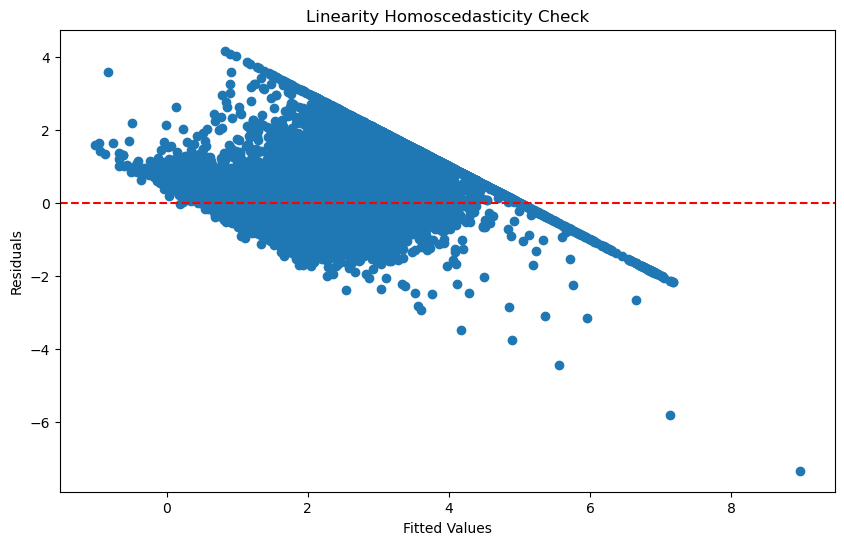

In [27]:
# Qalıqları al
residuals = model.resid
fitted = model.fittedvalues

# Qalıqların və əks olunmuş dəyərlərin plota gətirilməsi
plt.figure(figsize=(10, 6))
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Homoscedasticity Check')
plt.show()

2. **Autocorrelation resuduals - Müstəqillik (Independence):**

- Qalıqların autokorrelyasiyasını yoxlamaq üçün Durbin-Watson testini istifadə edin:

In [28]:
# Durbin-Watson testi
dw = sm.stats.durbin_watson(model.resid)
print(f'Durbin-Watson testi: {dw}')

Durbin-Watson testi: 0.8851659750498142


   **Autocorrelation resuduals (No Autocorrelation):**
- ACF plot ilə qalıqları yoxlayaq:

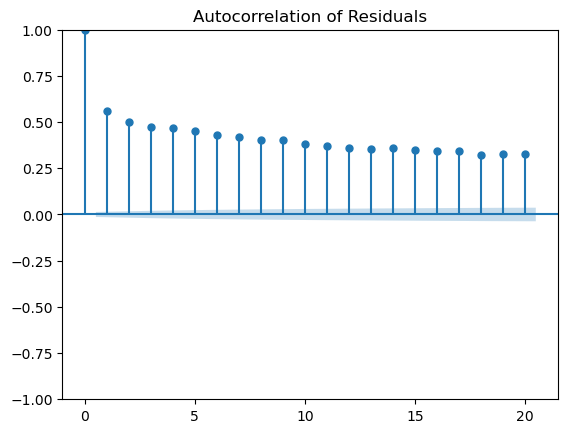

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals')
plt.show()

3. **Normal paylanma (Normality):**
- Qalıqların yayılmasını yoxlamaq üçün qalıqların histogramını və ya Q-Q plotunu çəkək:

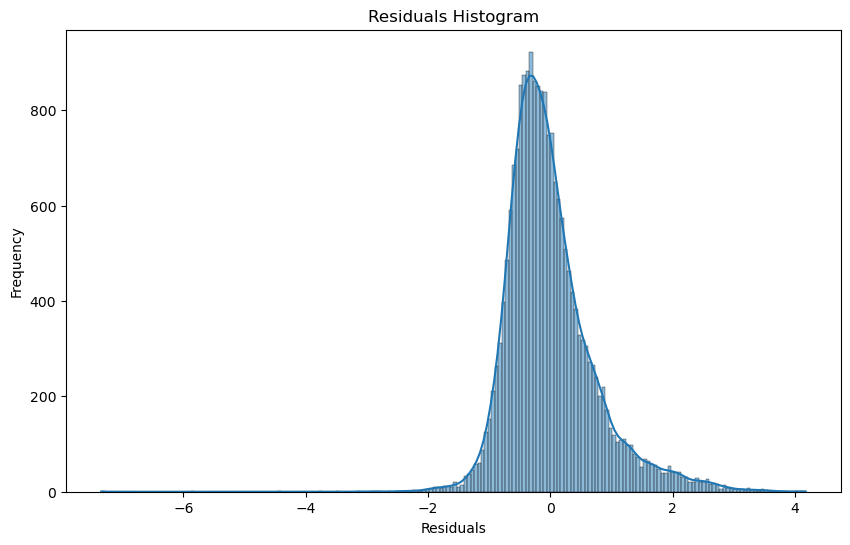

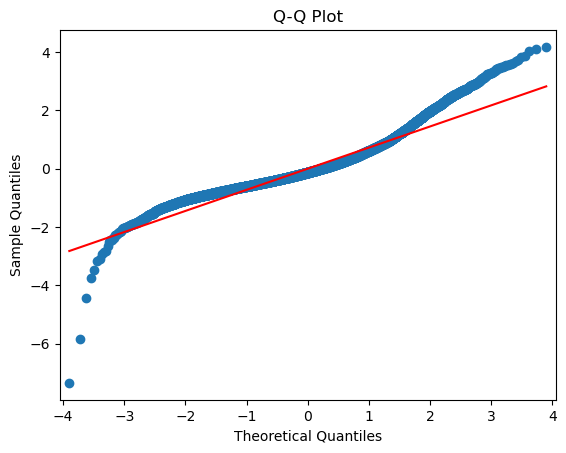

In [30]:
# Qalıqların histogramı
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

   **Normal paylanma (Normality):**
- Shapiro-Wilk testi:

In [31]:
from scipy import stats

# Shapiro-Wilk testi
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk testi: {shapiro_test}')

Shapiro-Wilk testi: ShapiroResult(statistic=0.9231338500976562, pvalue=0.0)


C:\Users\dell\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


4. **Multikolinearlıq:**
- Müstəqil dəyişənlər arasında multikolinearlığı yoxlamaq üçün VIF:

In [32]:
# VIF hesablamaq
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

     Variable           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


5. **Qalıqların Sum ve Mean Sıfıra Bərabər Olması**

In [36]:
import statsmodels.api as sm

# Modeli yaratdıqdan sonra qalıqları hesablayın
residuals = model.resid

# Qalıqların cəmini və ortalamasını hesablayın
sum_residuals = residuals.sum()
mean_residuals = residuals.mean()

print(f"Qalıqların cəmi: {sum_residuals}")
print(f"Qalıqların ortalaması: {mean_residuals}")

Qalıqların cəmi: 3.5635139283840545e-09
Qalıqların ortalaması: 1.7265086862325845e-13


## Homoscedasticity

Homoskedasticity (həmçinin homoscedasticity kimi yazılır) statistik modeldə **error termlərin** (qalıqların) və ya **residualların** sabit bir varyansa malik olduğunu bildirən bir anlayışdır. Yəni, modelin **proqnozlaşdırılan dəyərlərinə** qarşı qalıqların yayılması sabitdirsə, bu vəziyyət **homoskedasticity** adlanır.

### Əsas nöqtələr:
- **Homoskedasticity**: Residualların varyansı proqnozlar və ya müstəqil dəyişənlər üçün sabitdirsə, homoskedastikdir. Yəni qrafik üzərində qalıqlar sabit bir "bulud" şəklində görünür.
- **Heteroskedasticity**: Əgər varyans proqnoz dəyərlərinə görə dəyişirsə (bəzən az, bəzən çox yayılmış qalıqlar varsa), buna **heteroskedasticity** deyilir. Bu, model üçün ciddi problemlər yarada bilər, çünki dəyişən varyans nəticələri qeyri-dəqiq edər və statistik testlərin nəticələrini etibarsızlaşdıra bilər.

### Homoskedasticity ilə əlaqəli vizuallaşdırma:
Modelinizin qalıqlarını (residualları) nəzərdən keçirmək üçün ən yaxşı yollardan biri **Residual vs Fitted** qrafikidir. Əgər qalıqlar sabit bir yayılmaya malikdirsə, homoskedastiklik mövcuddur və qalıqlar proqnoz dəyərlərinə qarşı təsadüfi yayılmış olmalıdır.

### Homoskedasticity nümunəsi:
Əgər qalıqlar proqnoz dəyərlərinə qarşı sabit bir varyansa malikdirsə, bu vəziyyətdə model homoskedastik sayılır. Məsələn, xətti regresiya modelində qalıqların yayılması hər bir proqnoz dəyəri üçün təxminən eyni olarsa, homoskedastiklik mövcuddur.

### Heteroskedasticity nümunəsi:
Əgər qalıqların yayılması müstəqil dəyişənlər artdıqca və ya azaldıqca dəyişirsə (məsələn, daha böyük dəyərlərdə qalıqların yayılması genişlənir və ya daralırsa), bu, heteroskedastiklikdir.

### Heteroskedasticity problemini həll etmə yolları:
- **Log və ya kvadrat kök transformasiyaları**: Bu cür transformasiyalar heteroskedastikliyi azaltmağa kömək edə bilər.
- **Robust standart səhvlər**: Bu üsul heteroskedastiklik olsa belə, etibarlı statistik testlər aparmaq üçün istifadə olunur.

Homoskedasticity modelin doğruluğunu qorumaq üçün əhəmiyyətlidir, çünki heteroskedastiklik model nəticələrinin düzgün interpretasiyasına mane ola bilər.

## Temporal Fusion Transformer

**Temporal Fusion Transformer (TFT)**, zaman sıralı (time-series) verilənlər üzərində proqnozlaşdırma məqsədilə istifadə olunan dərin öyrənmə modelidir. TFT, müxtəlif zaman aralıqlarında müşahidələr və dəyişənlər arasındakı mürəkkəb əlaqələri öyrənmək üçün xüsusi olaraq dizayn edilmişdir. Bu model, seqmentlənmiş məlumatlarla (çoxlu verilənlər toplusu, dəyişənlər və dəyişən növləri) uğurla işləyə bilir və fərqli növ xüsusiyyətlər üzərində transformasiya apara bilir.

### TFT Modelinin Əsas Xüsusiyyətləri:

1. **Çoxlu vaxt nöqtələrini və xüsusiyyətləri birləşdirmək:**
   - TFT həm "static" (dəyişməyən) xüsusiyyətləri, həm də "time-varying" (dəyişən) xüsusiyyətləri birgə işləyə bilir. Bu, modelin həm zaman sıralı verilənləri, həm də verilənlərin zamanla necə dəyişdiyini öyrənməsinə imkan verir.
   
2. **Gələcək dəyişənlər və keçmiş müşahidələri inteqrasiya etmək:**
   - TFT modeli gələcəkdə olan dəyişənləri də analiz edərək proqnozlar yaradır. Bu, klassik zaman seriyası modellərindən fərqli olaraq, gələcəkdə gözlənilən dəyişiklikləri də nəzərə almaq qabiliyyəti verir.
   
3. **Temporal Pattern Attention Layer (Müvəqqəti Nümunə Diqqət Qatı):**
   - Modeldə xüsusi diqqət qatları (attention layers) vasitəsilə müəyyən zaman nöqtələrindəki məlumatlar arasında əlaqələr gücləndirilir. Bu, modelin uzunmüddətli və qısamüddətli nümunələri effektiv şəkildə öyrənməsinə imkan yaradır.

4. **Güclü proqnozlaşdırma imkanları:**
   - TFT, əsasən çoxluq içərisində olan zaman seriyalarını təhlil etmək üçün dizayn edilib, bu səbəbdən həm qısa müddətli, həm də uzun müddətli proqnozlaşdırmalarda güclü nəticələr əldə edir.

5. **Dynamic Local Variable (Dinamik Yerli Dəyişənlər):**
   - TFT həm qlobal (bütün məlumat üçün sabit qalan) dəyişənləri, həm də yerli (fərdi zaman seriyaları üçün dəyişən) dəyişənləri nəzərə alır. Bu, müxtəlif zaman nöqtələri üçün daha dəqiq proqnozlar yaratmağa imkan verir.

### TFT Modelinin Tətbiq Sahələri:
- **İstehlakçı tələb proqnozlaşdırması** (ticarət və logistika sahələrində),
- **Maliyyə proqnozları**, 
- **Enerji bazarlarında tələbat təxminləri**,
- **İqlim və hava proqnozlaşdırması**,
- **Medikal sahədə zaman sıralı verilənlər analizi**.

### TFT Modeli Necə Qurulur?
TFT modelini qurmaq üçün ümumiyyətlə `PyTorch` və ya `TensorFlow` kimi dərin öyrənmə kitabxanaları istifadə olunur. Bunun üçün daha rahat yanaşma isə `pytorch-forecasting` adlı paketdən istifadə etməkdir. Bu paket TFT və digər vaxt seriyası modelləri üçün hazır implementasiyalar təmin edir.

### Sadə bir TFT model kod nümunəsi:

```python
from pytorch_forecasting import TemporalFusionTransformer
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.metrics import QuantileLoss

# Məlumat hazırlığı
data = TimeSeriesDataSet(
    df,  # məlumat DataFrame-də olmalıdır
    time_idx="time_idx",
    target="target",  # proqnozlaşdırılacaq dəyişən
    group_ids=["group_id"],
    time_varying_known_reals=["time_varying_known"],  # bilinəən zaman dəyişənləri
    time_varying_unknown_reals=["time_varying_unknown"],  # bilinməyən zaman dəyişənləri
    max_encoder_length=60,  # keçmişdən götürüləcək zaman nöqtələri
    max_prediction_length=30,  # gələcəkdə proqnozlaşdırılacaq zaman nöqtələri
)

# Modelin qurulması
tft = TemporalFusionTransformer.from_dataset(
    data, 
    learning_rate=0.03, 
    hidden_size=16, 
    attention_head_size=4, 
    dropout=0.1, 
    loss=QuantileLoss(), 
    log_interval=10, 
    reduce_on_plateau_patience=4
)

# Modelin öyrədilməsi
trainer = pl.Trainer(gpus=0, max_epochs=30)
trainer.fit(tft, train_dataloader)
```

Bu nümunədə:
- **TimeSeriesDataSet**: Məlumatları TFT modelinə uyğun formatda hazırlayır.
- **TemporalFusionTransformer**: TFT modelini qurur.
- **QuantileLoss**: Proqnozlar üçün istifadə olunan xüsusi bir itki funksiyasıdır.

### Nəticə:
TFT modeli çox qatlı və geniş bir zaman seriyası proqnozlaşdırma modelidir və xüsusilə də çox dəyişkənli zaman seriyaları üçün uyğun hesab olunur. Bu model mürəkkəb zaman əlaqələrini və dəyişənlərin birgə təsirini effektiv şəkildə öyrənmək üçün güclüdür.

## Fourier Transform ve Fast Fourier Transform (FFT)

**Fourier Transform** və onun daha spesifik forması olan **Fast Fourier Transform (FFT)**, zaman seriyası analizində və siqnal emalında istifadə edilən güclü riyazi alətlərdən biridir. Bu alətlər funksiyaların zaman məkanından tezlik məkanına çevrilməsinə imkan verir. Fourier Transform, zaman seriyalarının və ya siqnalların tezlik komponentlərini müəyyən etməyə kömək edir.

### Fourier Transform nədir?

Fourier Transform bir funksiyanı fərqli sinusoidal komponentlərin (tezliklərin) cəmi şəklində yenidən təqdim etməyə imkan verir. Başqa sözlə, zaman domenində bir siqnalı alıb, həmin siqnalın hansı tezliklərdən ibarət olduğunu təhlil etməyə kömək edir.

Fourier Transform funksiyası bu şəkildə ifadə edilir:

\[
X(f) = \int_{-\infty}^{\infty} x(t) e^{-j 2 \pi f t} dt
\]

Burada:
- \( x(t) \) — zaman domenindəki siqnal,
- \( X(f) \) — tezlik domenindəki siqnal,
- \( f \) — tezlik,
- \( j \) — xəyali vahid.

### Fast Fourier Transform (FFT)

**Fast Fourier Transform (FFT)**, Fourier Transform-un sürətləndirilməsini təmin edən bir alqoritmdir. FFT, zaman seriyasını və ya siqnalı çox daha səmərəli şəkildə tezlik domeninə çevirmək üçün istifadə olunur. FFT-nin əsas üstünlüyü onun hesablanma sürətidir. Klassik Fourier Transform O(n²) vaxt mürəkkəbliyinə malik olduğu halda, FFT bunu O(n log n) ilə yerinə yetirir, bu da böyük ölçülü verilənlər üçün nəzərəçarpan fərq yaradır.

### Fourier Transformun Zaman Seriyalarında İstifadəsi

Fourier Transform zaman seriyası verilənlərində iki əsas məqsəd üçün istifadə olunur:
1. **Tezlik komponentlərinin müəyyənləşdirilməsi**: Zaman seriyasında hansı tezliklərin daha güclü olduğunu müəyyən etmək.
2. **Səs-küyün filtrasiyası**: Zaman seriyasından arzuolunmaz yüksək və ya aşağı tezlikli komponentləri çıxarmaq üçün istifadə edilə bilər.

### Fourier Transformun tətbiqi

Zaman seriyasında dövrləri (periodik dəyişiklikləri) tapmaq və ya siqnalda əsas tezlikləri müəyyən etmək üçün Fourier Transform tətbiq olunur. FFT-nin tətbiqi Python kimi proqramlaşdırma dillərində olduqca asandır və aşağıdakı kimi sadə bir şəkildə həyata keçirilə bilər.

### FFT tətbiqi - Python nümunəsi

```python
import numpy as np
import matplotlib.pyplot as plt

# Saxta zaman seriyası yaradırıq
time = np.linspace(0, 2, 1000, endpoint=False)
signal = np.sin(5 * 2 * np.pi * time) + 0.5 * np.sin(80 * 2 * np.pi * time)

# FFT tətbiq edirik
fft_result = np.fft.fft(signal)

# FFT nəticəsini vizuallaşdırırıq
freqs = np.fft.fftfreq(len(signal), d=(time[1] - time[0]))
plt.plot(freqs, np.abs(fft_result))
plt.title('FFT nəticəsi')
plt.xlabel('Tezlik (Hz)')
plt.ylabel('Amplituda')
plt.show()
```

Bu kod nümunəsində:
- Zaman seriyasında iki tezlikdən ibarət bir siqnal yaratdıq: biri 5 Hz, digəri isə 80 Hz.
- `np.fft.fft()` funksiyasını istifadə edərək FFT-ni tətbiq etdik.
- FFT nəticələrini tezlik domenində vizuallaşdırdıq, bu da siqnalın tərkibində olan tezlikləri göstərir.

### Fourier Transformun Xüsusiyyətləri və Üstünlükləri
- **Tezlik analizində güclü vasitədir**: Periodik strukturları və siqnalda dominant tezlikləri aşkar etmək üçün istifadə olunur.
- **Siqnalın filtrasiyası**: FFT istifadə edərək səs-küyü çıxarıb, siqnalı təmizləyə bilərsiniz.
- **Tətbiq sahələri**: Fourier Transform siqnal emalı, səs-küy filtrasiyası, audio siqnalları, görüntü emalı və hətta maliyyə zaman seriyalarında tezlik analizləri üçün geniş istifadə olunur.

### Nəticə

**Fourier Transform** və onun daha sürətli versiyası olan **Fast Fourier Transform (FFT)**, siqnalın və zaman seriyalarının tezlik domenində təhlil edilməsinə imkan verir. Bu metod zaman seriyalarında dövrlərin aşkarlanması, təmizlənməsi və əsas tezlik komponentlərinin aşkar edilməsi üçün əvəzsiz bir alətdir.

## Optuna ilə Hiperparametr Optimizasiyası

### Optuna ilə Hiperparametr Optimizasiyası

**Optuna**, açıq mənbə kodlu bir kitabxana olub, maşın öyrənməsi modellərində hiperparametrlərin avtomatik optimizasiyasını təmin edir. Modelin performansını yaxşılaşdırmaq üçün optimal hiperparametrləri tapmaq vacibdir və bu proses çox vaxt əl ilə həyata keçirildikdə vaxt aparıcı olur. **Optuna** bu prosesi avtomatlaşdırır və daha səmərəli edir.

Optuna-nın əsas xüsusiyyəti onun **Bayesian Optimization** texnikasına əsaslanan səmərəli hiperparametr axtarışıdır. Bu texnika random axtarışdan fərqli olaraq daha ağıllı şəkildə axtarış sahəsini daraldır və daha sürətli nəticələrə çatmağa kömək edir.

#### Optuna-nın iş prinsipi:
1. **Objective Funksiyası:** Hər bir optimizasiya prosesində bir objective funksiyası yazılır. Bu funksiya hansı hiperparametrlərin sınaqdan keçirildiyini və modelin performansının necə qiymətləndirildiyini müəyyən edir.
2. **Study:** Optimizasiya prosesi bir **study** daxilində həyata keçirilir. Bu study müxtəlif **trial**-lardan ibarətdir və hər bir trial hiperparametrlərin fərqli bir konfiqurasiyası ilə modelin təlimini və testini həyata keçirir.
3. **Trial:** Hər bir trial üçün müxtəlif hiperparametr dəyərləri təyin edilir və objective funksiyasına ötürülür.

### Optuna ilə Hiperparametr Optimizasiyası Kodu

Aşağıda Optuna ilə hiperparametr optimizasiyasının sadə bir nümunəsini təqdim edirəm. Bu nümunədə **NeuralProphet** modeli üçün **learning rate** hiperparametrini optimizasiya edirik və hər trial üçün learning rate dəyərini çap edirik:

```python
import optuna
from neuralprophet import NeuralProphet

# Objective funksiyası
def objective(trial):
    # Hər bir trial üçün learning rate dəyəri təyin olunur
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # NeuralProphet modelini qururuq
    model = NeuralProphet(
        growth="linear",
        changepoints=None,
        n_changepoints=5,
        changepoints_range=0.8,
        trend_reg=0,
        trend_reg_threshold=False,
        yearly_seasonality="auto",
        weekly_seasonality="auto",
        daily_seasonality="auto",
        seasonality_mode="additive",
        seasonality_reg=0,
        n_forecasts=1,
        n_lags=0,
        loss_func="Huber",
        normalize="auto",
        impute_missing=True
    )
    
    # Hər trial-da seçilən learning rate dəyərini çap edirik
    print(f"Current trial learning rate: {lr}")
    
    # Modeli fit edirik
    metrics = model.fit(y, learning_rate=lr, epochs=40, freq="MS")
    
    # Zərərləri qiymətləndiririk
    if len(metrics['Loss']) > 0:
        return metrics['Loss'].iloc[-1]
    else:
        raise ValueError("Loss seriyası boşdur.")

# Study prosesini başlatmaq
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Ən yaxşı learning rate dəyərini çap edirik
print("Best learning rate: ", study.best_params)
```

### İzah:
1. **Objective Funksiyası:** Hər bir trial zamanı `objective()` funksiyası çağırılır. Bu funksiya modelin qurulmasını və `learning_rate` kimi hiperparametrlərin sınanmasını təmin edir.
2. **Hiperparametr Axtarışı:** `trial.suggest_loguniform('learning_rate', 0.001, 0.9)` ilə hər trial üçün fərqli `learning_rate` dəyəri seçilir. `loguniform` funksiyası log miqyasda rastgele bir dəyər seçir, 0.001 və 0.9 aralığında.
3. **Learning Rate Çapı:** `print(f"Current trial learning rate: {lr}")` sətiri hər bir trial-da seçilən `learning_rate` dəyərini konsola çap edir.
4. **Fit Prosesi:** Model təlim edilir (`fit` funksiyası ilə) və sonra əldə olunan `Loss` metric-i optimizasiya məqsədi ilə geri qaytarılır.
5. **Optuna Study:** `optuna.create_study(direction='minimize')` ilə optimizasiya prosesi yaradılır. `study.optimize()` isə müəyyən sayda trial icra edir (bu nümunədə 10).

### Digər Modellərə Uyğunlaşdırma

Əgər başqa bir model, məsələn **XGBoost** və ya **RandomForest** ilə işləyirsinizsə, eyni metodologiya tətbiq edilə bilər, sadəcə model konfiqurasiyası və `fit` prosesi fərqli olacaq. Aşağıda **XGBoost** ilə eyni optimizasiya prosesini göstərirəm:

```python
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Objective funksiyası
def objective(trial):
    # Hər bir trial üçün learning rate dəyəri təyin edilir
    lr = trial.suggest_loguniform('learning_rate', 0.001, 0.9)
    
    # XGBoost modelini qururuq
    model = XGBRegressor(learning_rate=lr, n_estimators=trial.suggest_int('n_estimators', 50, 300))
    
    # Hər trial-da seçilən learning rate dəyərini çap edirik
    print(f"Current trial learning rate: {lr}")
    
    # Modeli fit edirik
    model.fit(X_train, y_train)
    
    # Proqnozları əldə edib RMSE-ni hesablayırıq
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    
    # RMSE geri qaytarılır
    return rmse

# Study prosesini başlatmaq
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Ən yaxşı parametrləri çap edirik
print("Best parameters: ", study.best_params)
```

Bu nümunədə **XGBoost** modelini istifadə edərək learning rate və n_estimators kimi hiperparametrləri optimizasiya edirik.

### interpolate()

Pandas-da `interpolate()` metodu itkin dəyərləri doldurmaq üçün müxtəlif interpolasiya üsulları təklif edir. Hansı interpolasiya metodunun istifadə ediləcəyi datanın növünə və ehtiyacınıza bağlıdır. Aşağıda ən çox istifadə olunan interpolasiya metodlarını və hansı hallarda istifadə edilə biləcəyinizi izah edirəm:

### 1. **`method='linear'` (Xətti interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     İtkin dəyərləri qonşu nöqtələr arasında xətti bir əlaqə ilə interpolasiya etmək üçün uyğundur. Əgər məlumatlarınız zamana bağlıdırsa və davamlı dəyişir, xətti interpolasiya faydalı ola bilər.
   - **Nümunə:**
     Temperatur, maliyyə göstəriciləri və ya zaman seriyalarında istifadə edilə bilər.
   ```python
   df['column'].interpolate(method='linear')
   ```

### 2. **`method='time'` (Zamana əsaslanan interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Vaxt seriyası məlumatlarında, indeksdəki zaman məlumatlarına əsasən interpolasiya edilir.
   - **Nümunə:**
     Zaman fərqlərinə uyğun interpolasiya etmək üçün istifadə olunur.
   ```python
   df['column'].interpolate(method='time')
   ```

### 3. **`method='polynomial'` (Polinomial interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Dəyərlər arasında qeyri-xətti bir əlaqə varsa, polinomial interpolasiya daha uyğun ola bilər. Bu metod çoxlu dərəcəli əyri interpolasiyası yaradır.
   - **Nümunə:**
     Məsələn, ekonometrik modellərdə və ya fiziologiya məlumatlarında yüksək dərəcəli interpolasiya üçün istifadə edilə bilər.
   ```python
   df['column'].interpolate(method='polynomial', order=2)  # 2-ci dərəcəli polinom
   ```

### 4. **`method='spline'` (Spline interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Daha hamar əyri interpolasiyası yaratmaq üçün spline interpolasiyası istifadə olunur. `polynomial` metoduna bənzəyir, lakin daha düzgün əyri yaratmaq üçün uyğundur.
   - **Nümunə:**
     Qeyri-xətti və mürəkkəb dəyişikliklər olan datasetlərdə.
   ```python
   df['column'].interpolate(method='spline', order=2)
   ```

### 5. **`method='pad'` və `method='ffill'` (Əvvəlki dəyərlə doldurma):**
   - **Nə vaxt istifadə etməli:** 
     İtkin dəyərləri əvvəlki dəyərlə doldurur. Verilənlər ardıcıl olaraq monoton şəkildə dəyişirsə, bu metod faydalıdır.
   - **Nümunə:**
     Müştəri məlumatları və ya ardıcıl zaman seriyaları.
   ```python
   df['column'].interpolate(method='pad')
   ```

### 6. **`method='backfill'` və ya `method='bfill'` (Sonrakı dəyərlə doldurma):**
   - **Nə vaxt istifadə etməli:** 
     İtkin dəyərləri sonrakı dəyərlə doldurur. Gələcək dəyərlərə əsaslanan interpolasiya üçün uyğundur.
   ```python
   df['column'].interpolate(method='bfill')
   ```

### 7. **`method='nearest'` (Ən yaxın dəyərlə interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     İtkin dəyəri ona ən yaxın olan mövcud dəyərlə doldurur. Diskret məlumatlarda istifadə üçün idealdır.
   ```python
   df['column'].interpolate(method='nearest')
   ```

### 8. **`method='zero'` (Addım funksiyası interpolasiyası):**
   - **Nə vaxt istifadə etməli:** 
     Dəyərləri dəyişməz saxlayır və addım-addım interpolasiya edir. Xüsusilə addım dəyişikliklərin olduğu proseslər üçün uyğundur.
   ```python
   df['column'].interpolate(method='zero')
   ```

### 9. **`method='slinear'` (Sadə xətti interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Xətti interpolasiya ilə sadə bir şəkildə iki nöqtə arasında interpolasiya edir.
   ```python
   df['column'].interpolate(method='slinear')
   ```

### 10. **`method='quadratic'` (Kvadratik interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     İkinci dərəcəli interpolasiya ilə əyri interpolasiyası üçün istifadə olunur.
   ```python
   df['column'].interpolate(method='quadratic')
   ```

### 11. **`method='cubic'` (Kub interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Üçüncü dərəcəli interpolasiya tətbiq edir və daha hamar interpolasiya yaradır.
   ```python
   df['column'].interpolate(method='cubic')
   ```

### 12. **`method='barycentric'` (Barycentrik interpolasiya):**
   - **Nə vaxt istifadə etməli:** 
     Kompleks çoxnöqtəli interpolasiya üçün uyğundur.
   ```python
   df['column'].interpolate(method='barycentric')
   ```

### **Digər Parametrlər:**
- **`limit`**: Doldurulacaq maksimum itkin dəyər sayını məhdudlaşdırmaq üçün istifadə edilir.
   ```python
   df['column'].interpolate(method='linear', limit=2)
   ```

### Nəticə:
- **Diskret dəyərlər** üçün: `nearest`, `zero`
- **Xətti dəyişikliklər** üçün: `linear`, `slinear`
- **Qeyri-xətti dəyişikliklər** üçün: `quadratic`, `cubic`, `polynomial`, `spline`
- **Sadə interpolasiya** üçün: `pad`, `backfill`

Bu interpolasiya metodlarını datasınızdakı məlumatların təbiətinə və ehtiyacınıza uyğun seçə bilərsiniz.

## adfuller

Aşağıda ADF (Augmented Dickey-Fuller) testinin yerinə yetirildiyi kodun hər bir sətrinin nə etdiyini izah edən şərhləri Azərbaycan dilində əlavə etdim. Həmçinin, nəticələrin izahını da verdim:

```python
from statsmodels.tsa.stattools import adfuller  # ADF testini yerinə yetirmək üçün lazımlı funksiyanı yükləyir

# ADF Test
result = adfuller(df.value.values, autolag='AIC')  # 'value' sütununu istifadə edərək ADF testini yerinə yetirir
print(f'ADF Statistic: {result[0]}')  # ADF statistik dəyərini çap edir
print(f'p-value: {result[1]}')  # p-dəyərini çap edir
for key, value in result[4].items():  # Tənqidi dəyərləri çap etmək üçün döngü
    print('Critial Values:')  # 'Critial Values' başlığını çap edir
    print(f'   {key}, {value}')  # Tənqidi dəyəri və onun müvafiq dəyərini çap edir
```

### Nəticələrin İzahtı:

1. **ADF Statistic: 3.14518568930675**:
   - Bu dəyər, test edilən zaman seriyasının stasionar olub olmadığını göstərir. ADF statistikası daha yüksək olduqda (müsbət), zaman seriyası stasionar olmaya bilər. Bu dəyər, sıfır hipotezini (stasionar olmayan) yoxlamaq üçün istifadə olunur.

2. **p-value: 1.0**:
   - P-dəyəri, sıfır hipotezinin (zaman seriyasının stasionar olmaması) qəbul edilməsi üçün ehtimalı göstərir. 1.0 dəyəri, sıfır hipotezinin qəbul edilməsinin çox yüksək olduğunu göstərir, yəni zaman seriyası stasionar deyil.

3. **Critical Values**:
   - **1%: -3.465620397124192**: Bu dəyər, ADF testinin 1% əhəmiyyət səviyyəsində stasionarlıq üçün tənqidi dəyəridir. ADF statistikası bu dəyərdən aşağı olmalıdır ki, sıfır hipotezini (stasionar olmama) rədd edək.
   - **5%: -2.8770397560752436**: 5% əhəmiyyət səviyyəsində tənqidi dəyərdir. ADF statistikası bu dəyərdən aşağı olmalıdır ki, stasionarlıq təsdiqlənsin.
   - **10%: -2.5750324547306476**: 10% əhəmiyyət səviyyəsində tənqidi dəyərdir.

### Ümumi Yekun:
ADF testinin nəticələri, test olunan zaman seriyasının stasionar olmadığını göstərir. Çünki ADF statistik dəyəri (3.145) bütün tənqidi dəyərlərdən (1%, 5%, 10%) yuxarıdır və p-dəyəri (1.0) sıfır hipotezini qəbul etməyə işarə edir. Bu, zaman seriyasının qeyri-stasionar olduğunu bildirir və bu halda zaman seriyasının transformasiyası (məsələn, fərqləndirmə) lazım ola bilər.

---
Tənqidi dəyərlər (critical values) ADF (Augmented Dickey-Fuller) testinin nəticələrini qiymətləndirmək üçün istifadə olunan əhəmiyyət səviyyələridir. Bu dəyərlər, testin sıfır hipotezini (zaman seriyasının stasionar olmaması) rədd etmək üçün nə qədər əhəmiyyətli olduğunu müəyyən edir. Gəlin daha ətraflı izah edək:

### Tənqidi Dəyərlərin Anlayışı

- **Tənqidi Dəyər**: ADF testinin nəticəsi olan ADF statistik dəyəri ilə müqayisə edilən dəyərdir. Bu dəyər, zaman seriyasının stasionar olub olmadığını müəyyən etmək üçün istifadə olunur.

- **Əhəmiyyət Səviyyələri**:
  - **1% Əhəmiyyət Səviyyəsi**: Bu, tənqidi dəyərin ADF testinin 1% əhəmiyyət səviyyəsindəki qiymətidir. Əgər ADF statistik dəyəri bu dəyərdən aşağıdırsa, sıfır hipotezini (stasionar olmama) 1% risk səviyyəsi ilə rədd edə bilərsiniz. Yəni, nəticəniz 1% əhəmiyyət səviyyəsində güvənlidir.
  - **5% Əhəmiyyət Səviyyəsi**: Bu, 5% risk səviyyəsində tənqidi dəyərdir. ADF statistik dəyəri bu dəyərdən aşağıdırsa, sıfır hipotezini 5% risk səviyyəsi ilə rədd edə bilərsiniz.
  - **10% Əhəmiyyət Səviyyəsi**: 10% risk səviyyəsində tənqidi dəyərdir. ADF statistik dəyəri bu dəyərdən aşağı olarsa, sıfır hipotezini 10% risk səviyyəsi ilə rədd edə bilərsiniz.

### Nəticələrin İzahtı

- **ADF Statistik Dəyəri**: Sizin test nəticənizdə ADF statistik dəyəri 3.145-dir.
- **Tənqidi Dəyərlər**:
  - 1%: -3.4656
  - 5%: -2.8770
  - 10%: -2.5750

### Qiymətləndirmə

- **Stasionarlıq Rəddi**: Əgər ADF statistik dəyəri bu tənqidi dəyərlərdən aşağıdırsa (məsələn, 1%, 5% və ya 10% tənqidi dəyər), zaman seriyası stasionar deyil və sıfır hipotezini rədd edirsiniz.
- **Stasionarlığın Qəbul Edilməsi**: Əgər ADF statistik dəyəri tənqidi dəyərlərdən yuxarıdırsa, sıfır hipotezini qəbul edirsiniz (yəni, zaman seriyası stasionardır).

### Sizin Nəticələriniz
Sizin ADF statistik dəyəriniz (3.145) bütün tənqidi dəyərlərdən (1%, 5%, 10%) yuxarıdır, bu da zaman seriyanızın stasionar olmadığını göstərir. Yəni, sıfır hipotezini qəbul edirsiniz. 

Ümid edirəm ki, bu izahat sizə tənqidi dəyərləri daha yaxşı başa düşməyə kömək edəcək! Hər hansı sualınız varsa, soruşmaqdan çəkinməyin!

## Activation Function

Aktivasiya funksiyaları, neyron şəbəkələrində hər bir neyronun digərinə olan təsirini tənzimləyən əsas elementlərdir. Bu funksiyalar, bir neyronun çıxışını müəyyənləşdirərək onun növbəti qatlarda ötürülməsinə və şəbəkənin qeyri-xətti problemləri öyrənməsinə imkan yaradır. Aktivasiya funksiyalarını seçmək neyron şəbəkəsinin performansına və doğruluğuna əhəmiyyətli dərəcədə təsir edir. Gəlin geniş yayılmış aktivasiya funksiyalarını təfərrüatı ilə nəzərdən keçirək.




### 1. Linear Aktivasiya Funksiyası

Linear aktivasiya funksiyası neyron şəbəkələrdə istifadə olunur, xüsusilə də regresiya problemlərində. Linear aktivasiya funksiyası giriş dəyərini olduğu kimi çıxışa verir, yəni burada hər hansı bir qeyri-xətti çevrilmə baş vermir. 

**Tənlik**: \( f(x) = x \)

Linear aktivasiya funksiyası əsasən son çıxış qatında (output layer) istifadə olunur və modelin giriş-çıxış arasında sadə xətti əlaqə qurmasına imkan yaradır. Regressiya problemlərində modelin davamlı ədədi dəyərlər verməsi lazım olduğu hallarda linear funksiyadan istifadə edilir.

- **Üstünlüklər**:
  - Sadədir və çıxışı heç bir dəyişiklik etmədən olduğu kimi verir.
  - Regressiya kimi problemlərdə giriş və çıxış arasındakı xətti əlaqəni öyrənmək üçün idealdır.

- **Çatışmazlıqlar**:
  - Qeyri-xətti çevrilmə təmin etmədiyi üçün yalnız xətti problemlər üçün uyğundur.
  - Şəbəkəyə mürəkkəb, qeyri-xətti strukturları öyrənməyə imkan vermir, bu da onun dərin qatlarda tətbiqini məhdudlaşdırır.
  - Bir neçə linear qat üst-üstə əlavə edildikdə, nəticə yenə də xətti olur. Yəni, bir neçə linear funksiya qatını birləşdirmək kompleks modellər üçün faydalı olmur.

### Linear Funksiyanın İstifadəsi
Çox zaman, dərin neyron şəbəkələrdə linear aktivasiya funksiyası yalnız çıxış qatında tətbiq edilir və ara qatlarda (hidden layers) qeyri-xətti funksiyalar istifadə olunur. Bu, şəbəkənin kompleks əlaqələri öyrənməsi üçün vacibdir. Lakin çıxışın davamlı ədədi dəyərləri verməsi lazım olduqda linear funksiya optimal seçimdir. 

Linear funksiyanı istifadə etmək, modelin xətti əlaqəni daha yaxşı öyrənməsinə və nisbətən sadə strukturlu problemləri həll etməsinə imkan yaradır.





### 2. Sigmoid Aktivasiya Funksiyası
**Tənlik**: \( f(x) = \frac{1}{1 + e^{-x}} \)

Sigmoid funksiyası giriş dəyərlərini 0 ilə 1 arasında normallaşdırır. Bu, xüsusilə ehtimal çıxışlarına ehtiyac olan model tətbiqlərində istifadə olunur.

- **Üstünlüklər**:
  - Sadədir və çıxışları 0-1 arasında normallaşdırır.
  - Klassifikasiya problemlərində ehtimal kimi şərh edilə bilən nəticələr verir.

- **Çatışmazlıqlar**:
  - Doyma problemindən əziyyət çəkir; yəni böyük müsbət və mənfi girişlərdə funksiya demək olar ki, sabit olur.
  - Gradientlər çox kiçik olur, buna görə də **vanishing gradient problem** (itən gradient problemi) yaranır.
  - Çıxış aralığı sıfırdan fərqli olduğundan şəbəkə oyanışları qeyri-mərkəzləşmiş olur.

### 3. Tanh (Hyperbolic Tangent) Aktivasiya Funksiyası
**Tənlik**: \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)

Tanh funksiyası girişləri -1 ilə 1 arasında xəritələndirir. Bu funksiya da sigmoidə bənzərdir, amma çıxış aralığı -1 ilə 1 arasında olduğundan şəbəkəni mərkəzləşdirir.

- **Üstünlüklər**:
  - Mərkəzləşmiş çıxış verdiyinə görə optimizasiya prosesini daha da asanlaşdırır.
  - Geniş tətbiq sahəsinə malikdir və bir çox hallarda sigmoidə üstünlük verilir.

- **Çatışmazlıqlar**:
  - Yenə də itən gradient problemi ilə qarşılaşır.
  - Çıxışlar doyana qədər doymaya meyillidir.

### 4. ReLU (Rectified Linear Unit) Aktivasiya Funksiyası
**Tənlik**: \( f(x) = \max(0, x) \)

ReLU funksiyası son illərdə neyron şəbəkələrdə ən geniş istifadə edilən aktivasiya funksiyasıdır. ReLU yalnız müsbət girişlər üçün açılır və mənfi dəyərləri sıfıra çevirir.

- **Üstünlüklər**:
  - Sadeliyi və sürətliliyi ilə seçilir.
  - **Vanishing gradient** problemindən əziyyət çəkmir, buna görə də daha dərinə gedən şəbəkələr üçün uyğun gəlir.
  - Modelin öyrənməsini sürətləndirir.

- **Çatışmazlıqlar**:
  - **Dying ReLU** problemi var; bəzi neyronlar sıfır dəyərinə "ilişib" qalır və daha öyrənmir.
  - Daha böyük dəyərlərdə daha yüksək aktivasiya yarada biləcəyindən qeyri-sabit çıxışlar yarada bilər.

### 5. Leaky ReLU Aktivasiya Funksiyası
**Tənlik**: \( f(x) = x \) (x > 0),  \( f(x) = 0.01x \) (x ≤ 0)

Leaky ReLU, ReLU funksiyasının dəyişmiş versiyasıdır. Bu funksiya, mənfi giriş dəyərlərinə kiçik bir əmsalla çıxış verir.

- **Üstünlüklər**:
  - **Dying ReLU** problemini aradan qaldırmağa kömək edir.
  - Mənfi girişlər üçün kiçik dəyərlər təyin edərək öyrənmə qabiliyyətini artırır.

- **Çatışmazlıqlar**:
  - Mənfi girişlər üçün təsadüfi bir əmsal seçilməsi modelin konvergensiyasına təsir göstərə bilər.
  
### 6. Softmax Aktivasiya Funksiyası
**Tənlik**: \( f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}} \)

Softmax çox sinifli klassifikasiya problemlərində çıxışları ehtimal dəyərlərinə çevirmək üçün istifadə olunur. Bu funksiya, bir neçə sinifə bölünmə hallarını 1-ə bərabər bir ehtimala çevirərək sinif ehtimallarını verir.

- **Üstünlüklər**:
  - Çox sinifli problemlər üçün uyğun gəlir.
  - Sinif ehtimallarını verir, bununla da hansı sinifin daha çox ehtimalla təyin olunduğunu göstərir.

- **Çatışmazlıqlar**:
  - İtən gradient problemi yarana bilər.
  - Siniflər arasında asılılıq olduğunda daha mürəkkəb analizlər tələb olunur.

### 7. Swish Aktivasiya Funksiyası
**Tənlik**: \( f(x) = x \cdot \text{sigmoid}(x) \)

Swish funksiyası Google tərəfindən təqdim olunub və ReLU ilə bənzərliklər göstərir, lakin daha axıcıdır. Funksiya daha yüksək dəqiqlik və konvergensiya sürəti verir.

- **Üstünlüklər**:
  - Gradientlərin davamlı olduğu üçün daha dərin şəbəkələrdə daha yaxşı performans göstərir.
  - Modelin doğruluğunu artırır və itən gradient problemini qismən aradan qaldırır.

- **Çatışmazlıqlar**:
  - Hesablama baxımından daha ağırdır.
  
### 8. GELU (Gaussian Error Linear Unit) Aktivasiya Funksiyası
**Tənlik**: \( f(x) = x \cdot \Phi(x) \), burada \( \Phi(x) \) normal paylanmış yığılmış ehtimaldır.

GELU, Transformer modellərində istifadə olunan məşhur bir funksiyadır. Girişləri ehtimal əsaslı keçid ilə çıxışa çevirməklə təkmilləşdirilmiş öyrənmə xüsusiyyətləri təmin edir.

- **Üstünlüklər**:
  - Dərin modellərdə yüksək performans göstərir.
  - Gradientlər daha yaxşı idarə olunur və modelin konvergensiya sürətini artırır.

- **Çatışmazlıqlar**:
  - Daha mürəkkəbdir və hesablamalar daha çox vaxt tələb edir.

### Aktivasiya Funksiyalarının Seçilməsi
Şəbəkənin təbiətinə görə aktivasiya funksiyasını seçmək performansa böyük təsir göstərir. Sadə klassifikasiya üçün **sigmoid** və **softmax**, dərin şəbəkələr üçün **ReLU**, **Leaky ReLU** və **GELU** daha uyğundur. Çox sinifli problemlərdə softmax tətbiq olunur, regressiya və digər mürəkkəb tətbiqlərdə isə tanh, ReLU və onun müxtəlif versiyalarından istifadə edilir. 

Bu funksiyaların məqsədi şəbəkəni qeyri-xətti hala gətirərək daha mürəkkəb və çox ölçülü strukturların öyrənilməsini təmin etməkdir.

## Linear və Non-Linear Activation Functions

Neyron şəbəkələrdə aktivasiya funksiyaları xətti (linear) və qeyri-xətti (non-linear) olaraq iki əsas kateqoriyaya bölünür. Hər iki növün tətbiqi müxtəlifdir və şəbəkənin öyrənmə imkanlarını fərqli şəkildə təsir edir.

### Xətti (Linear) Aktivasiya Funksiyaları
Xətti aktivasiya funksiyaları giriş və çıxış arasında xətti əlaqə saxlayır, yəni girişin sadəcə bir əmsalla vurulması və ya sabit bir ədədin əlavə olunması ilə çıxış alınır. Bu funksiyalar yalnız xətti əlaqələri modelləşdirə bilər və mürəkkəb, qeyri-xətti nümunələri öyrənmək üçün əlverişli deyillər.

1. **Linear Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x) = x \)
   - Giriş olduğu kimi çıxışa ötürülür. Çox vaxt son çıxış qatında, xüsusən də regresiya problemlərində istifadə olunur.
  
2. **Identity Funksiyası**
   - Eyni zamanda linear funksiyanın bir növü olaraq qəbul edilir.
   - **Tənlik**: \( f(x) = x \)

### Qeyri-Xətti (Non-Linear) Aktivasiya Funksiyaları
Qeyri-xətti aktivasiya funksiyaları şəbəkənin mürəkkəb, qeyri-xətti nümunələri öyrənməsinə imkan verir və hər qat arasındakı əlaqənin xətti olmamasını təmin edir. Bu funksiyalar dərin neyron şəbəkələrdə istifadə olunur və kompleks problemləri həll etmək üçün vacibdir.

1. **Sigmoid Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x) = \frac{1}{1 + e^{-x}} \)
   - Çıxış dəyərləri 0 ilə 1 arasında olur. Əsasən, klassifikasiya problemlərində ehtimallar kimi istifadə olunur.

2. **Tanh (Hyperbolic Tangent) Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
   - Çıxış -1 ilə 1 arasında dəyişir və mərkəzləşdirilmiş nəticələr verir.

3. **ReLU (Rectified Linear Unit) Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x) = \max(0, x) \)
   - Mənfi dəyərləri sıfıra çevirir, müsbətləri olduğu kimi ötürür. Dərin şəbəkələrdə geniş istifadə edilir.

4. **Leaky ReLU**
   - **Tənlik**: \( f(x) = x \) (x > 0), \( f(x) = 0.01x \) (x ≤ 0)
   - Mənfi dəyərlər üçün kiçik bir əmsalla nəticə verir, bu da **Dying ReLU** problemini azaltmağa kömək edir.

5. **Softmax Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}} \)
   - Çox sinifli klassifikasiya üçün istifadə edilir və sinif ehtimallarını 0 ilə 1 arasında təmin edir.

6. **Swish Aktivasiya Funksiyası**
   - **Tənlik**: \( f(x) = x \cdot \text{sigmoid}(x) \)
   - Səlis keçid təmin edərək dərin şəbəkələrdə performansı artırır.

7. **GELU (Gaussian Error Linear Unit)**
   - **Tənlik**: \( f(x) = x \cdot \Phi(x) \), burada \( \Phi(x) \) normal paylanmış yığılmış ehtimaldır.
   - Transformer modellərində istifadə olunur və davamlı, yaxşı idarə olunan gradientlər təmin edir.

### Xətti və Qeyri-Xətti Funksiyaların Seçimi
- **Xətti funksiyalar** yalnız giriş və çıxış arasında xətti əlaqə yaratmaq üçün istifadə olunur. Buna görə də əsasən regresiya problemlərində və modelin yalnız bir xətti çevrilmə ehtiyac duyduğu hallarda tətbiq edilir.
- **Qeyri-xətti funksiyalar** isə şəbəkəyə mürəkkəb strukturları öyrənməyə imkan verir. Dərin öyrənmə modellərində qat-qat mürəkkəb əlaqələr yaratmaq üçün əsasən qeyri-xətti funksiyalara üstünlük verilir.

## Convolution Layer

**Convolution layer** (konvolusiya qatı), konvolusiya neyron şəbəkələrində (CNN) istifadə olunan əsas qatdır və şəkillər kimi strukturlaşdırılmış verilənlərdən xüsusiyyətləri çıxarmaq üçün nəzərdə tutulub. Bu qat, kiçik bir **kernel** və ya **filtr** matrisini giriş məlumatının üzərində sürüşdürərək (sliding) xüsusiyyətləri aşkar edir, məsələn, kənarlar, toxumalar və mürəkkəb naxışlar. 

### Convolution Layer necə işləyir?
1. **Kernelin sürüşdürülməsi**:
   - Kernel matrisləri (məsələn, 3x3 ölçüsündə) giriş matrisinin üzərində müəyyən addımlarla (stride) sürüşdürülür.
   
2. **Konvolusiya əməliyyatı**:
   - Hər bir sürüşmə addımında kernel ilə girişin uyğun hissəsi arasında çarpma və toplama aparılır və bu nəticə çıxış matrisinin müvafiq hüceyrəsinə yerləşdirilir.
   
3. **Çıxış xüsusiyyət xəritəsi**:
   - Nəticədə alınan çıxış matrisi **xüsusiyyət xəritəsi** (feature map) adlanır. Bu xəritə, girişin müxtəlif xüsusiyyətlərini (kənarları, rəng dəyişmələri və formaları) təmsil edir.

### Convolution Layer-in əsas komponentləri:
- **Kernel (Filtr)**: Kiçik ölçülü matrislərdir və hər biri fərqli xüsusiyyətləri çıxarmağa kömək edir.
- **Stride (Addım ölçüsü)**: Kernelin giriş matrisi üzərində hərəkət edərkən addım ölçüsüdür.
- **Padding**: Giriş matrisinin kənarına sıfır əlavə edilərək məlumat itkisini minimuma endirmək üçün istifadə olunur.
- **Aktivasiya funksiyası**: Adətən, `ReLU` (Rectified Linear Unit) kimi qeyri-xətti funksiyalar xüsusiyyət xəritəsinə tətbiq edilir ki, mürəkkəb nümunələr tanınsın.

### Convolution Layer nə üçün vacibdir?
Bu qat, böyük ölçülü şəkil məlumatlarını daha kiçik və idarə olunan xüsusiyyət xəritələrinə çevirməyə kömək edir. CNN-lərdə ilk qatlar sadə xüsusiyyətləri (kənarları, rəngləri) öyrənir, daha dərin qatlar isə mürəkkəb obyektlərə aid xüsusiyyətləri tanıyır. Bu xüsusiyyətlər obyektin müxtəlif bucaqlardan belə tanınmasına imkan yaradır.

## Convolutional Layer çıxış ölçüsünü hesablamaq

Bu düstur, çox güman ki, konvolyusiya layının çıxış ölçüsünü hesablamaq üçün istifadə olunur. Konvolyusiya təbəqələrində çıxış ölçüsünü tapmaq üçün bu düsturdan istifadə edilir:

$$ 
{Output size} = \frac{(S - F + 2P)}{\text{stride}} + 1
$$

Burada:
- \( S \) — giriş ölçüsü (en və ya hündürlük),
- \( F \) — filter ölçüsü (kernel ölçüsü),
- \( P \) — padding (məhdudlaşdırma qatı),
- \(stride\) — addım ölçüsüdür.

Bu düstur ilə konvolyusiya sonrası çıxış ölçüsünü hesablaya bilərsiniz.

## Kernel nedir?

**Kernel** (və ya filtr), konvolusiya neyron şəbəkələrində (CNN) giriş məlumatlarından xüsusiyyətləri çıxarmaq üçün istifadə edilən kiçik matrisdir. Kernel, giriş matrisinin (məsələn, bir şəkil) üzərində sürüşdürülərək (slide) hər addımda elementar konvolusiya əməliyyatını yerinə yetirir. Bu əməliyyat nəticəsində xüsusiyyət xəritəsi (feature map) adlanan bir çıxış matrisi yaranır.

### Kernel necə işləyir?
1. **Sürüşdürmə (Sliding)**:
   - Kernel, giriş matrisinin üzərində sürüşdürülərək hər nöqtədə kiçik bir sahəni tutur.
   
2. **Çarpma və toplama**:
   - Kernel ilə həmin sahənin elementləri arasında çarpma və toplama əməliyyatı aparılır. Hər bir sürüşmə nəticəsində bir skaler dəyər əldə edilir və bu dəyər çıxış matrisinə yerləşdirilir.

3. **Xüsusiyyətləri çıxarmaq**:
   - Fərqli kerneellər fərqli xüsusiyyətləri (kənarlar, toxuma, detalları) çıxara bilər. Məsələn, bir kernel kənarları aşkar edə bilər, digəri isə şəkildəki naxışları tanıya bilər.

### Kernel ölçüsü
- Ən çox istifadə edilən kernel ölçüləri 3x3, 5x5 kimi kiçik matrislərdir. Kernel ölçüsü və sürüşdürmə addımları (stride) çıxış matrisinin ölçüsünü müəyyən edir.

**Məsələn:** 3x3 kernel, 5x5 bir şəkil matrisində sürüşdürülərsə, çıxış matrisinin ölçüsü 3x3 olacaq.

## Padding nedir?

**Padding**, neyron şəbəkələrdə, xüsusən konvolusiya laylarında (convolutional layers) istifadə edilən bir texnikadır. Konvolusiya əməliyyatı zamanı giriş matrisinin (şəkil və ya digər məlumatlar) ətrafına əlavə sıfırlar və ya başqa dəyərlər əlavə edilir. Bunun əsas məqsədi girişin ölçüsünü saxlamaq və ya müəyyən xüsusiyyətləri qoruyaraq məlumat itkisini minimuma endirməkdir.

### Padding növləri:
1. **Valid (Sıfır padding olmadan)**:
   - Heç bir padding tətbiq edilmir, nəticədə çıxış matrisinin ölçüsü girişdən kiçik olur.
   
2. **Same (Sıfır padding ilə)**:
   - Giriş matrisinə sıfırlar əlavə edilir ki, çıxış matrisinin ölçüsü girişlə eyni olsun.
   
3. **Full padding**:
   - Daha çox sıfır əlavə edilir və nəticədə çıxış ölçüsü girişdən böyük olur.

**Nümunə**:

Əgər giriş matrisi 3x3-dür və ətrafına sıfır əlavə edilərsə, 5x5 ölçüsündə yeni bir matrisa əldə olunur. Bu, xüsusən şəkillərdə kənar məlumatların itirilməməsi üçün faydalıdır.

## stride-value

Stride dəyəri, xüsusən konvolyusiyalı sinir şəbəkələrində (CNN) istifadə olunur və hər bir konvolyusiya əməliyyatında filtrin nə qədər "hərəkət" edəcəyini göstərir. Bu dəyər iki ölçüdə - eninə və uzununa - təyin edilə bilər.

Bir stride dəyəri təyin olunanda:

- **Stride = 1**: Filtr hər addımda yalnız bir vahid hərəkət edir. Bu halda konvolyusiya nəticəsində yaranan çıxış matrisi çox detallı olur.
- **Stride > 1**: Filtr bir neçə vahid hərəkət edir, bu da çıxış matrisinin ölçüsünü azaldır. Məsələn, stride = 2 olarsa, hər addımda filtr iki vahid hərəkət edər və çıxış matrisi daha kiçik, lakin daha az detalla olacaqdır.

Yəni, stride dəyərlərini artırsanız, model daha az detal saxlayaraq daha kiçik çıxış matrisi yaradacaqdır. Bu, xüsusən də görüntü tanıma prosesində detalları sadələşdirmək üçün istifadə olunur.

## Max Pooling

**Max pooling** (maksimum havuzlama), konvolusiya neyron şəbəkələrində (CNN) xüsusiyyət xəritəsinin ölçüsünü kiçiltmək və əsas xüsusiyyətləri vurğulamaq üçün istifadə edilən bir əməliyyatdır. Bu, konvolusiya qatından sonra tətbiq olunan bir aşağıya nümunələmə (downsampling) metodudur və xüsusiyyət xəritəsini daha kompakt hala gətirir, modelin hesablama yükünü azaldır.

### Max Pooling necə işləyir?
1. **Pəncərənin sürüşdürülməsi**:
   - Max pooling əməliyyatında əvvəlcə bir pəncərə (məsələn, 2x2) xüsusiyyət xəritəsinin üzərində müəyyən bir addımla (stride) sürüşdürülür.
   
2. **Maksimum dəyərin seçilməsi**:
   - Hər pəncərə sahəsindəki dəyərlər arasından maksimum dəyər seçilir və yeni, aşağı ölçülü çıxış matrisinə yazılır.

3. **Ölçünü kiçiltmək**:
   - Bu əməliyyat, xüsusiyyət xəritəsinin ölçüsünü (genişlik və hündürlüyünü) azaltmaqla yanaşı, şəkilin əsas xüsusiyyətlərini qoruyur və daha kiçik ölçülü məlumat yaradır.

### Max Pooling-in əsas üstünlükləri:
- **Ölçünün azaldılması**: Xüsusiyyət xəritəsinin ölçüsünü kiçildərək yaddaş istifadəsini və hesablama xərclərini azaldır.
- **Yerli xüsusiyyətlərin vurğulanması**: Hər pəncərədə ən güclü siqnalı (maksimum dəyəri) saxlamaqla modelin daha vacib xüsusiyyətləri öyrənməsinə kömək edir.
- **Overfitting-in azaldılması**: Məlumatları kiçildərək daha ümumi xüsusiyyətləri çıxarmağa kömək edir, beləliklə, modelin overfitting etmə ehtimalını azaldır.

### Nümunə
Bir 4x4 xüsusiyyət xəritəsinə 2x2 max pooling tətbiq etsək və addım ölçüsünü də (stride) 2 təyin etsək, çıxışda 2x2 ölçüsündə bir matrisa alınar.

## Dropout nedir?

Dropout, neyron şəbəkələrində *overfitting*-in qarşısını almaq üçün istifadə olunan bir texnikadır. Bu texnika, hər təlim dövründə neyronların bir qismini təsadüfi olaraq deaktiv edir (məsələn, aktiv neyronların 20%-50%-ni). Bu, şəbəkənin məlumatdakı nümunələrə həddən artıq uyğunlaşmasının qarşısını alır və modelin daha ümumiləşdirilmiş, yəni yeni verilənlərə daha yaxşı uyğunlaşmasını təmin edir.

Dropout-un iş prinsipi belədir:

1. Təlim zamanı şəbəkənin müəyyən neyronları təsadüfi olaraq deaktiv edilir, yəni həmin neyronların çıxışı sıfıra bərabər olur.
2. Deaktiv olunan neyronlar, digər neyronlarla birlikdə məlumatı ötürmür və çıxışda heç bir təsir göstərmir.
3. Test və ya proqnozlaşdırma mərhələsində isə Dropout tətbiq edilmir, bütün neyronlar aktiv olur.

## Learning Rate Scheduler

`Learning rate scheduler` təlim zamanı öyrənmə sürətini tənzimləmək üçün istifadə olunur. Bu, modelin performansını artırmaq və optimallaşdırmanı daha stabilləşdirmək üçün faydalıdır. Təlimin əvvəlində öyrənmə sürəti daha yüksək, sonrakı mərhələlərdə isə daha aşağı olur. 

PyTorch-da bir neçə məşhur `scheduler` növü var:

1. **StepLR** - Hər müəyyən sayda dövrədən sonra öyrənmə sürətini azaldır.
2. **ExponentialLR** - Öyrənmə sürətini eksponensial olaraq azaldır.
3. **ReduceLROnPlateau** - Əgər modelin performansı müəyyən bir dövrdən sonra yaxşılaşmazsa, öyrənmə sürətini azaldır.

Bir `StepLR` scheduler nümunəsi belədir:

```python
from torch.optim.lr_scheduler import StepLR

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # Optimallaşdırıcıyı müəyyənləşdiririk
scheduler = StepLR(optimizer, step_size=10, gamma=0.1) # Hər 10 dövrədən sonra öyrənmə sürətini 0.1 faktoruna vuraraq azaldır

for epoch in range(num_epochs):
    train(...) # Təlim funksiyanız
    validate(...) # Yoxlama funksiyanız
    scheduler.step() # Hər epochdan sonra scheduler-i yeniləyir
    
    print(f"Epoch: {i} | Loss: {epoch_loss / len(train_loader)} | Accuracy: {epoch_acc / len(train_loader)}% | Learning Rate: {scheduler.get_last_lr()[0]}")
```

Burada `step_size=10`, hər 10 epoch-dan bir öyrənmə sürətini azaldır. `gamma=0.1` isə öyrənmə sürətini 10 dəfə azaldır (0.1 faktor).

## Learning Rate Schedule

Öyrənmə sürəti cədvəlini (`Learning Rate Schedule`) tətbiq etmək üçün TensorFlow və ya PyTorch kimi kitabxanalardan istifadə edə bilərik. Aşağıda TensorFlow/Keras və PyTorch ilə ən çox istifadə olunan öyrənmə sürəti cədvəli metodlarının kod nümunələri verilmişdir.

### 1. TensorFlow/Keras ilə Öyrənmə Sürəti Cədvəli
TensorFlow/Keras-da `LearningRateScheduler` funksiyasından istifadə edərək `Step Decay`, `Exponential Decay`, `Cosine Annealing` kimi metodları təyin edə bilərsiniz.

#### Step Decay

```python
import tensorflow as tf

# Step Decay funksiyası
def step_decay(epoch):
    initial_lr = 0.1
    drop_factor = 0.5
    epochs_drop = 10
    lr = initial_lr * (drop_factor ** (epoch // epochs_drop))
    return lr

# LearningRateScheduler geri çağırma
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(step_decay)

# Modeli təlim edərkən geri çağırmanı əlavə edin
model = tf.keras.models.Sequential([...])  # Modelinizi yaradın
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy')

model.fit(X_train, y_train, epochs=50, callbacks=[lr_scheduler])  # Təlim
```

#### Exponential Decay

```python
initial_lr = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,       # neçə addımdan bir learning rate-i azaldır
    decay_rate=0.96,        # hər azalma addımında learning rate-ə vurulan faktor
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs=50)
```

#### Cosine Annealing
TensorFlow-da Cosine Annealing tətbiqi üçün `tf.keras.experimental.CosineDecay` istifadə olunur.

```python
initial_lr = 0.1
lr_schedule = tf.keras.experimental.CosineDecay(initial_learning_rate=initial_lr, decay_steps=1000, alpha=0.0)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs=50)
```

### 2. PyTorch ilə Öyrənmə Sürəti Cədvəli

#### Step Decay

```python
import torch
from torch.optim import SGD
from torch.optim.lr_scheduler import StepLR

# Optimizer
model = YourModel()
optimizer = SGD(model.parameters(), lr=0.1)

# StepLR öyrənmə sürəti cədvəli
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# Təlim dövrü
for epoch in range(50):
    train(...)  # Təlim funksiyanızı buraya əlavə edin
    scheduler.step()  # Hər epox sonunda öyrənmə sürətini yeniləyir
    
    print(f"Epoch: {i} | Loss: {epoch_loss / len(train_loader)} | Accuracy: {epoch_acc / len(train_loader)}% | Learning Rate: {scheduler.get_last_lr()[0]}")
```

#### Exponential Decay

```python
from torch.optim.lr_scheduler import ExponentialLR

optimizer = SGD(model.parameters(), lr=0.1)
scheduler = ExponentialLR(optimizer, gamma=0.96)

for epoch in range(50):
    train(...)
    scheduler.step()
    
    print(f"Epoch: {i} | Loss: {epoch_loss / len(train_loader)} | Accuracy: {epoch_acc / len(train_loader)}% | Learning Rate: {scheduler.get_last_lr()[0]}")
```

#### Cosine Annealing

```python
from torch.optim.lr_scheduler import CosineAnnealingLR

optimizer = SGD(model.parameters(), lr=0.1)
scheduler = CosineAnnealingLR(optimizer, T_max=50)  # T_max epox sayını göstərir

for epoch in range(50):
    train(...)
    scheduler.step()
    
    print(f"Epoch: {i} | Loss: {epoch_loss / len(train_loader)} | Accuracy: {epoch_acc / len(train_loader)}% | Learning Rate: {scheduler.get_last_lr()[0]}")
```

Bu üsullarla learning rate-in hər epox və ya addımda necə tənzimlənəcəyini təyin edə bilərsiniz. Hər bir metod müəyyən bir konvergensiya sürətini təmin edir və modelin öyrənmə performansını artırmağa kömək edir.

## Overfitting və Underfitting nedir?

**Overfitting** və **underfitting** maşın öyrənməsində modelin verilənləri düzgün öyrənməsi və ümumiləşdirmə qabiliyyətinə təsir edən əsas problemlərdəndir.

### 1. Overfitting
Overfitting, modelin təlim verilənlərinə çox yaxşı uyğunlaşması və demək olar ki, hər bir nüansı öyrənməsi nəticəsində yaranır. Bu, modelin təlim verilənləri üzərində yüksək dəqiqliyə nail olması deməkdir, lakin test verilənləri və ya yeni verilənlər üzərində performansının zəif olması ilə nəticələnir.

- **Əlamətləri:**
  - Təlim dəsti üzərində yüksək dəqiqlik, amma test dəsti üzərində aşağı dəqiqlik.
  - Model təlim verilənlərinin təsadüfi səhvlərini və səs-küyünü öyrənir.

- **Çözüm yolları:**
  - **Daha çox məlumat toplamaq:** Modelin ümumiləşdirmə qabiliyyətini artırmaq üçün daha çox məlumat toplamaq.
  - **Regularization:** L2 və ya L1 kimi regularization üsulları ilə parametrləri cəzalandıraraq modeli daha az mürəkkəb hala gətirmək.
  - **Dropout:** Neyron şəbəkələrində bəzi neyronları təsadüfi olaraq deaktiv edərək modelin sadələşdirilməsini təmin edir.
  - **Erkən dayandırma (Early Stopping):** Model təlimdə müəyyən mərhələdən sonra daha yaxşı performans göstərmirsə, təlimi dayandırmaq.

### 2. Underfitting
Underfitting, modelin həm təlim, həm də test verilənləri üzərində aşağı performans göstərməsi ilə xarakterizə olunur. Bu vəziyyətdə model məlumatdakı mürəkkəblikləri öyrənə bilmir və ümumiləşdirmə qabiliyyəti çox aşağı olur.

- **Əlamətləri:**
  - Təlim və test dəstləri üzərində aşağı dəqiqlik.
  - Model verilənlərdəki nümunələri kifayət qədər yaxşı öyrənmir.

- **Çözüm yolları:**
  - **Daha mürəkkəb model seçmək:** Daha çox qat və ya parametrə malik model istifadə edərək verilənlərdəki daha mürəkkəb strukturları öyrənmək.
  - **Daha çox epoch ilə təlim keçirmək:** Təlim müddətini artırmaqla modelin verilənləri daha yaxşı öyrənməsini təmin etmək.
  - **Daha uyğun xüsusiyyətlər yaratmaq:** Əsaslı xüsusiyyət mühəndisliyi tətbiq edərək verilənlərdən daha çox məlumat çıxarmaq.

### Əsas fərqlər:
- **Overfitting**: Təlimdə yüksək performans, testdə aşağı performans.
- **Underfitting**: Həm təlim, həm də test verilənləri üzərində aşağı performans.

Bu problemləri həll etməklə, modelin verilənlərə daha yaxşı uyğunlaşmasını və daha yaxşı ümumiləşdirmə qabiliyyətinə malik olmasını təmin edə bilərsiniz.

## Model-de 0-lar onemlidirse bu halda recall yoxsa precision-na baxilmalidir?

Modeldə sıfırların önəmli olduğu hallarda **recall** daha vacib göstərici olur. Əsasən, sıfır sinifi əhəmiyyətlidirsə və səhvən sıfır sinifi bir kimi təsnif etməmək vacibdirsə, recall dəyəri yüksək saxlanmalıdır. Bu halda modelin sıfır sinifinə aid nümunələri düzgün təsnif etmə qabiliyyəti diqqət mərkəzindədir. 

### Niyə Recall?
- **Recall**, həqiqi müsbət nümunələrdən neçə faizinin model tərəfindən düzgün müəyyən edildiyini göstərir. 
- Sıfır sinifi daha vacibdirsə, bu sinif üçün recall-u artırmaq, modelin bu sinifdəki bütün əhəmiyyətli nümunələri qaçırmamasını təmin etməyə çalışır.
- **False negative** (yəni, sıfır olan bir nümunənin bir olaraq təsnif edilməsi) minimuma endirilir.

### Əgər Precision və Recall Əhəmiyyətli Olarsa
Ancaq həm sıfır sinifində **yanlış pozitivləri** (sıfır olmayanı sıfır kimi təsnif etmək) həm də **yanlış neqativləri** (sıfır olanı bir kimi təsnif etmək) minimuma endirmək istəyirsinizsə, həm precision, həm də recall arasında tarazlıq yaratmaq lazım ola bilər. Bu halda **F1 score** göstəricisi istifadə edilə bilər, çünki F1 score həm recall, həm də precision-u birləşdirir və ortalama balans təmin edir.

Beləliklə, sıfır sinifi model üçün əsasdırsa, **recall** üstünlük verilməli, lakin hər iki metrikanı balansda saxlamaq vacibdirsə, **F1 score** nəzərə alınmalıdır.

## Model-de 1-ler onemlidirse bu halda recall yoxsa precision-na baxilmalidir?

Əgər modeldə **birlər önəmlidirsə**, yəni bir sinfinə aid olan dəyərlər daha vacibdirsə, bu halda **precision** daha önəmlidir. Bir sinifinə aid olan nümunələrin düzgün olaraq bir kimi təsnif edilməsi, yanlış pozitivləri (false positives) azaltmaqla həyata keçirilir və bu da modelin bu sinif üçün doğruluğunu artırır.

### Niyə Precision?
- **Precision**, modelin bir sinifinə aid olduğunu iddia etdiyi nümunələrdən neçəsinin həqiqətən də bir olduğunu göstərir. 
- Əgər modeldə "bir" sinfi əsaslıdırsa, modelin bir kimi təsnif etdiyi nümunələrin əksəriyyətinin həqiqətən də bu sinifə aid olması vacibdir.
- Beləliklə, **yanlış pozitivlərin** (bir sinfinə aid olmayan bir dəyərin səhvən bir kimi təsnif edilməsi) sayını minimuma endirmək istəyirsinizsə, **precision** vacib rol oynayır.

### Nümunə:
Məsələn, xəstəliyin varlığını aşkar edən bir model qurulursa, bir sinfi "xəstə" vəziyyətini göstərirsə, burada precision önəmlidir. Çünki modelin "xəstə" dediyi nəticələrin həqiqətən xəstə olması vacibdir. Bu halda yanlış müsbət hallar xəstə olmayan şəxslərin xəstə kimi diaqnoz edilməsinə gətirib çıxarır ki, bu da ehtiyac olmayan əlavə testlər və narahatlığa səbəb ola bilər.

### Əgər Recall və Precision hər ikisi əhəmiyyətlidirsə
Həm birlərin doğru müəyyən edilməsi, həm də bir sinfinin yanlış neqativlərini azaltmaq vacibdirsə, **F1 score** istifadə edilə bilər. F1 score hər iki göstərici arasında balans təmin edir və bir sinfinin həm recall, həm də precision dəyərlərini birgə nəzərə alır.

Bu səbəbdən, modeldə bir sinfi əhəmiyyətlidirsə, **precision** üstünlük verilməli, lakin hər iki metrikanı balanslaşdırmaq lazım gəldikdə **F1 score** seçilməlidir.

## Robust scale nece olur ki outlier-lere hessas olmur?

`RobustScaler` məlumatları çevirmək üçün median və interquartile range (IQR) istifadə edir, bu da onu **outlier-lərə qarşı həssas olmayan** hala gətirir. Outlier-lərin təsirini azaltmaq üçün bu metod, **medianı 0, IQR-ni isə 1**-ə gətirir. Detallı şəkildə bu belə işləyir:

1. **Medianı çıxarmaq**: Verilənlərin mərkəzini median ilə təyin edir, yəni hər bir dəyərdən medianı çıxarır. Median, dəyərlərin mərkəzini tapmaq üçün daha dayanıqlı bir göstəricidir və outlier-lərin təsirini azaltmağa kömək edir.

2. **IQR ilə bölmək**: Dəyərləri 1-ci və 3-cü kvartillər (25%-lik və 75%-lik dəyərlər) arasındakı fərqlə (IQR) bölür. IQR, orta nöqtədən kənarda olan dəyərlərə qarşı dayanıqlıdır və outlier-ləri normallaşdırma prosesinə daxil etmir.

Nəticədə, `RobustScaler` ilə transformasiya edilmiş verilənlər daha kiçik və daha konsistent aralığa sahib olur, lakin outlier-lər prosesdəki paylanmanı ciddi şəkildə təsirləndirmir. Bu, xüsusilə outlier-ləri çox olan dataset-lərdə effektivdir. 

Məsələn, `sklearn.preprocessing` kitabxanasında `RobustScaler`-dən belə istifadə edə bilərsiniz:

```python
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)
```

Bu metod, hər bir xüsusiyyət sütununu medianı 0, IQR-ni isə 1 şəklinə gətirərək çevrilmiş dəyərlər alır və outlier-lərin təsirini minimuma endirir.

## Min-Max scaling nece olur ki outlier-lere hessas olur?

Linear skaling (min-max skaling) verilənlərdə outlier-lərə qarşı həssasdır, çünki bu metod maksimum və minimum dəyərlərdən asılıdır. Outlier-lər, yəni çox böyük və ya çox kiçik dəyərlər bu min-max metodunda məhdudları təyin edir, buna görə də bütün digər dəyərlərin aralığını dəyişdirir.

**Necə işləyir:**

Min-max skaling hər bir dəyəri müəyyən aralıqda yenidən şkalaya salır (məsələn, 0 ilə 1 arasında) və bu proses aşağıdakı kimi aparılır:

$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

Bu düsturda:
- $ X_{\text{scaled}} $: Çevrilmiş dəyər
- $ X $: Əsas dəyər
- $ X_{\min} $: Bütün verilənlərdəki minimum dəyər
- $ X_{\max} $: Bütün verilənlərdəki maksimum dəyər

**Niyə outlier-lərə həssasdır:**

1. **Ekstremal dəyərlərə asılılıq**: Min-max skalingdə bütün verilənlər maksimum və minimum dəyərlər əsasında çevrilir. Əgər outlier-lər varsa, onların çox böyük və ya kiçik dəyərləri bütün verilənlər intervalını genişləndirəcək.
  
2. **Dəyərlərin sıxlaşması**: Outlier-lər səbəbindən min-max skaling normal dəyərləri mərkəzə sıxlaşdırır, yəni əksər dəyərlər 0.4-0.6 kimi dar aralıqda sıxışa bilər. Bu, model üçün ayrıntılı məlumatı azaltmış olur və verilənlərdə təhrif yaradır.

Outlier-ləri az təsir edən metodlara üstünlük vermək üçün alternativlərdən istifadə edilə bilər, məsələn, `RobustScaler`, log-transformasiyalar və ya z-skaling (`StandardScaler`), çünki z-skaling də outlier-lərə müəyyən həddə qədər dayanıqlıdır.

## StandardScaler nece olur ki outlier-lere hessas olur?

StandardScaler outlier-lərə müəyyən dərəcədə həssasdır, çünki bu metod verilənlərin ortalamasını və standart sapmasını hesablayaraq dəyərləri çevrilmiş forma gətirir.

**Necə işləyir:**

Hər bir dəyəri onun ortalama və standart sapmasına görə transformasiya edir:

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

Burada:
- $ X_{\text{scaled}} $: Çevrilmiş dəyər
- $ X $: Əsas dəyər
- $ \mu $: Orta dəyər (mean) — verilənlərin mərkəzini təyin edir
- $ \sigma $: Standart sapma (standard deviation) — verilənlərin yayılma dərəcəsini göstərir

Bu çevrilmə ilə verilənlər **ortalama 0 və standart sapma 1** olacaq şəkildə şkalanır.

**Outlier-lərə qarşı həssaslığı:**

- **Müəyyən dərəcədə həssasdır**: Standartlaşdırmada da outlier-lər ortalama və standart sapmaya təsir edir. Əgər dataset-də çox böyük və ya kiçik dəyərlər (outlier-lər) varsa, onlar ortalamadan uzaqda yerləşdiyi üçün həm ortalamaya, həm də standart sapmaya təsir göstərəcək.
  
- **Verilənlərin mərkəzini və yayılmasını yenidən təyin edir**: Standartlaşdırma bütün dəyərləri ortalamadan fərqinə əsasən şkala edir, yəni outlier-lər mərkəzi bir qədər dəyişdirsə də, min-max skalingdə olduğu kimi bütün intervala hədsiz təsir etmir. 

**Məsələn, `StandardScaler` istifadə etmək üçün Python-da belə yaza bilərsiniz:**

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
```

Bu metodda, outlier-lərin təsiri qismən azaldılsa da, yüksək ekstremal dəyərlər hələ də standartlaşdırma prosesinə təsir edə bilər. Bu səbəbdən, çox sayda outlier varsa, **RobustScaler** daha uyğun ola bilər.

## Sekli 3x64x64 ölçüsünə endirmək və sonunda 1x32x32 ölçüsünə çevirmək

Aşağıda `image.png` adlı bir şəkili yükləmək, onu `3x64x64` ölçüsünə endirmək və sonunda `1x32x32` ölçüsünə çevirmək üçün istifadə edə biləcəyiniz kod nümunəsi təqdim olunub:

```python
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from PIL import Image

# Şəkili yükləyirik
image = Image.open('image.png')

# Şəkili 64x64 ölçüsünə endirmək üçün transformasiya tətbiq edirik
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Şəkili 64x64-ə endir
    transforms.ToTensor()          # Tensor formatına çevir
])

# Transformasiyanı tətbiq edirik
image_tensor = transform(image)  # Şəkil (3, 64, 64) ölçüsündə tensor olacaq

# Hündürlüyü və eni 32-yə endirmək üçün interpolasiya
image_resized = F.interpolate(image_tensor.unsqueeze(0), size=(32, 32), mode='bilinear', align_corners=False)

# Kanal ölçüsünü 1-ə çevirmək (orta dəyəri alaraq)
image_final = image_resized.mean(dim=1, keepdim=True)  # 3 kanaldan 1 kanal yaradılır

print(image_final.shape)  # Çıxış: torch.Size([1, 32, 32])
```

### Kodun İstifadəsi:

1. **Şəkilin Yüklənməsi**: `Image.open('image.png')` ilə şəkili yükləyirik.
2. **Transformasiya**: `transforms.Resize((64, 64))` ilə şəkili 64x64 ölçüsünə endiririk, daha sonra `transforms.ToTensor()` ilə onu tensor formatına çeviririk. Nəticədə, `image_tensor` dəyişəni `(3, 64, 64)` ölçüsündə tensor olur.
3. **İnterpolasiya**: `F.interpolate` funksiyası ilə şəkilin ölçüsünü `(32, 32)`-ə endiririk. `unsqueeze(0)` metodu ilə tensorun ölçüsünü `(1, 3, 64, 64)`-ə çeviririk, beləliklə interpolasiyadan sonra `(1, 3, 32, 32)` ölçüsündə olacaq.
4. **Kanalın Dəyişdirilməsi**: `mean(dim=1, keepdim=True)` metodu ilə 3 kanaldan ortalama dəyəri alaraq 1 kanal yaradırıq. Nəticə `(1, 32, 32)` ölçüsündə olacaq.

Bu kod parçası ilə `image.png` şəkilini yükləyərək, onu 32x32 ölçüsündə 1 kanala çevirirsiniz.

## Cost nedir?

**Cost** (itki dəyəri) və ya **Loss** (zərər) maşın öyrənməsində və dərin öyrənmədə bir modelin nə qədər uğurlu öyrəndiyini ölçmək üçün istifadə edilən əsas dəyərdir. Bu dəyər, modelin proqnozlaşdırdığı nəticə ilə həqiqi nəticə arasındakı fərqi ifadə edir. Cost funksiyasının məqsədi, modelin səhv proqnozları minimuma endirməkdir. Təlim prosesi zamanı cost funksiyası optimizasiya olunur, beləliklə modelin daha dəqiq nəticələr verməsi təmin edilir.

### Cost funksiyası necə işləyir?
1. **Giriş verilərindən proqnoz**: Model təlim verilərini (məsələn, `X`) qəbul edir və bu verilərə əsasən proqnoz (`ŷ`) yaradır.
2. **Proqnozun düzgünlüyünü ölçmək**: Cost funksiyası modelin proqnozu (`ŷ`) ilə həqiqi nəticə (`y`) arasındakı fərqi ölçür. Bu fərq nə qədər böyükdürsə, cost dəyəri o qədər yüksək olur, yəni modelin səhvləri çoxdur.
3. **Parametrləri optimizasiya etmək**: Cost dəyərini azaltmaq üçün modelin parametrləri (çəki və qərəz dəyərləri) optimizator (məsələn, `SGD`, `Adam`) vasitəsilə yenilənir.

### Cost funksiyalarına misallar
- **Mean Squared Error (MSE)**: Davamlı dəyişənlər üçün istifadə olunur və proqnoz ilə həqiqi dəyər arasındakı fərqlərin kvadratının ortalamasını hesablayır. 
  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

- **Cross-Entropy Loss**: Klassifikasiya problemlərində geniş istifadə olunur. Hədəf və proqnoz ehtimalları arasındakı məsafəni ölçür.
  
Cost funksiyasının minimuma endirilməsi modelin daha dəqiq nəticələr verməsi deməkdir. Beləliklə, cost maşın öyrənməsində modelin performansını yaxşılaşdırmaq üçün əsas vasitədir.

## CNN-də w və b necə

CNN (Convolutional Neural Network) modellərində istifadə olunan **w** və **b**, neyronların öyrənmə prosesində əsas rollardan birini oynayan parametrlərdir. Bunlar, modelin girişi ilə çıxışı arasında əlaqə qurmaq üçün optimallaşdırılan dəyərlərdir:

### **1. w - Weights (Ağırlıqlar):**
- **Weights**, bir qatdakı neyronun bir növbəti qatdakı neyronlara necə təsir edəcəyini müəyyən edən parametrlərdir.
- Hər bir giriş xüsusiyyəti (məsələn, bir piksel dəyəri) ağırlıqla çarpılır və sonra növbəti neyrona ötürülür.
- CNN-lərdə **konvolusiya qatları** daxilində, ağırlıqlar **filtrə** (kernel) dəyərləridir. Bu filtr, şəkillərdən xüsusiyyətləri çıxarmaq üçün giriş matrisinin üzərində sürüşdürülür.
- Öyrənmə prosesi zamanı, `backpropagation` vasitəsilə bu ağırlıqlar optimallaşdırılır və daha yaxşı xüsusiyyət çıxarma bacarığı əldə edilir.

### **2. b - Bias (Ofset):**
- **Bias**, ağırlıqlarla gələn girişlərin cəminə əlavə edilən bir sabitdir. Neyronun çıxışını tənzimləməyə kömək edir.
- Məqsəd, neyronun yalnız girişlərdən və ağırlıqlardan asılı qalmadan daha elastik işləməsini təmin etməkdir.
- Riyazi ifadə:
  $$
  z = w \cdot x + b
  $$
  Burada:
  - $ x $: giriş dəyəri,
  - $ w $: ağırlıq,
  - $ b $: ofset (bias).

Bias, neyronun qərar sərhədini tənzimləməyə kömək edir. Məsələn, yalnız ağırlıqdan asılı olsaydı, neyron yalnız orijindən keçən qərar sərhədləri yarada bilərdi. Bias əlavə etməklə daha çevik sərhədlər mümkündür.

---

### **CNN-də w və b necə öyrənilir?**
1. **İrəli yayılma (Forward Propagation):** Giriş məlumatları ağırlıqlarla (\(w\)) çarpılır, bias (\(b\)) əlavə edilir və aktivasiya funksiyasına ötürülür.
2. **Zərərlər hesablanır (Loss Function):** Modelin çıxışı ilə hədəf arasında fərq hesablanır.
3. **Geri yayılma (Backpropagation):** Ağırlıq (\(w\)) və bias (\(b\)) gradient enmə (gradient descent) metodu ilə yenilənir. Məqsəd zərər funksiyasını minimuma endirməkdir.

### Sadə Dildə:
- **w**: Hansı xüsusiyyətlərin daha vacib olduğunu "öyrənir".
- **b**: Modelin sərhədlərini daha elastik etməyə kömək edir.

Hər iterasiyada bu parametrlər optimallaşdırılaraq modelin dəqiqliyi artırılır.

## Confusion Matrix nedir?